In [2]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_1/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
#halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
halo_keys = (list(halo_grp.keys()))
print("\nHalo Group File Keys: ")
print('\n'.join(halo_keys))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
subhalo_keys = (list(subhalo_grp.keys()))
print("\nSubHalo Group File Keys: ")
print('\n'.join(subhalo_keys))

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

In [3]:
import time as time
t0 = time.time()
from astropy.table import Table
from astropy.table import Column
# Indexing the table
subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
# Tabulating the subhalo info
for i in range(1,len(subhalo_keys)):
    subhalo_table.add_column(Column(subhalo_grp[str(subhalo_keys[i])]), name = str(subhalo_keys[i]))
# Tabulating the halo info
'''
for i in range(1, len(halo_keys)):
    subhalo_data = [0]*len(subhalo_table)
    for j in range(0, len(subhalo_table)):
        subhalo_data[j] = halo_grp[str(halo_keys[i])][subhalo_table['SubhaloGrNr'][j]]
    subhalo_table.add_column(Column(subhalo_data), name=str(halo_keys[i]))
'''
print(time.time()-t0)
print('\n'.join(subhalo_table.colnames))


203.24535989761353
Index
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloHalfmassRad
SubhaloHalfmassRadType
SubhaloIDMostbound
SubhaloLen
SubhaloLenType
SubhaloMass
SubhaloMassInHalfRad
SubhaloMassInHalfRadType
SubhaloMassInMaxRad
SubhaloMassInMaxRadType
SubhaloMassInRad
SubhaloMassInRadType
SubhaloMassType
SubhaloParent
SubhaloPos
SubhaloSFR
SubhaloSFRinHalfRad
SubhaloSFRinMaxRad
SubhaloSFRinRad
SubhaloSpin
SubhaloStarMetalFractions
SubhaloStarMetalFractionsHalfRad
SubhaloStarMetalFractionsMaxRad
SubhaloStarMetallicity
SubhaloStarMetallicityHalfRad
SubhaloStarMetallicityMaxRad
SubhaloStellarPhotometrics
SubhaloStellarPhotometricsMassInRad
SubhaloStellarPhotometricsRad
SubhaloVel
S

In [4]:
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])
#is_central = np.array([0]*len(subhalo_table),dtype=bool)
#temp = halo_grp['GroupFirstSub']>-1
#groupfirstsub = np.array(halo_grp['GroupFirstSub'])
#is_central[groupfirstsub[temp]]=True
#subhalo_table.add_column(Column(is_central),name=str("IsCentral"))
subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))
'''
is_field = np.array([0]*len(subhalo_table),dtype=bool)
temp2 = subhalo_table['GroupNsubs']==1
is_field = (subhalo_table['GroupNsubs'])[temp2]
subhalo_table.add_column(Column(is_field),name=str("IsField"))
is_satellite = np.array([0]*len(subhalo_table),dtype=bool)
temp3 = subhalo_table['IsCentral']==False
is_satellite = (subhalo_table['IsCentral'])[temp3]
subhalo_table.add_column(is_satellite,name=str("IsSatellite"))
'''
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])


15904796
['Index', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallic

In [19]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
w = 7
p = 5
def get_slope_sg(xx, yy, num_output):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

## Color Plots, Histograms, etc

In [77]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')
sfr = basic_sub_cuts(subhalo_grp,'SubhaloSFR')
# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask1 = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask1]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask1]
sfr = sfr[mask1]

# CLUSTER MASS MASKING
w = (group_numbers[mask1])
cluster_mass = []
for h_i in group_numbers[mask1]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [75]:
# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask1][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask1][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

dist_list2 = []
all_subs_group_numbers = group_numbers[mask1]
for i in range(len(all_subs_group_numbers)):
    h_i = all_subs_group_numbers[i]
    dev2 = (sub_pos[mask1])[i] - halo_grp['GroupCM'][h_i]
    dist2 = np.linalg.norm(dev2)*.001*scale_factor/.704
    dist_list2.append(dist2)
dist_array2 = np.array(dist_list2)

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


KeyboardInterrupt: 

In [143]:
#subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
metals = basic_sub_cuts(subhalo_grp,'SubhaloStarMetalFractions')[mask1]

H_abund = metals[:,0]
H_abund_cl = metals[:,0][cluster_mass_mask]
He_abund = metals[:,1]
He_abund_cl = metals[:,1][cluster_mass_mask]
C_abund = metals[:,2]
C_abund_cl = metals[:,2][cluster_mass_mask]
N_abund = metals[:,3]
N_abund_cl = metals[:,3][cluster_mass_mask]

stellar_mass = subhalomass[mask1]
stellar_mass_cl = stellar_mass[cluster_mass_mask]

sfr_cl = sfr[cluster_mass_mask]

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 1.]
mag3 = mag1[dist_array > 1.]
mag4 = mag[dist_array2 > 2.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_i = mag[:,4]-mag[:,6]
r_band = mag[:,5]
i_band = mag[:,6]
g_minus_r_cl = mag1[:,4]-mag1[:,5]
r_minus_z_cl = mag1[:,5]-mag1[:,7]
g_minus_i_cl = mag1[:,4]-mag1[:,6]
r_band_cl = mag1[:,5]
i_band_cl = mag1[:,6]
g_minus_r_cl2 = mag2[:,4]-mag2[:,5]
r_minus_z_cl2 = mag2[:,5]-mag2[:,7]
r_band_cl2 = mag2[:,5]
g_minus_r_f = mag3[:,4]-mag3[:,5]
r_minus_z_f = mag3[:,5]-mag3[:,7]
g_minus_r_f2 = mag4[:,4]-mag4[:,5]
r_minus_z_f2 = mag4[:,5]-mag4[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2), len(mag3), len(mag4))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

mag lengths: 268208 24706 19298 5408 810


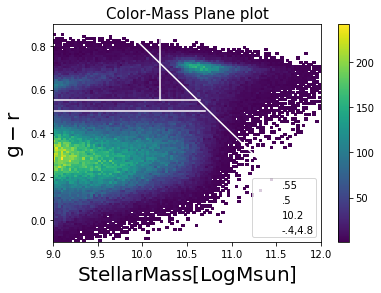

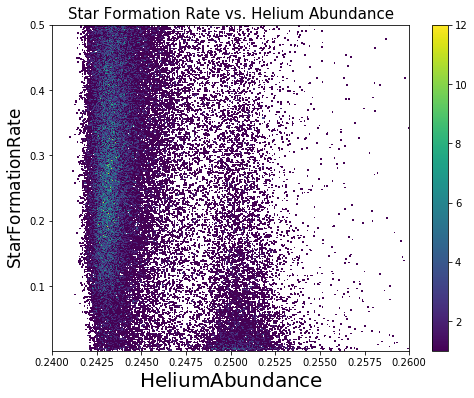

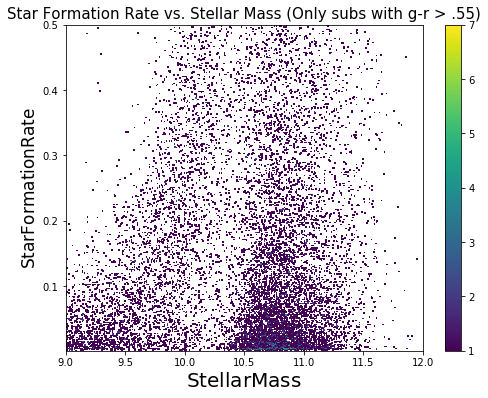

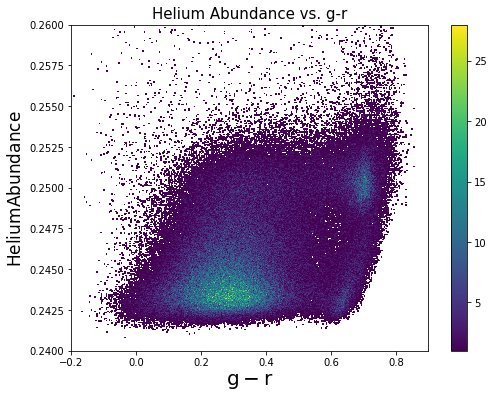

In [170]:
# COLOR-MASS PLOT
# RANGE OPTIONS
#range_hist = [[0, 0.8], [0, 0.8]] #old
range_hist = [[-.2, .9], [-.2, .8]]
#range_hist = [[.5, 0.9], [.2, 0.8]]

gmr = g_minus_r_cl
rmz = r_minus_z_cl

'''
# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
fig1 = plt.figure(figsize = (20,15))
gs1 = gridspec.GridSpec(10,12)
ax1 = plt.subplot(gs1[3:8, 5:10])  
ax1.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax1.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax1.set_title("300-1 Overdensity Color-Color plot \n (Inside 2 Mpc of selected, outside 2 Mpc of all)", fontsize = 15) #   (Subhalos in Selected Clusters)

#h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 50, range=range_hist)
h_f, x_f, y_f = np.histogram2d(g_minus_r_f2, r_minus_z_f2, bins = 50, range=range_hist, weights = None)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h_f, weights = (h_f > 0))
h_cl2, x_cl2, y_cl2 = np.histogram2d(g_minus_r_cl2, r_minus_z_cl2, bins = 50, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)
print(avg)
overdens = np.zeros(np.shape(h_cl2.T))
for i in range(len(h_cl2.T[:,0])):
    for j in range(len(h_cl2.T[0,:])):
        if h_cl2.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = (h_cl2.T[i,j]/len(g_minus_r_cl2)) - (avg/len(g_minus_r_f2)) #/len(g_minus_r_f) #
#overdens = h_cl2.T - avg
print(len(g_minus_r_cl2), len(g_minus_r_f2))
H2 = ax1.imshow(overdens, origin='lower', extent=[-.2, 0.9,-.2, 0.8], cmap = 'coolwarm')
fig1.colorbar(H2, ax=ax1)
'''
'''
# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10], sharex=ax0)  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
if np.shape(gmr) == np.shape(g_minus_r):
    ax0.set_title("300-1 Color-Color plot", fontsize = 15) #   (Subhalos in Selected Clusters)
elif np.shape(gmr) == np.shape(g_minus_r_cl):
    ax0.set_title("300-1 Color-Color plot (Subhalos in Selected Clusters)", fontsize = 15) #   
elif np.shape(gmr) == np.shape(g_minus_r_cl2):
    ax0.set_title("300-1 Color-Color plot (Subhalos within 1 Mpc of Selected Clusters)", fontsize = 15) #   

#ax0.plot([b1,b1],np.linspace(0,0.8,2), c = 'b', label = b1, linewidth=1) #left blue bound
#ax0.plot([b2,b2],np.linspace(0,0.8,2), c = 'b', label = b2, linewidth=1)
#ax0.plot([r1,r1],np.linspace(0,0.8,2), c = 'r', label = r1, linewidth=1)
#ax0.plot([r2,r2],np.linspace(0,0.8,2), c = 'r', label = r2, linewidth=1)
ax0.legend()
fig.tight_layout()

# 2D AND 1D MATPLOTLIB HISTOGRAMS
h_cl, x_cl, y_cl = np.histogram2d(gmr, rmz, bins = 100, range=range_hist)
H = ax0.hist2d(gmr, rmz , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
h_cl200, x_cl200, y_cl200 = np.histogram2d(gmr, rmz, bins = 200, range=range_hist)
 
#H = ax0.imshow(h_cl200.T, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'viridis')
#ax0.contour(H[0].T, extent = [H[1][0], H[1][-1], H[2][0], H[2][-1]], linewidths=3, cmap = 'viridis') #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
level_list = [2,30,60,99,100]#[1,15,30,49]
ax0.contour(h_cl.T, extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]], linewidths=1, cmap = 'autumn', levels = level_list) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
axx.hist(gmr, bins = H[1], range = [-.2,0.9])
plt.show()
#[1,15,30,49] extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]]
#fig.colorbar(H[3], ax=ax0)
'''

# COLOR-MASS PLOT
plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [-.1, .9]], cmin=.01)
#plt.scatter(stellar_mass, g_minus_r)
plt.plot([9,10.65], [.55,.55], c = 'w', label='.55')
plt.plot([9,10.7], [.50,.50], c = 'w', label='.5')
plt.plot([10.2,10.2], [.55,.9], c = 'w', label='10.2')
#plt.plot([9.75,11.5],[.9,.2], c = 'w', label='[9.75,11.5],\n[.9,.2]')
x = np.array([9.,10.,12.])
plt.plot(x,(-.4*x)+4.8, c='w', label='-.4,4.8')
#plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
plt.xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.title("Color-Mass Plane plot", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
plt.legend(loc='lower right', borderpad=.2)

'''
# COLOR-MAGNITUDE PLOT
plt.figure()
plt.hist2d(i_band_cl, mag1[:,5]-mag1[:,6], bins = 100, cmap = 'viridis', cmin=.01)
plt.xlabel("$\mathrm{i}$", fontsize = 20)
plt.ylabel("$\mathrm{r-i}$", fontsize = 20)
plt.title("Color-Magnitude Plot (subs in selected clusters)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
'''

# STAR FORMATION PLOT
plt.figure(figsize=(8,6))#12,6?
plt.hist2d(He_abund, sfr, bins=500, cmap='viridis', cmin=.01, range=[[.24,.26], [0.001,.5]])
plt.xlabel("$\mathrm{Helium Abundance}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Helium Abundance", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(stellar_mass[g_minus_r > .55], sfr[g_minus_r > .55], bins=500, cmap='viridis', cmin=.01, range=[[9,12], [0.001,.5]])
plt.xlabel("$\mathrm{Stellar Mass}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Stellar Mass (Only subs with g-r > .55)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(g_minus_r, He_abund, bins=500, cmap='viridis', cmin=.01, range=[[-.2,.9], [0.24,.26]])
plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
plt.ylabel("$\mathrm{Helium Abundance}$", fontsize = 17)
plt.title("Helium Abundance vs. g-r", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# (subs in selected clusters)

## New Table + All subhalo Color Split Profiles

In [32]:
t0 = time.time()
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=5) #1e10 Msun/h
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

subhalo_table_clean = subhalo_table[(subhalo_table['SubhaloFlag'])&(subhalo_table['SubhaloMass']!=0)&(subhalo_table['SubhaloMassType'][:,4]!=0)]
# MAKING TABLE AFTER MASS CUT
subhalo_table_m = subhalo_table_clean[np.array(np.log10(subhalo_table_clean['StellarMass']*(1e10)))>8]
CM_coords = subhalo_table_m['SubhaloCM'] #length of subhalo_table_m. so all subhalos greater than cutoff mass

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
print(time.time()-t0)


Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

[3 1 3 0 0 0 1 1 1 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


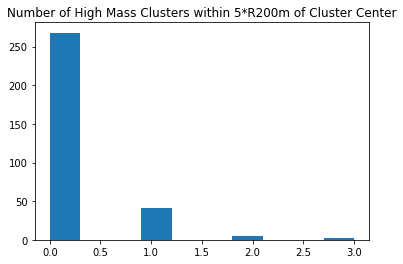

In [43]:
#print(len(subhalo_table_clean), len(subhalo_table_m))
#print(subhalo_table_clean['StellarMass'][1000:1050]*1e10)
#print(subhalo_table_m['StellarMass'][1000:1050]*1e10)
halos_nearby = []
for h_i in halo_array_masked[:]:
    CM_halo = halo_grp['GroupCM'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #dev = np.array(CM_HALOS - CM_halo) #has all subhalos > mass cut
    N = 0
    for h_j in halo_array_masked[:]:
        if h_j != h_i:
            CM_halo_j = halo_grp['GroupCM'][h_j]
            R = np.linalg.norm(CM_halo_j-CM_halo)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
            #if h_i == 0:
                #print(R200m,R)
            if (R<=5*R200m):
                N += 1
    halos_nearby.append(N)
halos_nearby = np.array(halos_nearby)
print(halos_nearby)
plt.figure()
plt.hist(halos_nearby)
plt.title('Number of High Mass Clusters within 5*R200m of Cluster Center')
plt.show()




starting halo loop

Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.04209709167480469
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
before dev loop: 0.27730393409729004
True
566208 566208 time 0.377392053604126
N Subhalos within 5*R200m: 2693 5.506242990493774


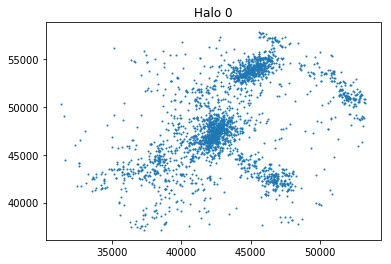

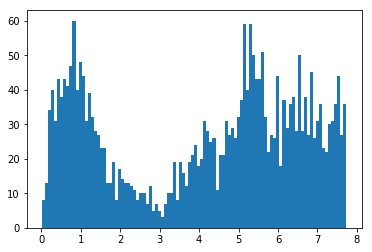

galaxies [14, 21, 21, 31, 27, 50, 58, 70, 111, 111, 103, 97, 60, 73, 58, 79, 206, 350, 550, 588]
blue galaxies counted [1, 0, 3, 1, 0, 2, 9, 15, 17, 17, 22, 19, 15, 35, 46, 61, 121, 159, 221, 371]
red galaxies counted [2, 6, 3, 5, 5, 7, 6, 2, 12, 12, 10, 11, 3, 6, 2, 1, 17, 25, 52, 37]
red galaxies counted [11, 15, 15, 25, 22, 41, 43, 53, 82, 82, 71, 67, 42, 32, 10, 17, 68, 166, 277, 180]
sum of galaxies: 2678

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 7.145273923873901
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
before dev loop: 7.176107883453369
True
566208 566208 time 7.232861042022705
N Subhalos within 5*R200m: 1308 7.553887128829956


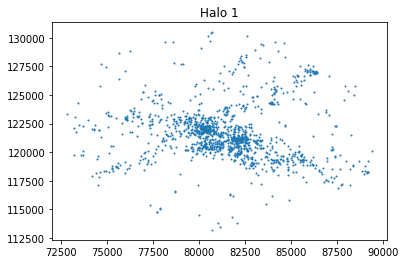

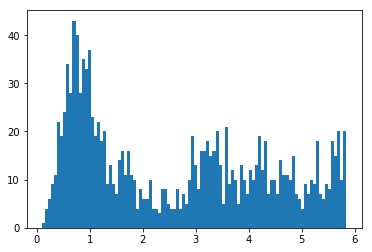

galaxies [0, 2, 2, 4, 7, 14, 29, 37, 72, 93, 111, 78, 57, 73, 49, 44, 115, 151, 171, 198]
blue galaxies counted [0, 0, 0, 1, 1, 2, 10, 7, 8, 9, 24, 24, 11, 36, 34, 36, 71, 113, 134, 169]
red galaxies counted [0, 0, 0, 0, 2, 2, 1, 5, 11, 13, 14, 8, 9, 7, 6, 0, 6, 8, 9, 5]
red galaxies counted [0, 2, 2, 3, 4, 10, 18, 25, 53, 71, 73, 46, 37, 30, 9, 8, 38, 30, 28, 24]
sum of galaxies: 1307

Halo: 2
Halo Mass: 56635.2
N Subhalos from Illustris Algorithm: 4227 9.866162061691284
R500c, R200c, R200m: 0.63745263599046 1.0698215083949882 1.3174896777323941
before dev loop: 9.899199962615967
True
566208 566208 time 9.962015867233276
N Subhalos within 5*R200m: 2340 10.2586829662323


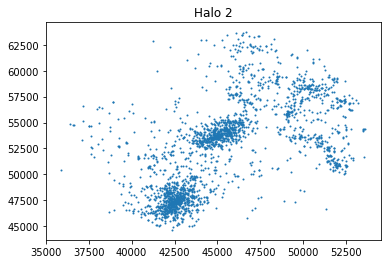

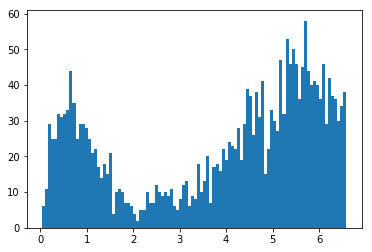

galaxies [3, 17, 16, 21, 23, 34, 47, 54, 81, 68, 77, 69, 60, 41, 43, 72, 117, 258, 509, 719]
blue galaxies counted [0, 1, 1, 1, 1, 0, 12, 12, 9, 15, 23, 25, 24, 29, 34, 56, 82, 136, 173, 315]
red galaxies counted [1, 3, 2, 5, 1, 5, 5, 11, 8, 5, 8, 5, 5, 1, 1, 6, 10, 23, 52, 56]
red galaxies counted [2, 13, 13, 15, 21, 29, 30, 31, 64, 48, 46, 39, 31, 11, 8, 10, 25, 99, 284, 348]
sum of galaxies: 2329

Halo: 3
Halo Mass: 48978.547
N Subhalos from Illustris Algorithm: 3272 10.985692024230957
R500c, R200c, R200m: 0.6330767903831258 0.987386489440597 1.2432116782515197
before dev loop: 10.997459173202515
True
566208 566208 time 11.057184934616089
N Subhalos within 5*R200m: 1155 11.40784502029419


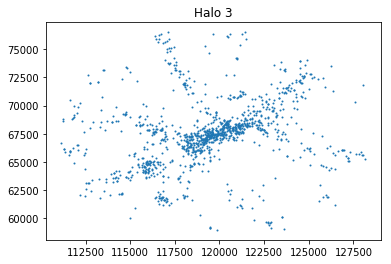

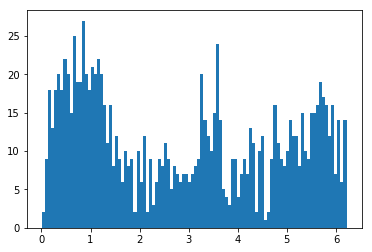

galaxies [5, 9, 12, 11, 16, 20, 31, 35, 39, 58, 59, 73, 54, 42, 44, 64, 101, 110, 133, 230]
blue galaxies counted [1, 1, 3, 2, 1, 1, 11, 7, 7, 19, 18, 15, 16, 22, 34, 48, 55, 72, 117, 190]
red galaxies counted [1, 2, 0, 2, 0, 3, 2, 6, 3, 7, 7, 7, 2, 2, 2, 6, 6, 6, 2, 8]
red galaxies counted [3, 6, 9, 7, 15, 16, 18, 22, 29, 32, 34, 51, 36, 18, 8, 10, 40, 32, 14, 32]
sum of galaxies: 1146

Halo: 4
Halo Mass: 40328.406
N Subhalos from Illustris Algorithm: 2827 12.24990200996399
R500c, R200c, R200m: 0.5571458484726928 0.8615962414074034 1.082398091096772
before dev loop: 12.289947986602783
True
566208 566208 time 12.343496084213257
N Subhalos within 5*R200m: 1059 13.391273021697998


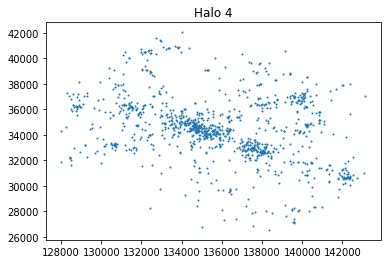

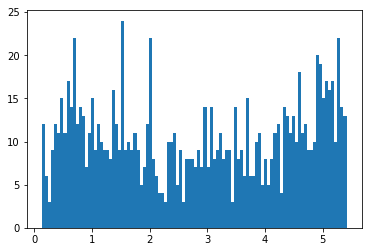

galaxies [0, 3, 9, 3, 5, 10, 16, 24, 32, 39, 37, 45, 44, 76, 73, 57, 81, 111, 134, 260]
blue galaxies counted [0, 0, 6, 1, 2, 0, 4, 6, 8, 10, 14, 16, 16, 25, 30, 48, 64, 79, 113, 182]
red galaxies counted [0, 0, 1, 0, 0, 3, 3, 3, 5, 4, 2, 2, 3, 8, 5, 1, 6, 11, 7, 23]
red galaxies counted [0, 3, 2, 2, 3, 7, 9, 15, 19, 25, 21, 27, 25, 43, 38, 8, 11, 21, 14, 55]
sum of galaxies: 1059

Halo: 5
Halo Mass: 36715.758
N Subhalos from Illustris Algorithm: 2489 14.197390079498291
R500c, R200c, R200m: 0.6429307101138425 0.9330389209709606 1.1332630626387952
before dev loop: 14.219542026519775
True
566208 566208 time 14.277083158493042
N Subhalos within 5*R200m: 938 17.383245944976807


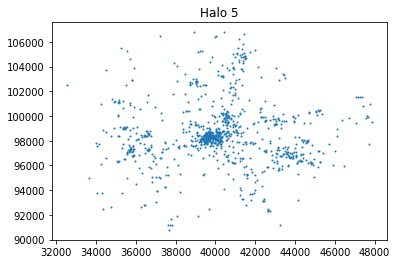

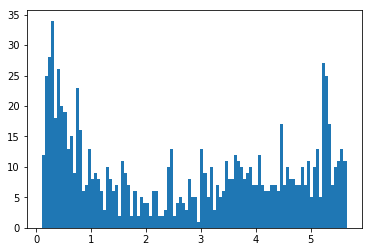

galaxies [3, 7, 14, 31, 19, 35, 32, 36, 31, 41, 28, 33, 30, 38, 24, 46, 59, 99, 126, 204]
blue galaxies counted [0, 0, 0, 1, 0, 6, 7, 10, 7, 13, 13, 16, 13, 16, 17, 38, 46, 80, 96, 170]
red galaxies counted [0, 2, 2, 6, 4, 4, 4, 3, 2, 2, 3, 2, 1, 2, 0, 3, 4, 4, 6, 11]
red galaxies counted [3, 5, 12, 24, 15, 25, 21, 23, 22, 26, 12, 15, 16, 20, 7, 5, 9, 15, 24, 23]
sum of galaxies: 936

Halo: 6
Halo Mass: 31760.066
N Subhalos from Illustris Algorithm: 2247 18.16895818710327
R500c, R200c, R200m: 0.5855748728968245 0.8941465723968443 1.086389525901727
before dev loop: 18.189952850341797
True
566208 566208 time 18.237782955169678
N Subhalos within 5*R200m: 1141 18.556251049041748


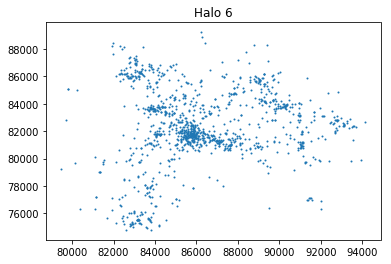

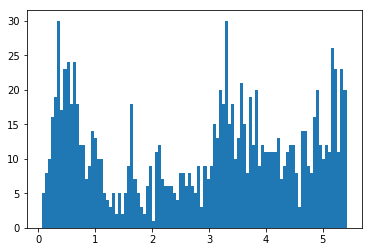

galaxies [2, 4, 10, 7, 18, 21, 31, 41, 45, 42, 34, 40, 19, 41, 31, 59, 69, 198, 175, 251]
blue galaxies counted [2, 1, 0, 0, 2, 3, 5, 15, 11, 17, 15, 16, 12, 31, 28, 48, 52, 112, 151, 170]
red galaxies counted [0, 0, 3, 1, 1, 3, 2, 4, 2, 4, 0, 2, 1, 3, 1, 3, 2, 18, 7, 16]
red galaxies counted [0, 3, 7, 6, 15, 15, 24, 22, 32, 21, 19, 22, 6, 7, 2, 8, 15, 68, 17, 65]
sum of galaxies: 1138

Halo: 7
Halo Mass: 31613.166
N Subhalos from Illustris Algorithm: 2444 19.41171908378601
R500c, R200c, R200m: 0.5982765232247936 0.8834512886354261 1.0688772558241793
before dev loop: 19.4369900226593
True
566208 566208 time 19.487459897994995
N Subhalos within 5*R200m: 1027 19.89257526397705


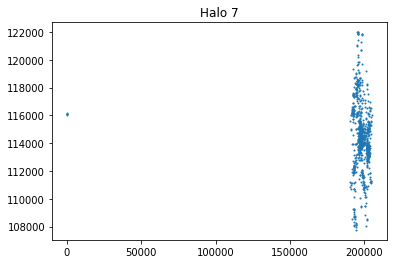

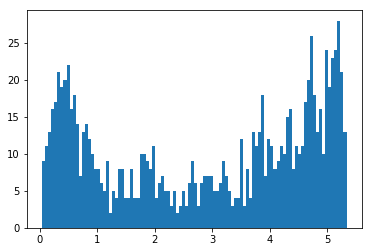

galaxies [3, 8, 8, 13, 16, 17, 35, 35, 33, 29, 38, 26, 24, 34, 55, 38, 57, 71, 165, 309]
blue galaxies counted [0, 2, 1, 1, 1, 3, 5, 8, 8, 10, 15, 13, 13, 24, 37, 35, 49, 50, 112, 161]
red galaxies counted [1, 2, 2, 1, 3, 2, 5, 6, 8, 0, 2, 1, 0, 3, 5, 1, 1, 4, 15, 25]
red galaxies counted [2, 4, 5, 11, 12, 12, 25, 21, 17, 19, 21, 12, 11, 7, 13, 2, 7, 17, 38, 123]
sum of galaxies: 1014

Halo: 8
Halo Mass: 31110.195
N Subhalos from Illustris Algorithm: 2420 20.681418895721436
R500c, R200c, R200m: 0.5895938914387969 0.9054767224886232 1.1040761059806872
before dev loop: 20.701709032058716
True
566208 566208 time 20.754186868667603
N Subhalos within 5*R200m: 820 21.51828122138977


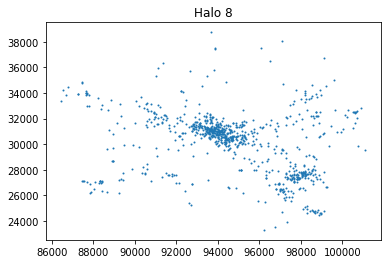

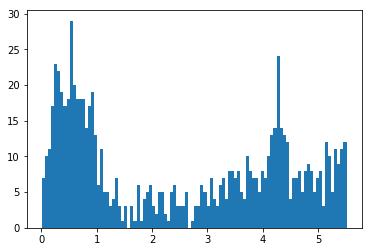

galaxies [8, 7, 11, 11, 25, 22, 22, 37, 49, 45, 52, 31, 22, 9, 27, 31, 33, 74, 151, 143]
blue galaxies counted [1, 0, 4, 1, 5, 2, 4, 11, 13, 18, 17, 10, 18, 8, 23, 27, 31, 59, 88, 108]
red galaxies counted [2, 1, 0, 1, 3, 3, 1, 2, 2, 4, 1, 1, 0, 1, 1, 1, 1, 5, 7, 9]
red galaxies counted [5, 6, 7, 9, 17, 17, 17, 24, 34, 23, 34, 20, 4, 0, 3, 3, 1, 10, 56, 26]
sum of galaxies: 810

Halo: 9
Halo Mass: 30706.139
N Subhalos from Illustris Algorithm: 2098 23.389889001846313
R500c, R200c, R200m: 0.5962877718168602 0.8789393258933192 1.0832641163495382
before dev loop: 23.413643836975098
True
566208 566208 time 23.50777506828308
N Subhalos within 5*R200m: 689 23.985084056854248


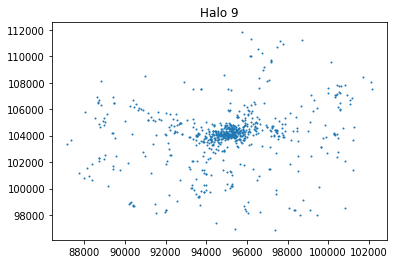

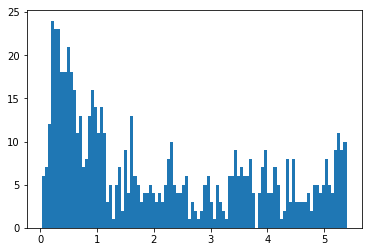

galaxies [3, 1, 13, 20, 23, 25, 26, 34, 34, 27, 37, 49, 19, 39, 26, 43, 33, 61, 68, 99]
blue galaxies counted [0, 0, 2, 1, 8, 4, 4, 12, 12, 10, 10, 18, 6, 28, 22, 34, 32, 59, 65, 87]
red galaxies counted [1, 0, 3, 3, 0, 5, 5, 2, 3, 3, 5, 3, 1, 3, 1, 2, 1, 1, 0, 3]
red galaxies counted [2, 1, 8, 16, 15, 16, 17, 20, 19, 14, 22, 28, 12, 8, 3, 7, 0, 1, 3, 9]
sum of galaxies: 680

Halo: 10
Halo Mass: 30121.426
N Subhalos from Illustris Algorithm: 1684 25.636246919631958
R500c, R200c, R200m: 0.5949337266014821 0.8930961484609122 1.0910091012492074
before dev loop: 25.6620671749115
True
566208 566208 time 25.739541053771973
N Subhalos within 5*R200m: 803 26.232353925704956


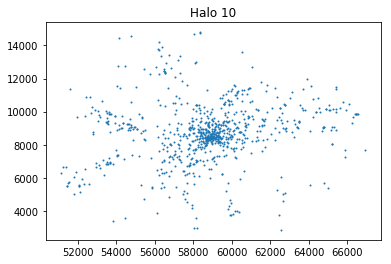

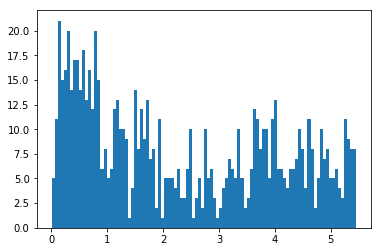

galaxies [4, 14, 11, 14, 14, 21, 18, 34, 30, 36, 41, 27, 46, 48, 45, 39, 41, 71, 114, 122]
blue galaxies counted [0, 1, 0, 0, 1, 3, 1, 6, 5, 3, 11, 4, 12, 24, 22, 32, 26, 58, 106, 114]
red galaxies counted [1, 2, 3, 5, 0, 2, 3, 1, 2, 4, 2, 2, 4, 1, 4, 2, 4, 2, 3, 3]
red galaxies counted [3, 11, 8, 9, 13, 16, 14, 27, 23, 29, 28, 21, 30, 23, 19, 5, 11, 11, 5, 5]
sum of galaxies: 790

Halo: 11
Halo Mass: 29552.848
N Subhalos from Illustris Algorithm: 1911 27.323993921279907
R500c, R200c, R200m: 0.5660555156326001 0.8945970400440394 1.0926228899852932
before dev loop: 27.337829113006592
True
566208 566208 time 27.404449939727783
N Subhalos within 5*R200m: 1036 28.714253902435303


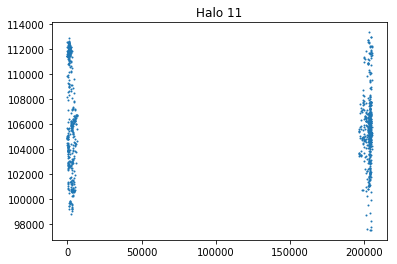

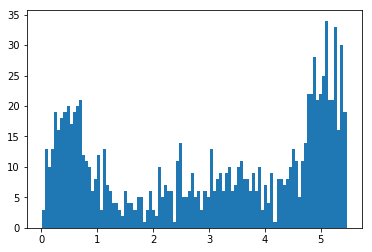

galaxies [5, 4, 7, 14, 19, 18, 23, 35, 40, 41, 28, 35, 23, 20, 24, 58, 62, 98, 102, 367]
blue galaxies counted [0, 0, 0, 0, 1, 2, 4, 8, 9, 13, 3, 13, 11, 16, 20, 41, 51, 83, 93, 228]
red galaxies counted [1, 0, 1, 1, 3, 6, 0, 1, 4, 6, 1, 1, 3, 1, 0, 5, 4, 5, 2, 29]
red galaxies counted [4, 4, 6, 13, 15, 10, 19, 26, 27, 22, 24, 21, 9, 3, 4, 12, 7, 10, 7, 110]
sum of galaxies: 1023

Halo: 12
Halo Mass: 29994.932
N Subhalos from Illustris Algorithm: 1923 30.655924081802368
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
before dev loop: 30.668962001800537
True
566208 566208 time 30.74270510673523
N Subhalos within 5*R200m: 601 31.098156929016113


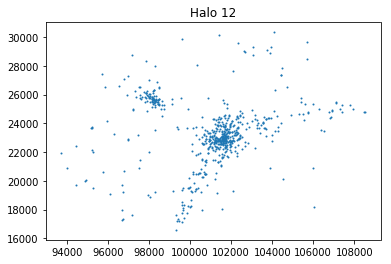

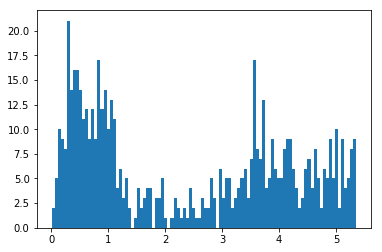

galaxies [6, 4, 8, 3, 14, 18, 23, 27, 24, 28, 37, 45, 21, 11, 20, 13, 26, 67, 94, 106]
blue galaxies counted [0, 0, 0, 0, 1, 4, 2, 5, 7, 5, 5, 9, 3, 7, 18, 13, 18, 36, 56, 100]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 1, 8, 3]
red galaxies counted [5, 2, 7, 2, 12, 12, 18, 18, 15, 22, 30, 31, 17, 4, 2, 0, 7, 30, 30, 3]
sum of galaxies: 595

Halo: 13
Halo Mass: 27343.611
N Subhalos from Illustris Algorithm: 1930 32.31805205345154
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
before dev loop: 32.349661111831665
True
566208 566208 time 32.396332025527954
N Subhalos within 5*R200m: 642 32.86680316925049


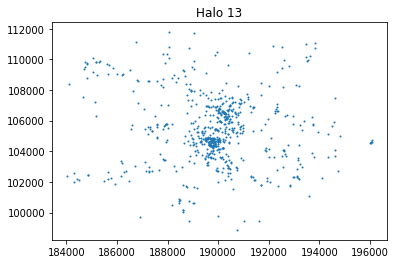

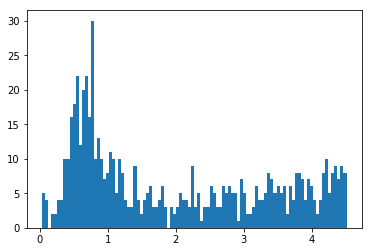

galaxies [2, 1, 0, 0, 4, 3, 6, 18, 35, 41, 72, 48, 35, 33, 29, 26, 39, 55, 73, 116]
blue galaxies counted [1, 1, 0, 0, 1, 1, 2, 4, 7, 8, 26, 17, 15, 17, 24, 24, 28, 54, 63, 103]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 2, 0, 5, 0, 5, 4]
red galaxies counted [1, 0, 0, 0, 3, 2, 4, 13, 26, 25, 38, 26, 18, 14, 3, 2, 6, 1, 5, 9]
sum of galaxies: 636

Halo: 14
Halo Mass: 25908.443
N Subhalos from Illustris Algorithm: 1733 34.726032972335815
R500c, R200c, R200m: 0.5403272153001663 0.8218303411036568 1.0292258540514474
before dev loop: 34.76662015914917
True
566208 566208 time 34.85575199127197
N Subhalos within 5*R200m: 916 35.59865689277649


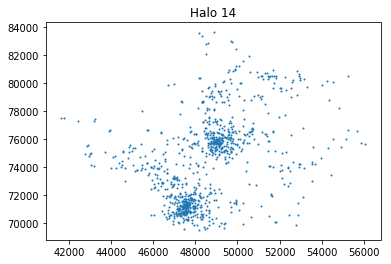

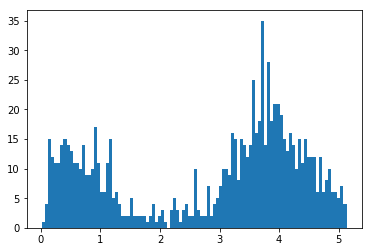

galaxies [3, 8, 13, 6, 9, 13, 22, 23, 24, 29, 30, 40, 39, 17, 14, 18, 36, 124, 280, 166]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 2, 4, 1, 4, 7, 14, 5, 10, 13, 26, 57, 93, 103]
red galaxies counted [2, 2, 1, 1, 0, 1, 5, 2, 2, 2, 2, 4, 2, 0, 0, 2, 1, 10, 27, 8]
red galaxies counted [1, 6, 12, 5, 8, 12, 15, 19, 18, 26, 24, 29, 23, 12, 4, 3, 9, 57, 160, 55]
sum of galaxies: 914

Halo: 15
Halo Mass: 25923.64
N Subhalos from Illustris Algorithm: 1930 36.3634889125824
R500c, R200c, R200m: 0.5543512035580016 0.8399260732759634 1.0439992872395611
before dev loop: 36.37808609008789
True
566208 566208 time 36.53797101974487
N Subhalos within 5*R200m: 1020 36.769700050354004


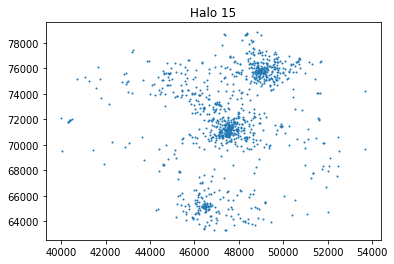

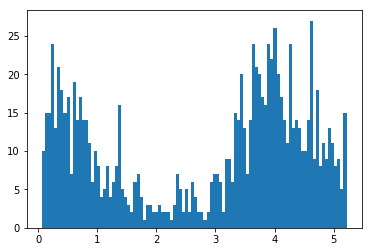

galaxies [8, 8, 11, 11, 22, 19, 25, 24, 33, 38, 40, 27, 26, 36, 24, 23, 31, 116, 275, 217]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 2, 4, 6, 7, 11, 6, 21, 8, 19, 21, 52, 70, 129]
red galaxies counted [2, 2, 1, 0, 3, 3, 2, 3, 2, 2, 2, 4, 1, 3, 3, 0, 2, 11, 24, 12]
red galaxies counted [6, 6, 10, 11, 18, 16, 21, 19, 27, 30, 31, 12, 19, 12, 13, 4, 8, 53, 181, 76]
sum of galaxies: 1014

Halo: 16
Halo Mass: 24286.85
N Subhalos from Illustris Algorithm: 1685 38.13978409767151
R500c, R200c, R200m: 0.46906364987218946 0.713824997762071 0.8579366121356826
before dev loop: 38.15847206115723
True
566208 566208 time 38.21378183364868
N Subhalos within 5*R200m: 702 38.81889295578003


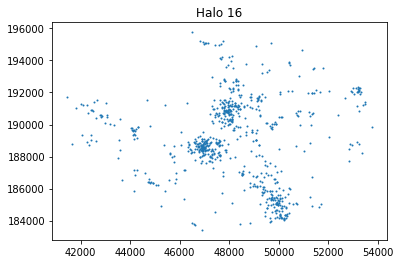

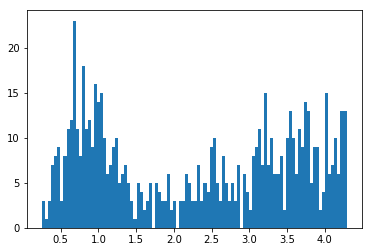

galaxies [0, 0, 0, 0, 0, 3, 2, 6, 20, 19, 49, 47, 62, 43, 30, 30, 38, 67, 112, 174]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 11, 6, 15, 12, 18, 23, 32, 52, 81, 115]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 10, 8, 2, 2, 2, 2, 3, 5, 11]
red galaxies counted [0, 0, 0, 0, 0, 3, 0, 4, 17, 16, 33, 31, 39, 29, 10, 5, 4, 12, 26, 48]
sum of galaxies: 702

Halo: 17
Halo Mass: 24397.488
N Subhalos from Illustris Algorithm: 2019 39.66876721382141
R500c, R200c, R200m: 0.38384803809554985 0.6399654383672685 0.8183489452095857
before dev loop: 39.690593957901
True
566208 566208 time 39.756799936294556
N Subhalos within 5*R200m: 504 39.960766077041626


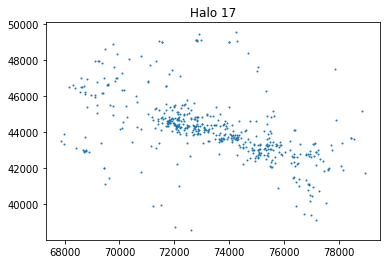

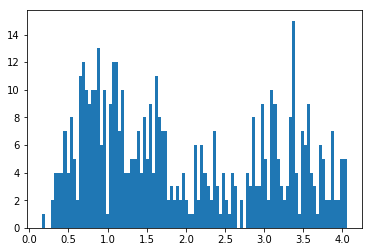

galaxies [0, 0, 0, 1, 0, 0, 3, 7, 11, 17, 25, 37, 36, 52, 39, 50, 32, 31, 78, 85]
blue galaxies counted [0, 0, 0, 1, 0, 0, 3, 3, 5, 6, 7, 16, 9, 22, 18, 23, 22, 27, 66, 81]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 3, 6, 2, 6, 3, 1, 5, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 4, 5, 10, 15, 17, 24, 24, 19, 21, 7, 3, 7, 2]
sum of galaxies: 504

Halo: 18
Halo Mass: 22562.018
N Subhalos from Illustris Algorithm: 1709 40.760202169418335
R500c, R200c, R200m: 0.4253113591043646 0.7370002210595841 0.9218522543530128
before dev loop: 40.77939009666443
True
566208 566208 time 40.85114097595215
N Subhalos within 5*R200m: 585 41.08384394645691


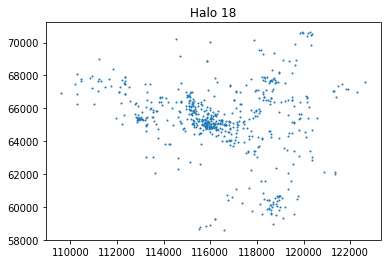

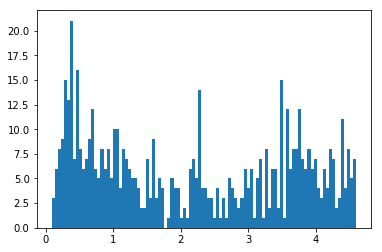

galaxies [1, 1, 4, 4, 11, 15, 17, 26, 25, 19, 24, 26, 36, 29, 32, 19, 51, 39, 99, 106]
blue galaxies counted [0, 0, 0, 0, 1, 1, 4, 8, 2, 5, 7, 12, 21, 18, 29, 14, 38, 38, 80, 88]
red galaxies counted [1, 0, 0, 0, 2, 2, 3, 3, 3, 0, 6, 0, 2, 3, 0, 0, 4, 1, 3, 3]
red galaxies counted [0, 1, 4, 4, 8, 12, 10, 15, 20, 14, 11, 14, 13, 8, 3, 5, 9, 0, 16, 15]
sum of galaxies: 584

Halo: 19
Halo Mass: 21426.482
N Subhalos from Illustris Algorithm: 1324 41.75256419181824
R500c, R200c, R200m: 0.5051613134971634 0.7625853581937981 0.9242370265542321
before dev loop: 41.76903796195984
True
566208 566208 time 41.8322012424469
N Subhalos within 5*R200m: 503 42.00803589820862


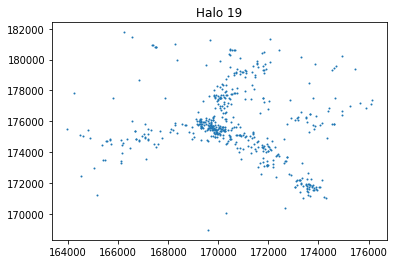

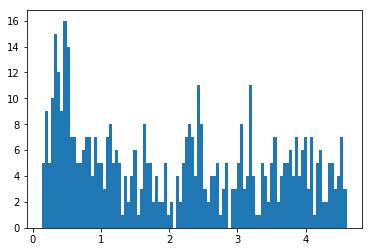

galaxies [0, 1, 2, 6, 6, 8, 22, 19, 31, 15, 22, 20, 27, 22, 31, 19, 59, 46, 67, 80]
blue galaxies counted [0, 1, 0, 0, 0, 1, 1, 5, 4, 2, 8, 6, 12, 10, 26, 15, 35, 36, 55, 69]
red galaxies counted [0, 0, 0, 3, 1, 2, 7, 2, 5, 3, 2, 1, 3, 1, 1, 1, 5, 3, 2, 3]
red galaxies counted [0, 0, 2, 3, 5, 5, 14, 12, 22, 10, 12, 13, 12, 11, 4, 3, 19, 7, 10, 8]
sum of galaxies: 503

Halo: 20
Halo Mass: 21198.576
N Subhalos from Illustris Algorithm: 1366 42.71223211288452
R500c, R200c, R200m: 0.5098278492561403 0.7919591156021559 0.9746404809404726
before dev loop: 42.72722101211548
True
566208 566208 time 42.78178596496582
N Subhalos within 5*R200m: 539 42.990071058273315


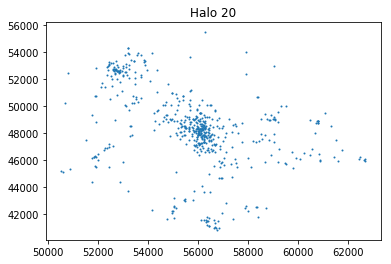

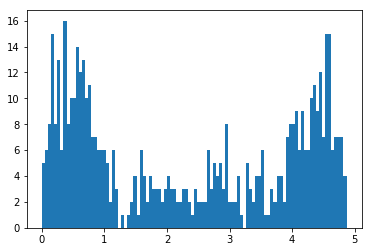

galaxies [2, 4, 9, 14, 3, 14, 15, 20, 21, 31, 28, 24, 17, 8, 22, 23, 26, 39, 56, 152]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 3, 7, 4, 5, 8, 6, 6, 17, 19, 22, 33, 47, 99]
red galaxies counted [0, 1, 2, 2, 1, 4, 2, 1, 1, 4, 4, 0, 0, 0, 2, 1, 1, 1, 2, 10]
red galaxies counted [2, 3, 7, 12, 2, 10, 11, 16, 13, 23, 19, 16, 11, 2, 3, 3, 3, 5, 7, 43]
sum of galaxies: 528

Halo: 21
Halo Mass: 21375.77
N Subhalos from Illustris Algorithm: 1918 43.6615149974823
R500c, R200c, R200m: 0.3859845166291631 0.5961379628997073 0.7614576677666569
before dev loop: 43.68647503852844
True
566208 566208 time 43.74022912979126
N Subhalos within 5*R200m: 410 43.853535890579224


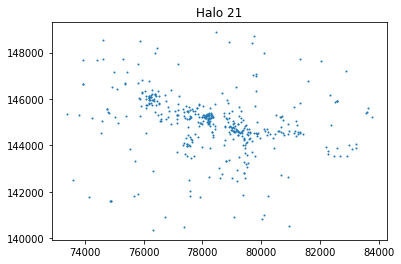

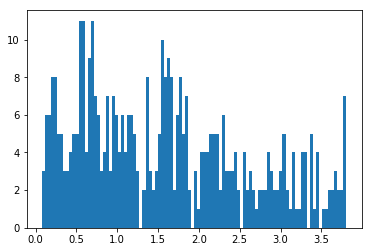

galaxies [1, 2, 2, 6, 8, 8, 9, 7, 7, 13, 29, 28, 23, 27, 27, 49, 40, 44, 36, 44]
blue galaxies counted [0, 0, 0, 1, 2, 5, 1, 1, 2, 1, 13, 13, 9, 17, 14, 18, 21, 35, 32, 42]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 4, 2, 2, 1, 1, 2, 3, 5, 0, 0]
red galaxies counted [1, 1, 2, 5, 6, 3, 8, 6, 4, 10, 12, 13, 12, 9, 12, 29, 16, 4, 4, 2]
sum of galaxies: 410

Halo: 22
Halo Mass: 20983.459
N Subhalos from Illustris Algorithm: 1514 44.50185418128967
R500c, R200c, R200m: 0.4878136250493363 0.7551455158827285 0.940224784722325
before dev loop: 44.528895139694214
True
566208 566208 time 44.59158897399902
N Subhalos within 5*R200m: 479 44.69771194458008


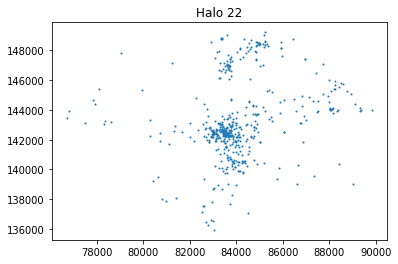

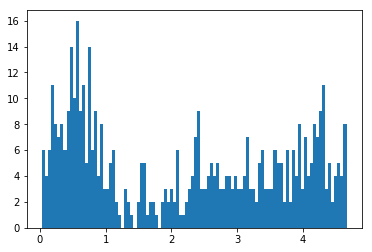

galaxies [1, 3, 3, 9, 9, 8, 12, 13, 25, 34, 24, 25, 17, 7, 17, 19, 41, 48, 58, 99]
blue galaxies counted [0, 0, 0, 2, 1, 1, 2, 4, 5, 13, 7, 12, 5, 3, 14, 15, 26, 29, 45, 79]
red galaxies counted [0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 3, 1, 5, 4, 2]
red galaxies counted [1, 2, 3, 6, 6, 6, 9, 9, 18, 19, 16, 13, 10, 2, 2, 1, 14, 14, 9, 18]
sum of galaxies: 472

Halo: 23
Halo Mass: 20621.312
N Subhalos from Illustris Algorithm: 1371 45.35584306716919
R500c, R200c, R200m: 0.47307574245406897 0.7178864928569827 0.8942206361319411
before dev loop: 45.372541189193726
True
566208 566208 time 45.42803907394409
N Subhalos within 5*R200m: 403 45.50980019569397


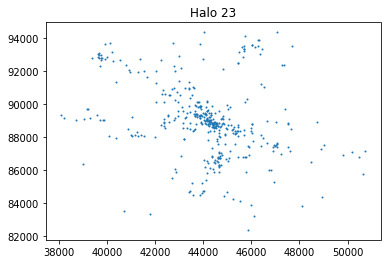

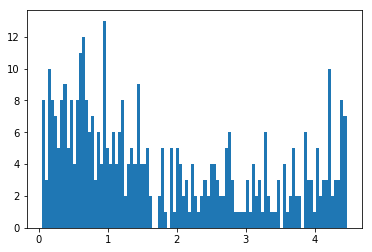

galaxies [1, 2, 6, 8, 7, 5, 12, 13, 10, 26, 26, 18, 30, 26, 27, 21, 22, 35, 33, 67]
blue galaxies counted [0, 0, 0, 1, 1, 0, 4, 1, 3, 7, 6, 10, 13, 11, 17, 21, 19, 33, 30, 55]
red galaxies counted [0, 2, 3, 0, 0, 2, 0, 0, 3, 2, 2, 0, 2, 4, 3, 0, 1, 0, 0, 3]
red galaxies counted [1, 0, 3, 7, 6, 3, 8, 12, 4, 17, 18, 8, 15, 11, 7, 0, 2, 2, 3, 9]
sum of galaxies: 395

Halo: 24
Halo Mass: 20336.56
N Subhalos from Illustris Algorithm: 1775 46.257588148117065
R500c, R200c, R200m: 0.4536866172602611 0.6847010553304727 0.827884350844934
before dev loop: 46.288208961486816
True
566208 566208 time 46.33887720108032
N Subhalos within 5*R200m: 621 46.449990034103394


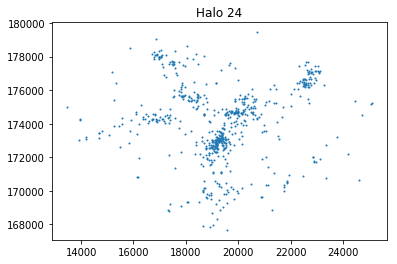

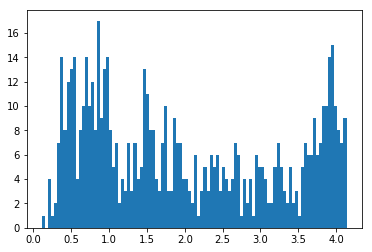

galaxies [0, 1, 0, 0, 1, 4, 3, 19, 22, 26, 35, 40, 52, 26, 52, 50, 41, 55, 59, 135]
blue galaxies counted [0, 1, 0, 0, 0, 2, 1, 4, 3, 8, 13, 17, 21, 10, 33, 25, 28, 44, 52, 68]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 3, 3, 2, 2, 2, 2, 3, 1, 12]
red galaxies counted [0, 0, 0, 0, 1, 2, 2, 13, 19, 14, 22, 20, 28, 14, 17, 23, 11, 8, 6, 55]
sum of galaxies: 621

Halo: 25
Halo Mass: 19065.426
N Subhalos from Illustris Algorithm: 1228 47.33958101272583
R500c, R200c, R200m: 0.5023776780566084 0.7649002302428666 0.9437094634414113
before dev loop: 47.353439807891846
True
566208 566208 time 47.405494928359985
N Subhalos within 5*R200m: 616 47.48906421661377


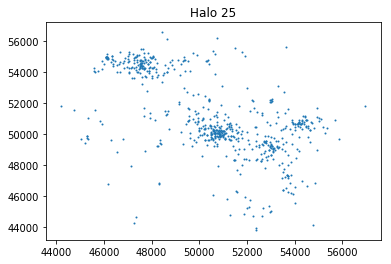

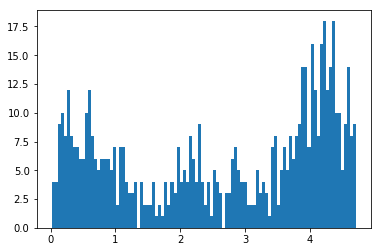

galaxies [3, 6, 5, 8, 7, 14, 12, 9, 15, 24, 17, 25, 22, 15, 15, 35, 44, 42, 80, 213]
blue galaxies counted [0, 0, 1, 1, 0, 3, 3, 1, 2, 4, 6, 6, 7, 6, 9, 20, 22, 34, 45, 94]
red galaxies counted [0, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 0, 3, 1, 1, 2, 3, 0, 7, 16]
red galaxies counted [3, 5, 4, 4, 6, 11, 8, 6, 12, 18, 9, 19, 12, 8, 5, 13, 19, 8, 28, 103]
sum of galaxies: 611

Halo: 26
Halo Mass: 18821.283
N Subhalos from Illustris Algorithm: 1328 48.2904531955719
R500c, R200c, R200m: 0.47668837127984176 0.7524419893794323 0.9314922299754277
before dev loop: 48.33244609832764
True
566208 566208 time 48.37907910346985
N Subhalos within 5*R200m: 656 48.46790385246277


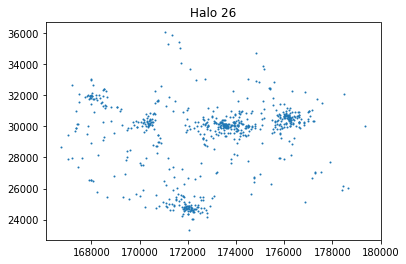

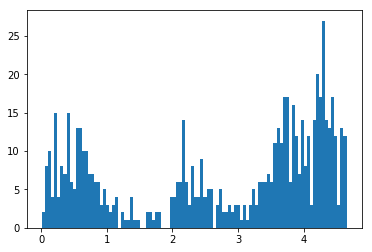

galaxies [4, 6, 4, 3, 15, 4, 11, 21, 16, 29, 24, 19, 13, 9, 8, 21, 59, 31, 120, 232]
blue galaxies counted [0, 1, 0, 0, 1, 1, 0, 3, 2, 7, 7, 3, 5, 8, 7, 18, 46, 27, 54, 136]
red galaxies counted [1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 3, 3, 0, 0, 0, 1, 3, 1, 10, 18]
red galaxies counted [3, 4, 3, 3, 12, 3, 10, 16, 12, 21, 14, 13, 8, 1, 1, 2, 10, 3, 56, 78]
sum of galaxies: 649

Halo: 27
Halo Mass: 19014.826
N Subhalos from Illustris Algorithm: 1508 49.1159610748291
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
before dev loop: 49.141634941101074
True
566208 566208 time 49.19437599182129
N Subhalos within 5*R200m: 551 49.27957487106323


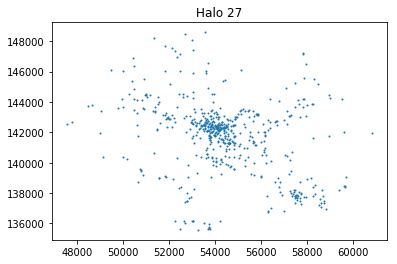

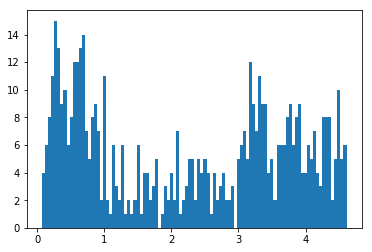

galaxies [2, 2, 5, 5, 14, 15, 16, 20, 13, 29, 30, 27, 22, 13, 21, 25, 36, 39, 108, 108]
blue galaxies counted [0, 1, 0, 0, 3, 2, 1, 2, 3, 3, 4, 11, 12, 10, 18, 19, 36, 37, 78, 98]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 1, 1, 0, 0, 9, 2]
red galaxies counted [1, 1, 4, 4, 7, 11, 15, 18, 8, 23, 23, 16, 9, 3, 2, 5, 0, 2, 21, 8]
sum of galaxies: 550

Halo: 28
Halo Mass: 18303.37
N Subhalos from Illustris Algorithm: 1259 50.110480070114136
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
before dev loop: 50.135497093200684
True
566208 566208 time 50.21150207519531
N Subhalos within 5*R200m: 351 50.373772859573364


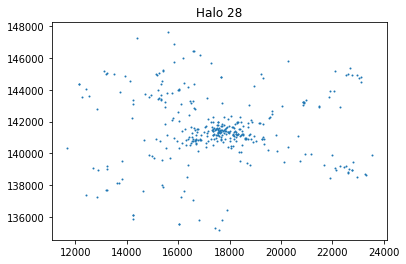

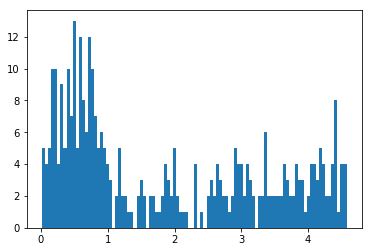

galaxies [0, 3, 4, 8, 10, 4, 12, 12, 21, 23, 28, 23, 10, 11, 11, 21, 11, 34, 36, 60]
blue galaxies counted [0, 0, 1, 1, 4, 1, 5, 2, 2, 3, 8, 6, 5, 8, 7, 19, 10, 28, 34, 57]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 1, 2, 0, 0, 4, 0, 1]
red galaxies counted [0, 3, 2, 6, 5, 3, 5, 9, 17, 16, 16, 16, 5, 2, 2, 2, 1, 2, 2, 2]
sum of galaxies: 342

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 52.85437297821045
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
before dev loop: 52.88648200035095
True
566208 566208 time 52.94318413734436
N Subhalos within 5*R200m: 485 53.15509009361267


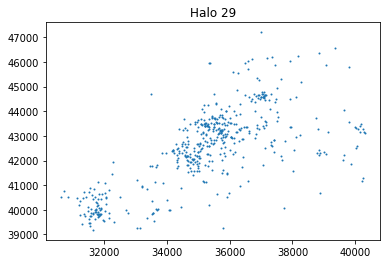

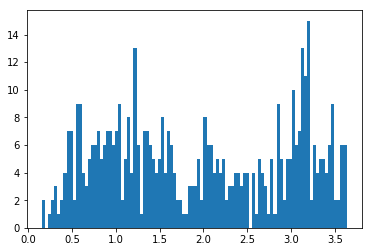

galaxies [0, 0, 0, 0, 1, 1, 3, 3, 4, 17, 22, 17, 30, 33, 46, 48, 30, 54, 54, 122]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 4, 7, 5, 8, 19, 18, 38, 43, 69]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 4, 8, 2, 3, 1, 4, 1, 12]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 3, 10, 20, 13, 19, 20, 36, 26, 11, 12, 10, 41]
sum of galaxies: 485

Halo: 30
Halo Mass: 17775.602
N Subhalos from Illustris Algorithm: 1246 54.82411313056946
R500c, R200c, R200m: 0.49212849818718246 0.7397235245818736 0.9071572886896503
before dev loop: 54.86058521270752
True
566208 566208 time 55.08848309516907
N Subhalos within 5*R200m: 414 55.219417095184326


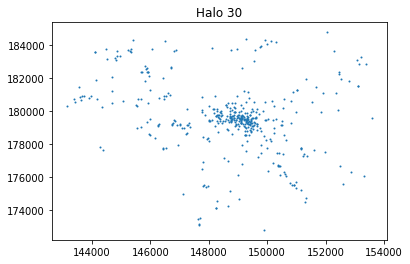

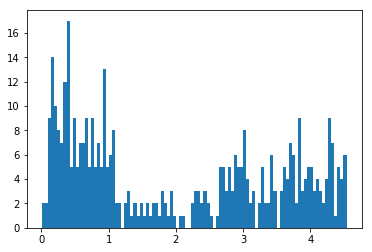

galaxies [5, 3, 7, 11, 11, 7, 15, 22, 14, 16, 24, 27, 25, 8, 11, 12, 17, 49, 47, 81]
blue galaxies counted [1, 1, 0, 1, 0, 1, 2, 6, 3, 2, 8, 14, 9, 6, 10, 11, 14, 40, 43, 76]
red galaxies counted [1, 1, 0, 0, 2, 1, 2, 1, 4, 2, 1, 1, 1, 0, 0, 0, 1, 4, 2, 1]
red galaxies counted [3, 1, 7, 10, 9, 5, 11, 15, 7, 12, 15, 12, 15, 2, 1, 1, 2, 5, 2, 4]
sum of galaxies: 412

Halo: 31
Halo Mass: 17812.344
N Subhalos from Illustris Algorithm: 1331 55.89135193824768
R500c, R200c, R200m: 0.4590839418951622 0.6922596398244059 0.8449716151863796
before dev loop: 55.92684006690979
True
566208 566208 time 56.21137499809265
N Subhalos within 5*R200m: 427 56.321205854415894


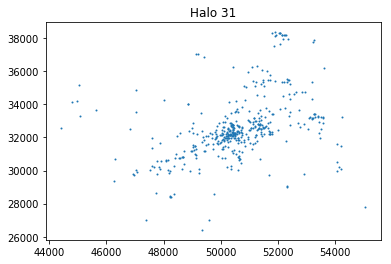

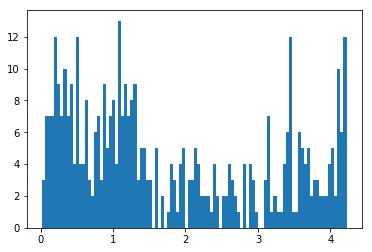

galaxies [5, 2, 6, 4, 12, 11, 11, 13, 14, 18, 14, 20, 30, 47, 25, 16, 29, 25, 45, 75]
blue galaxies counted [0, 0, 0, 0, 2, 2, 1, 1, 3, 6, 6, 6, 5, 20, 7, 12, 27, 24, 34, 61]
red galaxies counted [1, 0, 0, 3, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 3, 1, 1, 0, 2, 6]
red galaxies counted [4, 2, 6, 1, 9, 7, 8, 10, 9, 11, 8, 14, 24, 25, 15, 3, 1, 1, 9, 8]
sum of galaxies: 422

Halo: 32
Halo Mass: 16644.68
N Subhalos from Illustris Algorithm: 1245 57.508898973464966
R500c, R200c, R200m: 0.44874424413111236 0.7253563610066053 0.8944798992392319
before dev loop: 57.535074949264526
True
566208 566208 time 57.58776807785034
N Subhalos within 5*R200m: 675 57.649829149246216


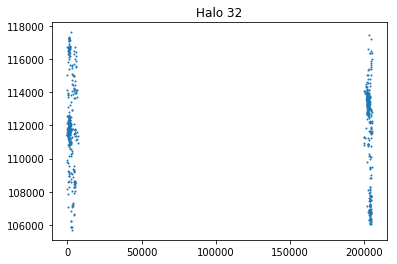

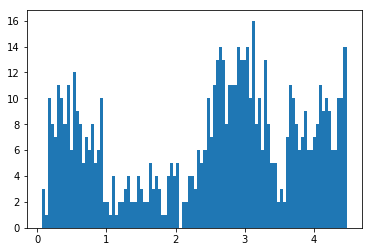

galaxies [0, 2, 1, 9, 6, 8, 15, 16, 17, 27, 20, 23, 15, 14, 20, 28, 42, 141, 118, 152]
blue galaxies counted [0, 0, 0, 1, 1, 0, 4, 5, 7, 10, 8, 11, 8, 12, 16, 24, 24, 64, 59, 100]
red galaxies counted [0, 0, 0, 1, 0, 2, 3, 1, 3, 1, 1, 0, 0, 0, 1, 1, 2, 14, 5, 11]
red galaxies counted [0, 2, 1, 7, 5, 6, 8, 10, 7, 16, 11, 12, 7, 2, 3, 3, 16, 63, 54, 41]
sum of galaxies: 674

Halo: 33
Halo Mass: 16789.268
N Subhalos from Illustris Algorithm: 1276 59.28100299835205
R500c, R200c, R200m: 0.3685475113202541 0.5917288486632567 0.7387652599530732
before dev loop: 59.30067706108093
True
566208 566208 time 59.356021881103516
N Subhalos within 5*R200m: 366 59.56066107749939


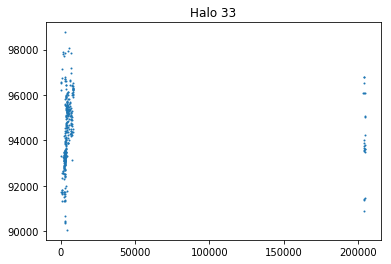

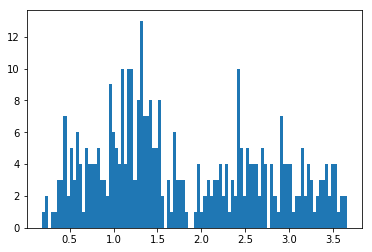

galaxies [0, 0, 0, 0, 1, 1, 1, 2, 6, 12, 15, 14, 16, 36, 58, 37, 22, 44, 54, 47]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 6, 4, 9, 11, 17, 10, 16, 33, 39, 28]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 3, 9, 2, 1, 5, 4, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 9, 8, 10, 5, 22, 32, 25, 5, 6, 11, 13]
sum of galaxies: 366

Halo: 34
Halo Mass: 16846.766
N Subhalos from Illustris Algorithm: 1203 61.23466420173645
R500c, R200c, R200m: 0.2652465563114473 0.4380927180250786 0.6004946320048191
before dev loop: 61.28284502029419
True
566208 566208 time 61.39556002616882
N Subhalos within 5*R200m: 335 61.56076622009277


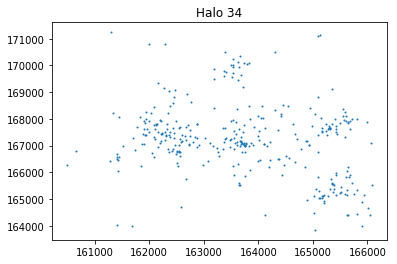

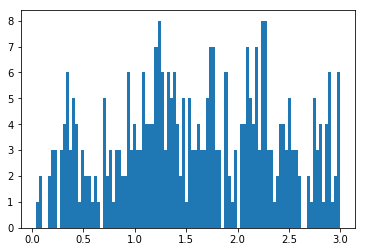

galaxies [0, 1, 1, 0, 0, 3, 3, 3, 10, 10, 8, 7, 9, 14, 28, 44, 37, 38, 67, 51]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 3, 3, 6, 6, 7, 13, 14, 10, 38, 33]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 6, 1, 1, 3, 5]
red galaxies counted [0, 1, 1, 0, 0, 3, 3, 3, 6, 7, 5, 4, 3, 8, 18, 25, 22, 27, 26, 13]
sum of galaxies: 334

Halo: 35
Halo Mass: 16756.076
N Subhalos from Illustris Algorithm: 1139 63.186217069625854
R500c, R200c, R200m: 0.44621634876612454 0.6812038057936455 0.8524268307267884
before dev loop: 63.21477699279785
True
566208 566208 time 63.268731117248535
N Subhalos within 5*R200m: 508 63.45889616012573


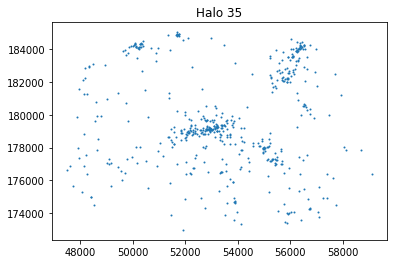

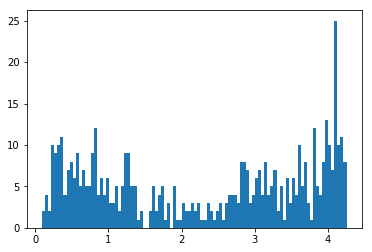

galaxies [1, 0, 2, 3, 5, 9, 14, 17, 10, 23, 17, 30, 19, 32, 16, 23, 21, 44, 72, 150]
blue galaxies counted [0, 0, 0, 0, 0, 2, 2, 4, 4, 5, 5, 8, 6, 11, 10, 8, 14, 34, 48, 83]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 1, 1, 2, 1, 0, 5, 14]
red galaxies counted [1, 0, 2, 3, 5, 6, 10, 13, 6, 18, 11, 17, 13, 20, 5, 13, 6, 10, 19, 53]
sum of galaxies: 508

Halo: 36
Halo Mass: 16702.426
N Subhalos from Illustris Algorithm: 1269 65.23836207389832
R500c, R200c, R200m: 0.4376716756996652 0.6661150612662756 0.8492032566997574
before dev loop: 65.26199316978455
True
566208 566208 time 65.31891298294067
N Subhalos within 5*R200m: 502 65.3982470035553


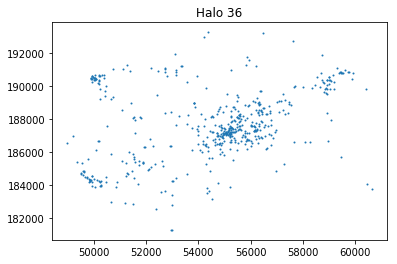

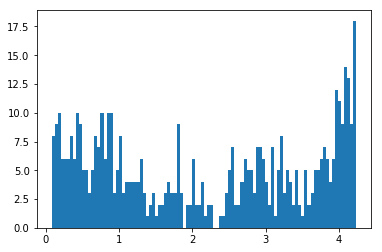

galaxies [5, 2, 6, 6, 11, 8, 7, 12, 18, 14, 19, 32, 25, 25, 15, 26, 22, 45, 67, 136]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 4, 2, 3, 11, 8, 13, 12, 12, 24, 20, 38, 54, 71]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 0, 3, 1, 1, 4, 1, 2, 0, 0, 0, 1, 5, 12]
red galaxies counted [4, 2, 5, 6, 10, 5, 6, 8, 13, 10, 7, 20, 11, 11, 3, 2, 2, 6, 8, 53]
sum of galaxies: 501

Halo: 37
Halo Mass: 16608.855
N Subhalos from Illustris Algorithm: 1257 67.17097401618958
R500c, R200c, R200m: 0.4566091322127358 0.7167290968668999 0.8825100786829236
before dev loop: 67.19147801399231
True
566208 566208 time 67.41936922073364
N Subhalos within 5*R200m: 361 67.52412104606628


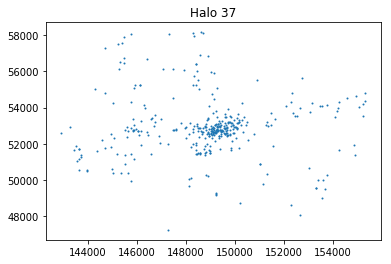

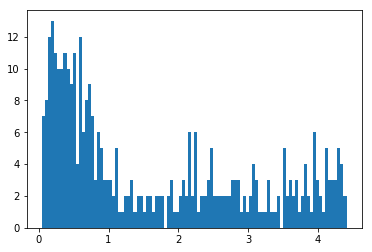

galaxies [3, 6, 7, 7, 15, 10, 13, 19, 24, 19, 25, 18, 12, 13, 11, 13, 29, 29, 30, 52]
blue galaxies counted [1, 0, 2, 1, 3, 1, 1, 6, 8, 7, 8, 10, 9, 8, 10, 12, 20, 27, 26, 46]
red galaxies counted [0, 0, 0, 1, 3, 2, 3, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3, 1, 1, 2]
red galaxies counted [2, 6, 5, 5, 9, 7, 9, 12, 14, 11, 14, 8, 2, 3, 1, 1, 6, 1, 3, 4]
sum of galaxies: 355

Halo: 38
Halo Mass: 16264.685
N Subhalos from Illustris Algorithm: 1115 69.60048389434814
R500c, R200c, R200m: 0.4649485486468481 0.705506239104883 0.8694410722288736
before dev loop: 69.62971210479736
True
566208 566208 time 69.76415801048279
N Subhalos within 5*R200m: 385 69.96152901649475


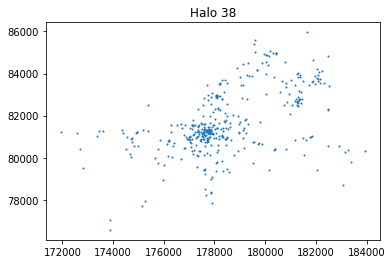

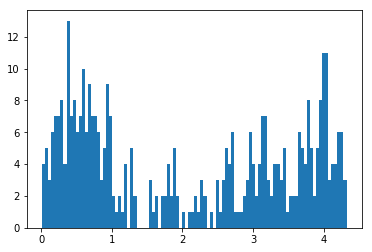

galaxies [5, 1, 2, 5, 7, 9, 8, 18, 14, 20, 23, 20, 21, 13, 6, 17, 12, 30, 55, 94]
blue galaxies counted [0, 0, 0, 1, 0, 2, 2, 1, 3, 7, 8, 8, 5, 9, 5, 13, 11, 24, 46, 64]
red galaxies counted [1, 0, 1, 0, 1, 1, 1, 1, 1, 4, 3, 1, 2, 0, 0, 2, 0, 2, 1, 8]
red galaxies counted [4, 1, 1, 4, 6, 6, 5, 16, 10, 9, 12, 11, 14, 4, 1, 2, 1, 4, 8, 22]
sum of galaxies: 380

Halo: 39
Halo Mass: 16316.715
N Subhalos from Illustris Algorithm: 1359 72.22871994972229
R500c, R200c, R200m: 0.46365591627992336 0.6863511152795302 0.8386660289524813
before dev loop: 72.27751111984253
True
566208 566208 time 72.3601381778717
N Subhalos within 5*R200m: 477 72.43191313743591


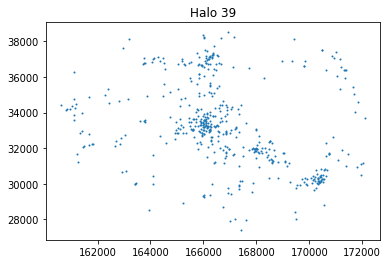

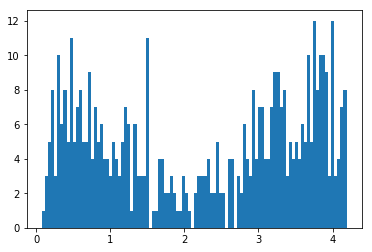

galaxies [0, 0, 2, 3, 6, 8, 10, 10, 19, 14, 24, 20, 20, 25, 27, 19, 22, 33, 89, 125]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 5, 3, 8, 9, 9, 14, 21, 13, 21, 26, 55, 106]
red galaxies counted [0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 6]
red galaxies counted [0, 0, 2, 0, 5, 7, 8, 8, 13, 9, 14, 10, 9, 8, 4, 5, 0, 4, 32, 13]
sum of galaxies: 476

Halo: 40
Halo Mass: 15832.792
N Subhalos from Illustris Algorithm: 1144 74.24628710746765
R500c, R200c, R200m: 0.4847836976637453 0.7167998777769817 0.8706583597582565
before dev loop: 74.27925491333008
True
566208 566208 time 74.36319398880005
N Subhalos within 5*R200m: 391 74.46917486190796


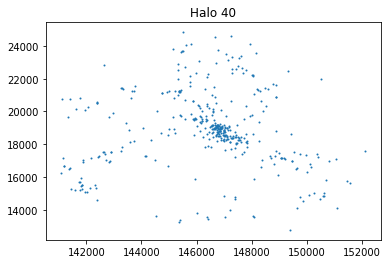

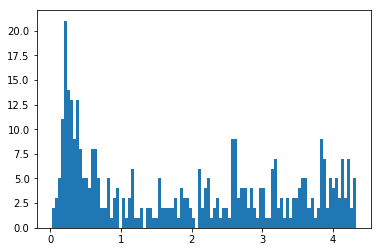

galaxies [2, 0, 10, 5, 22, 16, 15, 20, 12, 14, 17, 11, 8, 13, 14, 21, 24, 44, 46, 74]
blue galaxies counted [1, 0, 4, 2, 3, 4, 4, 3, 5, 3, 7, 5, 5, 9, 13, 15, 21, 35, 44, 65]
red galaxies counted [0, 0, 0, 0, 2, 3, 3, 2, 0, 2, 0, 1, 0, 1, 0, 3, 1, 4, 1, 3]
red galaxies counted [1, 0, 6, 3, 17, 9, 8, 15, 7, 9, 10, 5, 3, 3, 1, 3, 2, 5, 1, 6]
sum of galaxies: 388

Halo: 41
Halo Mass: 15685.505
N Subhalos from Illustris Algorithm: 1182 75.56361508369446
R500c, R200c, R200m: 0.4468006115499111 0.6785427958777402 0.8511478901422438
before dev loop: 75.58249521255493
True
566208 566208 time 75.65624117851257
N Subhalos within 5*R200m: 448 75.74340009689331


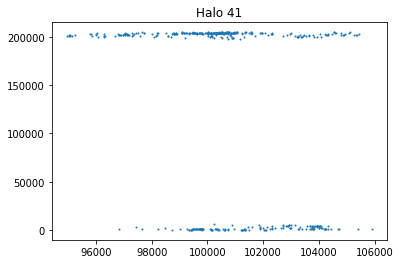

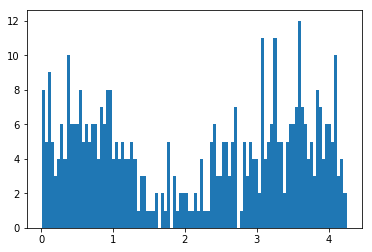

galaxies [4, 6, 4, 2, 3, 4, 9, 15, 12, 12, 20, 19, 30, 24, 11, 15, 19, 48, 76, 104]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 4, 3, 4, 5, 8, 10, 10, 15, 18, 38, 62, 66]
red galaxies counted [0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 3, 2, 0, 0, 1, 3, 4, 5]
red galaxies counted [4, 4, 4, 2, 1, 4, 7, 15, 7, 9, 13, 13, 19, 12, 1, 0, 0, 7, 10, 33]
sum of galaxies: 437

Halo: 42
Halo Mass: 15768.786
N Subhalos from Illustris Algorithm: 1214 77.46369004249573
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
before dev loop: 77.48525309562683
True
566208 566208 time 77.59291505813599
N Subhalos within 5*R200m: 522 78.0670371055603


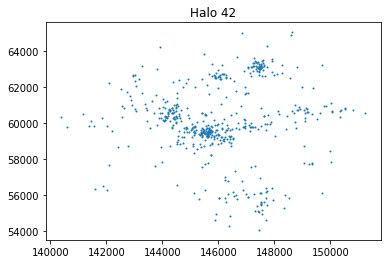

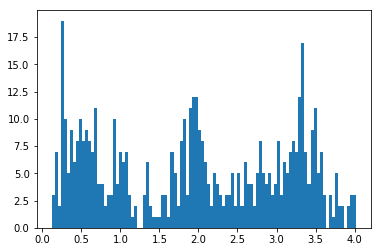

galaxies [0, 0, 3, 2, 5, 16, 17, 11, 15, 23, 28, 14, 29, 15, 15, 41, 73, 46, 101, 68]
blue galaxies counted [0, 0, 0, 1, 0, 8, 6, 2, 4, 5, 12, 2, 9, 8, 9, 28, 36, 33, 76, 57]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 1, 1, 4, 3, 6, 2]
red galaxies counted [0, 0, 3, 1, 3, 7, 10, 6, 10, 13, 15, 8, 20, 4, 5, 12, 33, 10, 19, 9]
sum of galaxies: 522

Halo: 43
Halo Mass: 15200.831
N Subhalos from Illustris Algorithm: 1214 79.38399291038513
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
before dev loop: 79.40491008758545
True
566208 566208 time 79.47349309921265
N Subhalos within 5*R200m: 673 79.59881687164307


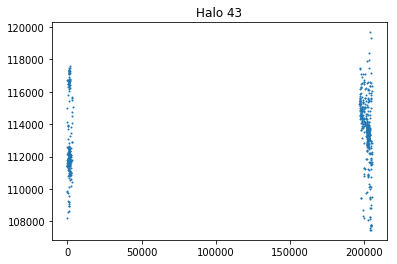

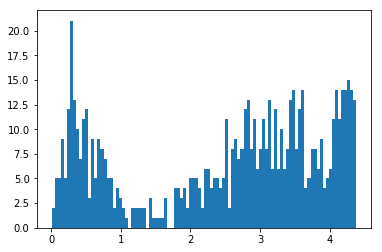

galaxies [1, 3, 5, 6, 5, 17, 24, 16, 23, 17, 23, 18, 11, 10, 8, 23, 44, 99, 139, 175]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 3, 2, 15, 6, 6, 10, 5, 19, 31, 39, 85, 129]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 9, 5, 11]
red galaxies counted [1, 2, 5, 4, 4, 15, 17, 14, 19, 14, 7, 11, 4, 0, 3, 4, 12, 51, 49, 35]
sum of galaxies: 667

Halo: 44
Halo Mass: 14879.6455
N Subhalos from Illustris Algorithm: 1025 80.38977813720703
R500c, R200c, R200m: 0.4407996074222926 0.6726693415122941 0.8441294504666501
before dev loop: 80.41296815872192
True
566208 566208 time 80.46108794212341
N Subhalos within 5*R200m: 306 80.64379096031189


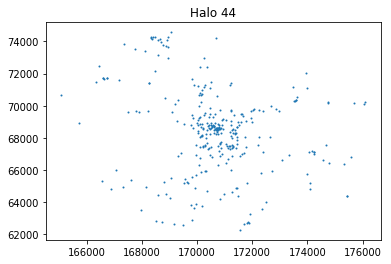

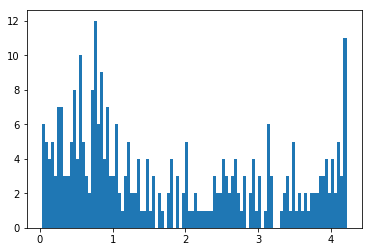

galaxies [4, 1, 3, 4, 3, 7, 10, 4, 13, 17, 13, 31, 21, 14, 15, 12, 15, 30, 29, 53]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 6, 3, 10, 6, 6, 7, 10, 12, 25, 21, 40]
red galaxies counted [0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 4, 1, 0, 1, 2, 0, 1, 2, 2]
red galaxies counted [4, 1, 2, 3, 2, 5, 9, 3, 8, 10, 9, 17, 14, 8, 7, 0, 3, 4, 6, 11]
sum of galaxies: 299

Halo: 45
Halo Mass: 14590.398
N Subhalos from Illustris Algorithm: 1159 81.92264795303345
R500c, R200c, R200m: 0.4273328987279976 0.6585129593236665 0.8233019274683564
before dev loop: 81.9555811882019
True
566208 566208 time 82.05506706237793
N Subhalos within 5*R200m: 341 82.27566409111023


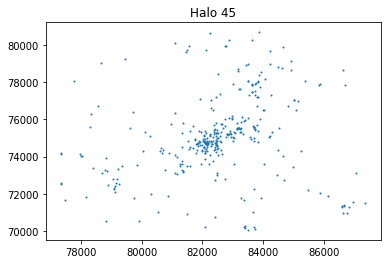

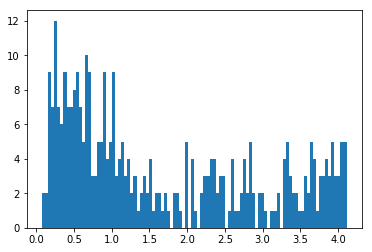

galaxies [1, 0, 2, 5, 7, 13, 10, 12, 16, 22, 24, 15, 31, 21, 15, 13, 19, 29, 30, 55]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 4, 8, 4, 4, 12, 15, 5, 12, 16, 20, 27, 46]
red galaxies counted [0, 0, 0, 0, 1, 3, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 3]
red galaxies counted [1, 0, 2, 5, 6, 9, 8, 7, 11, 13, 17, 10, 17, 5, 9, 0, 2, 5, 2, 6]
sum of galaxies: 340

Halo: 46
Halo Mass: 14551.992
N Subhalos from Illustris Algorithm: 1044 83.91003727912903
R500c, R200c, R200m: 0.44943243635074304 0.702010991290626 0.8500623960268822
before dev loop: 83.93783903121948
True
566208 566208 time 84.00451493263245
N Subhalos within 5*R200m: 484 84.4306640625


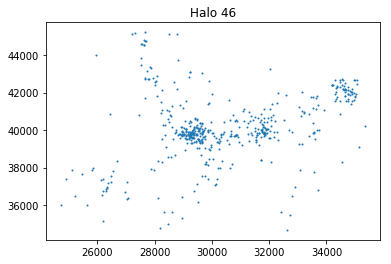

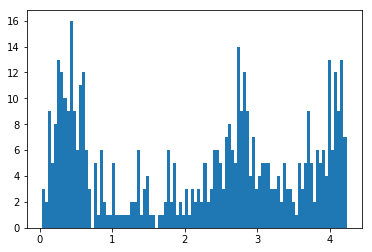

galaxies [2, 5, 4, 5, 4, 15, 14, 19, 25, 25, 13, 13, 9, 6, 18, 19, 24, 89, 61, 111]
blue galaxies counted [0, 0, 1, 3, 1, 4, 1, 1, 3, 3, 4, 7, 8, 5, 13, 10, 20, 53, 50, 54]
red galaxies counted [1, 0, 2, 0, 2, 2, 0, 2, 3, 4, 1, 1, 0, 1, 1, 2, 1, 9, 3, 13]
red galaxies counted [1, 5, 1, 2, 1, 9, 13, 16, 19, 18, 8, 5, 1, 0, 4, 7, 3, 27, 8, 44]
sum of galaxies: 481

Halo: 47
Halo Mass: 14482.507
N Subhalos from Illustris Algorithm: 1136 86.08358693122864
R500c, R200c, R200m: 0.45256265003710044 0.6874541444846066 0.8357311033200715
before dev loop: 86.11285591125488
True
566208 566208 time 86.30399990081787
N Subhalos within 5*R200m: 425 86.61109113693237


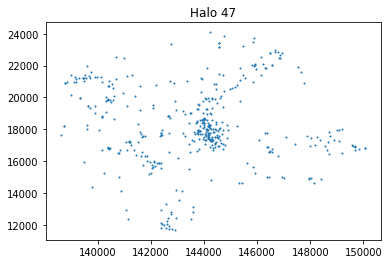

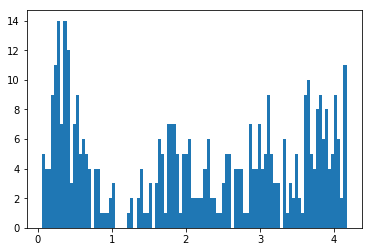

galaxies [4, 2, 1, 4, 9, 15, 15, 21, 12, 18, 16, 8, 8, 3, 11, 41, 35, 32, 63, 105]
blue galaxies counted [2, 0, 0, 1, 6, 4, 4, 5, 3, 7, 5, 5, 8, 2, 7, 28, 24, 31, 58, 84]
red galaxies counted [1, 1, 1, 0, 2, 3, 2, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 0, 2, 7]
red galaxies counted [1, 1, 0, 3, 1, 8, 9, 15, 9, 9, 9, 3, 0, 1, 3, 9, 10, 1, 3, 14]
sum of galaxies: 423

Halo: 48
Halo Mass: 14301.584
N Subhalos from Illustris Algorithm: 1129 87.63014483451843
R500c, R200c, R200m: 0.4368544924776116 0.687337484093216 0.8566500650053713
before dev loop: 87.65279197692871
True
566208 566208 time 87.71683406829834
N Subhalos within 5*R200m: 407 88.05100893974304


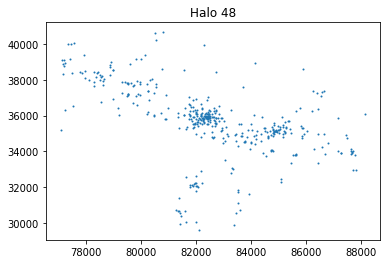

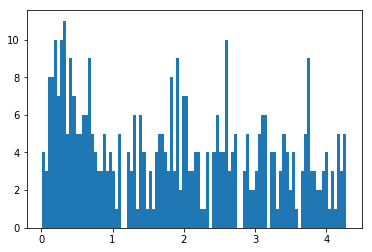

galaxies [2, 5, 5, 8, 8, 8, 16, 13, 14, 13, 20, 14, 12, 17, 20, 38, 36, 46, 50, 56]
blue galaxies counted [0, 0, 0, 2, 1, 3, 3, 3, 4, 2, 10, 6, 7, 9, 11, 19, 26, 30, 39, 50]
red galaxies counted [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 5, 2, 4, 0, 2]
red galaxies counted [2, 4, 4, 5, 7, 5, 12, 10, 9, 10, 10, 8, 5, 7, 8, 14, 8, 12, 11, 4]
sum of galaxies: 401

Halo: 49
Halo Mass: 14361.839
N Subhalos from Illustris Algorithm: 1337 88.75149822235107
R500c, R200c, R200m: 0.3768843255150251 0.5990511097905536 0.7415446917762308
before dev loop: 88.76380896568298
True
566208 566208 time 88.82533383369446
N Subhalos within 5*R200m: 381 88.94464087486267


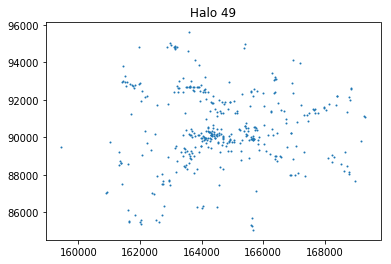

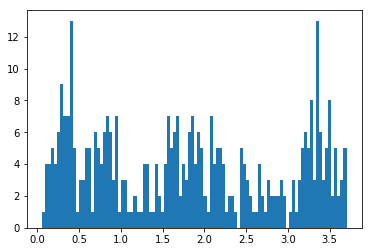

galaxies [0, 1, 3, 4, 4, 5, 10, 14, 19, 8, 13, 14, 27, 13, 13, 37, 40, 40, 29, 86]
blue galaxies counted [0, 1, 0, 2, 1, 2, 1, 6, 4, 4, 3, 5, 11, 9, 10, 34, 34, 31, 27, 72]
red galaxies counted [0, 0, 2, 1, 1, 0, 1, 1, 3, 0, 1, 1, 3, 1, 0, 1, 2, 4, 1, 5]
red galaxies counted [0, 0, 1, 1, 2, 3, 8, 7, 12, 4, 9, 8, 13, 3, 3, 2, 4, 5, 1, 9]
sum of galaxies: 380

Halo: 50
Halo Mass: 13977.665
N Subhalos from Illustris Algorithm: 1162 89.56712412834167
R500c, R200c, R200m: 0.40147216443032 0.6469831173882855 0.8314299619990567
before dev loop: 89.58973097801208
True
566208 566208 time 89.64798307418823
N Subhalos within 5*R200m: 462 89.73064804077148


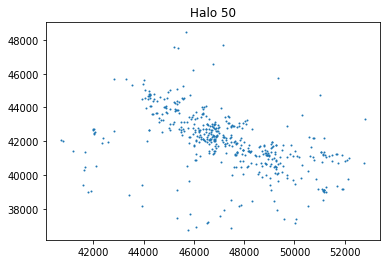

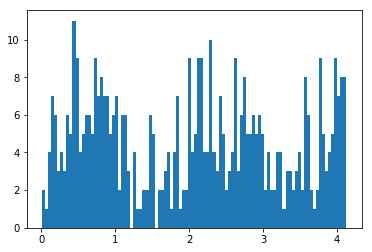

galaxies [1, 2, 5, 3, 6, 4, 6, 7, 17, 16, 18, 29, 27, 20, 17, 24, 56, 61, 53, 87]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 4, 4, 13, 12, 10, 12, 15, 30, 42, 35, 75]
red galaxies counted [1, 0, 0, 1, 1, 0, 1, 0, 1, 3, 3, 1, 2, 1, 1, 2, 5, 3, 6, 1]
red galaxies counted [0, 2, 5, 2, 5, 4, 4, 6, 14, 9, 11, 15, 13, 9, 4, 7, 21, 16, 12, 11]
sum of galaxies: 459

Halo: 51
Halo Mass: 14048.193
N Subhalos from Illustris Algorithm: 1003 90.69727301597595
R500c, R200c, R200m: 0.42710033859979313 0.6468001999798217 0.7990631489348509
before dev loop: 90.72916221618652
True
566208 566208 time 90.78628492355347
N Subhalos within 5*R200m: 436 91.07370400428772


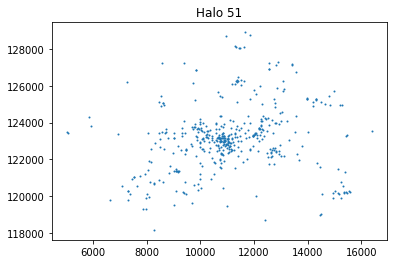

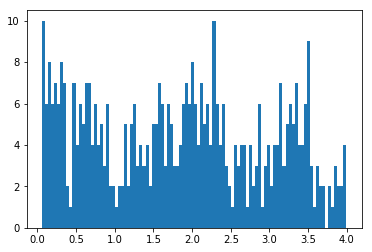

galaxies [4, 0, 8, 6, 6, 7, 10, 11, 5, 14, 20, 18, 14, 17, 26, 39, 59, 51, 54, 61]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 9, 6, 6, 4, 13, 23, 27, 33, 48, 55]
red galaxies counted [0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 5, 5, 3, 0, 2]
red galaxies counted [4, 0, 6, 5, 6, 6, 6, 8, 5, 9, 10, 11, 7, 12, 13, 11, 27, 15, 6, 4]
sum of galaxies: 430

Halo: 52
Halo Mass: 13769.684
N Subhalos from Illustris Algorithm: 917 92.57049989700317
R500c, R200c, R200m: 0.41704704730108577 0.6642341226359727 0.8275377325646801
before dev loop: 92.59206318855286
True
566208 566208 time 92.6522331237793
N Subhalos within 5*R200m: 432 92.90428709983826


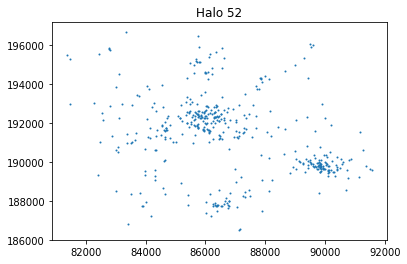

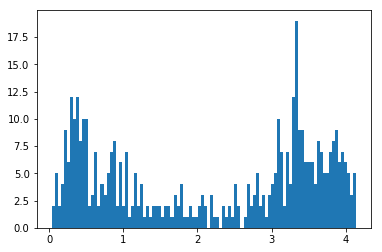

galaxies [2, 3, 1, 2, 6, 8, 16, 20, 19, 15, 12, 17, 24, 15, 11, 17, 15, 24, 92, 111]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 8, 4, 5, 4, 8, 9, 4, 10, 15, 11, 18, 46, 63]
red galaxies counted [1, 0, 0, 1, 1, 2, 4, 1, 2, 3, 1, 1, 1, 1, 0, 1, 2, 1, 9, 3]
red galaxies counted [1, 3, 1, 1, 5, 6, 10, 11, 13, 7, 7, 8, 14, 10, 1, 1, 2, 5, 37, 45]
sum of galaxies: 430

Halo: 53
Halo Mass: 13625.6455
N Subhalos from Illustris Algorithm: 958 93.90837812423706
R500c, R200c, R200m: 0.4059635494644054 0.6272828444381676 0.7807677249189424
before dev loop: 93.92759585380554
True
566208 566208 time 93.98883199691772
N Subhalos within 5*R200m: 320 94.06335496902466


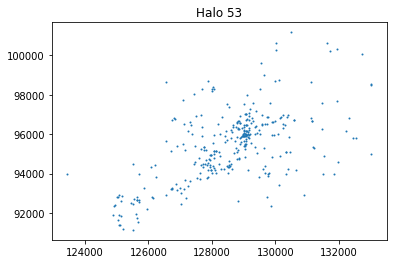

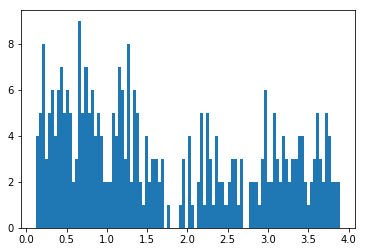

galaxies [0, 0, 3, 5, 6, 3, 8, 10, 13, 13, 17, 21, 17, 25, 27, 19, 12, 32, 37, 52]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 6, 4, 9, 7, 6, 18, 16, 9, 28, 36, 50]
red galaxies counted [0, 0, 0, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 0, 2, 2, 0, 1]
red galaxies counted [0, 0, 3, 3, 3, 2, 7, 6, 10, 6, 12, 10, 9, 16, 8, 3, 1, 2, 1, 1]
sum of galaxies: 320

Halo: 54
Halo Mass: 13448.043
N Subhalos from Illustris Algorithm: 1050 95.32436490058899
R500c, R200c, R200m: 0.4276346383882278 0.6553686935448664 0.8081837976536561
before dev loop: 95.35942482948303
True
566208 566208 time 95.56429600715637
N Subhalos within 5*R200m: 315 95.77365803718567


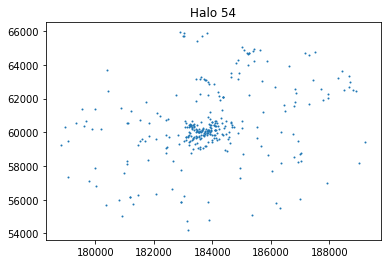

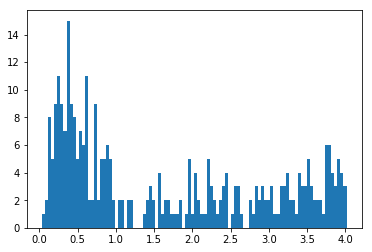

galaxies [0, 3, 5, 5, 8, 9, 14, 18, 21, 14, 19, 20, 14, 8, 8, 12, 23, 22, 33, 58]
blue galaxies counted [0, 1, 0, 0, 1, 0, 2, 5, 5, 3, 5, 4, 6, 7, 8, 9, 18, 20, 25, 53]
red galaxies counted [0, 0, 1, 1, 2, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3]
red galaxies counted [0, 2, 4, 4, 5, 6, 10, 13, 13, 10, 13, 15, 7, 1, 0, 3, 4, 1, 7, 2]
sum of galaxies: 314

Halo: 55
Halo Mass: 13161.834
N Subhalos from Illustris Algorithm: 952 97.65549898147583
R500c, R200c, R200m: 0.43555845718231756 0.675873859140457 0.8280938911635812
before dev loop: 97.69910597801208
True
566208 566208 time 97.82333302497864
N Subhalos within 5*R200m: 590 98.0406858921051


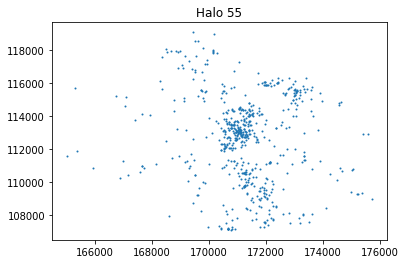

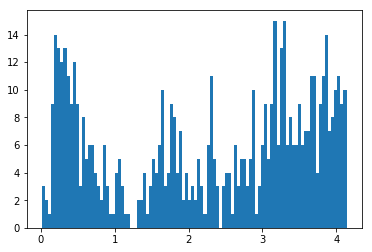

galaxies [1, 1, 1, 7, 15, 13, 16, 21, 22, 16, 19, 13, 12, 9, 19, 52, 31, 49, 114, 155]
blue galaxies counted [0, 0, 0, 0, 1, 1, 2, 6, 11, 8, 7, 5, 7, 7, 14, 30, 24, 36, 79, 104]
red galaxies counted [1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 8, 0, 5, 10, 11]
red galaxies counted [0, 1, 1, 6, 12, 10, 13, 14, 11, 6, 11, 6, 5, 2, 4, 14, 7, 8, 25, 40]
sum of galaxies: 586

Halo: 56
Halo Mass: 12963.17
N Subhalos from Illustris Algorithm: 931 99.29280304908752
R500c, R200c, R200m: 0.4484811777509382 0.6669694765281348 0.8227694692646863
before dev loop: 99.31349587440491
True
566208 566208 time 99.36254501342773
N Subhalos within 5*R200m: 315 99.41924595832825


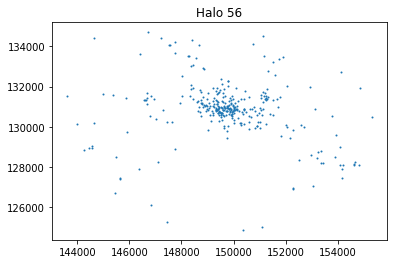

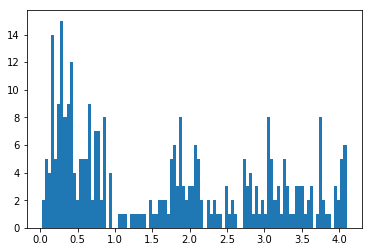

galaxies [2, 2, 3, 9, 8, 11, 19, 13, 16, 9, 18, 22, 7, 5, 6, 28, 29, 18, 41, 45]
blue galaxies counted [1, 0, 0, 0, 1, 5, 4, 5, 6, 3, 3, 4, 4, 4, 6, 17, 20, 15, 37, 43]
red galaxies counted [1, 0, 1, 1, 3, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 3, 1, 1, 1]
red galaxies counted [0, 2, 2, 8, 4, 5, 14, 8, 10, 5, 13, 16, 3, 1, 0, 9, 6, 2, 3, 1]
sum of galaxies: 311

Halo: 57
Halo Mass: 12960.73
N Subhalos from Illustris Algorithm: 877 100.17087602615356
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
before dev loop: 100.20435810089111
True
566208 566208 time 100.25202918052673
N Subhalos within 5*R200m: 352 100.31684112548828


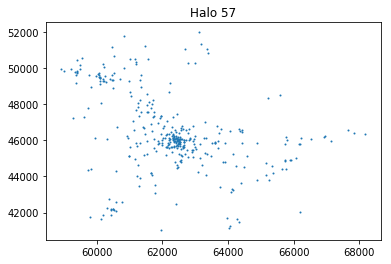

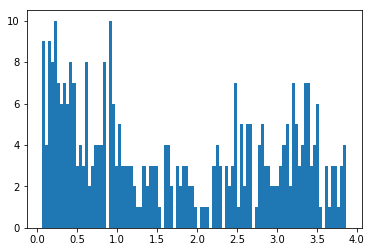

galaxies [6, 1, 3, 7, 10, 11, 10, 12, 14, 11, 14, 13, 26, 20, 14, 17, 16, 37, 48, 59]
blue galaxies counted [0, 0, 0, 0, 2, 2, 5, 5, 6, 1, 3, 2, 6, 7, 10, 13, 15, 31, 46, 54]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 1, 1, 2, 0, 3, 1, 1]
red galaxies counted [5, 1, 3, 7, 7, 7, 5, 7, 8, 9, 6, 11, 18, 12, 3, 2, 1, 3, 1, 4]
sum of galaxies: 349

Halo: 58
Halo Mass: 13182.956
N Subhalos from Illustris Algorithm: 965 100.96663999557495
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
before dev loop: 101.00276494026184
True
566208 566208 time 101.05651187896729
N Subhalos within 5*R200m: 288 101.11782789230347


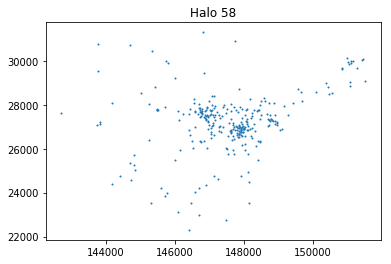

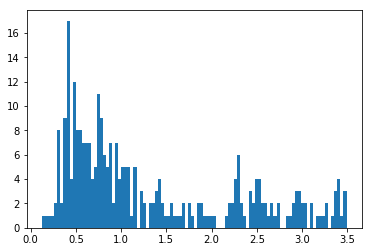

galaxies [0, 0, 0, 1, 1, 1, 1, 10, 15, 28, 27, 20, 36, 27, 15, 17, 13, 20, 25, 31]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 4, 4, 5, 3, 12, 12, 6, 13, 13, 17, 22, 26]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 7, 10, 20, 21, 15, 22, 15, 9, 2, 0, 1, 3, 3]
sum of galaxies: 288

Halo: 59
Halo Mass: 13078.665
N Subhalos from Illustris Algorithm: 1076 101.88045406341553
R500c, R200c, R200m: 0.3768838851360597 0.5819397447093628 0.7190154643865688
before dev loop: 101.91929793357849
True
566208 566208 time 101.975821018219
N Subhalos within 5*R200m: 283 102.04096508026123


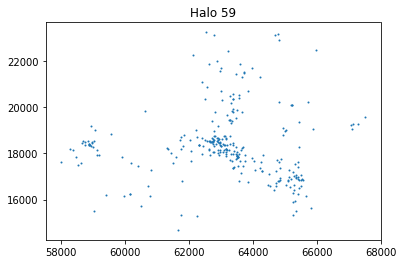

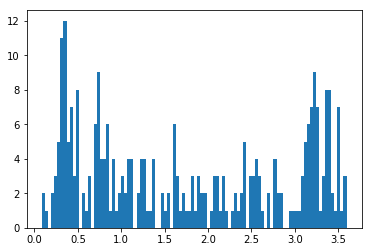

galaxies [0, 1, 1, 1, 0, 2, 6, 16, 16, 16, 3, 17, 18, 16, 14, 16, 18, 22, 26, 74]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 5, 3, 5, 3, 6, 12, 9, 9, 13, 17, 19, 26, 52]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 6, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 3]
red galaxies counted [0, 1, 0, 1, 0, 1, 5, 5, 12, 11, 0, 9, 5, 7, 5, 2, 1, 3, 0, 19]
sum of galaxies: 283

Halo: 60
Halo Mass: 13212.502
N Subhalos from Illustris Algorithm: 1004 102.9092960357666
R500c, R200c, R200m: 0.3776427781968694 0.5875990547942501 0.7484706518690818
before dev loop: 102.9338059425354
True
566208 566208 time 102.991770029068
N Subhalos within 5*R200m: 402 103.0648250579834


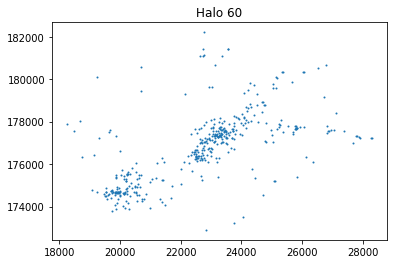

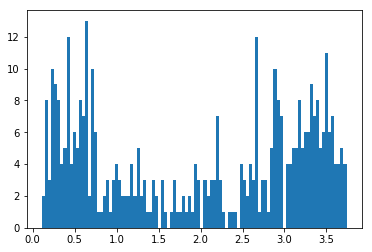

galaxies [0, 0, 2, 3, 5, 7, 15, 12, 14, 17, 27, 21, 7, 16, 18, 13, 18, 29, 67, 111]
blue galaxies counted [0, 0, 1, 1, 1, 1, 1, 2, 2, 7, 11, 8, 3, 9, 13, 13, 16, 20, 41, 68]
red galaxies counted [0, 0, 0, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 6, 7]
red galaxies counted [0, 0, 1, 1, 4, 5, 11, 9, 10, 8, 14, 12, 4, 5, 5, 0, 2, 7, 20, 36]
sum of galaxies: 402

Halo: 61
Halo Mass: 12851.317
N Subhalos from Illustris Algorithm: 940 103.9096040725708
R500c, R200c, R200m: 0.44482178868592587 0.6774657890660761 0.8176854942809225
before dev loop: 103.98066401481628
True
566208 566208 time 104.22814989089966
N Subhalos within 5*R200m: 285 104.30581903457642


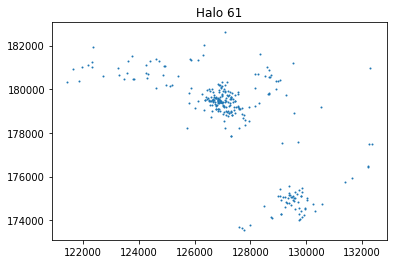

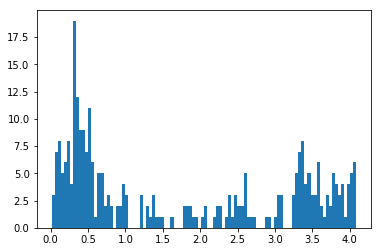

galaxies [3, 4, 5, 3, 6, 8, 16, 22, 17, 22, 11, 7, 11, 3, 9, 6, 10, 21, 28, 65]
blue galaxies counted [2, 1, 2, 0, 0, 3, 5, 11, 6, 9, 5, 5, 6, 2, 9, 6, 10, 18, 17, 43]
red galaxies counted [0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3]
red galaxies counted [1, 2, 3, 2, 4, 4, 8, 10, 11, 12, 6, 2, 3, 1, 0, 0, 0, 1, 11, 19]
sum of galaxies: 277

Halo: 62
Halo Mass: 13000.34
N Subhalos from Illustris Algorithm: 1047 105.28837299346924
R500c, R200c, R200m: 0.4069041589001368 0.6331709514128275 0.782193111526722
before dev loop: 105.32207298278809
True
566208 566208 time 105.37170600891113
N Subhalos within 5*R200m: 230 105.42831707000732


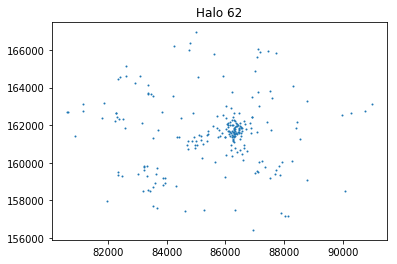

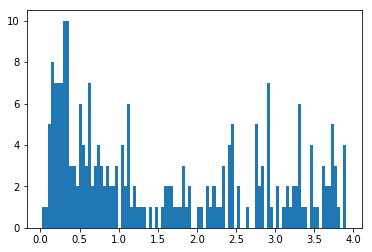

galaxies [0, 1, 4, 7, 7, 8, 8, 20, 6, 11, 11, 13, 10, 15, 4, 10, 12, 18, 26, 37]
blue galaxies counted [0, 0, 1, 1, 1, 2, 1, 7, 5, 1, 4, 4, 3, 8, 3, 9, 10, 18, 24, 34]
red galaxies counted [0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1]
red galaxies counted [0, 1, 2, 5, 6, 3, 6, 11, 1, 9, 7, 8, 5, 7, 1, 1, 1, 0, 1, 2]
sum of galaxies: 228

Halo: 63
Halo Mass: 12791.595
N Subhalos from Illustris Algorithm: 1053 106.1280128955841
R500c, R200c, R200m: 0.3190893103661079 0.4831797173682535 0.6043714081409539
before dev loop: 106.15641593933105
True
566208 566208 time 106.2222969532013
N Subhalos within 5*R200m: 250 106.2938289642334


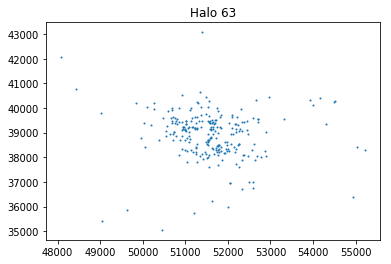

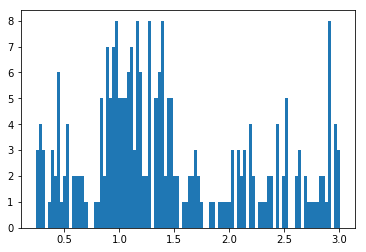

galaxies [0, 0, 0, 0, 0, 0, 0, 6, 4, 5, 10, 8, 5, 21, 44, 41, 28, 15, 26, 37]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 8, 11, 11, 12, 11, 22, 29]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 3, 1, 2, 0, 1, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 6, 2, 5, 4, 6, 4, 12, 30, 29, 14, 4, 3, 4]
sum of galaxies: 250

Halo: 64
Halo Mass: 12665.866
N Subhalos from Illustris Algorithm: 1018 107.50939893722534
R500c, R200c, R200m: 0.367235702451107 0.5818826155472097 0.7505591691299134
before dev loop: 107.53490090370178
True
566208 566208 time 107.58481907844543
N Subhalos within 5*R200m: 379 107.66093897819519


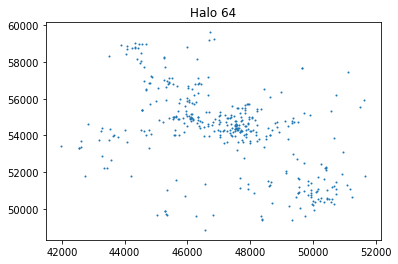

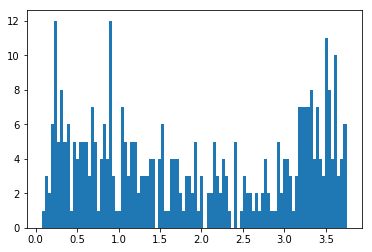

galaxies [1, 0, 1, 3, 3, 10, 10, 11, 9, 12, 14, 16, 28, 18, 27, 24, 23, 29, 35, 105]
blue galaxies counted [1, 0, 0, 0, 0, 1, 0, 4, 2, 4, 1, 5, 8, 5, 20, 19, 21, 23, 28, 67]
red galaxies counted [0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 7]
red galaxies counted [0, 0, 1, 1, 1, 9, 8, 5, 7, 8, 12, 11, 17, 13, 4, 4, 1, 5, 6, 31]
sum of galaxies: 379

Halo: 65
Halo Mass: 12642.344
N Subhalos from Illustris Algorithm: 959 108.49576997756958
R500c, R200c, R200m: 0.439799586860678 0.6577448183045825 0.8080822702848962
before dev loop: 108.52341914176941
True
566208 566208 time 108.57233500480652
N Subhalos within 5*R200m: 394 108.64792585372925


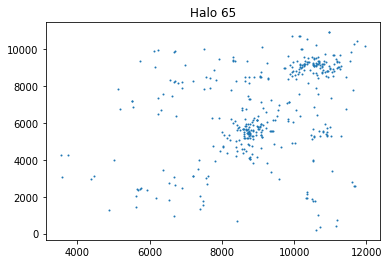

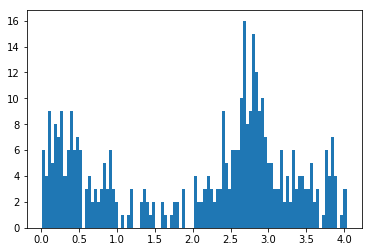

galaxies [0, 4, 9, 1, 10, 5, 11, 14, 12, 10, 9, 12, 15, 5, 10, 8, 20, 77, 95, 57]
blue galaxies counted [0, 0, 0, 0, 1, 2, 3, 6, 1, 0, 3, 2, 8, 5, 9, 7, 17, 37, 55, 52]
red galaxies counted [0, 1, 1, 0, 4, 0, 1, 1, 5, 0, 2, 1, 1, 0, 0, 0, 0, 9, 5, 1]
red galaxies counted [0, 3, 8, 1, 5, 3, 7, 7, 6, 10, 4, 9, 6, 0, 1, 1, 3, 31, 35, 4]
sum of galaxies: 384

Halo: 66
Halo Mass: 12543.711
N Subhalos from Illustris Algorithm: 988 109.30936217308044
R500c, R200c, R200m: 0.4270170669408733 0.6657589147865878 0.8070997447785451
before dev loop: 109.33353209495544
True
566208 566208 time 109.38680481910706
N Subhalos within 5*R200m: 333 109.458820104599


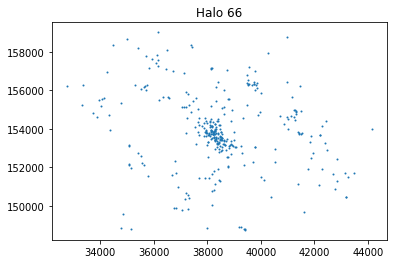

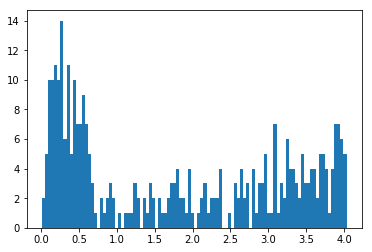

galaxies [2, 4, 6, 9, 11, 10, 18, 14, 15, 22, 15, 4, 7, 7, 10, 17, 18, 22, 43, 73]
blue galaxies counted [1, 2, 2, 5, 6, 0, 3, 1, 6, 8, 3, 4, 4, 5, 9, 14, 15, 18, 38, 60]
red galaxies counted [0, 0, 1, 0, 0, 3, 2, 0, 4, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 3]
red galaxies counted [1, 2, 3, 4, 5, 7, 13, 13, 5, 12, 11, 0, 1, 1, 1, 2, 1, 3, 3, 10]
sum of galaxies: 327

Halo: 67
Halo Mass: 12368.131
N Subhalos from Illustris Algorithm: 844 110.11549806594849
R500c, R200c, R200m: 0.4156237825192306 0.6333442205185029 0.7830733890441879
before dev loop: 110.1433482170105
True
566208 566208 time 110.1909830570221
N Subhalos within 5*R200m: 297 110.24903416633606


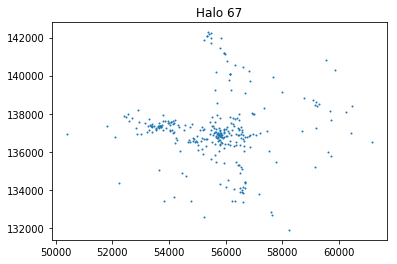

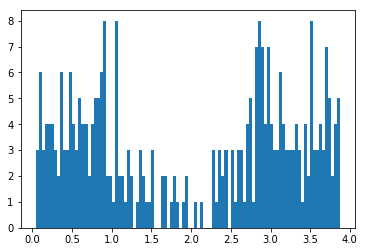

galaxies [0, 6, 0, 4, 5, 4, 5, 5, 9, 11, 13, 15, 20, 16, 11, 11, 6, 22, 66, 65]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 4, 9, 7, 6, 6, 5, 16, 47, 57]
red galaxies counted [0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 3, 3, 3]
red galaxies counted [0, 5, 0, 2, 4, 3, 4, 4, 9, 9, 5, 10, 10, 7, 5, 3, 1, 3, 16, 5]
sum of galaxies: 294

Halo: 68
Halo Mass: 12416.961
N Subhalos from Illustris Algorithm: 1120 111.31538391113281
R500c, R200c, R200m: 0.3187205930686792 0.495798416312914 0.6181949038661593
before dev loop: 111.34126615524292
True
566208 566208 time 111.40348196029663
N Subhalos within 5*R200m: 306 111.48245000839233


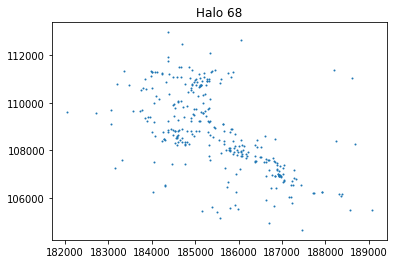

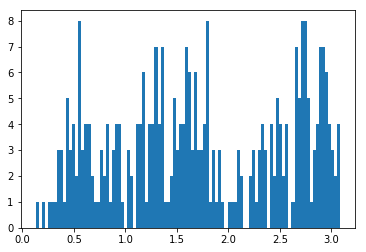

galaxies [0, 0, 0, 1, 0, 0, 1, 1, 5, 5, 11, 17, 12, 17, 14, 34, 44, 27, 37, 80]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 9, 7, 8, 3, 20, 20, 23, 33, 49]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 4, 11, 1, 2, 6]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 4, 3, 8, 7, 5, 9, 10, 10, 13, 3, 2, 25]
sum of galaxies: 306

Halo: 69
Halo Mass: 12028.139
N Subhalos from Illustris Algorithm: 983 113.4508409500122
R500c, R200c, R200m: 0.35397525125044416 0.5804813296791751 0.7596806185377467
before dev loop: 113.51105308532715
True
566208 566208 time 113.64721298217773
N Subhalos within 5*R200m: 390 113.769855260849


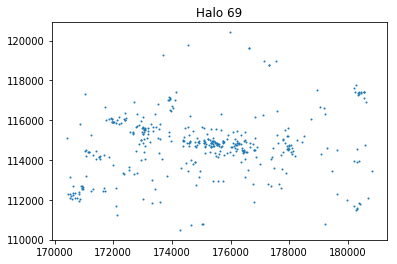

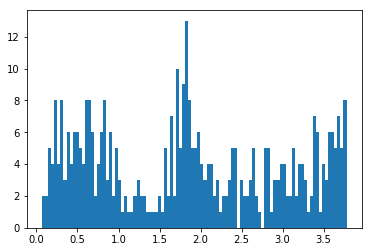

galaxies [1, 0, 2, 4, 4, 8, 7, 9, 10, 14, 21, 19, 21, 12, 12, 30, 63, 32, 44, 76]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 3, 2, 6, 8, 8, 8, 4, 9, 13, 23, 24, 38, 55]
red galaxies counted [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 2, 1, 2, 0, 3, 11, 0, 2, 4]
red galaxies counted [0, 0, 1, 3, 3, 8, 5, 5, 7, 8, 10, 9, 12, 6, 3, 14, 29, 8, 4, 17]
sum of galaxies: 389

Halo: 70
Halo Mass: 12261.962
N Subhalos from Illustris Algorithm: 1030 114.92177700996399
R500c, R200c, R200m: 0.3723632749524496 0.6190568456048823 0.7651054468407622
before dev loop: 114.95135402679443
True
566208 566208 time 115.05178308486938
N Subhalos within 5*R200m: 428 115.17060017585754


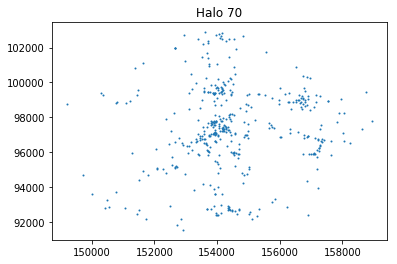

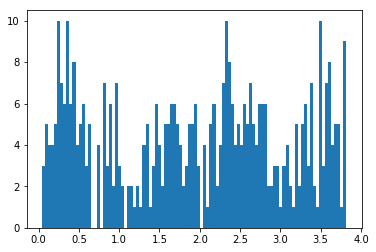

galaxies [0, 4, 3, 3, 4, 6, 12, 16, 15, 12, 13, 4, 25, 10, 16, 42, 30, 69, 57, 84]
blue galaxies counted [0, 0, 0, 1, 0, 0, 10, 7, 3, 3, 6, 2, 6, 6, 13, 27, 22, 48, 49, 67]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 3, 0, 1, 4, 1, 5, 1, 0]
red galaxies counted [0, 4, 3, 2, 4, 5, 2, 8, 10, 9, 5, 2, 16, 4, 2, 11, 7, 16, 7, 17]
sum of galaxies: 425

Halo: 71
Halo Mass: 11755.467
N Subhalos from Illustris Algorithm: 834 116.10502099990845
R500c, R200c, R200m: 0.4091707894352637 0.6354831811881032 0.7798752769282498
before dev loop: 116.12202215194702
True
566208 566208 time 116.22137093544006
N Subhalos within 5*R200m: 355 116.31846117973328


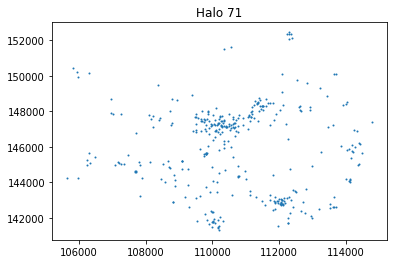

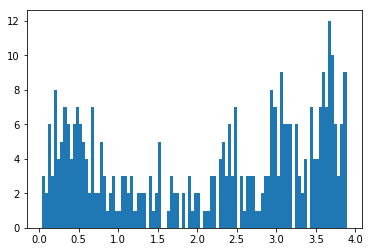

galaxies [2, 0, 4, 4, 3, 7, 8, 10, 11, 17, 11, 15, 8, 13, 11, 15, 13, 40, 61, 99]
blue galaxies counted [1, 0, 1, 1, 0, 2, 3, 4, 2, 2, 2, 7, 6, 5, 9, 14, 12, 34, 40, 76]
red galaxies counted [1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 6]
red galaxies counted [0, 0, 2, 3, 3, 4, 3, 4, 8, 15, 8, 8, 2, 6, 2, 1, 1, 5, 19, 17]
sum of galaxies: 352

Halo: 72
Halo Mass: 11179.371
N Subhalos from Illustris Algorithm: 744 118.16449022293091
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
before dev loop: 118.18731093406677
True
566208 566208 time 118.3416018486023
N Subhalos within 5*R200m: 336 118.48980903625488


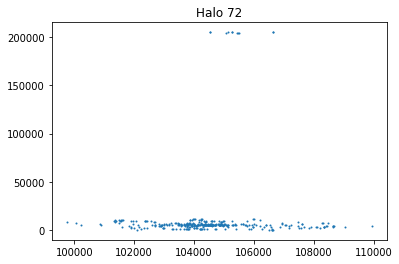

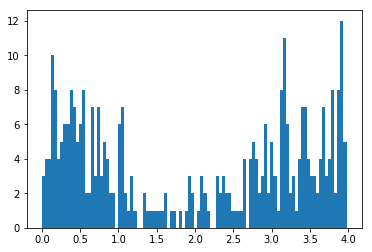

galaxies [1, 2, 4, 7, 9, 4, 7, 13, 14, 16, 11, 16, 12, 18, 6, 7, 13, 20, 63, 86]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 3, 5, 6, 3, 3, 4, 5, 5, 6, 12, 19, 49, 71]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 5, 3]
red galaxies counted [1, 1, 4, 7, 7, 4, 6, 9, 6, 9, 8, 13, 8, 13, 1, 1, 0, 1, 9, 12]
sum of galaxies: 329

Halo: 73
Halo Mass: 11412.425
N Subhalos from Illustris Algorithm: 955 120.6442129611969
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
before dev loop: 120.67524909973145
True
566208 566208 time 120.80077600479126
N Subhalos within 5*R200m: 343 120.98023319244385


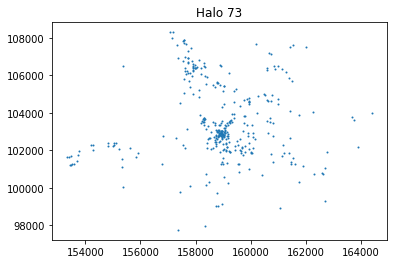

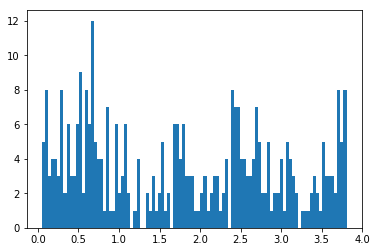

galaxies [3, 3, 5, 2, 4, 4, 7, 7, 10, 16, 16, 23, 13, 18, 9, 25, 27, 45, 50, 53]
blue galaxies counted [0, 0, 2, 0, 1, 0, 1, 3, 4, 7, 7, 8, 6, 13, 6, 10, 18, 24, 39, 46]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 3, 1, 2, 4, 2]
red galaxies counted [2, 2, 2, 2, 3, 4, 6, 3, 5, 9, 7, 12, 5, 4, 3, 12, 8, 19, 7, 5]
sum of galaxies: 340

Halo: 74
Halo Mass: 11098.631
N Subhalos from Illustris Algorithm: 859 122.87777495384216
R500c, R200c, R200m: 0.38206606462911696 0.60605365578894 0.755542977916265
before dev loop: 122.9327039718628
True
566208 566208 time 122.9989070892334
N Subhalos within 5*R200m: 285 123.04998588562012


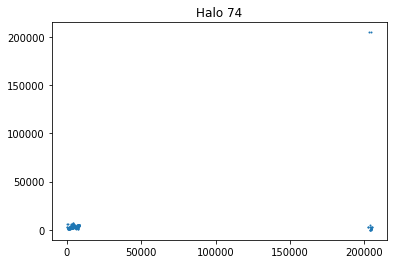

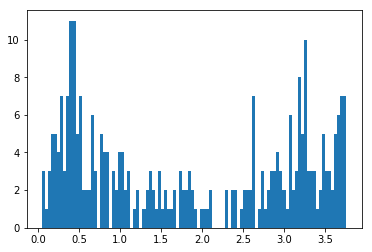

galaxies [0, 1, 2, 1, 6, 5, 8, 8, 21, 17, 7, 13, 13, 13, 11, 12, 15, 12, 40, 77]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 8, 7, 1, 4, 5, 6, 7, 8, 14, 12, 36, 61]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 3, 4]
red galaxies counted [0, 1, 2, 1, 5, 5, 7, 5, 11, 8, 6, 8, 7, 7, 4, 2, 1, 0, 1, 12]
sum of galaxies: 282

Halo: 75
Halo Mass: 11098.97
N Subhalos from Illustris Algorithm: 766 124.57363295555115
R500c, R200c, R200m: 0.38077923725764584 0.5870507829822756 0.7396862925420682
before dev loop: 124.5930290222168
True
566208 566208 time 124.6539261341095
N Subhalos within 5*R200m: 429 124.71991896629333


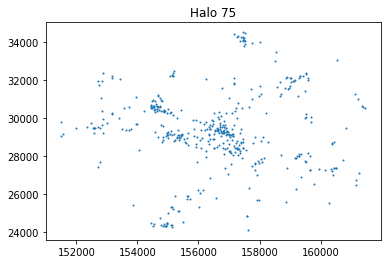

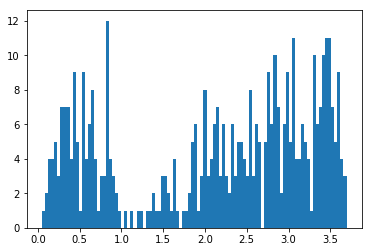

galaxies [0, 2, 1, 3, 4, 5, 8, 13, 13, 8, 20, 15, 23, 5, 6, 16, 30, 55, 83, 118]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 4, 4, 3, 9, 2, 4, 9, 19, 27, 50, 79]
red galaxies counted [0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3, 0, 0, 0, 1, 0, 9, 7, 7]
red galaxies counted [0, 1, 1, 2, 4, 2, 5, 10, 6, 3, 14, 9, 14, 3, 2, 6, 11, 19, 26, 32]
sum of galaxies: 428

Halo: 76
Halo Mass: 11053.76
N Subhalos from Illustris Algorithm: 749 126.21473813056946
R500c, R200c, R200m: 0.4207121212581975 0.6474206539076773 0.7837246694996244
before dev loop: 126.260409116745
True
566208 566208 time 127.20562100410461
N Subhalos within 5*R200m: 275 128.49615597724915


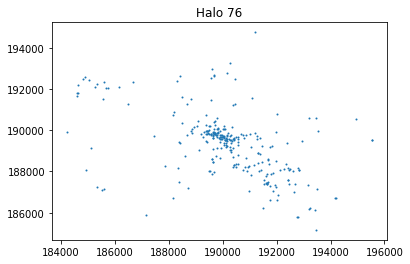

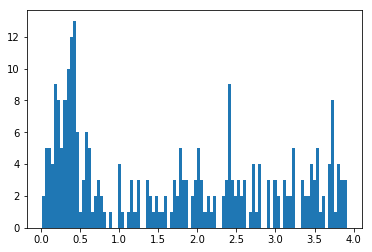

galaxies [3, 3, 2, 4, 7, 11, 8, 16, 24, 9, 12, 7, 2, 9, 10, 17, 22, 30, 26, 49]
blue galaxies counted [1, 1, 0, 0, 3, 2, 0, 3, 10, 3, 4, 4, 1, 8, 10, 15, 18, 26, 26, 38]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3]
red galaxies counted [2, 2, 2, 3, 3, 9, 7, 12, 13, 4, 8, 3, 1, 1, 0, 1, 3, 3, 0, 8]
sum of galaxies: 271

Halo: 77
Halo Mass: 11230.451
N Subhalos from Illustris Algorithm: 867 131.3688769340515
R500c, R200c, R200m: 0.33468521132386064 0.5361607498736738 0.7291663596777985
before dev loop: 131.41629886627197
True
566208 566208 time 131.50520014762878
N Subhalos within 5*R200m: 220 131.7649278640747


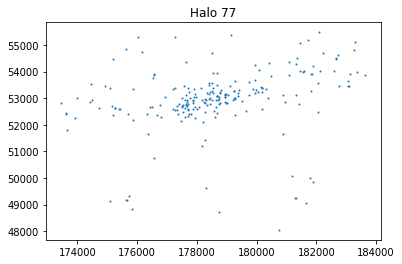

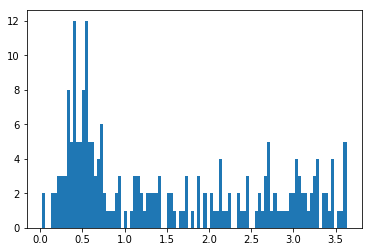

galaxies [0, 0, 0, 2, 2, 3, 3, 13, 15, 17, 20, 16, 7, 7, 13, 11, 12, 16, 22, 39]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 6, 2, 2, 4, 9, 11, 12, 15, 18, 38]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 0, 0, 2, 2, 2, 3, 9, 11, 14, 13, 13, 5, 3, 4, 0, 0, 0, 2, 1]
sum of galaxies: 218

Halo: 78
Halo Mass: 11066.363
N Subhalos from Illustris Algorithm: 995 134.32010102272034
R500c, R200c, R200m: 0.3372438131130751 0.5315203966459151 0.6709240396033471
before dev loop: 134.3660650253296
True
566208 566208 time 134.5564000606537
N Subhalos within 5*R200m: 293 135.4697241783142


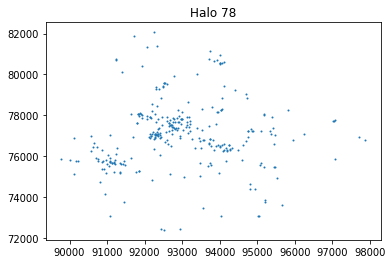

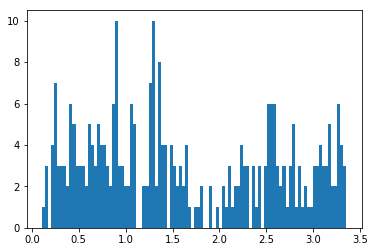

galaxies [0, 0, 1, 0, 3, 2, 7, 7, 6, 11, 9, 14, 18, 26, 19, 38, 16, 21, 42, 53]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 3, 8, 9, 11, 10, 29, 14, 18, 25, 46]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 4, 2, 2, 2, 2]
red galaxies counted [0, 0, 1, 0, 2, 2, 6, 5, 4, 7, 5, 6, 7, 13, 8, 5, 0, 1, 15, 5]
sum of galaxies: 293

Halo: 79
Halo Mass: 10952.339
N Subhalos from Illustris Algorithm: 883 138.47319793701172
R500c, R200c, R200m: 0.39629094576409646 0.606416367918658 0.7594047811675748
before dev loop: 138.50720191001892
True
566208 566208 time 138.6518280506134
N Subhalos within 5*R200m: 456 139.11627006530762


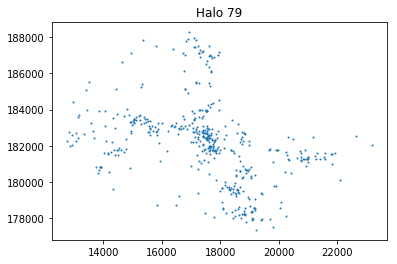

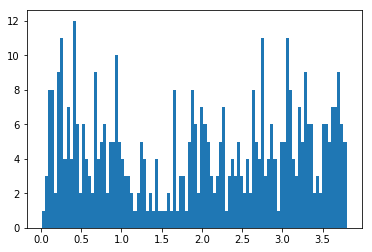

galaxies [1, 6, 4, 6, 2, 10, 12, 9, 18, 8, 13, 22, 25, 16, 18, 20, 44, 43, 78, 98]
blue galaxies counted [0, 0, 1, 0, 0, 4, 4, 3, 8, 3, 4, 8, 17, 14, 15, 17, 30, 25, 47, 80]
red galaxies counted [1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0, 6, 1, 11, 5]
red galaxies counted [0, 4, 3, 6, 2, 4, 8, 5, 8, 3, 9, 11, 8, 2, 3, 3, 8, 17, 20, 13]
sum of galaxies: 453

Halo: 80
Halo Mass: 10831.289
N Subhalos from Illustris Algorithm: 697 140.37144684791565
R500c, R200c, R200m: 0.42026813919212974 0.6430012508172159 0.7835522811518797
before dev loop: 140.40469312667847
True
566208 566208 time 140.4656400680542
N Subhalos within 5*R200m: 376 140.94730520248413


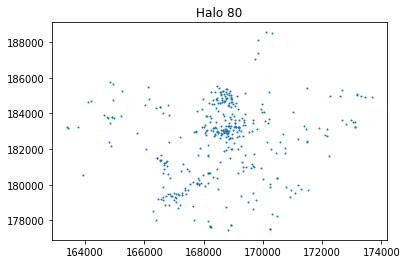

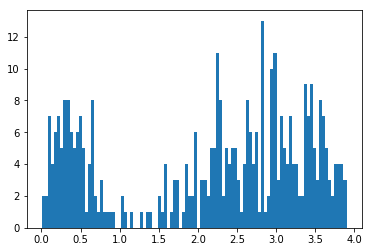

galaxies [1, 7, 2, 5, 4, 7, 9, 11, 13, 16, 13, 7, 3, 4, 3, 14, 27, 58, 84, 85]
blue galaxies counted [0, 0, 0, 0, 0, 2, 3, 4, 4, 7, 5, 3, 1, 4, 3, 12, 22, 35, 48, 71]
red galaxies counted [0, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 3, 4, 4]
red galaxies counted [1, 6, 2, 5, 3, 4, 3, 7, 8, 9, 7, 4, 2, 0, 0, 1, 5, 20, 32, 10]
sum of galaxies: 373

Halo: 81
Halo Mass: 10947.885
N Subhalos from Illustris Algorithm: 951 142.8717658519745
R500c, R200c, R200m: 0.3222296327514448 0.5805903434903475 0.7313154090291526
before dev loop: 142.89254903793335
True
566208 566208 time 142.9677028656006
N Subhalos within 5*R200m: 370 143.91957998275757


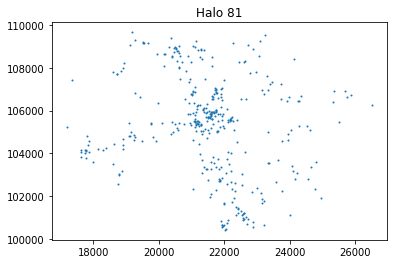

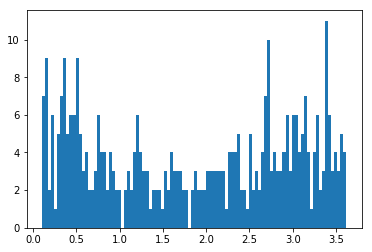

galaxies [0, 2, 3, 6, 6, 5, 4, 11, 15, 17, 15, 10, 19, 10, 24, 20, 22, 38, 63, 80]
blue galaxies counted [0, 0, 0, 0, 1, 2, 1, 0, 2, 4, 10, 6, 12, 6, 12, 14, 17, 27, 52, 49]
red galaxies counted [0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 5, 9]
red galaxies counted [0, 1, 3, 4, 5, 3, 3, 9, 13, 12, 3, 4, 5, 4, 10, 6, 4, 10, 6, 22]
sum of galaxies: 370

Halo: 82
Halo Mass: 10597.636
N Subhalos from Illustris Algorithm: 766 144.72814917564392
R500c, R200c, R200m: 0.3803419009105111 0.5842685887819711 0.7219066723980457
before dev loop: 144.76485800743103
True
566208 566208 time 144.81738305091858
N Subhalos within 5*R200m: 267 145.01677203178406


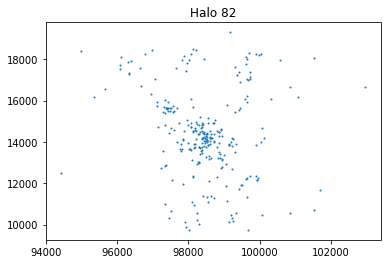

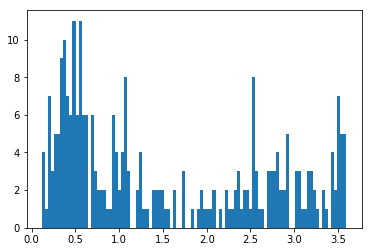

galaxies [0, 0, 3, 1, 2, 7, 7, 10, 20, 21, 23, 13, 7, 26, 9, 12, 9, 16, 38, 43]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 7, 10, 9, 6, 2, 8, 7, 11, 9, 14, 34, 38]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3, 1, 0, 4, 0, 0, 0, 2, 2, 4]
red galaxies counted [0, 0, 3, 0, 2, 4, 6, 10, 11, 8, 11, 6, 5, 14, 2, 1, 0, 0, 2, 1]
sum of galaxies: 267

Halo: 83
Halo Mass: 10720.226
N Subhalos from Illustris Algorithm: 963 147.21820211410522
R500c, R200c, R200m: 0.4020546256637934 0.6195930270125328 0.7640232355504157
before dev loop: 147.23345804214478
True
566208 566208 time 147.3109290599823
N Subhalos within 5*R200m: 247 147.8227481842041


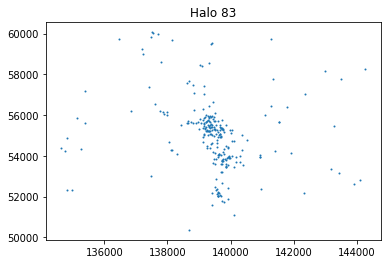

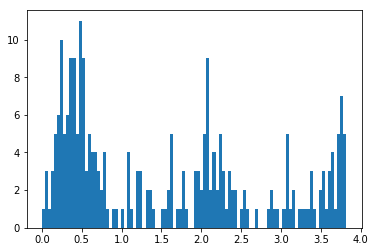

galaxies [0, 1, 1, 3, 5, 7, 13, 9, 19, 21, 13, 11, 4, 6, 11, 11, 27, 27, 15, 39]
blue galaxies counted [0, 0, 0, 0, 1, 3, 6, 4, 7, 4, 4, 4, 4, 6, 11, 11, 16, 23, 15, 31]
red galaxies counted [0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2]
red galaxies counted [0, 0, 0, 2, 4, 3, 7, 3, 11, 16, 8, 7, 0, 0, 0, 0, 9, 3, 0, 6]
sum of galaxies: 243

Halo: 84
Halo Mass: 10747.816
N Subhalos from Illustris Algorithm: 1066 149.04450607299805
R500c, R200c, R200m: 0.31855979469461604 0.5468023474357595 0.6873164259717777
before dev loop: 149.06444787979126
True
566208 566208 time 149.31448411941528
N Subhalos within 5*R200m: 319 149.6260368824005


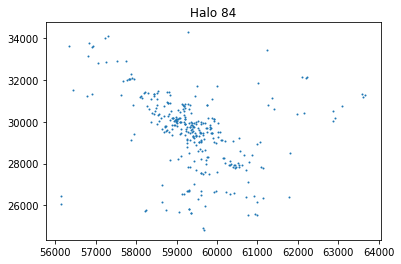

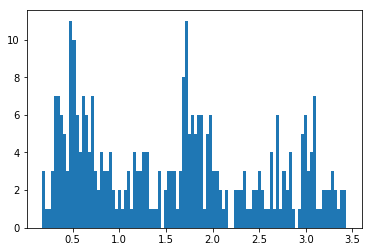

galaxies [0, 0, 0, 0, 1, 3, 1, 6, 17, 13, 26, 20, 18, 11, 20, 17, 56, 27, 34, 49]
blue galaxies counted [0, 0, 0, 0, 1, 2, 0, 3, 5, 4, 15, 10, 11, 5, 13, 9, 35, 23, 32, 48]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 6, 2, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 10, 8, 11, 8, 5, 6, 6, 8, 15, 2, 2, 0]
sum of galaxies: 319

Halo: 85
Halo Mass: 10718.444
N Subhalos from Illustris Algorithm: 786 150.42389798164368
R500c, R200c, R200m: 0.3747067315998202 0.600676668655352 0.7469546272633242
before dev loop: 150.452565908432
True
566208 566208 time 150.5339150428772
N Subhalos within 5*R200m: 222 151.0391800403595


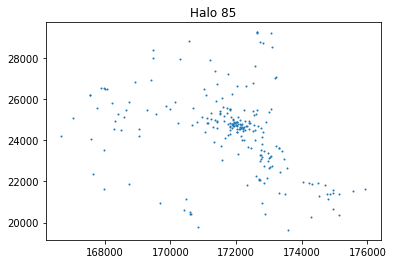

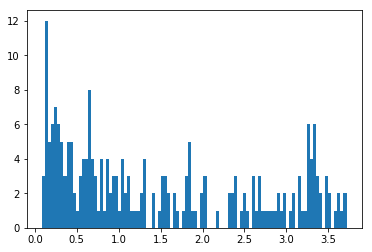

galaxies [1, 2, 2, 11, 4, 10, 8, 7, 11, 4, 11, 16, 14, 13, 9, 13, 17, 11, 19, 39]
blue galaxies counted [0, 0, 1, 0, 0, 1, 1, 0, 4, 1, 7, 10, 8, 6, 7, 12, 12, 10, 18, 35]
red galaxies counted [0, 0, 0, 4, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2]
red galaxies counted [1, 2, 1, 7, 3, 8, 5, 7, 5, 3, 2, 5, 5, 6, 1, 1, 4, 1, 1, 2]
sum of galaxies: 222

Halo: 86
Halo Mass: 10534.838
N Subhalos from Illustris Algorithm: 704 152.20918488502502
R500c, R200c, R200m: 0.3965638205848645 0.6349587699091653 0.7717709427927804
before dev loop: 152.22024512290955
True
566208 566208 time 152.3465518951416
N Subhalos within 5*R200m: 234 152.90543818473816


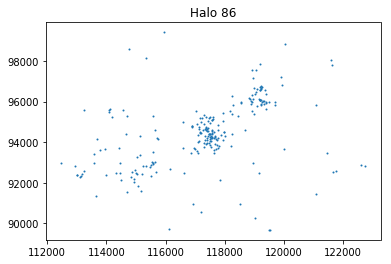

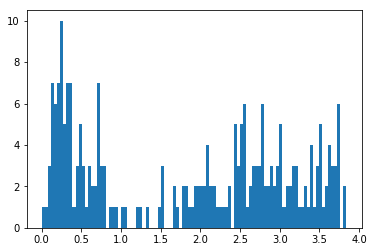

galaxies [0, 1, 6, 5, 5, 10, 10, 11, 5, 11, 6, 15, 3, 2, 3, 7, 20, 28, 42, 42]
blue galaxies counted [0, 1, 1, 0, 0, 0, 2, 1, 1, 3, 4, 8, 2, 2, 3, 6, 12, 21, 25, 34]
red galaxies counted [0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 5, 5]
red galaxies counted [0, 0, 5, 2, 5, 7, 8, 9, 4, 8, 2, 7, 1, 0, 0, 0, 6, 6, 12, 3]
sum of galaxies: 232

Halo: 87
Halo Mass: 10492.637
N Subhalos from Illustris Algorithm: 867 155.1152319908142
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
before dev loop: 155.12805700302124
True
566208 566208 time 155.29302382469177
N Subhalos within 5*R200m: 399 156.42492413520813


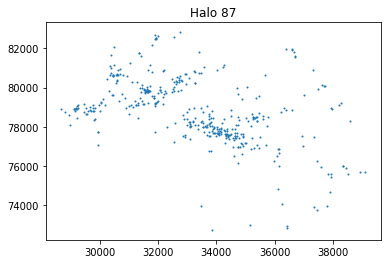

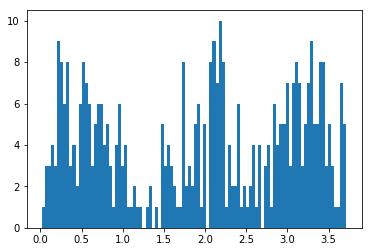

galaxies [3, 1, 2, 4, 2, 10, 8, 15, 6, 15, 17, 19, 15, 16, 6, 19, 39, 55, 51, 95]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 10, 4, 4, 5, 4, 14, 28, 40, 31, 67]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 4, 4, 8]
red galaxies counted [3, 0, 0, 3, 2, 8, 6, 10, 6, 11, 6, 15, 10, 11, 2, 4, 9, 11, 16, 20]
sum of galaxies: 398

Halo: 88
Halo Mass: 10377.713
N Subhalos from Illustris Algorithm: 915 157.78245997428894
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
before dev loop: 157.80392217636108
True
566208 566208 time 157.87949395179749
N Subhalos within 5*R200m: 450 158.487154006958


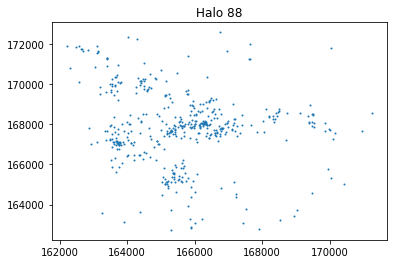

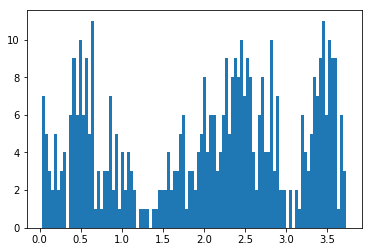

galaxies [1, 1, 3, 1, 2, 5, 4, 4, 15, 20, 24, 11, 17, 16, 4, 22, 44, 84, 62, 100]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 5, 8, 6, 7, 5, 12, 2, 10, 14, 44, 48, 58]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 2, 6, 4, 3]
red galaxies counted [0, 1, 3, 1, 1, 3, 3, 3, 9, 11, 14, 3, 11, 3, 2, 12, 28, 34, 10, 39]
sum of galaxies: 440

Halo: 89
Halo Mass: 10413.816
N Subhalos from Illustris Algorithm: 781 159.89517092704773
R500c, R200c, R200m: 0.3573148851520947 0.554265970210963 0.68595725634662
before dev loop: 159.9361891746521
True
566208 566208 time 160.02369499206543
N Subhalos within 5*R200m: 318 161.20582795143127


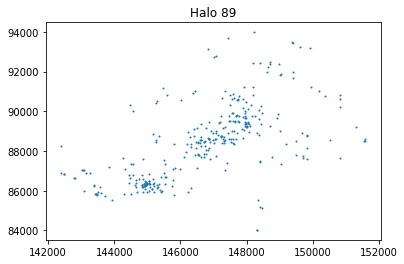

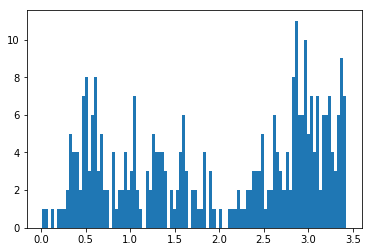

galaxies [1, 0, 0, 1, 0, 1, 2, 3, 9, 12, 17, 17, 9, 18, 16, 22, 20, 11, 46, 112]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 7, 8, 4, 8, 9, 16, 11, 10, 30, 81]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 3, 5]
red galaxies counted [1, 0, 0, 1, 0, 1, 1, 3, 7, 10, 9, 8, 4, 10, 5, 3, 8, 1, 13, 26]
sum of galaxies: 317

Halo: 90
Halo Mass: 10491.106
N Subhalos from Illustris Algorithm: 780 162.99731397628784
R500c, R200c, R200m: 0.37936257816027225 0.584745599270447 0.7141823452753009
before dev loop: 163.02818489074707
True
566208 566208 time 163.07736992835999
N Subhalos within 5*R200m: 348 163.75919198989868


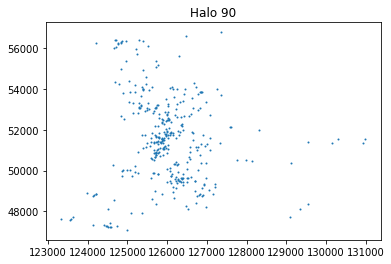

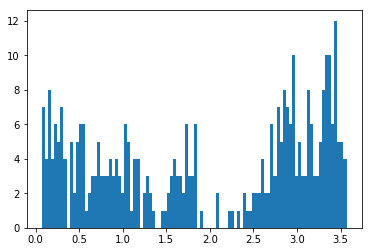

galaxies [1, 6, 2, 6, 6, 3, 10, 10, 5, 10, 12, 13, 15, 21, 15, 14, 25, 7, 56, 111]
blue galaxies counted [0, 0, 1, 5, 1, 0, 0, 3, 1, 3, 5, 5, 4, 11, 14, 12, 22, 5, 34, 74]
red galaxies counted [0, 3, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 3, 1, 0, 0, 1, 0, 1, 7]
red galaxies counted [1, 3, 1, 1, 4, 3, 9, 5, 2, 6, 6, 8, 8, 9, 1, 2, 2, 2, 21, 30]
sum of galaxies: 348

Halo: 91
Halo Mass: 10381.131
N Subhalos from Illustris Algorithm: 842 165.89722108840942
R500c, R200c, R200m: 0.3844355837043515 0.6221703649250043 0.7644187759302848
before dev loop: 165.9340488910675
True
566208 566208 time 166.01920294761658
N Subhalos within 5*R200m: 284 166.43833422660828


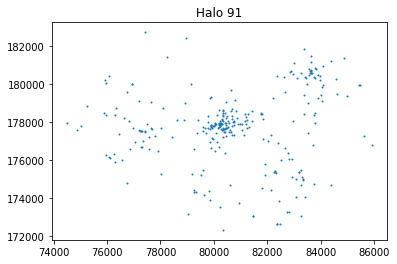

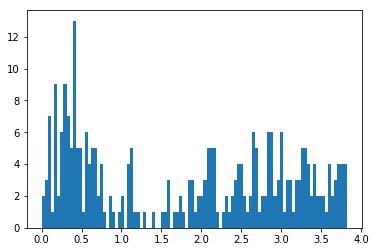

galaxies [1, 6, 1, 4, 6, 5, 8, 13, 17, 10, 15, 12, 4, 12, 3, 8, 24, 28, 49, 54]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 4, 4, 5, 4, 2, 8, 3, 6, 18, 20, 28, 52]
red galaxies counted [0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 3, 0]
red galaxies counted [1, 4, 1, 4, 6, 3, 6, 11, 12, 6, 8, 8, 2, 3, 0, 2, 5, 6, 18, 2]
sum of galaxies: 280

Halo: 92
Halo Mass: 10326.346
N Subhalos from Illustris Algorithm: 947 167.94514083862305
R500c, R200c, R200m: 0.36435314188113327 0.5709463243883409 0.7234369492685032
before dev loop: 167.96131300926208
True
566208 566208 time 168.04532122612
N Subhalos within 5*R200m: 412 168.19636917114258


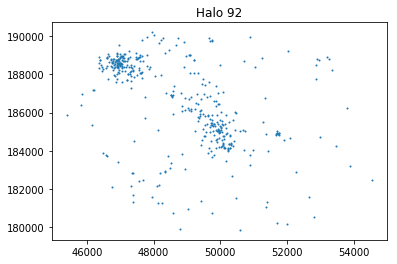

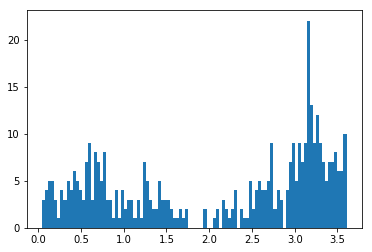

galaxies [5, 0, 3, 4, 4, 3, 4, 8, 9, 11, 20, 21, 17, 16, 22, 20, 7, 18, 62, 157]
blue galaxies counted [1, 0, 1, 0, 0, 1, 1, 3, 4, 6, 12, 8, 9, 6, 13, 13, 6, 17, 36, 53]
red galaxies counted [1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 3, 18]
red galaxies counted [3, 0, 2, 2, 4, 1, 3, 4, 5, 5, 8, 10, 8, 8, 6, 5, 1, 1, 23, 86]
sum of galaxies: 411

Halo: 93
Halo Mass: 10238.875
N Subhalos from Illustris Algorithm: 821 169.82592391967773
R500c, R200c, R200m: 0.4012219491090465 0.6205032903341002 0.7695008292603813
before dev loop: 169.84232902526855
True
566208 566208 time 170.02068495750427
N Subhalos within 5*R200m: 348 170.29591584205627


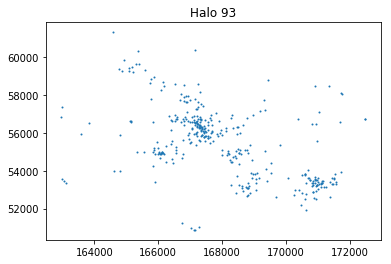

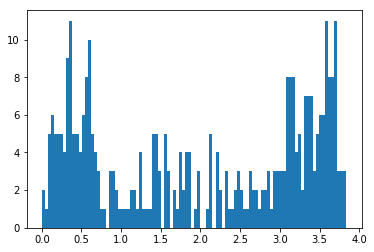

galaxies [1, 3, 4, 5, 6, 4, 8, 16, 12, 13, 23, 8, 8, 7, 19, 17, 21, 20, 46, 105]
blue galaxies counted [0, 0, 0, 0, 3, 0, 2, 6, 5, 3, 9, 4, 5, 4, 15, 14, 20, 20, 30, 57]
red galaxies counted [0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 3, 0, 0, 0, 3, 1, 0, 0, 3, 14]
red galaxies counted [1, 3, 3, 3, 2, 4, 4, 10, 6, 9, 11, 4, 3, 3, 1, 2, 1, 0, 13, 34]
sum of galaxies: 346

Halo: 94
Halo Mass: 10289.019
N Subhalos from Illustris Algorithm: 856 171.8792769908905
R500c, R200c, R200m: 0.3173017320764785 0.5507157951293802 0.6841214365430489
before dev loop: 171.93428111076355
True
566208 566208 time 172.10617685317993
N Subhalos within 5*R200m: 321 172.41760087013245


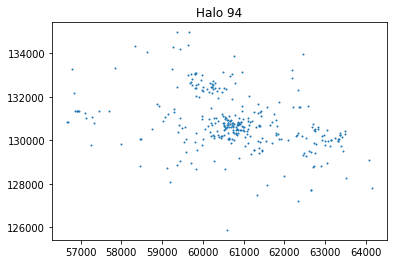

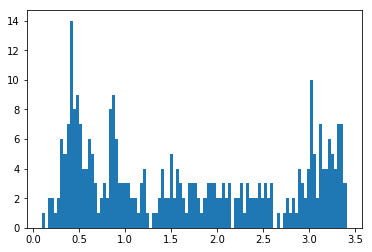

galaxies [0, 1, 0, 0, 1, 2, 3, 6, 13, 28, 18, 15, 18, 24, 13, 19, 25, 28, 27, 80]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 5, 13, 10, 10, 6, 12, 11, 11, 16, 25, 20, 52]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 3, 0, 1, 2, 0, 3, 7]
red galaxies counted [0, 1, 0, 0, 0, 2, 0, 5, 7, 13, 7, 5, 10, 9, 2, 7, 7, 3, 4, 21]
sum of galaxies: 321

Halo: 95
Halo Mass: 10305.533
N Subhalos from Illustris Algorithm: 818 173.88439798355103
R500c, R200c, R200m: 0.3879188612176387 0.6091632116983731 0.7620091823691952
before dev loop: 173.92417097091675
True
566208 566208 time 173.97329187393188
N Subhalos within 5*R200m: 262 174.15783214569092


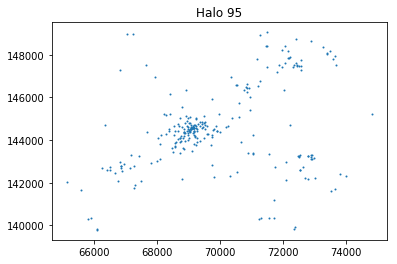

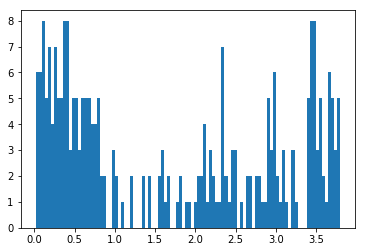

galaxies [3, 4, 4, 4, 7, 6, 7, 11, 15, 11, 13, 17, 6, 6, 5, 9, 12, 27, 30, 56]
blue galaxies counted [0, 0, 0, 1, 2, 1, 2, 2, 4, 1, 6, 8, 3, 5, 5, 9, 11, 21, 24, 51]
red galaxies counted [1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0]
red galaxies counted [2, 3, 4, 3, 4, 3, 4, 7, 10, 8, 7, 8, 3, 1, 0, 0, 0, 3, 5, 5]
sum of galaxies: 253

Halo: 96
Halo Mass: 10355.052
N Subhalos from Illustris Algorithm: 803 176.1757550239563
R500c, R200c, R200m: 0.38060488722178243 0.5781708614197612 0.7136957665529395
before dev loop: 176.19755506515503
True
566208 566208 time 176.4040071964264
N Subhalos within 5*R200m: 365 176.61712002754211


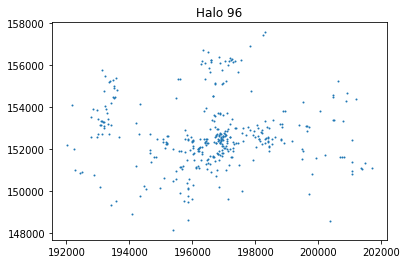

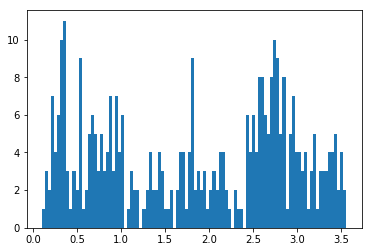

galaxies [0, 1, 0, 2, 3, 6, 5, 16, 14, 6, 11, 18, 21, 21, 13, 16, 34, 23, 92, 63]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 3, 6, 3, 6, 5, 12, 11, 12, 8, 26, 21, 68, 52]
red galaxies counted [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 3, 2, 1, 4, 7]
red galaxies counted [0, 1, 0, 1, 1, 5, 4, 12, 7, 3, 5, 11, 8, 9, 1, 5, 6, 1, 20, 4]
sum of galaxies: 365

Halo: 97
Halo Mass: 10113.485
N Subhalos from Illustris Algorithm: 705 178.47282814979553
R500c, R200c, R200m: 0.36940857230104623 0.5926599699340055 0.7532871967174686
before dev loop: 178.51807403564453
True
566208 566208 time 178.6875081062317
N Subhalos within 5*R200m: 274 178.79558396339417


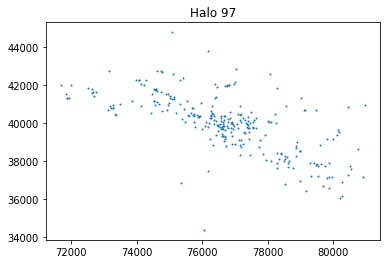

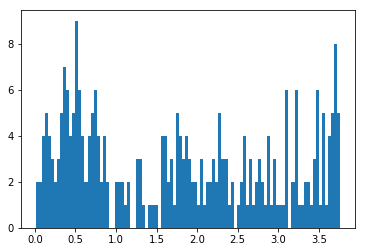

galaxies [1, 4, 2, 3, 4, 4, 2, 9, 13, 16, 11, 19, 9, 8, 8, 16, 28, 26, 32, 56]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 3, 5, 4, 7, 8, 11, 20, 24, 31, 47]
red galaxies counted [0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2]
red galaxies counted [1, 2, 1, 2, 2, 3, 2, 8, 11, 10, 7, 12, 4, 0, 0, 5, 7, 2, 0, 7]
sum of galaxies: 271

Halo: 98
Halo Mass: 9784.581
N Subhalos from Illustris Algorithm: 715 180.51415705680847
R500c, R200c, R200m: 0.4169802298016929 0.6143823029556247 0.7493065712143924
before dev loop: 180.53694820404053
True
566208 566208 time 180.64953804016113
N Subhalos within 5*R200m: 268 180.87831497192383


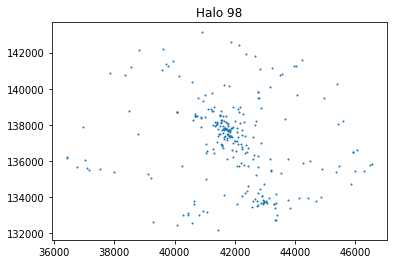

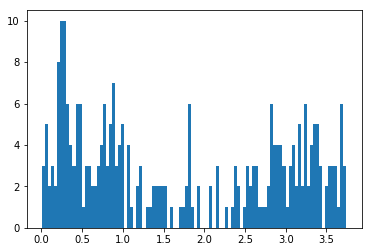

galaxies [3, 2, 1, 2, 2, 11, 15, 12, 5, 11, 8, 13, 20, 14, 9, 10, 14, 12, 41, 58]
blue galaxies counted [0, 0, 0, 2, 0, 4, 6, 6, 3, 4, 3, 6, 8, 10, 8, 10, 14, 11, 21, 55]
red galaxies counted [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3]
red galaxies counted [3, 2, 1, 0, 2, 7, 6, 6, 2, 7, 5, 6, 12, 4, 1, 0, 0, 1, 18, 0]
sum of galaxies: 263

Halo: 99
Halo Mass: 10072.03
N Subhalos from Illustris Algorithm: 806 182.17365312576294
R500c, R200c, R200m: 0.3623823259074288 0.5829880868538218 0.7284908183448114
before dev loop: 182.1907820701599
True
566208 566208 time 182.2522370815277
N Subhalos within 5*R200m: 309 182.43901300430298


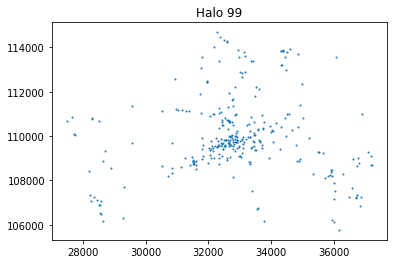

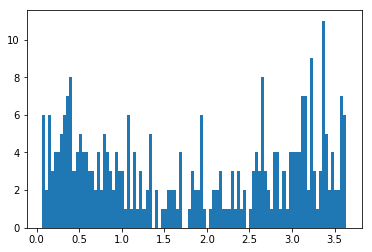

galaxies [3, 1, 2, 6, 2, 3, 7, 9, 16, 10, 13, 11, 14, 18, 16, 11, 19, 21, 42, 83]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 2, 3, 7, 7, 10, 15, 6, 19, 20, 40, 62]
red galaxies counted [1, 1, 0, 3, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 9]
red galaxies counted [2, 0, 2, 3, 1, 0, 6, 5, 10, 7, 8, 4, 7, 6, 1, 2, 0, 1, 0, 12]
sum of galaxies: 307

Halo: 100
Halo Mass: 9850.419
N Subhalos from Illustris Algorithm: 734 184.2541139125824
R500c, R200c, R200m: 0.4086667957265417 0.612058583292796 0.75188551050492
before dev loop: 184.27945804595947
True
566208 566208 time 184.33476400375366
N Subhalos within 5*R200m: 298 184.54368495941162


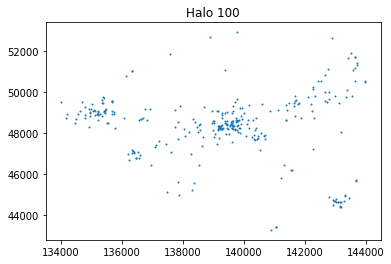

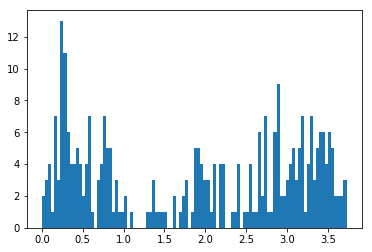

galaxies [0, 3, 1, 3, 6, 6, 19, 10, 7, 9, 12, 14, 14, 5, 6, 6, 27, 21, 51, 73]
blue galaxies counted [0, 0, 0, 1, 0, 0, 3, 2, 4, 3, 6, 8, 7, 2, 5, 6, 21, 17, 19, 52]
red galaxies counted [0, 0, 0, 1, 3, 1, 3, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 4, 4]
red galaxies counted [0, 3, 1, 1, 3, 5, 13, 7, 2, 6, 5, 5, 7, 3, 0, 0, 5, 2, 28, 17]
sum of galaxies: 293

Halo: 101
Halo Mass: 10112.432
N Subhalos from Illustris Algorithm: 768 186.5961229801178
R500c, R200c, R200m: 0.3460304944382702 0.5217929457471829 0.6482427213328021
before dev loop: 186.62452697753906
True
566208 566208 time 186.78369402885437
N Subhalos within 5*R200m: 200 186.93426489830017


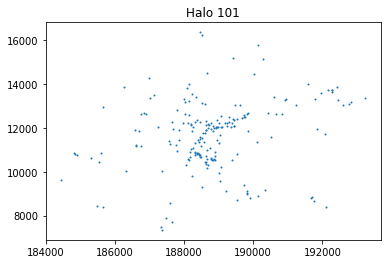

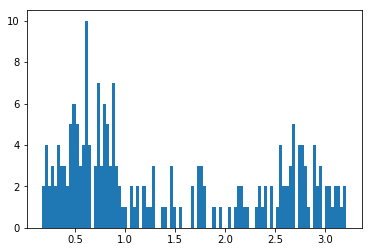

galaxies [0, 0, 0, 0, 1, 2, 4, 4, 9, 9, 15, 18, 23, 17, 8, 10, 10, 10, 21, 39]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 1, 2, 4, 6, 3, 10, 10, 7, 9, 10, 10, 21, 36]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 7, 4, 8, 13, 11, 5, 1, 1, 0, 0, 0, 2]
sum of galaxies: 200

Halo: 102
Halo Mass: 9930.823
N Subhalos from Illustris Algorithm: 783 189.45824909210205
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
before dev loop: 189.4798219203949
True
566208 566208 time 189.65618801116943
N Subhalos within 5*R200m: 280 189.84453916549683


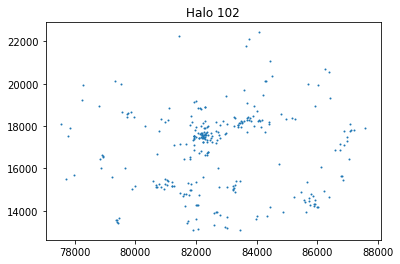

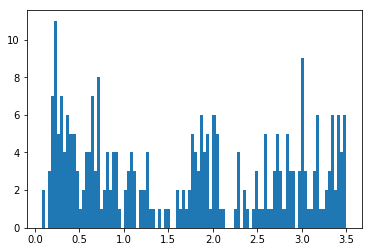

galaxies [1, 0, 1, 0, 3, 7, 16, 11, 8, 11, 8, 21, 12, 12, 15, 5, 33, 22, 34, 60]
blue galaxies counted [1, 0, 0, 0, 2, 2, 6, 2, 3, 5, 6, 6, 9, 5, 12, 5, 21, 15, 33, 48]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 4, 3, 0, 3]
red galaxies counted [0, 0, 1, 0, 1, 5, 6, 7, 5, 6, 2, 13, 3, 7, 3, 0, 8, 4, 1, 9]
sum of galaxies: 280

Halo: 103
Halo Mass: 9901.212
N Subhalos from Illustris Algorithm: 770 190.69936513900757
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
before dev loop: 190.73348021507263
True
566208 566208 time 190.79566407203674
N Subhalos within 5*R200m: 296 190.8630440235138


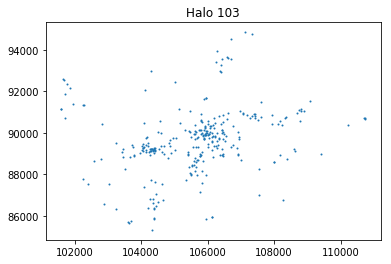

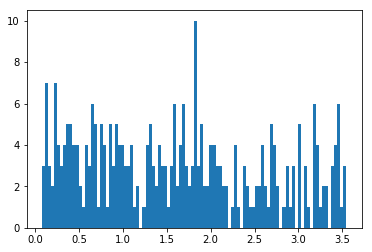

galaxies [2, 1, 2, 5, 4, 6, 6, 6, 10, 9, 8, 15, 17, 23, 16, 23, 41, 28, 31, 43]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 3, 6, 3, 6, 4, 8, 10, 15, 13, 20, 23, 32]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 3, 1, 2, 3, 1, 4, 4]
red galaxies counted [1, 0, 1, 4, 3, 3, 5, 4, 5, 3, 5, 7, 10, 12, 5, 6, 25, 7, 4, 7]
sum of galaxies: 296

Halo: 104
Halo Mass: 9909.864
N Subhalos from Illustris Algorithm: 826 191.53873014450073
R500c, R200c, R200m: 0.3668899649287841 0.5867572904190347 0.7274977237432897
before dev loop: 191.56551599502563
True
566208 566208 time 191.617427110672
N Subhalos within 5*R200m: 369 191.71428108215332


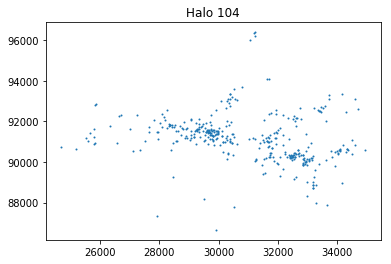

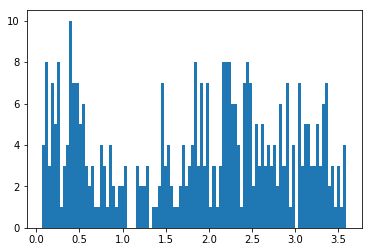

galaxies [1, 3, 7, 2, 4, 8, 9, 4, 14, 19, 11, 8, 11, 8, 11, 21, 43, 62, 61, 61]
blue galaxies counted [0, 0, 1, 0, 2, 0, 1, 0, 5, 4, 4, 5, 6, 8, 8, 16, 30, 36, 44, 47]
red galaxies counted [0, 2, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1, 5, 5, 5, 2]
red galaxies counted [1, 1, 6, 2, 1, 8, 7, 4, 8, 12, 6, 3, 4, 0, 3, 4, 8, 21, 12, 12]
sum of galaxies: 368

Halo: 105
Halo Mass: 9441.806
N Subhalos from Illustris Algorithm: 794 192.37977695465088
R500c, R200c, R200m: 0.3609313572852022 0.5742569733471751 0.7234636922820409
before dev loop: 192.4014711380005
True
566208 566208 time 192.45710611343384
N Subhalos within 5*R200m: 459 192.53955817222595


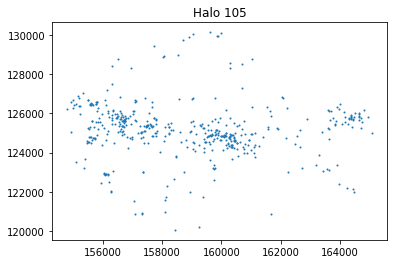

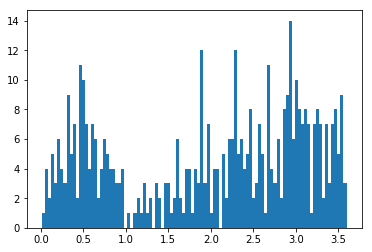

galaxies [3, 2, 1, 2, 4, 7, 5, 12, 11, 20, 20, 17, 18, 9, 10, 19, 42, 57, 86, 112]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 6, 6, 4, 2, 10, 18, 29, 22, 43, 78]
red galaxies counted [1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 8, 4]
red galaxies counted [2, 2, 1, 1, 4, 7, 4, 10, 7, 14, 13, 10, 14, 6, 0, 1, 12, 33, 35, 30]
sum of galaxies: 457

Halo: 106
Halo Mass: 9582.273
N Subhalos from Illustris Algorithm: 627 193.31274509429932
R500c, R200c, R200m: 0.409483058156213 0.6119061321018505 0.7454023314445947
before dev loop: 193.3569459915161
True
566208 566208 time 193.4135389328003
N Subhalos within 5*R200m: 187 193.475821018219


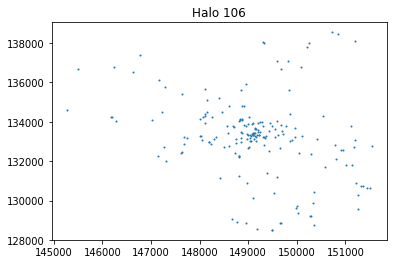

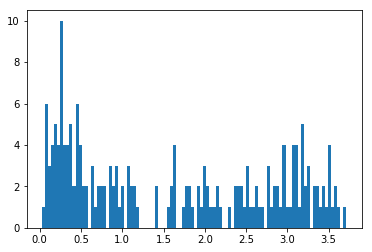

galaxies [2, 4, 1, 2, 7, 4, 11, 8, 7, 11, 4, 9, 8, 9, 2, 9, 14, 15, 24, 34]
blue galaxies counted [0, 0, 0, 0, 1, 2, 0, 6, 1, 5, 1, 5, 6, 7, 2, 8, 14, 13, 21, 31]
red galaxies counted [0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
red galaxies counted [2, 3, 1, 2, 4, 2, 10, 2, 4, 6, 3, 4, 1, 2, 0, 1, 0, 1, 2, 2]
sum of galaxies: 185

Halo: 107
Halo Mass: 9395.793
N Subhalos from Illustris Algorithm: 604 194.65347504615784
R500c, R200c, R200m: 0.3827219890809162 0.5812259304408337 0.7123852788206888
before dev loop: 194.67811918258667
True
566208 566208 time 194.73120594024658
N Subhalos within 5*R200m: 229 194.7883050441742


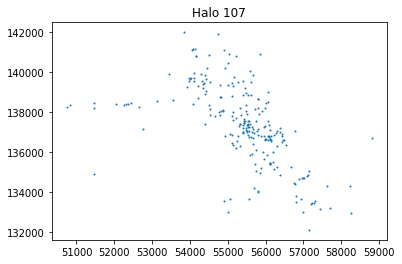

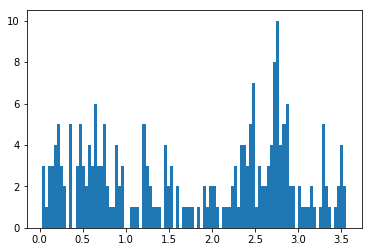

galaxies [1, 0, 3, 2, 3, 4, 6, 2, 5, 8, 10, 17, 10, 6, 13, 13, 10, 20, 66, 27]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 2, 10, 4, 2, 8, 10, 9, 18, 56, 27]
red galaxies counted [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0]
red galaxies counted [1, 0, 2, 1, 2, 3, 5, 1, 5, 4, 8, 5, 6, 3, 3, 2, 0, 1, 8, 0]
sum of galaxies: 226

Halo: 108
Halo Mass: 9763.695
N Subhalos from Illustris Algorithm: 768 195.45593094825745
R500c, R200c, R200m: 0.267284029646739 0.4277241554215666 0.5814296257295761
before dev loop: 195.47327709197998
True
566208 566208 time 195.53156805038452
N Subhalos within 5*R200m: 260 195.5847840309143


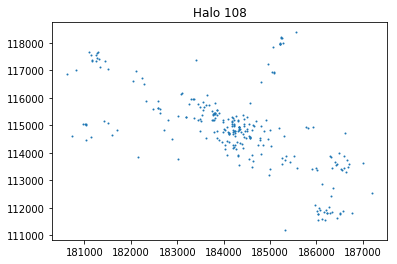

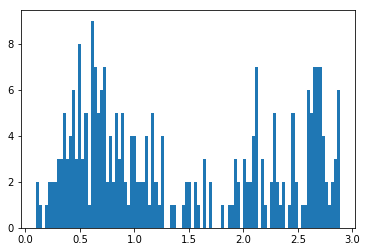

galaxies [0, 0, 1, 1, 1, 1, 2, 4, 5, 10, 17, 17, 30, 19, 17, 19, 9, 13, 34, 60]
blue galaxies counted [0, 0, 1, 1, 1, 1, 2, 1, 2, 3, 6, 3, 9, 7, 9, 15, 6, 12, 26, 37]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 1, 1, 3, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 3, 7, 8, 13, 19, 11, 7, 4, 2, 0, 5, 17]
sum of galaxies: 260

Halo: 109
Halo Mass: 9206.317
N Subhalos from Illustris Algorithm: 698 196.40147709846497
R500c, R200c, R200m: 0.3922152784733877 0.5971815009099979 0.7320837502204935
before dev loop: 196.43423914909363
True
566208 566208 time 196.48637986183167
N Subhalos within 5*R200m: 313 196.55405402183533


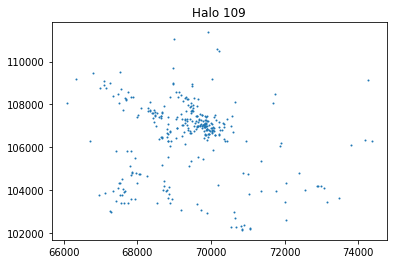

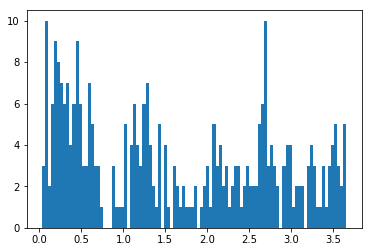

galaxies [3, 7, 1, 3, 5, 11, 11, 12, 8, 18, 17, 8, 4, 14, 29, 16, 14, 31, 52, 45]
blue galaxies counted [0, 2, 0, 1, 1, 3, 2, 5, 4, 4, 6, 2, 3, 13, 16, 13, 12, 24, 44, 41]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 4, 4, 2]
red galaxies counted [3, 5, 1, 2, 4, 8, 8, 5, 3, 14, 11, 5, 1, 0, 11, 3, 1, 3, 4, 2]
sum of galaxies: 309

Halo: 110
Halo Mass: 9351.555
N Subhalos from Illustris Algorithm: 592 197.2229311466217
R500c, R200c, R200m: 0.39980837266443103 0.5988868884708953 0.7428289969772636
before dev loop: 197.23969912528992
True
566208 566208 time 197.30563282966614
N Subhalos within 5*R200m: 291 197.36623001098633


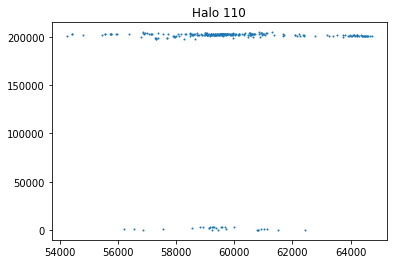

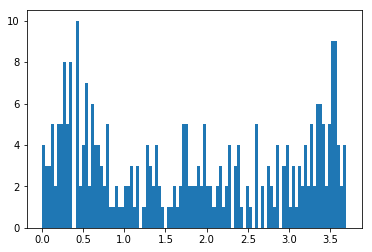

galaxies [1, 2, 2, 3, 3, 5, 12, 8, 13, 9, 16, 11, 9, 10, 15, 12, 30, 23, 27, 73]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 5, 4, 5, 6, 4, 8, 12, 9, 25, 21, 23, 51]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 2, 0, 0, 0, 0, 1, 3, 1, 2, 3]
red galaxies counted [1, 1, 2, 3, 2, 4, 10, 5, 8, 2, 9, 5, 5, 2, 3, 2, 2, 1, 2, 19]
sum of galaxies: 284

Halo: 111
Halo Mass: 9310.482
N Subhalos from Illustris Algorithm: 632 198.0324649810791
R500c, R200c, R200m: 0.41250193603321655 0.6107573835532709 0.7427579758604733
before dev loop: 198.1241409778595
True
566208 566208 time 198.20301294326782
N Subhalos within 5*R200m: 269 198.33541703224182


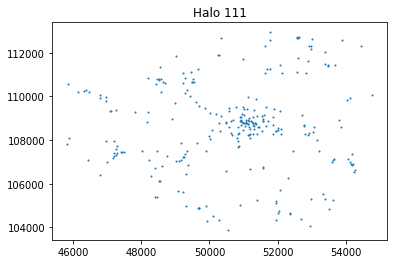

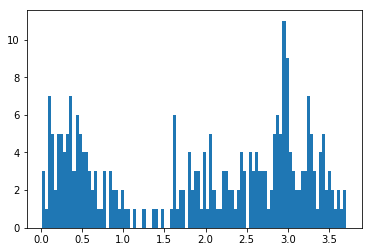

galaxies [0, 2, 7, 3, 2, 6, 6, 8, 11, 12, 10, 6, 9, 6, 2, 11, 23, 27, 63, 51]
blue galaxies counted [0, 0, 1, 0, 0, 1, 2, 3, 2, 5, 5, 2, 4, 5, 1, 10, 21, 23, 50, 44]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 2]
red galaxies counted [0, 2, 6, 3, 1, 4, 3, 5, 8, 7, 5, 4, 4, 1, 1, 1, 2, 3, 9, 5]
sum of galaxies: 265

Halo: 112
Halo Mass: 9802.825
N Subhalos from Illustris Algorithm: 757 199.0761902332306
R500c, R200c, R200m: 0.2996138308606221 0.4969133757845088 0.6207533054831167
before dev loop: 199.11910605430603
True
566208 566208 time 199.16729307174683
N Subhalos within 5*R200m: 236 199.2348141670227


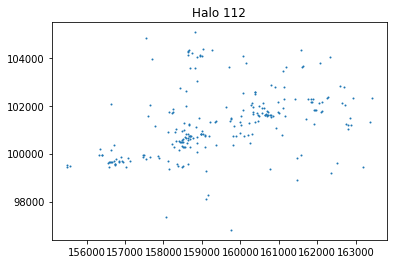

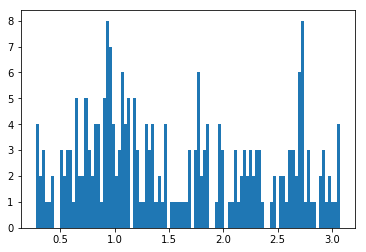

galaxies [0, 0, 0, 0, 0, 0, 0, 3, 6, 2, 6, 10, 16, 28, 26, 24, 14, 28, 30, 43]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 7, 9, 16, 10, 22, 21, 34]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 4, 3, 0, 1, 1, 2, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 5, 8, 12, 17, 14, 8, 3, 5, 7, 5]
sum of galaxies: 236

Halo: 113
Halo Mass: 9353.096
N Subhalos from Illustris Algorithm: 720 200.09203386306763
R500c, R200c, R200m: 0.3717452230916783 0.5889004547060323 0.7217228341971997
before dev loop: 200.11181211471558
True
566208 566208 time 200.16031002998352
N Subhalos within 5*R200m: 272 200.22222995758057


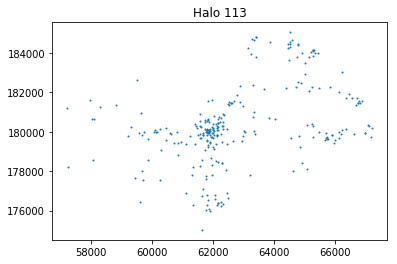

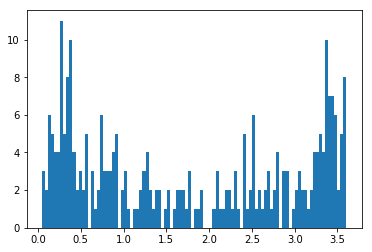

galaxies [0, 2, 1, 7, 4, 4, 12, 8, 17, 9, 7, 12, 16, 8, 14, 10, 12, 20, 31, 75]
blue galaxies counted [0, 0, 0, 0, 0, 0, 6, 3, 7, 1, 2, 6, 11, 2, 8, 9, 10, 16, 23, 51]
red galaxies counted [0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 3]
red galaxies counted [0, 2, 1, 6, 3, 3, 5, 5, 7, 7, 4, 5, 4, 6, 4, 1, 2, 3, 6, 21]
sum of galaxies: 269

Halo: 114
Halo Mass: 9329.943
N Subhalos from Illustris Algorithm: 820 200.8973741531372
R500c, R200c, R200m: 0.33081822361109403 0.5128441248938026 0.642101636659722
before dev loop: 200.9329550266266
True
566208 566208 time 200.98055911064148
N Subhalos within 5*R200m: 260 201.03530621528625


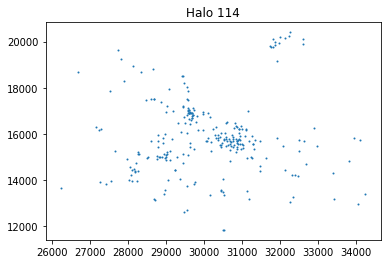

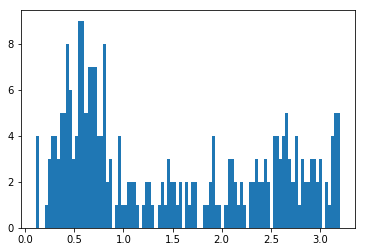

galaxies [0, 0, 1, 3, 0, 0, 3, 6, 9, 16, 15, 28, 27, 13, 8, 12, 15, 19, 35, 50]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 5, 3, 10, 3, 3, 11, 15, 18, 32, 34]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 1, 3, 0, 0, 1, 4, 6, 13, 9, 23, 16, 10, 4, 1, 0, 1, 2, 14]
sum of galaxies: 260

Halo: 115
Halo Mass: 9228.84
N Subhalos from Illustris Algorithm: 667 201.66895818710327
R500c, R200c, R200m: 0.3409618926838454 0.587031286204442 0.7343132688191691
before dev loop: 201.69791507720947
True
566208 566208 time 201.75746488571167
N Subhalos within 5*R200m: 241 201.81962895393372


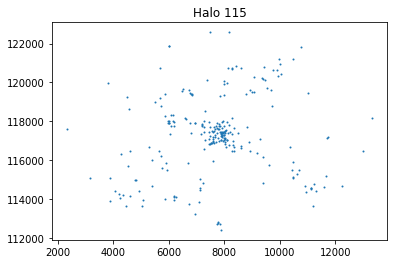

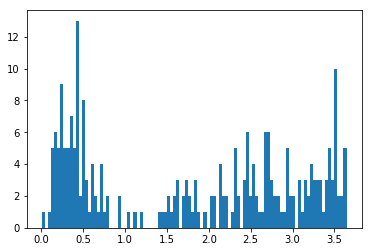

galaxies [0, 0, 3, 3, 6, 9, 7, 10, 19, 14, 9, 7, 3, 3, 1, 11, 15, 27, 39, 54]
blue galaxies counted [0, 0, 0, 2, 1, 3, 1, 2, 8, 5, 7, 3, 2, 2, 1, 10, 12, 25, 32, 46]
red galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 4]
red galaxies counted [0, 0, 3, 1, 3, 4, 6, 6, 10, 8, 2, 3, 0, 1, 0, 0, 2, 2, 6, 4]
sum of galaxies: 240

Halo: 116
Halo Mass: 9338.046
N Subhalos from Illustris Algorithm: 841 202.47027111053467
R500c, R200c, R200m: 0.3755114240730359 0.5610683039178792 0.6936421095002806
before dev loop: 202.49669289588928
True
566208 566208 time 202.54314804077148
N Subhalos within 5*R200m: 239 202.59396600723267


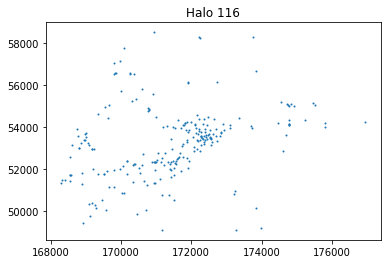

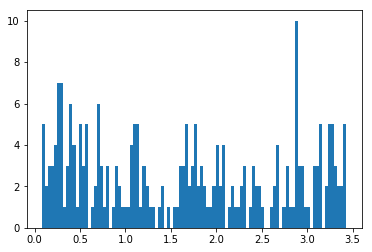

galaxies [1, 2, 3, 1, 3, 3, 8, 10, 9, 6, 13, 10, 7, 9, 20, 7, 29, 23, 21, 54]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 4, 5, 2, 9, 17, 7, 20, 18, 18, 50]
red galaxies counted [0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 5, 0, 1, 2]
red galaxies counted [1, 0, 2, 0, 1, 2, 7, 8, 7, 4, 8, 5, 5, 0, 2, 0, 4, 5, 2, 2]
sum of galaxies: 239

Halo: 117
Halo Mass: 9183.523
N Subhalos from Illustris Algorithm: 718 203.35610699653625
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
before dev loop: 203.3813579082489
True
566208 566208 time 203.43203496932983
N Subhalos within 5*R200m: 257 203.48740124702454


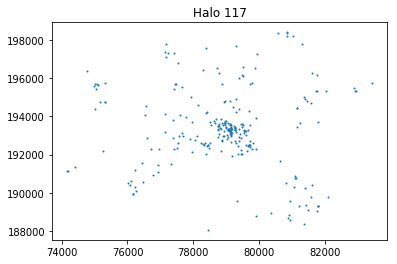

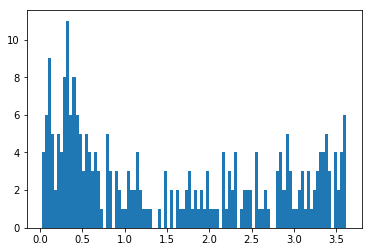

galaxies [4, 4, 7, 4, 1, 5, 8, 17, 14, 12, 13, 9, 11, 11, 9, 8, 17, 22, 28, 49]
blue galaxies counted [1, 0, 1, 0, 0, 3, 1, 6, 4, 6, 9, 7, 8, 7, 8, 8, 14, 22, 25, 46]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 3]
red galaxies counted [2, 3, 5, 4, 1, 1, 7, 8, 10, 6, 3, 2, 3, 3, 1, 0, 1, 0, 3, 0]
sum of galaxies: 253

Halo: 118
Halo Mass: 9247.675
N Subhalos from Illustris Algorithm: 803 204.14315509796143
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
before dev loop: 204.1723849773407
True
566208 566208 time 204.22149109840393
N Subhalos within 5*R200m: 251 204.29861998558044


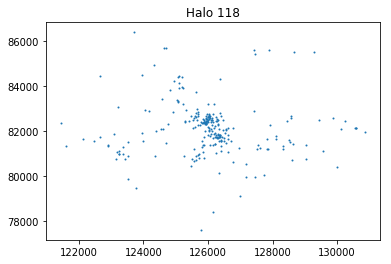

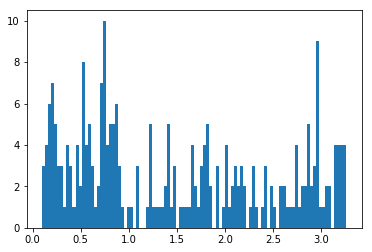

galaxies [0, 1, 1, 3, 6, 6, 8, 5, 6, 8, 14, 11, 26, 16, 8, 17, 20, 26, 18, 51]
blue galaxies counted [0, 0, 0, 0, 3, 3, 1, 2, 2, 2, 7, 5, 15, 6, 6, 12, 15, 22, 16, 46]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2]
red galaxies counted [0, 1, 1, 3, 1, 2, 6, 3, 4, 5, 5, 6, 10, 9, 1, 3, 4, 3, 1, 3]
sum of galaxies: 251

Halo: 119
Halo Mass: 9019.702
N Subhalos from Illustris Algorithm: 565 204.96651411056519
R500c, R200c, R200m: 0.40419819029530507 0.5932503179544054 0.7243439697995069
before dev loop: 204.99682593345642
True
566208 566208 time 205.05046701431274
N Subhalos within 5*R200m: 255 205.1145429611206


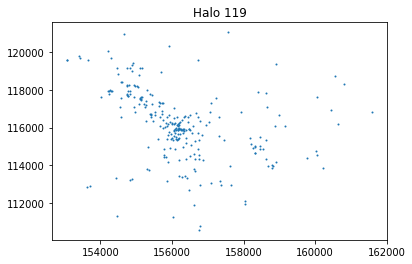

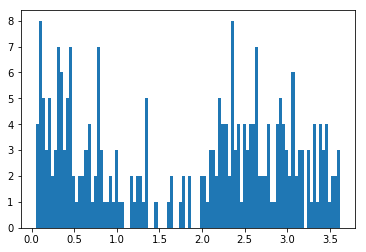

galaxies [2, 4, 4, 4, 3, 5, 3, 11, 10, 11, 5, 8, 14, 8, 13, 4, 7, 41, 48, 47]
blue galaxies counted [0, 0, 0, 0, 0, 3, 0, 1, 3, 4, 1, 3, 3, 1, 8, 4, 5, 24, 36, 43]
red galaxies counted [2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 4, 2]
red galaxies counted [0, 4, 3, 3, 2, 2, 3, 9, 6, 7, 3, 4, 10, 6, 5, 0, 1, 15, 8, 2]
sum of galaxies: 252

Halo: 120
Halo Mass: 9170.191
N Subhalos from Illustris Algorithm: 670 205.75930619239807
R500c, R200c, R200m: 0.37584631225902837 0.5920391556960873 0.7339435906949068
before dev loop: 205.7749810218811
True
566208 566208 time 205.8336842060089
N Subhalos within 5*R200m: 293 205.8940269947052


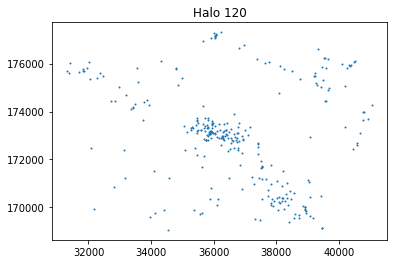

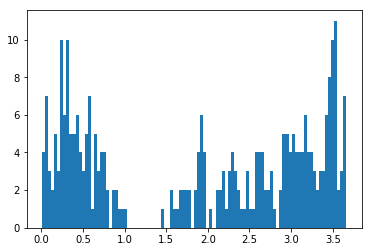

galaxies [3, 1, 3, 0, 5, 5, 14, 11, 12, 10, 13, 14, 8, 3, 0, 7, 23, 23, 41, 88]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 2, 5, 3, 5, 1, 3, 1, 0, 6, 20, 20, 33, 64]
red galaxies counted [1, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 8]
red galaxies counted [2, 1, 2, 0, 5, 5, 10, 8, 6, 5, 7, 13, 5, 2, 0, 1, 1, 2, 7, 16]
sum of galaxies: 284

Halo: 121
Halo Mass: 9259.929
N Subhalos from Illustris Algorithm: 824 206.5551278591156
R500c, R200c, R200m: 0.3034331375417668 0.4711724645998827 0.601254726099171
before dev loop: 206.57430911064148
True
566208 566208 time 206.63486886024475
N Subhalos within 5*R200m: 185 206.68552207946777


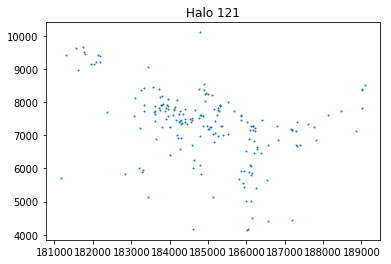

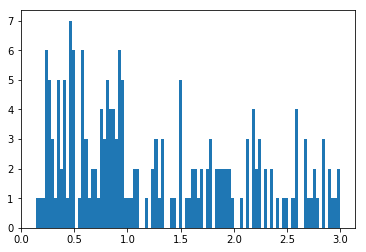

galaxies [0, 0, 0, 0, 1, 0, 4, 10, 4, 11, 14, 10, 10, 23, 14, 10, 14, 18, 19, 23]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 5, 3, 3, 1, 10, 6, 5, 8, 15, 17, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2]
red galaxies counted [0, 0, 0, 0, 1, 0, 3, 8, 1, 4, 9, 6, 9, 11, 7, 5, 4, 2, 1, 2]
sum of galaxies: 185

Halo: 122
Halo Mass: 9256.363
N Subhalos from Illustris Algorithm: 639 207.3528380393982
R500c, R200c, R200m: 0.34896570031183993 0.5320360403799955 0.6717327755561545
before dev loop: 207.37279605865479
True
566208 566208 time 207.4216411113739
N Subhalos within 5*R200m: 282 207.47875595092773


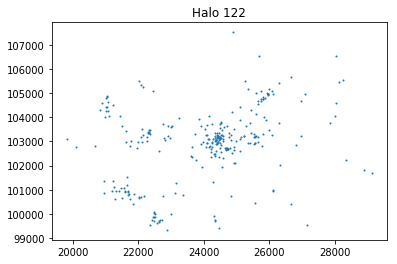

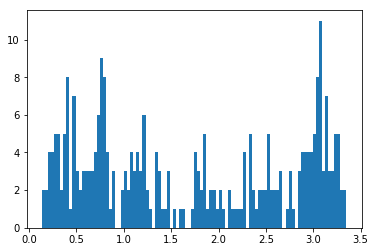

galaxies [0, 0, 0, 2, 0, 3, 7, 9, 7, 16, 9, 13, 28, 8, 24, 13, 18, 16, 34, 75]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 4, 13, 1, 11, 4, 9, 12, 31, 56]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 8]
red galaxies counted [0, 0, 0, 2, 0, 2, 5, 7, 6, 12, 6, 8, 15, 6, 11, 7, 7, 3, 1, 11]
sum of galaxies: 282

Halo: 123
Halo Mass: 9079.802
N Subhalos from Illustris Algorithm: 753 208.3171350955963
R500c, R200c, R200m: 0.3533611227659105 0.5591400045315655 0.715194416206788
before dev loop: 208.35140109062195
True
566208 566208 time 208.39911103248596
N Subhalos within 5*R200m: 228 208.444580078125


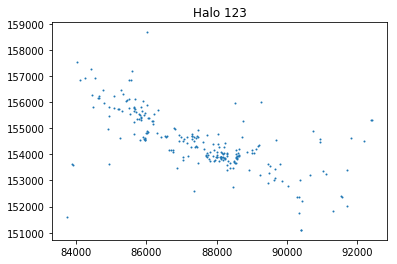

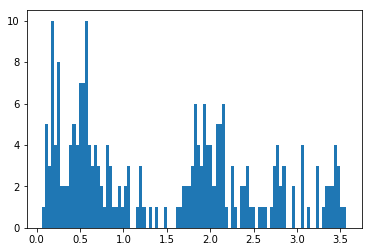

galaxies [0, 2, 3, 2, 9, 5, 9, 4, 7, 12, 22, 13, 10, 9, 6, 3, 33, 32, 21, 25]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 3, 5, 4, 4, 2, 28, 21, 18, 21]
red galaxies counted [0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2]
red galaxies counted [0, 2, 2, 2, 6, 4, 9, 2, 6, 10, 16, 10, 5, 5, 1, 1, 5, 9, 2, 2]
sum of galaxies: 227

Halo: 124
Halo Mass: 9097.682
N Subhalos from Illustris Algorithm: 812 209.10911989212036
R500c, R200c, R200m: 0.34309460797902663 0.5356989124422801 0.6703758878947268
before dev loop: 209.12784814834595
True
566208 566208 time 209.18290495872498
N Subhalos within 5*R200m: 332 209.2354679107666


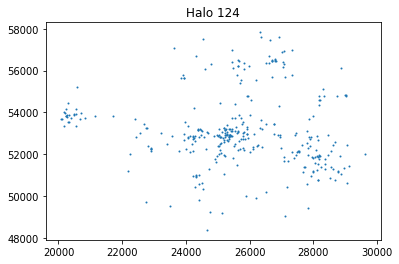

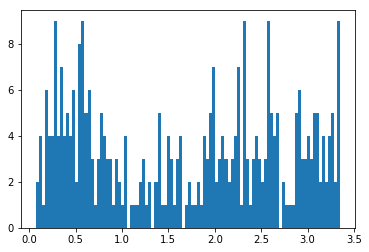

galaxies [1, 0, 2, 4, 3, 3, 8, 11, 12, 11, 20, 18, 16, 11, 11, 18, 16, 47, 55, 65]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 4, 6, 5, 6, 5, 5, 3, 8, 15, 13, 32, 37, 35]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 2, 0, 0, 0, 0, 1, 3, 5, 1]
red galaxies counted [1, 0, 1, 4, 3, 2, 6, 6, 4, 6, 11, 11, 11, 8, 3, 3, 2, 12, 13, 29]
sum of galaxies: 332

Halo: 125
Halo Mass: 8816.612
N Subhalos from Illustris Algorithm: 759 209.89210891723633
R500c, R200c, R200m: 0.313551705013488 0.5164751695672211 0.6795703201074692
before dev loop: 209.907222032547
True
566208 566208 time 209.979651927948
N Subhalos within 5*R200m: 228 210.05971813201904


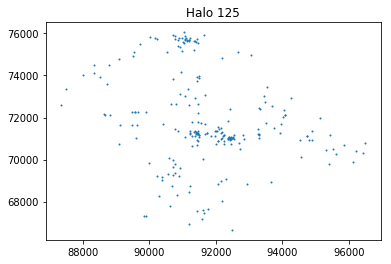

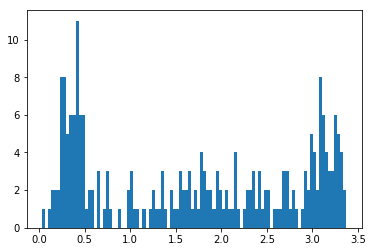

galaxies [0, 0, 1, 0, 4, 1, 10, 11, 12, 20, 9, 3, 5, 7, 5, 11, 23, 19, 27, 59]
blue galaxies counted [0, 0, 1, 0, 1, 0, 5, 1, 4, 11, 4, 2, 4, 6, 4, 10, 23, 16, 26, 35]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3]
red galaxies counted [0, 0, 0, 0, 2, 1, 4, 9, 6, 9, 5, 1, 1, 1, 0, 0, 0, 2, 0, 21]
sum of galaxies: 227

Halo: 126
Halo Mass: 8850.5205
N Subhalos from Illustris Algorithm: 574 211.04113698005676
R500c, R200c, R200m: 0.36687895545464805 0.5603562911996633 0.6950211362133347
before dev loop: 211.0541729927063
True
566208 566208 time 211.12013602256775
N Subhalos within 5*R200m: 224 211.19449996948242


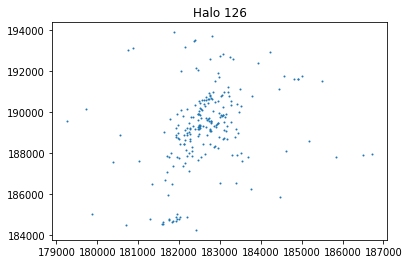

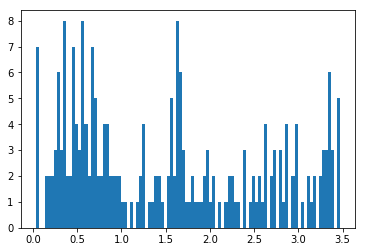

galaxies [0, 0, 0, 1, 1, 3, 4, 8, 11, 10, 17, 17, 12, 8, 9, 13, 28, 14, 23, 38]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 6, 5, 4, 3, 6, 8, 17, 13, 22, 30]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 3, 0, 1, 0]
red galaxies counted [0, 0, 0, 1, 0, 3, 4, 5, 10, 6, 9, 12, 7, 5, 2, 5, 8, 1, 0, 8]
sum of galaxies: 217

Halo: 127
Halo Mass: 8859.751
N Subhalos from Illustris Algorithm: 780 212.1210401058197
R500c, R200c, R200m: 0.4007061452371604 0.6033504895957065 0.7303991005054232
before dev loop: 212.15277886390686
True
566208 566208 time 212.20443105697632
N Subhalos within 5*R200m: 288 212.25892806053162


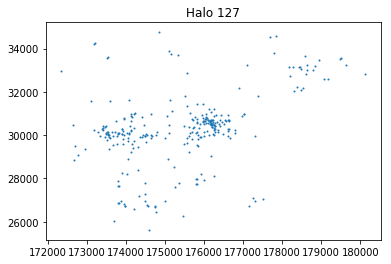

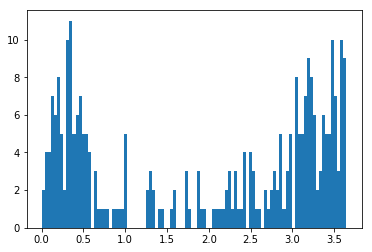

galaxies [1, 1, 4, 6, 7, 8, 4, 15, 17, 15, 7, 6, 3, 7, 7, 5, 9, 19, 33, 108]
blue galaxies counted [0, 0, 1, 0, 0, 2, 1, 6, 4, 5, 1, 5, 3, 7, 5, 5, 8, 18, 19, 46]
red galaxies counted [1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 8]
red galaxies counted [0, 1, 3, 6, 5, 5, 3, 9, 13, 9, 5, 1, 0, 0, 2, 0, 1, 1, 11, 54]
sum of galaxies: 282

Halo: 128
Halo Mass: 8926.37
N Subhalos from Illustris Algorithm: 792 213.16966104507446
R500c, R200c, R200m: 0.34657992724933545 0.5474611944025112 0.6935963100878747
before dev loop: 213.1938021183014
True
566208 566208 time 213.24569582939148
N Subhalos within 5*R200m: 247 213.32851123809814


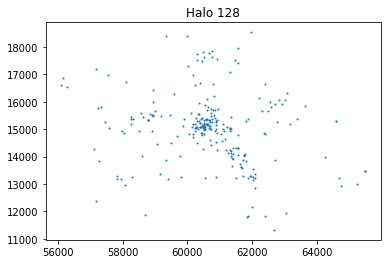

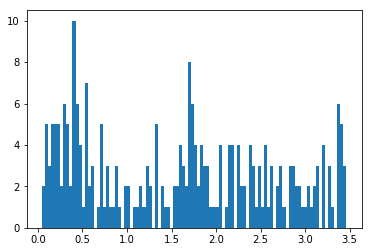

galaxies [2, 2, 3, 4, 3, 6, 5, 8, 10, 16, 11, 8, 9, 5, 10, 14, 38, 24, 30, 38]
blue galaxies counted [2, 0, 3, 2, 0, 0, 2, 3, 3, 10, 6, 7, 4, 4, 9, 12, 26, 21, 26, 31]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 2]
red galaxies counted [0, 2, 0, 2, 3, 6, 2, 4, 5, 5, 4, 0, 4, 0, 1, 1, 9, 3, 3, 5]
sum of galaxies: 246

Halo: 129
Halo Mass: 8689.507
N Subhalos from Illustris Algorithm: 649 214.0780520439148
R500c, R200c, R200m: 0.3661112948489809 0.5652430564758122 0.6996918755897089
before dev loop: 214.10670495033264
True
566208 566208 time 214.1631462574005
N Subhalos within 5*R200m: 318 214.24631690979004


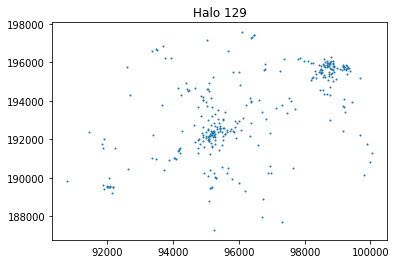

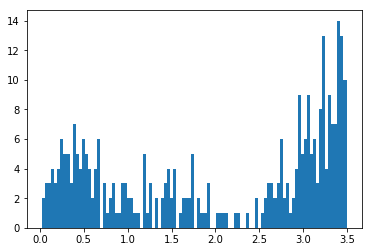

galaxies [2, 3, 1, 3, 4, 4, 8, 7, 11, 12, 14, 10, 10, 12, 11, 17, 18, 6, 29, 134]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 4, 5, 3, 6, 16, 18, 4, 25, 65]
red galaxies counted [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 15]
red galaxies counted [1, 2, 0, 3, 4, 4, 7, 6, 7, 5, 6, 4, 5, 8, 4, 1, 0, 2, 3, 54]
sum of galaxies: 316

Halo: 130
Halo Mass: 8864.545
N Subhalos from Illustris Algorithm: 724 214.98793005943298
R500c, R200c, R200m: 0.32361224254789944 0.5001646536519112 0.6144767842609375
before dev loop: 215.02456307411194
True
566208 566208 time 215.11071705818176
N Subhalos within 5*R200m: 203 215.21697092056274


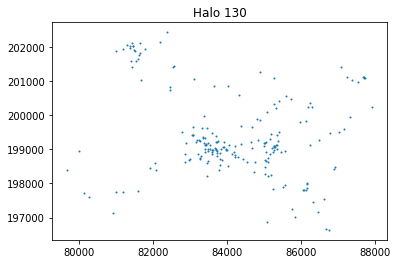

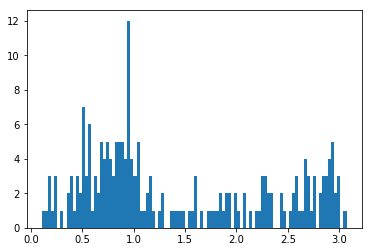

galaxies [0, 0, 1, 0, 1, 3, 3, 1, 1, 6, 12, 13, 20, 26, 25, 8, 9, 16, 17, 41]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 4, 2, 8, 6, 9, 5, 8, 16, 17, 38]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 2, 1, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 0, 1, 2, 3, 0, 1, 4, 6, 10, 10, 17, 14, 2, 1, 0, 0, 2]
sum of galaxies: 203

Halo: 131
Halo Mass: 8610.865
N Subhalos from Illustris Algorithm: 620 215.97262501716614
R500c, R200c, R200m: 0.3800983313081706 0.5802232676054265 0.7170685890148039
before dev loop: 215.99518609046936
True
566208 566208 time 216.05904912948608
N Subhalos within 5*R200m: 231 216.53742098808289


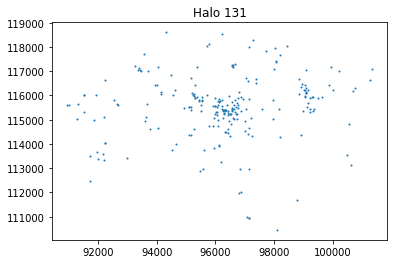

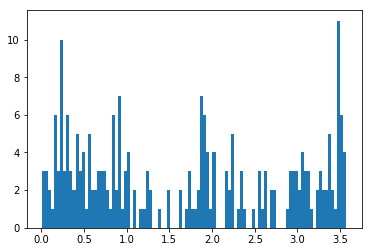

galaxies [2, 0, 2, 0, 7, 4, 11, 7, 7, 9, 8, 11, 15, 13, 7, 5, 26, 19, 18, 55]
blue galaxies counted [0, 0, 0, 0, 1, 1, 4, 1, 2, 3, 2, 4, 8, 7, 4, 4, 19, 16, 15, 49]
red galaxies counted [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 3]
red galaxies counted [2, 0, 1, 0, 5, 3, 6, 6, 4, 5, 6, 7, 7, 5, 2, 1, 6, 2, 2, 3]
sum of galaxies: 226

Halo: 132
Halo Mass: 8506.837
N Subhalos from Illustris Algorithm: 660 217.31417298316956
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
before dev loop: 217.33642506599426
True
566208 566208 time 217.40665698051453
N Subhalos within 5*R200m: 292 217.93302607536316


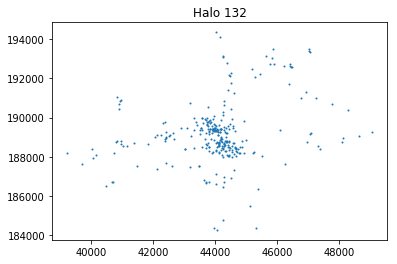

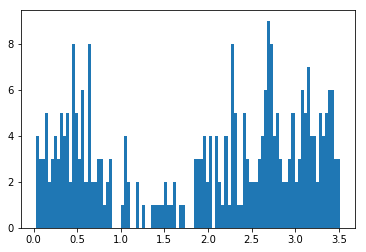

galaxies [3, 2, 1, 5, 0, 5, 4, 7, 11, 14, 10, 14, 11, 6, 4, 9, 14, 35, 59, 74]
blue galaxies counted [1, 0, 0, 0, 0, 0, 0, 2, 3, 3, 4, 4, 6, 5, 4, 9, 13, 19, 30, 55]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 3, 6, 7]
red galaxies counted [2, 2, 1, 5, 0, 5, 4, 5, 6, 10, 5, 10, 4, 1, 0, 0, 1, 13, 23, 12]
sum of galaxies: 288

Halo: 133
Halo Mass: 8327.565
N Subhalos from Illustris Algorithm: 503 218.56920909881592
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
before dev loop: 218.59327721595764
True
566208 566208 time 218.64631414413452
N Subhalos within 5*R200m: 223 218.93325901031494


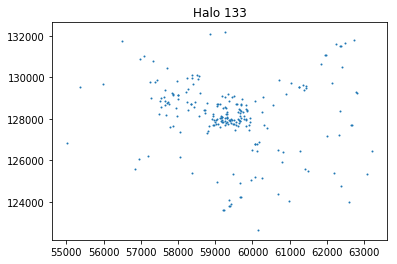

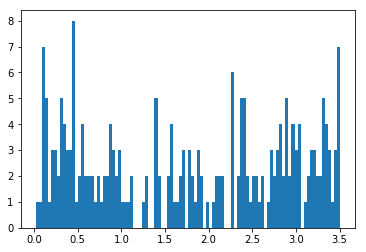

galaxies [0, 5, 2, 3, 2, 4, 4, 6, 8, 11, 8, 6, 10, 11, 5, 13, 18, 17, 36, 52]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 4, 9, 2, 13, 18, 15, 31, 34]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 3, 2]
red galaxies counted [0, 5, 1, 3, 1, 4, 4, 4, 5, 8, 7, 6, 4, 2, 3, 0, 0, 1, 2, 16]
sum of galaxies: 221

Halo: 134
Halo Mass: 9039.415
N Subhalos from Illustris Algorithm: 875 219.7338080406189
R500c, R200c, R200m: 0.20959902917027928 0.35189406029421955 0.4597316592844237
before dev loop: 219.75962209701538
True
566208 566208 time 219.81266713142395
N Subhalos within 5*R200m: 166 219.90245485305786


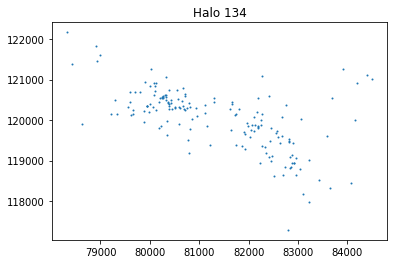

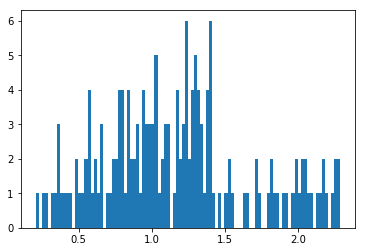

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 6, 3, 10, 8, 19, 25, 28, 32, 10, 22]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 3, 2, 12, 12, 19, 19, 10, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 2, 1, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 7, 5, 7, 10, 7, 12, 0, 0]
sum of galaxies: 166

Halo: 135
Halo Mass: 8747.786
N Subhalos from Illustris Algorithm: 812 220.58860802650452
R500c, R200c, R200m: 0.39101192293309345 0.589699101977086 0.7159501065114855
before dev loop: 220.61741304397583
True
566208 566208 time 220.66509985923767
N Subhalos within 5*R200m: 343 220.77758502960205


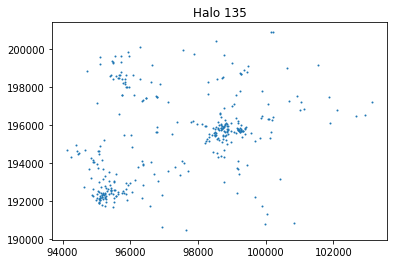

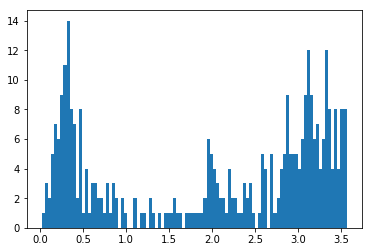

galaxies [1, 1, 2, 3, 8, 7, 15, 19, 15, 11, 8, 7, 10, 4, 6, 8, 19, 27, 47, 123]
blue galaxies counted [0, 0, 1, 0, 2, 2, 2, 8, 6, 3, 5, 5, 8, 2, 5, 7, 18, 25, 31, 58]
red galaxies counted [0, 0, 0, 1, 1, 1, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 6]
red galaxies counted [1, 1, 1, 2, 5, 4, 11, 8, 8, 8, 3, 2, 2, 2, 0, 1, 1, 1, 12, 59]
sum of galaxies: 341

Halo: 136
Halo Mass: 8715.005
N Subhalos from Illustris Algorithm: 669 221.40145182609558
R500c, R200c, R200m: 0.3718167646563368 0.5763609038717971 0.715964038500574
before dev loop: 221.42085218429565
True
566208 566208 time 221.4776611328125
N Subhalos within 5*R200m: 315 221.613694190979


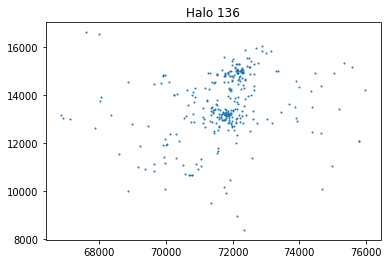

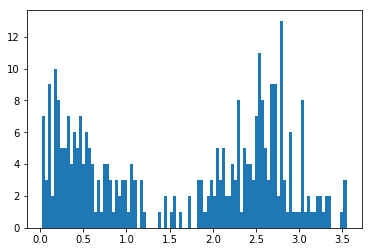

galaxies [2, 1, 8, 2, 10, 8, 8, 9, 10, 16, 14, 9, 14, 13, 5, 7, 14, 44, 84, 29]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 5, 9, 5, 2, 4, 6, 2, 7, 11, 28, 30, 23]
red galaxies counted [1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 8, 2]
red galaxies counted [1, 1, 8, 2, 8, 8, 5, 9, 5, 7, 9, 6, 8, 5, 3, 0, 3, 13, 46, 4]
sum of galaxies: 307

Halo: 137
Halo Mass: 8702.109
N Subhalos from Illustris Algorithm: 666 222.29711508750916
R500c, R200c, R200m: 0.40050092863926473 0.5958553597072482 0.7231846521557567
before dev loop: 222.3149721622467
True
566208 566208 time 222.37756204605103
N Subhalos within 5*R200m: 178 222.49354887008667


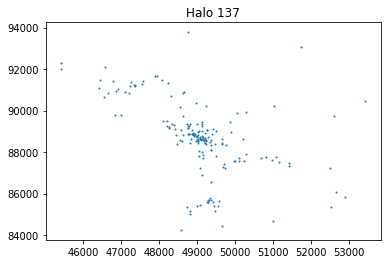

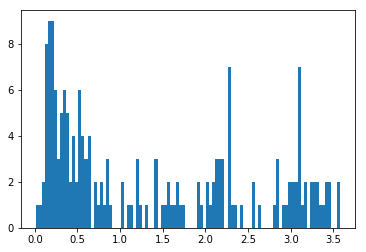

galaxies [0, 1, 3, 8, 8, 9, 8, 7, 10, 7, 14, 6, 7, 3, 6, 9, 7, 24, 9, 30]
blue galaxies counted [0, 0, 1, 2, 0, 1, 3, 3, 5, 1, 5, 2, 6, 2, 6, 9, 7, 18, 8, 29]
red galaxies counted [0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1]
red galaxies counted [0, 0, 2, 5, 6, 7, 5, 4, 5, 6, 9, 4, 1, 1, 0, 0, 0, 4, 1, 0]
sum of galaxies: 176

Halo: 138
Halo Mass: 8484.707
N Subhalos from Illustris Algorithm: 536 223.16316103935242
R500c, R200c, R200m: 0.35872738066652227 0.5530849939290035 0.7087427842941688
before dev loop: 223.18795895576477
True
566208 566208 time 223.23776507377625
N Subhalos within 5*R200m: 275 223.31111097335815


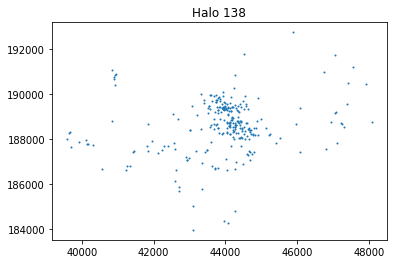

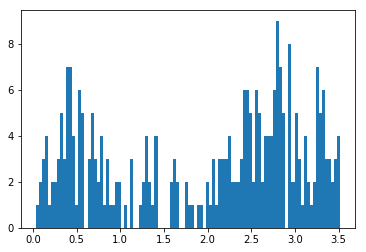

galaxies [1, 1, 2, 2, 4, 1, 3, 8, 9, 12, 12, 12, 10, 6, 10, 10, 10, 29, 71, 61]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 6, 7, 4, 6, 9, 9, 9, 12, 32, 43]
red galaxies counted [0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3]
red galaxies counted [1, 1, 1, 0, 4, 1, 3, 7, 6, 7, 5, 4, 5, 0, 1, 0, 0, 16, 37, 15]
sum of galaxies: 274

Halo: 139
Halo Mass: 8893.031
N Subhalos from Illustris Algorithm: 926 224.03794598579407
R500c, R200c, R200m: 0.2630793913708331 0.4094901042196601 0.5141267886823278
before dev loop: 224.06477093696594
True
566208 566208 time 224.11576008796692
N Subhalos within 5*R200m: 231 224.21506595611572


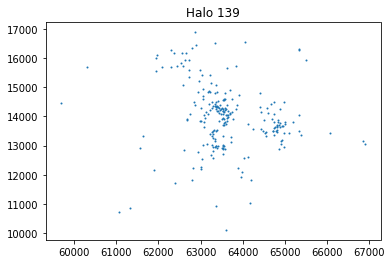

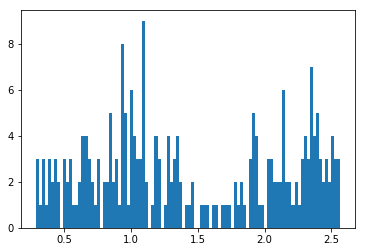

galaxies [0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 8, 7, 12, 12, 27, 30, 25, 10, 30, 62]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 2, 6, 4, 16, 19, 16, 8, 22, 37]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 7, 10, 11, 7, 1, 7, 20]
sum of galaxies: 231

Halo: 140
Halo Mass: 8741.43
N Subhalos from Illustris Algorithm: 759 224.8859691619873
R500c, R200c, R200m: 0.34085379966505525 0.5692274452173204 0.7142596117665102
before dev loop: 224.914479970932
True
566208 566208 time 224.96175718307495
N Subhalos within 5*R200m: 273 225.07539916038513


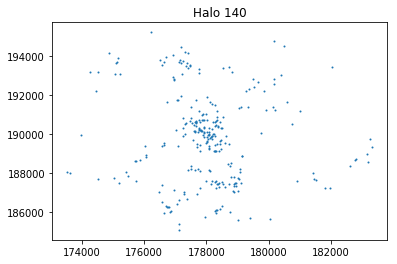

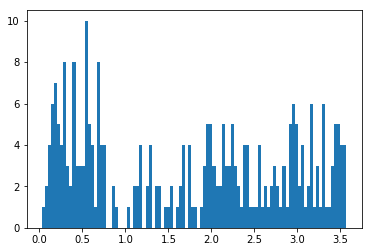

galaxies [0, 2, 3, 4, 6, 7, 6, 11, 8, 10, 17, 17, 6, 1, 14, 10, 23, 36, 33, 58]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 6, 5, 1, 1, 14, 9, 19, 24, 23, 52]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 3, 5, 3]
red galaxies counted [0, 2, 3, 2, 6, 5, 6, 5, 3, 6, 10, 10, 5, 0, 0, 1, 2, 9, 5, 3]
sum of galaxies: 272

Halo: 141
Halo Mass: 8617.786
N Subhalos from Illustris Algorithm: 608 225.7424840927124
R500c, R200c, R200m: 0.3631599951259469 0.5389215256424773 0.665320577578168
before dev loop: 225.76394891738892
True
566208 566208 time 225.82446718215942
N Subhalos within 5*R200m: 174 225.89856505393982


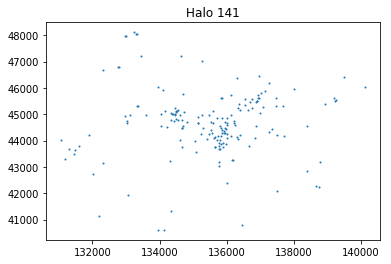

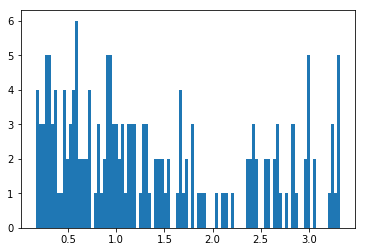

galaxies [0, 0, 0, 0, 2, 3, 8, 7, 7, 4, 11, 12, 8, 20, 14, 15, 13, 7, 19, 24]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 5, 7, 3, 4, 8, 12, 9, 4, 17, 19]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 4, 0, 1, 4, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 2, 0, 7, 5, 7, 1, 6, 4, 5, 12, 6, 2, 0, 3, 2, 4]
sum of galaxies: 174

Halo: 142
Halo Mass: 8431.642
N Subhalos from Illustris Algorithm: 615 226.57684111595154
R500c, R200c, R200m: 0.37202514397589337 0.5725292065279429 0.7086753662780049
before dev loop: 226.59001684188843
True
566208 566208 time 226.6451108455658
N Subhalos within 5*R200m: 238 226.86109519004822


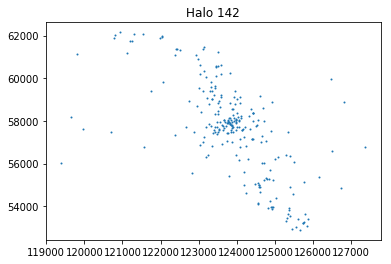

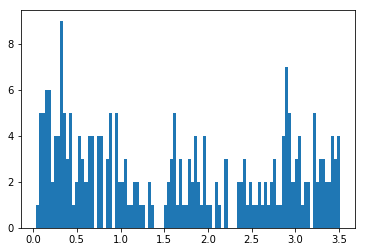

galaxies [1, 1, 5, 5, 6, 2, 5, 11, 10, 8, 7, 11, 15, 13, 8, 11, 23, 13, 29, 50]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 3, 2, 1, 6, 6, 4, 6, 10, 17, 13, 23, 40]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 3, 0, 2, 1]
red galaxies counted [1, 1, 5, 3, 6, 2, 5, 9, 5, 5, 5, 4, 7, 8, 2, 1, 3, 0, 4, 9]
sum of galaxies: 234

Halo: 143
Halo Mass: 8346.669
N Subhalos from Illustris Algorithm: 612 227.583349943161
R500c, R200c, R200m: 0.38814289400769414 0.5854102111982008 0.7205852952950131
before dev loop: 227.60212302207947
True
566208 566208 time 227.66425013542175
N Subhalos within 5*R200m: 268 227.7487919330597


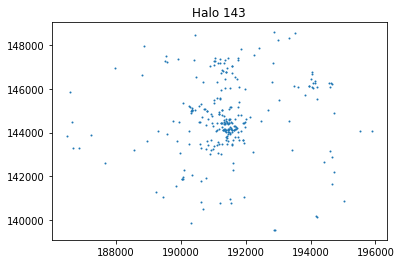

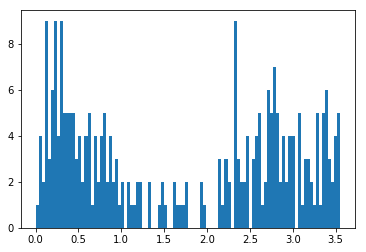

galaxies [1, 2, 4, 8, 4, 7, 8, 11, 12, 11, 9, 11, 17, 8, 8, 7, 7, 25, 52, 52]
blue galaxies counted [0, 0, 0, 0, 0, 2, 3, 1, 2, 6, 5, 3, 12, 4, 3, 7, 7, 17, 32, 46]
red galaxies counted [0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 4, 1]
red galaxies counted [1, 1, 3, 6, 2, 5, 3, 10, 9, 5, 4, 7, 4, 4, 4, 0, 0, 7, 16, 5]
sum of galaxies: 264

Halo: 144
Halo Mass: 8499.036
N Subhalos from Illustris Algorithm: 620 228.47250509262085
R500c, R200c, R200m: 0.3314687434119538 0.5152220512038319 0.6360567147389136
before dev loop: 228.50299715995789
True
566208 566208 time 228.5512318611145
N Subhalos within 5*R200m: 151 228.61627411842346


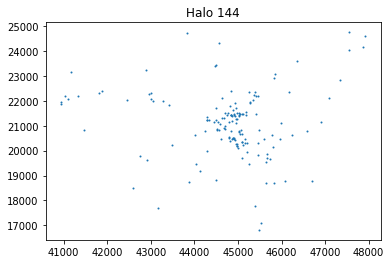

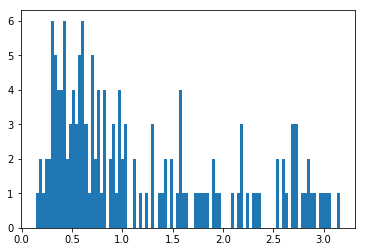

galaxies [0, 0, 0, 0, 1, 2, 1, 7, 11, 11, 9, 17, 14, 13, 8, 8, 11, 8, 11, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 11, 1, 4, 6, 7, 11, 8, 10, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 8, 8, 6, 4, 11, 8, 2, 1, 0, 0, 1, 2]
sum of galaxies: 151

Halo: 145
Halo Mass: 8646.907
N Subhalos from Illustris Algorithm: 531 229.3767032623291
R500c, R200c, R200m: 0.3083741294823421 0.5314948947003709 0.6717699275270572
before dev loop: 229.4167468547821
True
566208 566208 time 229.45809388160706
N Subhalos within 5*R200m: 207 229.52295589447021


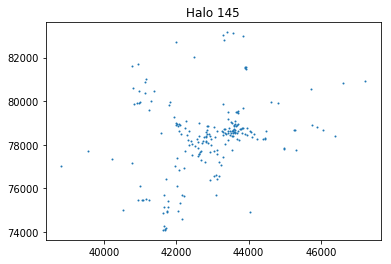

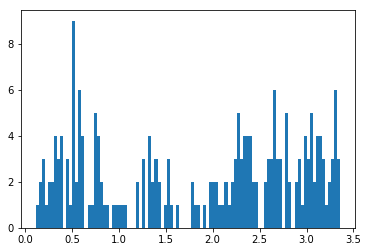

galaxies [0, 0, 1, 0, 2, 3, 3, 2, 9, 5, 14, 10, 12, 5, 5, 16, 6, 21, 40, 53]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 1, 6, 6, 2, 4, 9, 6, 18, 30, 51]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 0, 0, 3, 0, 0, 4, 0]
red galaxies counted [0, 0, 1, 0, 2, 2, 3, 2, 4, 2, 9, 4, 6, 3, 1, 4, 0, 3, 6, 2]
sum of galaxies: 207

Halo: 146
Halo Mass: 8481.565
N Subhalos from Illustris Algorithm: 727 230.14266896247864
R500c, R200c, R200m: 0.355486231515325 0.5796645468016356 0.7114444692127003
before dev loop: 230.1680202484131
True
566208 566208 time 230.21991324424744
N Subhalos within 5*R200m: 313 230.3136010169983


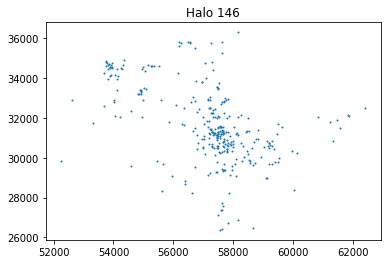

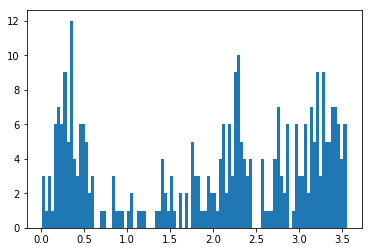

galaxies [1, 2, 1, 1, 5, 8, 12, 11, 15, 12, 11, 2, 4, 5, 4, 14, 19, 55, 35, 93]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 5, 3, 4, 0, 4, 5, 4, 14, 13, 46, 33, 71]
red galaxies counted [1, 0, 0, 0, 1, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1, 6]
red galaxies counted [0, 2, 1, 1, 3, 7, 8, 9, 8, 8, 6, 2, 0, 0, 0, 0, 3, 8, 1, 16]
sum of galaxies: 310

Halo: 147
Halo Mass: 8495.3
N Subhalos from Illustris Algorithm: 736 230.96770405769348
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
before dev loop: 230.99075388908386
True
566208 566208 time 231.0441918373108
N Subhalos within 5*R200m: 228 231.11637115478516


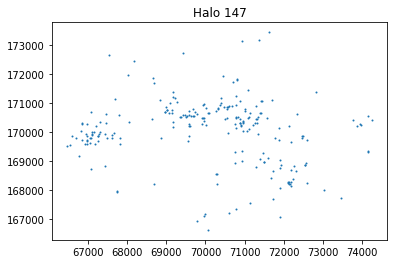

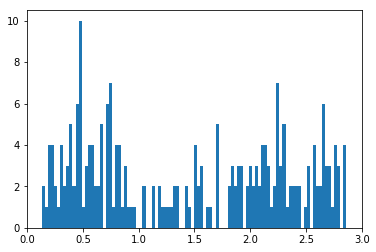

galaxies [0, 0, 0, 0, 2, 1, 6, 4, 7, 8, 18, 12, 14, 20, 6, 8, 16, 20, 43, 43]
blue galaxies counted [0, 0, 0, 0, 1, 1, 3, 0, 1, 2, 3, 9, 8, 11, 5, 8, 14, 9, 23, 29]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 3, 2]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 3, 5, 2, 14, 3, 5, 7, 1, 0, 2, 11, 17, 12]
sum of galaxies: 228

Halo: 148
Halo Mass: 8410.298
N Subhalos from Illustris Algorithm: 755 231.78116393089294
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
before dev loop: 231.8026089668274
True
566208 566208 time 231.85822987556458
N Subhalos within 5*R200m: 228 231.92274713516235


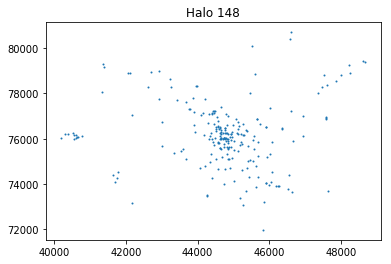

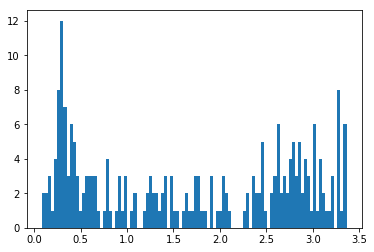

galaxies [0, 2, 0, 1, 3, 2, 10, 16, 9, 13, 7, 9, 6, 8, 11, 13, 13, 13, 39, 53]
blue galaxies counted [0, 1, 0, 0, 0, 1, 2, 5, 1, 7, 1, 3, 5, 3, 6, 9, 13, 13, 33, 47]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2]
red galaxies counted [0, 0, 0, 1, 3, 0, 6, 9, 6, 6, 5, 6, 1, 4, 5, 2, 0, 0, 4, 4]
sum of galaxies: 228

Halo: 149
Halo Mass: 8279.199
N Subhalos from Illustris Algorithm: 669 232.55379796028137
R500c, R200c, R200m: 0.3564033807625338 0.5670571776067224 0.7089757848013387
before dev loop: 232.56870222091675
True
566208 566208 time 232.62641191482544
N Subhalos within 5*R200m: 189 232.70077514648438


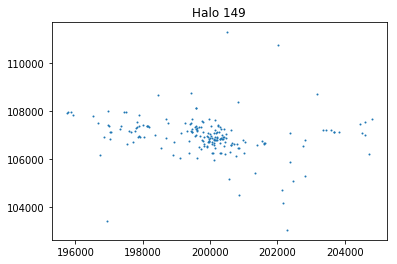

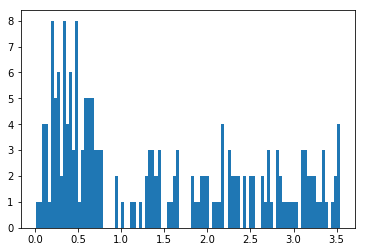

galaxies [1, 1, 3, 3, 1, 9, 7, 7, 11, 15, 10, 15, 4, 3, 6, 14, 9, 20, 19, 29]
blue galaxies counted [0, 0, 1, 0, 0, 2, 3, 2, 2, 5, 5, 8, 2, 2, 6, 12, 8, 14, 13, 28]
red galaxies counted [0, 0, 0, 2, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0]
red galaxies counted [1, 1, 2, 1, 1, 6, 4, 5, 5, 10, 4, 7, 2, 1, 0, 1, 0, 4, 5, 1]
sum of galaxies: 187

Halo: 150
Halo Mass: 8197.111
N Subhalos from Illustris Algorithm: 712 233.4422149658203
R500c, R200c, R200m: 0.36818267736461163 0.5506671532709245 0.6832905615386152
before dev loop: 233.472314119339
True
566208 566208 time 233.52457213401794
N Subhalos within 5*R200m: 172 233.58432412147522


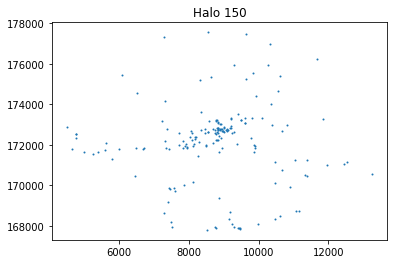

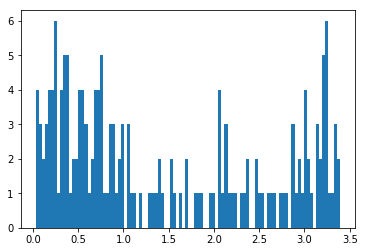

galaxies [2, 1, 2, 1, 4, 4, 8, 5, 10, 3, 12, 8, 13, 12, 4, 9, 6, 13, 14, 37]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 3, 7, 4, 9, 6, 13, 14, 37]
red galaxies counted [0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 1, 1, 1, 3, 2, 6, 5, 8, 3, 7, 5, 9, 5, 0, 0, 0, 0, 0, 0]
sum of galaxies: 168

Halo: 151
Halo Mass: 8536.564
N Subhalos from Illustris Algorithm: 750 234.23843121528625
R500c, R200c, R200m: 0.2833617852615874 0.45805337504712657 0.5768294270565753
before dev loop: 234.2875680923462
True
566208 566208 time 234.3401062488556
N Subhalos within 5*R200m: 139 234.41696500778198


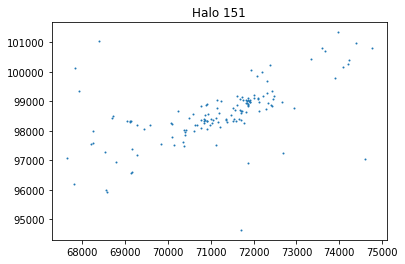

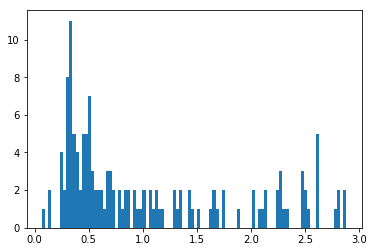

galaxies [1, 0, 0, 0, 2, 0, 0, 4, 18, 12, 13, 13, 10, 8, 8, 7, 7, 7, 13, 16]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 4, 5, 1, 4, 4, 4, 5, 5, 1, 5, 12, 14]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 3, 12, 6, 10, 8, 6, 4, 3, 2, 5, 2, 0, 1]
sum of galaxies: 139

Halo: 152
Halo Mass: 8128.882
N Subhalos from Illustris Algorithm: 566 235.12304496765137
R500c, R200c, R200m: 0.3697602349221769 0.5736313149406371 0.7048703318787857
before dev loop: 235.15481996536255
True
566208 566208 time 235.20302414894104
N Subhalos within 5*R200m: 222 235.27544403076172


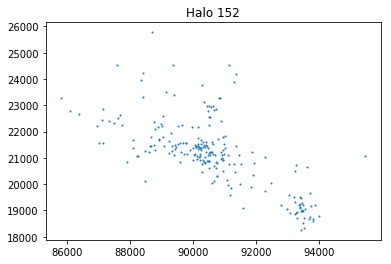

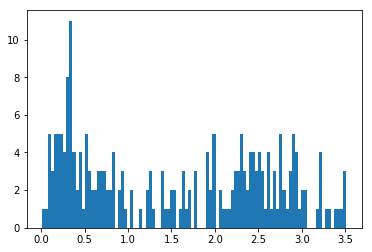

galaxies [0, 2, 3, 3, 5, 7, 5, 15, 11, 6, 10, 10, 9, 8, 7, 10, 15, 27, 40, 27]
blue galaxies counted [0, 0, 1, 0, 2, 0, 2, 7, 2, 3, 4, 3, 6, 3, 5, 8, 10, 16, 18, 21]
red galaxies counted [0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0]
red galaxies counted [0, 2, 0, 2, 2, 5, 3, 7, 8, 2, 4, 7, 3, 5, 1, 2, 4, 9, 21, 6]
sum of galaxies: 220

Halo: 153
Halo Mass: 8169.5938
N Subhalos from Illustris Algorithm: 773 235.9351761341095
R500c, R200c, R200m: 0.29988005996245715 0.4897882042614727 0.6071339454256192
before dev loop: 235.96187090873718
True
566208 566208 time 236.00897026062012
N Subhalos within 5*R200m: 206 236.08716297149658


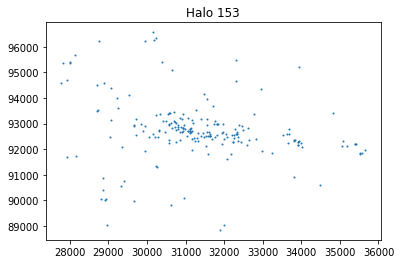

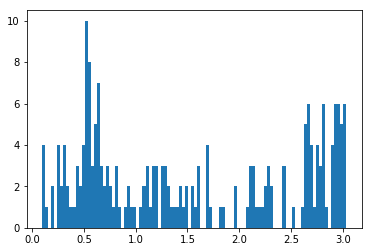

galaxies [0, 0, 1, 3, 1, 1, 1, 6, 6, 2, 14, 25, 13, 8, 9, 16, 13, 8, 20, 59]
blue galaxies counted [0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 5, 12, 7, 2, 6, 15, 9, 8, 19, 50]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 5]
red galaxies counted [0, 0, 1, 1, 0, 1, 1, 4, 5, 1, 7, 12, 6, 4, 3, 0, 2, 0, 0, 4]
sum of galaxies: 206

Halo: 154
Halo Mass: 8177.6294
N Subhalos from Illustris Algorithm: 662 236.7540819644928
R500c, R200c, R200m: 0.3475424755644361 0.5690527348713943 0.7055134453061357
before dev loop: 236.76921200752258
True
566208 566208 time 236.83631920814514
N Subhalos within 5*R200m: 303 236.88833904266357


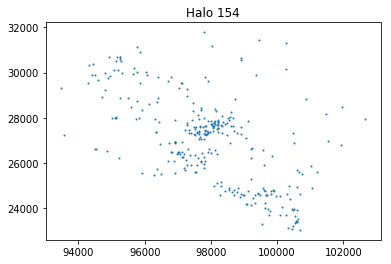

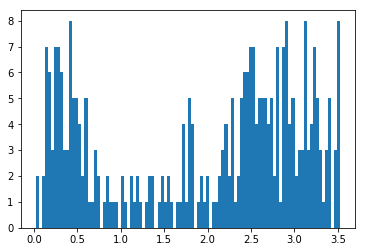

galaxies [0, 0, 2, 6, 6, 4, 9, 11, 6, 16, 11, 8, 5, 5, 7, 11, 19, 26, 75, 74]
blue galaxies counted [0, 0, 0, 3, 2, 0, 1, 3, 2, 5, 6, 5, 3, 5, 6, 9, 15, 20, 59, 53]
red galaxies counted [0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 4, 2]
red galaxies counted [0, 0, 0, 3, 4, 4, 8, 7, 4, 11, 4, 3, 2, 0, 0, 1, 2, 5, 12, 19]
sum of galaxies: 301

Halo: 155
Halo Mass: 8149.402
N Subhalos from Illustris Algorithm: 772 237.54310202598572
R500c, R200c, R200m: 0.27335867714771467 0.5035693835715442 0.6768387694881904
before dev loop: 237.57886004447937
True
566208 566208 time 237.62488317489624
N Subhalos within 5*R200m: 340 237.70497012138367


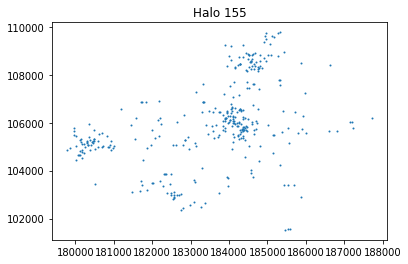

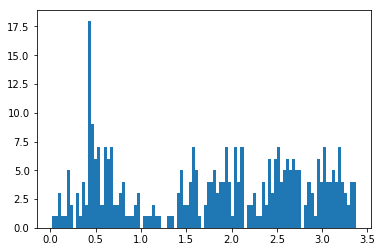

galaxies [0, 2, 1, 1, 1, 5, 2, 3, 5, 26, 18, 21, 11, 7, 7, 16, 36, 43, 65, 68]
blue galaxies counted [0, 1, 0, 0, 0, 1, 0, 1, 2, 13, 10, 14, 10, 5, 7, 13, 25, 30, 43, 44]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 2, 5, 5]
red galaxies counted [0, 1, 1, 0, 1, 4, 1, 2, 2, 10, 7, 6, 1, 1, 0, 2, 10, 11, 17, 19]
sum of galaxies: 338

Halo: 156
Halo Mass: 7945.6147
N Subhalos from Illustris Algorithm: 727 238.51285219192505
R500c, R200c, R200m: 0.3499973480900635 0.5359915242475901 0.6757679279820425
before dev loop: 238.54479718208313
True
566208 566208 time 238.5993480682373
N Subhalos within 5*R200m: 220 238.6572709083557


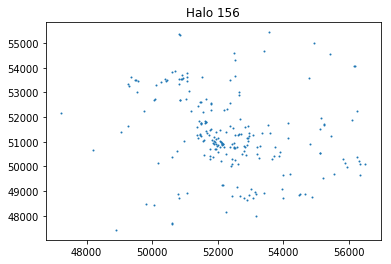

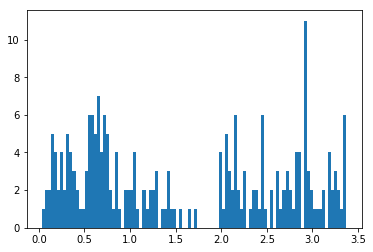

galaxies [1, 1, 1, 4, 3, 5, 4, 7, 6, 4, 12, 21, 15, 10, 12, 9, 3, 27, 26, 48]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 2, 0, 3, 6, 11, 6, 5, 9, 7, 3, 20, 25, 40]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1]
red galaxies counted [0, 1, 1, 3, 3, 3, 4, 5, 5, 0, 5, 8, 9, 4, 3, 2, 0, 5, 0, 7]
sum of galaxies: 219

Halo: 157
Halo Mass: 8041.41
N Subhalos from Illustris Algorithm: 639 239.33435797691345
R500c, R200c, R200m: 0.3406907793789391 0.5433642688181072 0.6748474558753672
before dev loop: 239.34838104248047
True
566208 566208 time 239.39814019203186
N Subhalos within 5*R200m: 193 239.46088790893555


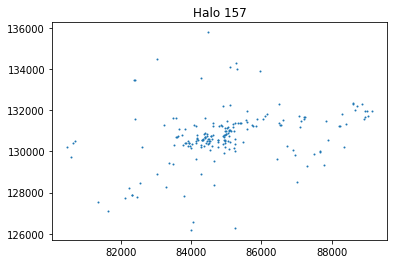

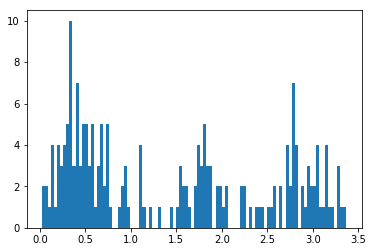

galaxies [0, 0, 1, 3, 2, 3, 5, 8, 13, 11, 16, 10, 8, 7, 6, 4, 24, 14, 18, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 4, 6, 5, 2, 3, 3, 6, 5, 3, 18, 11, 15, 34]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4, 0, 1, 1]
red galaxies counted [0, 0, 1, 3, 2, 3, 4, 4, 6, 6, 13, 6, 5, 1, 0, 1, 2, 3, 2, 1]
sum of galaxies: 189

Halo: 158
Halo Mass: 8053.81
N Subhalos from Illustris Algorithm: 703 240.08755493164062
R500c, R200c, R200m: 0.3107090988260152 0.4755271720168756 0.593834300497032
before dev loop: 240.11295199394226
True
566208 566208 time 240.16912698745728
N Subhalos within 5*R200m: 233 240.21735215187073


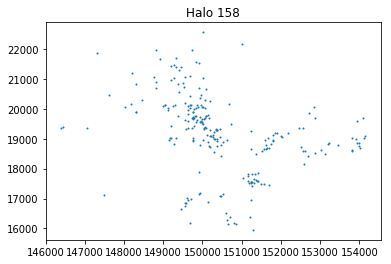

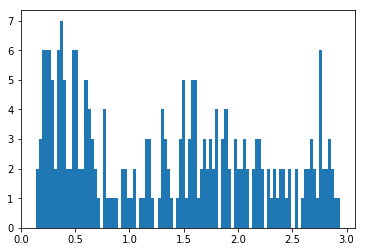

galaxies [0, 0, 0, 0, 2, 3, 9, 10, 10, 14, 11, 15, 9, 8, 9, 18, 25, 29, 29, 32]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 2, 5, 6, 3, 7, 4, 5, 8, 18, 14, 21, 23, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 3]
red galaxies counted [0, 0, 0, 0, 1, 2, 8, 7, 4, 6, 6, 7, 5, 2, 1, 0, 9, 6, 4, 4]
sum of galaxies: 233

Halo: 159
Halo Mass: 8084.0312
N Subhalos from Illustris Algorithm: 588 240.89176893234253
R500c, R200c, R200m: 0.3891170523137019 0.5873126082944562 0.706823292487164
before dev loop: 240.91246700286865
True
566208 566208 time 240.98002696037292
N Subhalos within 5*R200m: 224 241.03336787223816


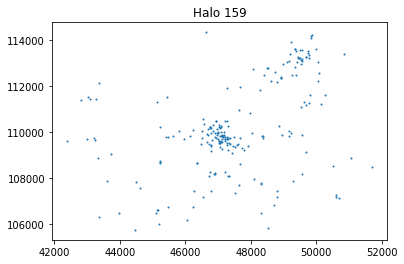

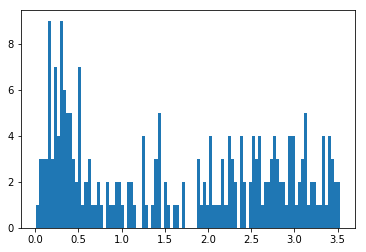

galaxies [3, 2, 1, 3, 8, 3, 9, 15, 8, 9, 10, 6, 6, 6, 9, 13, 8, 26, 34, 43]
blue galaxies counted [0, 0, 0, 1, 1, 0, 4, 8, 2, 5, 6, 2, 6, 6, 9, 12, 7, 19, 22, 35]
red galaxies counted [0, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1]
red galaxies counted [3, 1, 1, 2, 6, 3, 2, 6, 5, 2, 4, 4, 0, 0, 0, 1, 0, 5, 10, 7]
sum of galaxies: 222

Halo: 160
Halo Mass: 7919.1826
N Subhalos from Illustris Algorithm: 555 241.6712999343872
R500c, R200c, R200m: 0.35579509730790504 0.5592189524697337 0.6984627378627105
before dev loop: 241.69579410552979
True
566208 566208 time 241.75559210777283
N Subhalos within 5*R200m: 223 241.81427812576294


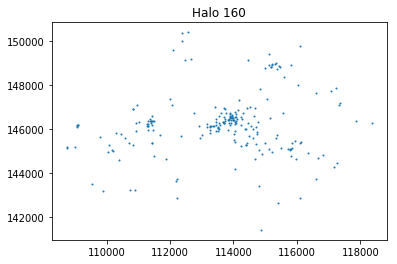

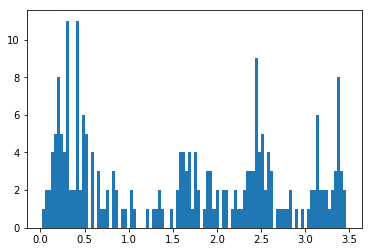

galaxies [2, 1, 1, 4, 4, 9, 7, 13, 7, 15, 10, 5, 7, 4, 4, 9, 24, 19, 39, 38]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 4, 3, 3, 2, 2, 5, 3, 4, 7, 19, 13, 29, 37]
red galaxies counted [1, 0, 0, 1, 0, 0, 3, 1, 0, 4, 2, 0, 0, 1, 0, 0, 1, 1, 4, 0]
red galaxies counted [1, 1, 1, 2, 4, 9, 4, 8, 4, 8, 6, 3, 2, 0, 0, 2, 4, 5, 6, 1]
sum of galaxies: 222

Halo: 161
Halo Mass: 8054.666
N Subhalos from Illustris Algorithm: 822 242.55071187019348
R500c, R200c, R200m: 0.3044565782574526 0.5034663348936309 0.6177706587846336
before dev loop: 242.58913493156433
True
566208 566208 time 242.64129304885864
N Subhalos within 5*R200m: 157 242.70015597343445


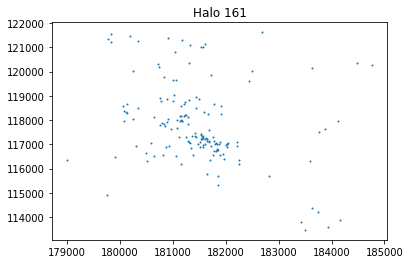

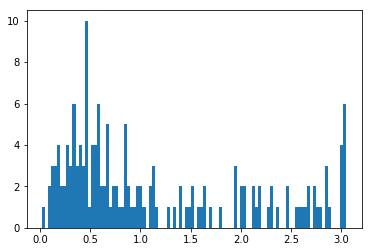

galaxies [0, 0, 2, 2, 3, 4, 4, 5, 9, 9, 16, 14, 10, 11, 11, 4, 9, 8, 11, 24]
blue galaxies counted [0, 0, 0, 2, 2, 3, 2, 0, 4, 3, 8, 6, 7, 9, 9, 3, 9, 7, 8, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1]
red galaxies counted [0, 0, 2, 0, 1, 1, 2, 3, 5, 6, 7, 7, 3, 2, 1, 0, 0, 1, 1, 3]
sum of galaxies: 156

Halo: 162
Halo Mass: 7918.1523
N Subhalos from Illustris Algorithm: 662 243.36183404922485
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
before dev loop: 243.3931920528412
True
566208 566208 time 243.443932056427
N Subhalos within 5*R200m: 251 243.51681804656982


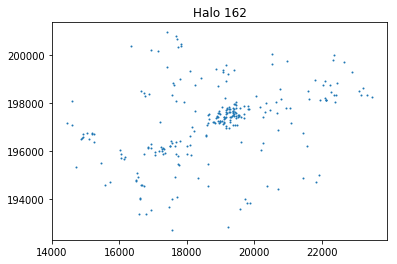

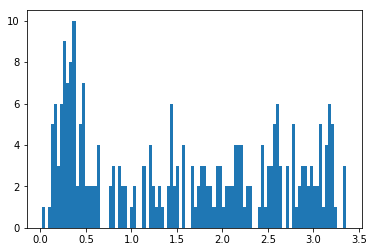

galaxies [0, 1, 0, 4, 6, 4, 8, 14, 18, 13, 7, 6, 5, 9, 11, 16, 20, 28, 33, 47]
blue galaxies counted [0, 0, 0, 3, 0, 0, 3, 3, 7, 1, 1, 2, 2, 5, 9, 11, 14, 23, 29, 40]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 3, 1]
red galaxies counted [0, 1, 0, 0, 5, 1, 4, 10, 11, 11, 5, 4, 2, 3, 2, 2, 6, 4, 1, 6]
sum of galaxies: 250

Halo: 163
Halo Mass: 7904.2363
N Subhalos from Illustris Algorithm: 617 244.16414713859558
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
before dev loop: 244.182599067688
True
566208 566208 time 244.2376091480255
N Subhalos within 5*R200m: 224 244.30303597450256


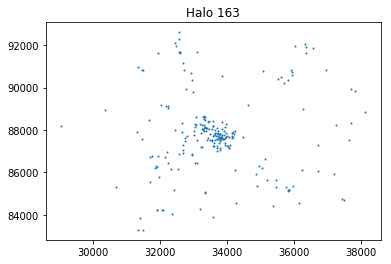

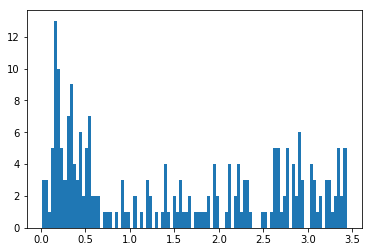

galaxies [1, 1, 0, 5, 12, 11, 7, 10, 11, 9, 16, 5, 3, 7, 6, 13, 10, 23, 24, 45]
blue galaxies counted [0, 0, 0, 2, 4, 4, 3, 6, 4, 1, 4, 1, 3, 7, 6, 10, 10, 21, 22, 39]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 4]
red galaxies counted [1, 1, 0, 3, 5, 6, 3, 4, 6, 8, 10, 4, 0, 0, 0, 2, 0, 2, 0, 2]
sum of galaxies: 219

Halo: 164
Halo Mass: 7866.6455
N Subhalos from Illustris Algorithm: 695 244.9621410369873
R500c, R200c, R200m: 0.3497964952473708 0.5679393767778557 0.702229419257485
before dev loop: 244.98160815238953
True
566208 566208 time 245.0406050682068
N Subhalos within 5*R200m: 359 245.10218620300293


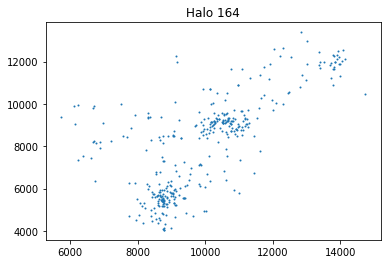

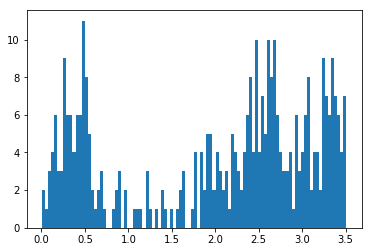

galaxies [0, 3, 1, 4, 5, 4, 4, 16, 10, 20, 15, 6, 5, 5, 6, 7, 22, 37, 91, 95]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 5, 0, 6, 6, 4, 3, 4, 6, 7, 18, 23, 29, 44]
red galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 13, 10]
red galaxies counted [0, 2, 1, 4, 4, 4, 3, 9, 8, 12, 9, 1, 2, 1, 0, 0, 3, 12, 49, 41]
sum of galaxies: 356

Halo: 165
Halo Mass: 7690.5957
N Subhalos from Illustris Algorithm: 709 245.7613570690155
R500c, R200c, R200m: 0.27344559194171225 0.4430576305503677 0.5719358158892364
before dev loop: 245.7852110862732
True
566208 566208 time 245.85240006446838
N Subhalos within 5*R200m: 200 245.92695689201355


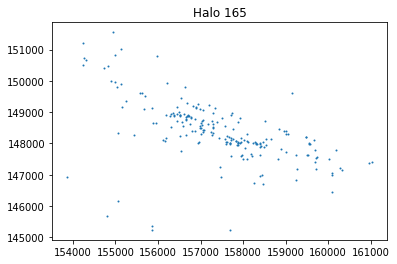

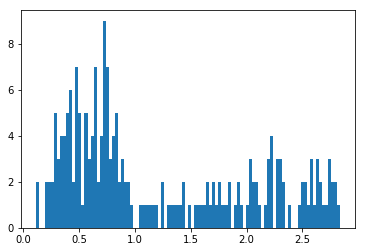

galaxies [0, 0, 0, 1, 1, 0, 2, 4, 9, 12, 14, 14, 23, 25, 10, 7, 9, 16, 27, 26]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 4, 3, 5, 11, 13, 6, 7, 9, 13, 26, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 2, 5, 7, 9, 9, 11, 10, 4, 0, 0, 1, 1, 0]
sum of galaxies: 200

Halo: 166
Halo Mass: 7621.157
N Subhalos from Illustris Algorithm: 633 246.58701992034912
R500c, R200c, R200m: 0.34932849251046083 0.5405197009425156 0.6716175163705631
before dev loop: 246.61045217514038
True
566208 566208 time 246.68359303474426
N Subhalos within 5*R200m: 268 246.73958015441895


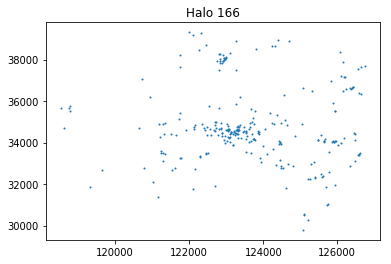

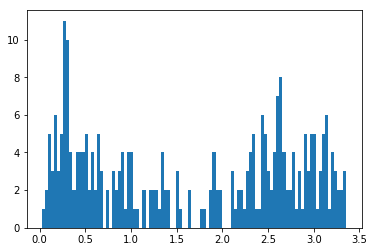

galaxies [2, 1, 3, 3, 4, 6, 6, 18, 8, 11, 11, 11, 7, 16, 9, 14, 4, 20, 57, 56]
blue galaxies counted [0, 0, 0, 0, 1, 1, 2, 7, 2, 2, 6, 6, 2, 11, 9, 14, 4, 20, 48, 48]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4]
red galaxies counted [1, 1, 3, 3, 3, 5, 3, 9, 5, 9, 3, 5, 5, 5, 0, 0, 0, 0, 6, 4]
sum of galaxies: 267

Halo: 167
Halo Mass: 7800.9062
N Subhalos from Illustris Algorithm: 682 247.47227907180786
R500c, R200c, R200m: 0.30861151376194074 0.4945337680275205 0.6328721743020012
before dev loop: 247.50477409362793
True
566208 566208 time 247.55511903762817
N Subhalos within 5*R200m: 389 247.60413599014282


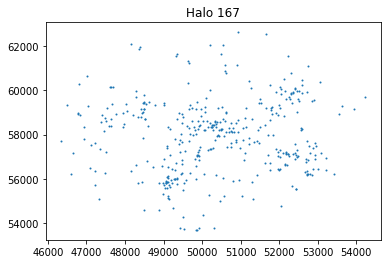

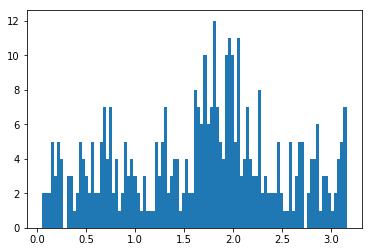

galaxies [1, 0, 2, 2, 2, 6, 9, 0, 6, 7, 10, 14, 21, 17, 13, 33, 47, 93, 47, 58]
blue galaxies counted [0, 0, 1, 1, 0, 3, 0, 0, 2, 1, 4, 9, 11, 14, 7, 23, 22, 49, 39, 45]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 3, 4, 15, 2, 3]
red galaxies counted [1, 0, 1, 1, 2, 1, 7, 0, 4, 6, 5, 4, 8, 3, 5, 7, 21, 29, 6, 10]
sum of galaxies: 388

Halo: 168
Halo Mass: 7575.211
N Subhalos from Illustris Algorithm: 598 248.3513960838318
R500c, R200c, R200m: 0.35806773301074246 0.5511675038445688 0.6865883594385488
before dev loop: 248.37955117225647
True
566208 566208 time 248.42937302589417
N Subhalos within 5*R200m: 290 248.47866201400757


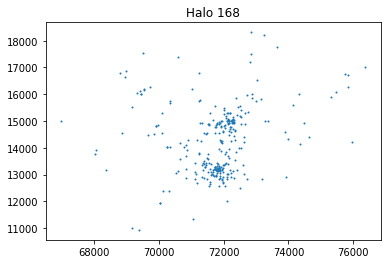

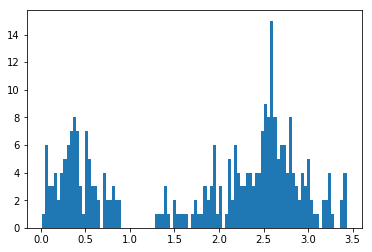

galaxies [5, 3, 1, 2, 4, 2, 6, 10, 17, 7, 15, 8, 11, 2, 1, 9, 13, 39, 93, 40]
blue galaxies counted [0, 1, 0, 1, 0, 0, 2, 3, 0, 2, 5, 3, 5, 1, 1, 6, 8, 23, 20, 29]
red galaxies counted [0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 10, 2]
red galaxies counted [5, 1, 1, 0, 4, 1, 3, 6, 15, 5, 10, 5, 6, 1, 0, 2, 4, 14, 63, 9]
sum of galaxies: 288

Halo: 169
Halo Mass: 7585.1597
N Subhalos from Illustris Algorithm: 535 249.1613609790802
R500c, R200c, R200m: 0.3660795475290177 0.5467782867304658 0.6710545519149234
before dev loop: 249.18637204170227
True
566208 566208 time 249.23763489723206
N Subhalos within 5*R200m: 211 249.29344296455383


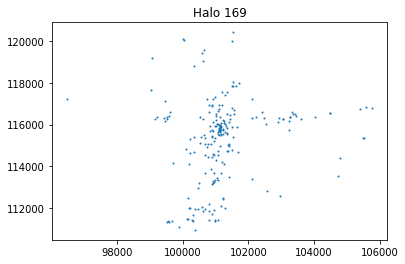

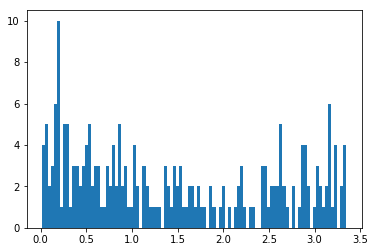

galaxies [4, 1, 3, 1, 6, 10, 2, 9, 4, 8, 11, 7, 12, 15, 11, 13, 14, 13, 23, 39]
blue galaxies counted [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 4, 8, 6, 13, 9, 12, 14, 36]
red galaxies counted [3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2]
red galaxies counted [1, 1, 1, 1, 4, 9, 2, 8, 3, 8, 9, 6, 6, 7, 3, 0, 4, 1, 7, 1]
sum of galaxies: 206

Halo: 170
Halo Mass: 7408.359
N Subhalos from Illustris Algorithm: 469 249.92722606658936
R500c, R200c, R200m: 0.36710967399808797 0.5581658862600092 0.6876218087670856
before dev loop: 249.95743203163147
True
566208 566208 time 250.0078728199005
N Subhalos within 5*R200m: 241 250.06073784828186


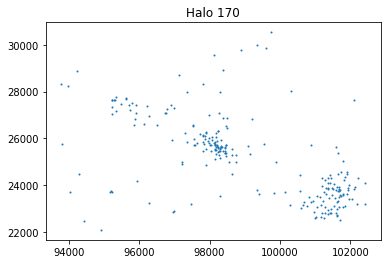

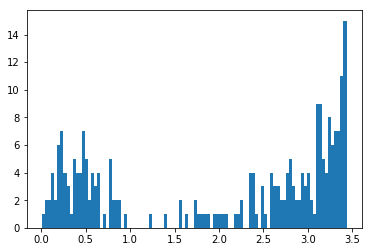

galaxies [1, 1, 1, 3, 3, 7, 5, 8, 6, 13, 12, 8, 9, 3, 1, 2, 8, 9, 37, 101]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 5, 1, 1, 4, 5, 5, 1, 1, 2, 7, 7, 31, 38]
red galaxies counted [0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]
red galaxies counted [1, 1, 0, 2, 2, 6, 4, 2, 4, 10, 8, 3, 4, 2, 0, 0, 1, 2, 6, 58]
sum of galaxies: 238

Halo: 171
Halo Mass: 7560.329
N Subhalos from Illustris Algorithm: 603 250.71857905387878
R500c, R200c, R200m: 0.35118420943637946 0.5478741898031925 0.6800677081317096
before dev loop: 250.73638200759888
True
566208 566208 time 250.7953119277954
N Subhalos within 5*R200m: 210 250.85680603981018


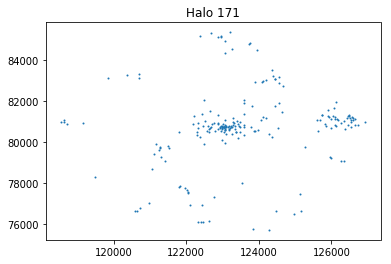

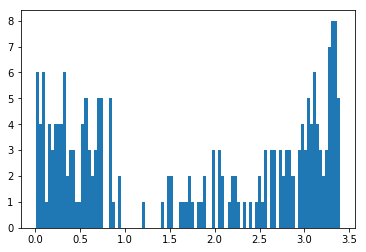

galaxies [5, 3, 0, 2, 3, 3, 6, 9, 6, 6, 10, 13, 10, 3, 1, 5, 9, 15, 21, 72]
blue galaxies counted [1, 0, 0, 0, 0, 0, 2, 3, 3, 2, 4, 5, 4, 1, 1, 5, 6, 11, 16, 46]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4]
red galaxies counted [4, 3, 0, 2, 3, 2, 2, 3, 3, 4, 5, 8, 6, 2, 0, 0, 3, 3, 5, 22]
sum of galaxies: 202

Halo: 172
Halo Mass: 7533.9155
N Subhalos from Illustris Algorithm: 665 251.606595993042
R500c, R200c, R200m: 0.32497323374059606 0.5160921199361899 0.6534526847351336
before dev loop: 251.63440608978271
True
566208 566208 time 251.68154621124268
N Subhalos within 5*R200m: 187 251.7390480041504


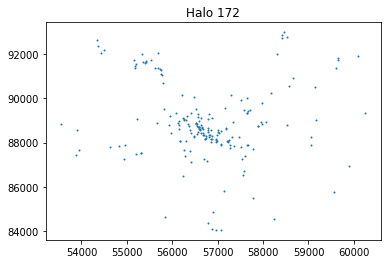

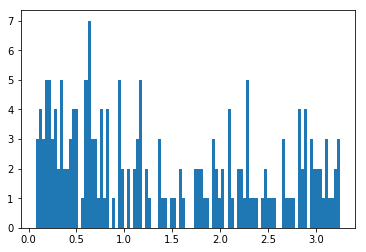

galaxies [1, 0, 2, 5, 2, 7, 6, 5, 7, 6, 8, 16, 12, 9, 13, 8, 8, 19, 20, 33]
blue galaxies counted [0, 0, 0, 2, 0, 0, 3, 2, 1, 4, 3, 6, 9, 6, 9, 8, 7, 19, 17, 31]
red galaxies counted [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 2, 1]
red galaxies counted [0, 0, 2, 3, 1, 6, 3, 3, 6, 2, 4, 7, 3, 3, 4, 0, 0, 0, 1, 1]
sum of galaxies: 187

Halo: 173
Halo Mass: 7502.3345
N Subhalos from Illustris Algorithm: 778 252.393413066864
R500c, R200c, R200m: 0.3020896414043336 0.49563915926522983 0.6211914425192795
before dev loop: 252.42614912986755
True
566208 566208 time 252.47371196746826
N Subhalos within 5*R200m: 207 252.53910994529724


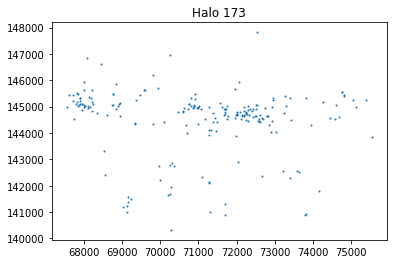

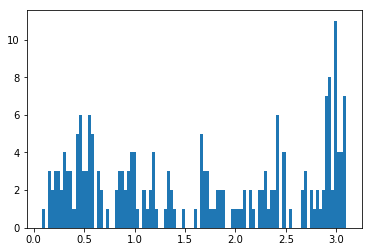

galaxies [0, 1, 0, 0, 0, 5, 4, 4, 7, 7, 14, 13, 4, 13, 14, 12, 13, 13, 27, 56]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 7, 5, 2, 10, 5, 9, 10, 10, 24, 31]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 3, 0, 1, 0, 2, 1]
red galaxies counted [0, 1, 0, 0, 0, 1, 3, 3, 1, 5, 7, 7, 2, 2, 6, 3, 2, 3, 1, 24]
sum of galaxies: 207

Halo: 174
Halo Mass: 7402.9487
N Subhalos from Illustris Algorithm: 673 253.44109511375427
R500c, R200c, R200m: 0.3185681618949594 0.4925385710729112 0.6168368552056408
before dev loop: 253.50599217414856
True
566208 566208 time 253.58365297317505
N Subhalos within 5*R200m: 462 253.69801115989685


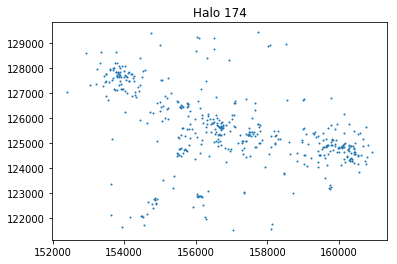

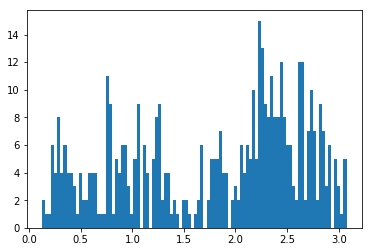

galaxies [0, 0, 0, 1, 1, 2, 6, 10, 10, 10, 10, 12, 17, 30, 28, 34, 16, 47, 129, 99]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 4, 5, 13, 19, 19, 27, 14, 17, 32, 43]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 11, 10]
red galaxies counted [0, 0, 0, 1, 1, 1, 4, 10, 8, 9, 5, 6, 4, 9, 9, 6, 0, 28, 86, 46]
sum of galaxies: 462

Halo: 175
Halo Mass: 7307.713
N Subhalos from Illustris Algorithm: 570 254.68578124046326
R500c, R200c, R200m: 0.3377961284046414 0.5293714673979153 0.6589734355837126
before dev loop: 254.72262811660767
True
566208 566208 time 254.77751111984253
N Subhalos within 5*R200m: 194 254.8735580444336


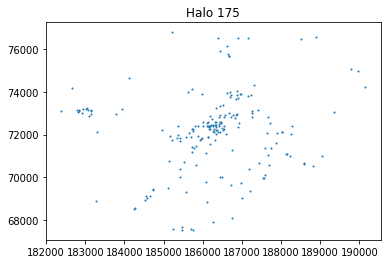

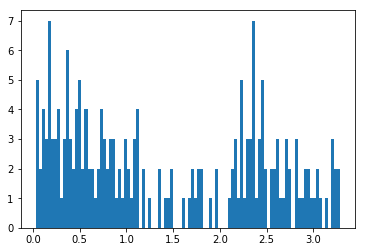

galaxies [0, 2, 4, 2, 5, 5, 4, 5, 7, 8, 13, 6, 14, 10, 12, 7, 9, 14, 36, 26]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 4, 4, 5, 3, 5, 7, 11, 6, 9, 11, 32, 26]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 2, 4, 1, 5, 4, 3, 4, 2, 4, 7, 3, 9, 2, 1, 1, 0, 2, 2, 0]
sum of galaxies: 189

Halo: 176
Halo Mass: 7368.7236
N Subhalos from Illustris Algorithm: 581 255.61026191711426
R500c, R200c, R200m: 0.2980130733384683 0.4573430437758696 0.5743658670549934
before dev loop: 255.6297800540924
True
566208 566208 time 255.71460604667664
N Subhalos within 5*R200m: 219 255.84502005577087


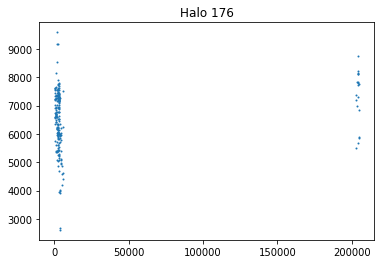

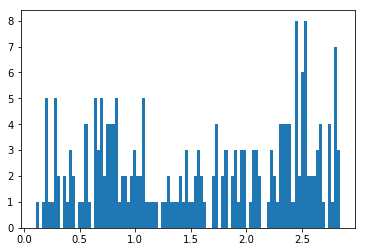

galaxies [0, 0, 0, 1, 0, 1, 5, 3, 6, 3, 5, 7, 14, 20, 15, 12, 15, 20, 32, 60]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 4, 5, 9, 10, 9, 13, 18, 22, 36]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2]
red galaxies counted [0, 0, 0, 0, 0, 1, 4, 1, 4, 2, 3, 3, 7, 10, 5, 1, 2, 2, 8, 22]
sum of galaxies: 219

Halo: 177
Halo Mass: 7628.1685
N Subhalos from Illustris Algorithm: 820 256.54452204704285
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
before dev loop: 256.5641450881958
True
566208 566208 time 256.6225781440735
N Subhalos within 5*R200m: 174 256.7195129394531


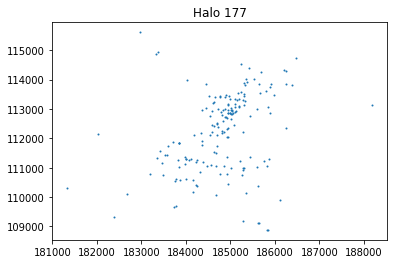

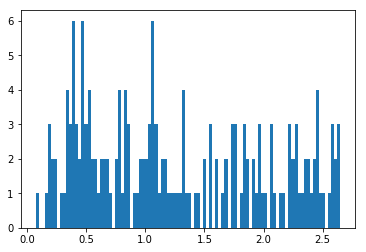

galaxies [0, 1, 0, 0, 0, 1, 4, 3, 1, 7, 11, 14, 9, 10, 13, 21, 11, 16, 20, 32]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 3, 1, 3, 3, 4, 3, 8, 8, 14, 11, 14, 15, 26]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 4, 1]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 4, 6, 9, 6, 2, 4, 4, 0, 2, 1, 5]
sum of galaxies: 174

Halo: 178
Halo Mass: 7203.893
N Subhalos from Illustris Algorithm: 573 257.61697602272034
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
before dev loop: 257.6442348957062
True
566208 566208 time 257.69273805618286
N Subhalos within 5*R200m: 227 257.8641571998596


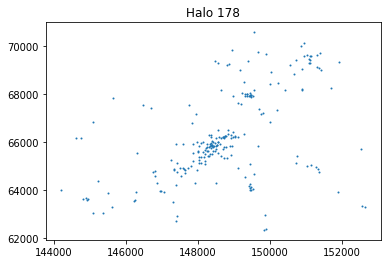

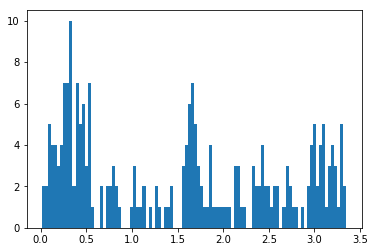

galaxies [1, 1, 5, 2, 4, 4, 6, 14, 11, 16, 12, 2, 10, 4, 7, 5, 33, 17, 27, 43]
blue galaxies counted [0, 0, 1, 0, 0, 3, 0, 5, 3, 4, 4, 1, 10, 4, 7, 4, 25, 14, 22, 40]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0]
red galaxies counted [1, 1, 4, 2, 3, 0, 5, 9, 7, 12, 8, 1, 0, 0, 0, 1, 6, 0, 3, 3]
sum of galaxies: 224

Halo: 179
Halo Mass: 7369.969
N Subhalos from Illustris Algorithm: 663 258.530385017395
R500c, R200c, R200m: 0.36381283692498806 0.5530233809082931 0.671854480288422
before dev loop: 258.5618460178375
True
566208 566208 time 258.611487865448
N Subhalos within 5*R200m: 200 258.7651250362396


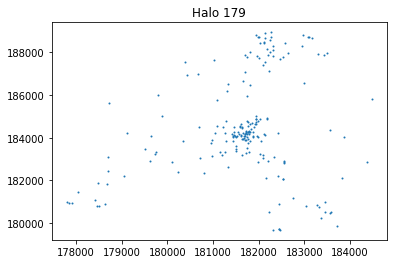

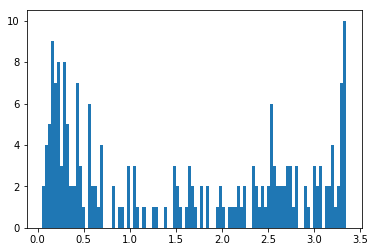

galaxies [0, 1, 5, 3, 9, 7, 8, 13, 7, 9, 8, 9, 2, 5, 6, 7, 12, 12, 32, 43]
blue galaxies counted [0, 1, 1, 2, 3, 6, 5, 4, 4, 5, 6, 4, 2, 3, 5, 7, 9, 12, 21, 26]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 4, 2]
red galaxies counted [0, 0, 4, 1, 5, 1, 2, 8, 3, 3, 2, 5, 0, 1, 0, 0, 2, 0, 7, 15]
sum of galaxies: 198

Halo: 180
Halo Mass: 7179.918
N Subhalos from Illustris Algorithm: 588 259.39519906044006
R500c, R200c, R200m: 0.3469176178469262 0.5528558367291683 0.6783286916316329
before dev loop: 259.423789024353
True
566208 566208 time 259.481547832489
N Subhalos within 5*R200m: 194 259.6371920108795


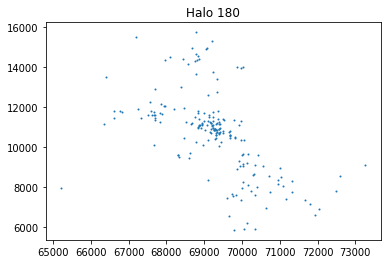

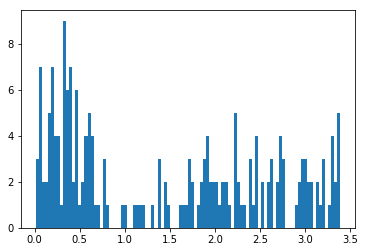

galaxies [4, 0, 2, 2, 4, 8, 6, 5, 17, 11, 7, 10, 5, 2, 4, 7, 11, 26, 26, 31]
blue galaxies counted [0, 0, 1, 2, 1, 1, 3, 1, 3, 7, 3, 7, 3, 2, 4, 3, 10, 24, 22, 31]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0]
red galaxies counted [4, 0, 1, 0, 3, 7, 3, 3, 13, 4, 4, 3, 2, 0, 0, 2, 0, 1, 4, 0]
sum of galaxies: 188

Halo: 181
Halo Mass: 7203.806
N Subhalos from Illustris Algorithm: 487 260.28143310546875
R500c, R200c, R200m: 0.3417345175614866 0.5128303930769711 0.6381983977512092
before dev loop: 260.29930210113525
True
566208 566208 time 260.35563611984253
N Subhalos within 5*R200m: 162 260.4580099582672


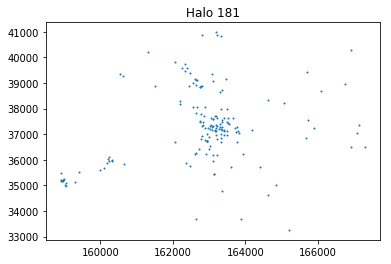

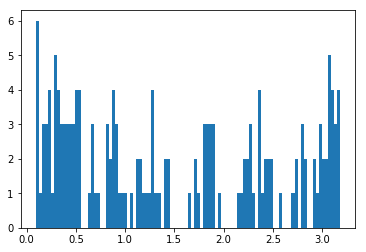

galaxies [0, 1, 3, 2, 2, 5, 4, 6, 7, 9, 10, 3, 5, 13, 7, 12, 4, 14, 21, 34]
blue galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 0, 2, 7, 6, 11, 4, 12, 19, 27]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 3]
red galaxies counted [0, 1, 2, 2, 2, 3, 2, 4, 5, 5, 7, 2, 3, 5, 1, 1, 0, 1, 2, 4]
sum of galaxies: 162

Halo: 182
Halo Mass: 7302.4766
N Subhalos from Illustris Algorithm: 604 261.1091799736023
R500c, R200c, R200m: 0.3087313568922179 0.5232440745072151 0.6722466577743732
before dev loop: 261.1284351348877
True
566208 566208 time 261.1946310997009
N Subhalos within 5*R200m: 208 261.3178551197052


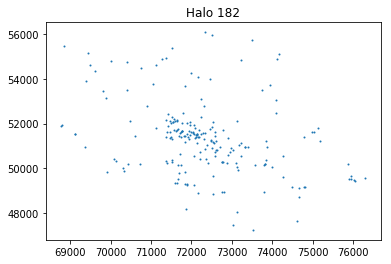

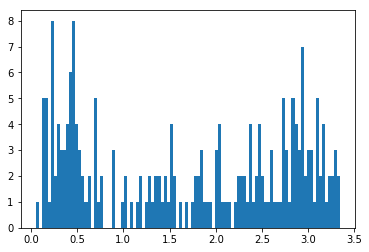

galaxies [0, 0, 0, 5, 5, 1, 10, 5, 5, 17, 10, 7, 4, 6, 5, 15, 13, 15, 33, 51]
blue galaxies counted [0, 0, 0, 1, 2, 0, 3, 2, 2, 7, 4, 4, 3, 6, 4, 13, 10, 15, 28, 42]
red galaxies counted [0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 4]
red galaxies counted [0, 0, 0, 2, 3, 1, 6, 3, 3, 9, 5, 2, 1, 0, 1, 2, 2, 0, 4, 5]
sum of galaxies: 207

Halo: 183
Halo Mass: 7346.276
N Subhalos from Illustris Algorithm: 734 262.0886719226837
R500c, R200c, R200m: 0.2908996118924678 0.4576553525312704 0.5979563276824663
before dev loop: 262.11640787124634
True
566208 566208 time 262.16834902763367
N Subhalos within 5*R200m: 174 262.25184082984924


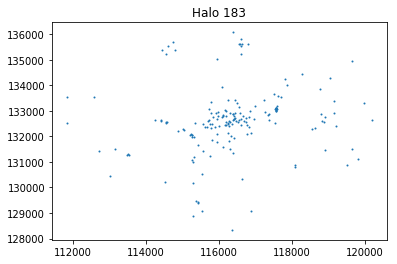

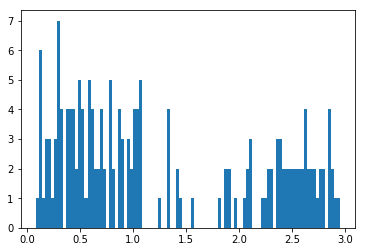

galaxies [0, 1, 0, 3, 4, 3, 4, 3, 11, 8, 11, 14, 10, 14, 18, 5, 4, 6, 22, 33]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 5, 6, 7, 10, 12, 5, 2, 6, 18, 30]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2]
red galaxies counted [0, 1, 0, 2, 2, 3, 4, 2, 8, 6, 6, 8, 3, 2, 5, 0, 1, 0, 3, 1]
sum of galaxies: 174

Halo: 184
Halo Mass: 7020.075
N Subhalos from Illustris Algorithm: 474 262.90414905548096
R500c, R200c, R200m: 0.37536689970346826 0.5554507097313546 0.6736600340467317
before dev loop: 262.93816113471985
True
566208 566208 time 262.98644280433655
N Subhalos within 5*R200m: 318 263.1663279533386


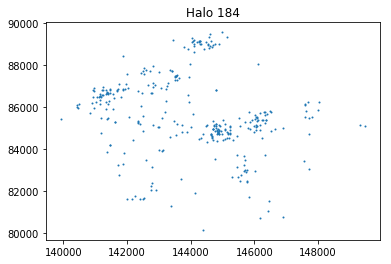

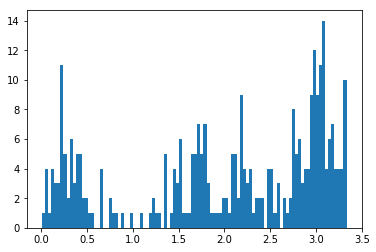

galaxies [0, 0, 2, 3, 4, 4, 10, 7, 12, 8, 4, 4, 4, 2, 5, 20, 36, 37, 35, 116]
blue galaxies counted [0, 0, 0, 0, 0, 0, 4, 3, 7, 4, 3, 3, 4, 2, 3, 12, 25, 33, 24, 57]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 2, 0, 2, 11]
red galaxies counted [0, 0, 1, 3, 4, 3, 6, 4, 4, 4, 1, 1, 0, 0, 2, 4, 9, 4, 9, 48]
sum of galaxies: 313

Halo: 185
Halo Mass: 6979.129
N Subhalos from Illustris Algorithm: 514 263.8170540332794
R500c, R200c, R200m: 0.3445578271433828 0.5305235788404128 0.6600431561252211
before dev loop: 263.83623790740967
True
566208 566208 time 263.89531111717224
N Subhalos within 5*R200m: 181 263.9880049228668


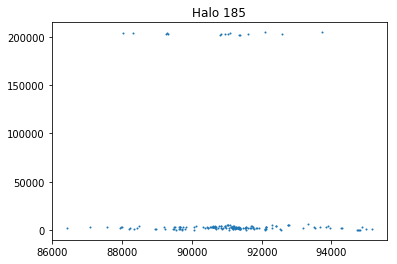

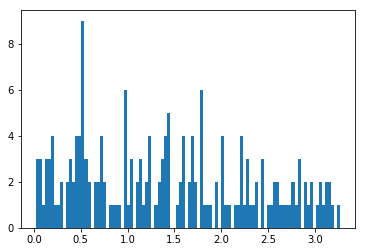

galaxies [1, 1, 0, 2, 3, 5, 1, 3, 2, 9, 15, 7, 7, 10, 15, 15, 22, 16, 20, 22]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 4, 1, 2, 7, 10, 12, 14, 15, 17, 19]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2]
red galaxies counted [0, 1, 0, 2, 3, 3, 0, 3, 1, 7, 10, 6, 5, 3, 4, 2, 7, 1, 2, 1]
sum of galaxies: 176

Halo: 186
Halo Mass: 6984.59
N Subhalos from Illustris Algorithm: 589 264.6061611175537
R500c, R200c, R200m: 0.33778992306467387 0.5325925192545079 0.6697879419414111
before dev loop: 264.62804794311523
True
566208 566208 time 264.68397998809814
N Subhalos within 5*R200m: 230 264.8201460838318


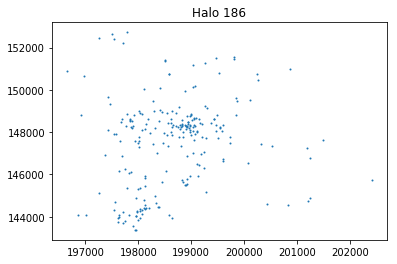

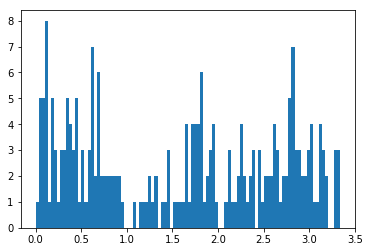

galaxies [4, 1, 6, 2, 2, 5, 3, 6, 6, 11, 5, 18, 9, 6, 6, 9, 27, 20, 32, 46]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 9, 1, 2, 6, 8, 10, 12, 23, 40]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 5, 3, 2, 2]
red galaxies counted [3, 1, 4, 2, 1, 5, 2, 6, 2, 10, 5, 7, 7, 4, 0, 0, 12, 5, 7, 4]
sum of galaxies: 224

Halo: 187
Halo Mass: 7009.949
N Subhalos from Illustris Algorithm: 639 265.4887251853943
R500c, R200c, R200m: 0.35690369130172667 0.5465254691698511 0.6743829761701808
before dev loop: 265.50572419166565
True
566208 566208 time 265.57650899887085
N Subhalos within 5*R200m: 199 265.69308710098267


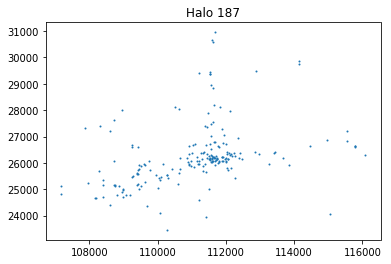

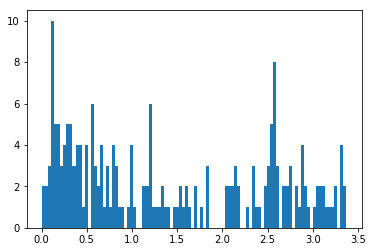

galaxies [4, 0, 4, 9, 4, 4, 6, 10, 5, 8, 10, 10, 11, 8, 12, 9, 10, 12, 33, 28]
blue galaxies counted [0, 0, 0, 2, 2, 1, 1, 5, 3, 7, 8, 3, 7, 8, 8, 8, 10, 11, 27, 26]
red galaxies counted [0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1]
red galaxies counted [4, 0, 4, 5, 1, 3, 5, 4, 2, 1, 1, 6, 4, 0, 3, 0, 0, 1, 4, 1]
sum of galaxies: 197

Halo: 188
Halo Mass: 7141.079
N Subhalos from Illustris Algorithm: 649 266.4088261127472
R500c, R200c, R200m: 0.3429480818868889 0.5280316344127856 0.6601256671295643
before dev loop: 266.46946907043457
True
566208 566208 time 266.54922890663147
N Subhalos within 5*R200m: 234 266.69309997558594


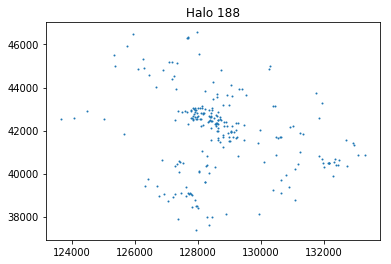

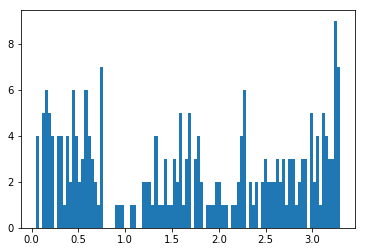

galaxies [0, 0, 0, 5, 6, 5, 4, 5, 4, 12, 9, 15, 8, 3, 6, 14, 28, 14, 33, 59]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 2, 0, 4, 2, 5, 5, 3, 6, 11, 19, 12, 26, 50]
red galaxies counted [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 1, 3, 3]
red galaxies counted [0, 0, 0, 2, 6, 3, 3, 3, 4, 8, 4, 10, 3, 0, 0, 2, 7, 1, 4, 6]
sum of galaxies: 230

Halo: 189
Halo Mass: 6939.0034
N Subhalos from Illustris Algorithm: 551 267.8419089317322
R500c, R200c, R200m: 0.3542306710504002 0.5429497120738211 0.6699731012791534
before dev loop: 267.8872389793396
True
566208 566208 time 267.94414806365967
N Subhalos within 5*R200m: 149 268.09590315818787


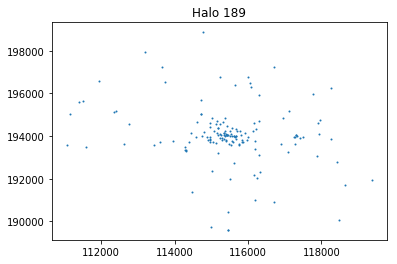

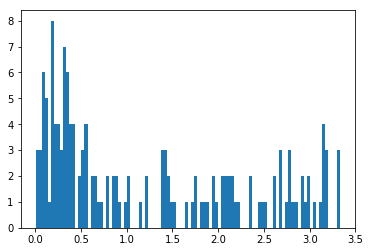

galaxies [3, 3, 2, 4, 3, 7, 6, 6, 13, 6, 9, 5, 3, 8, 3, 10, 5, 15, 11, 22]
blue galaxies counted [1, 0, 1, 1, 2, 2, 2, 3, 7, 2, 4, 4, 0, 6, 3, 6, 5, 12, 11, 21]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1]
red galaxies counted [2, 3, 1, 3, 1, 4, 4, 3, 6, 4, 5, 1, 3, 1, 0, 2, 0, 1, 0, 0]
sum of galaxies: 144

Halo: 190
Halo Mass: 7046.362
N Subhalos from Illustris Algorithm: 669 268.8618290424347
R500c, R200c, R200m: 0.2690153194976947 0.45795633153692383 0.5738119503853708
before dev loop: 268.87527322769165
True
566208 566208 time 268.9461889266968
N Subhalos within 5*R200m: 158 269.23250699043274


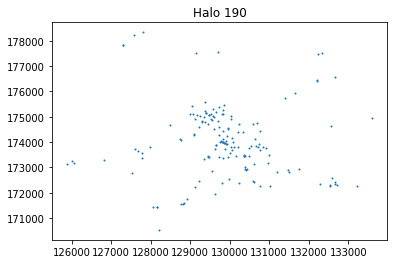

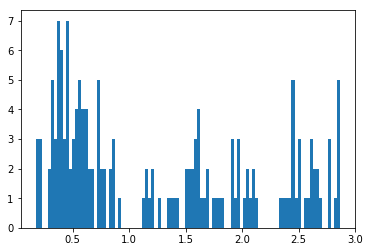

galaxies [0, 0, 0, 0, 0, 1, 5, 0, 7, 12, 16, 16, 11, 11, 1, 7, 13, 16, 11, 31]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 9, 6, 6, 8, 0, 6, 13, 15, 10, 23]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 5]
red galaxies counted [0, 0, 0, 0, 0, 1, 4, 0, 4, 9, 6, 10, 5, 3, 1, 1, 0, 1, 0, 3]
sum of galaxies: 158

Halo: 191
Halo Mass: 7042.9897
N Subhalos from Illustris Algorithm: 570 269.9611999988556
R500c, R200c, R200m: 0.33705493057135216 0.5325804688846353 0.6522088943989216
before dev loop: 269.9867408275604
True
566208 566208 time 270.04748797416687
N Subhalos within 5*R200m: 165 270.21217918395996


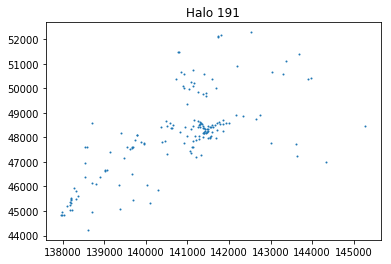

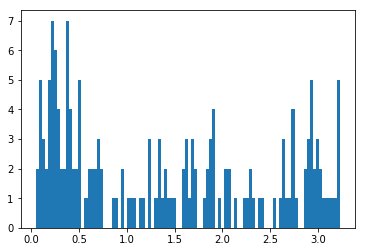

galaxies [0, 3, 3, 2, 2, 7, 7, 10, 6, 9, 7, 6, 6, 4, 5, 12, 12, 16, 13, 33]
blue galaxies counted [0, 2, 1, 0, 0, 2, 2, 4, 5, 6, 3, 5, 2, 4, 3, 8, 9, 15, 11, 17]
red galaxies counted [0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 3]
red galaxies counted [0, 1, 1, 1, 2, 2, 5, 6, 1, 3, 2, 1, 4, 0, 1, 3, 2, 1, 0, 13]
sum of galaxies: 163

Halo: 192
Halo Mass: 6880.6846
N Subhalos from Illustris Algorithm: 510 270.95883989334106
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
before dev loop: 270.97402906417847
True
566208 566208 time 271.03341603279114
N Subhalos within 5*R200m: 339 271.15951919555664


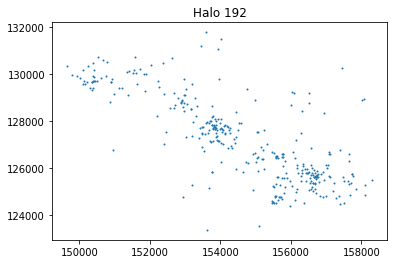

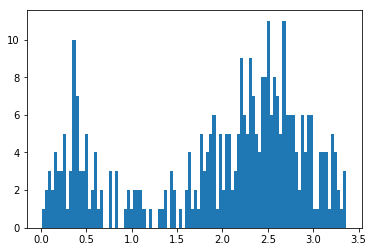

galaxies [1, 1, 4, 0, 4, 3, 6, 3, 16, 10, 8, 7, 6, 5, 7, 10, 23, 55, 107, 61]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 2, 3, 1, 7, 8, 19, 33, 46, 41]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 11, 0]
red galaxies counted [1, 0, 4, 0, 3, 3, 5, 2, 12, 6, 7, 5, 3, 3, 0, 2, 3, 22, 50, 20]
sum of galaxies: 337

Halo: 193
Halo Mass: 7080.1284
N Subhalos from Illustris Algorithm: 633 271.802855014801
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
before dev loop: 271.83115315437317
True
566208 566208 time 271.8819770812988
N Subhalos within 5*R200m: 150 271.99158000946045


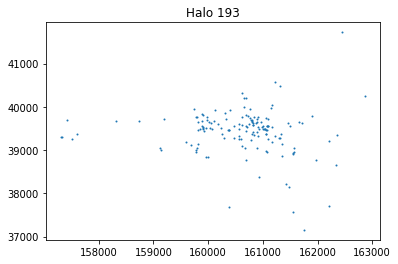

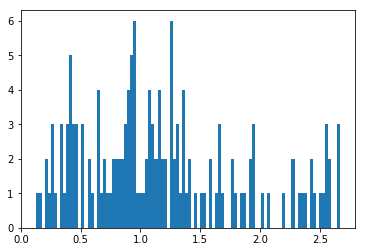

galaxies [0, 0, 0, 0, 1, 1, 0, 3, 4, 4, 11, 6, 8, 10, 22, 20, 20, 12, 10, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 3, 4, 5, 8, 11, 6, 6, 10, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 4]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 6, 3, 4, 5, 13, 8, 13, 5, 0, 0]
sum of galaxies: 150

Halo: 194
Halo Mass: 6876.453
N Subhalos from Illustris Algorithm: 499 272.722678899765
R500c, R200c, R200m: 0.34884171361584243 0.5340309971278965 0.6646728601889065
before dev loop: 272.74742794036865
True
566208 566208 time 272.80668210983276
N Subhalos within 5*R200m: 184 272.9144868850708


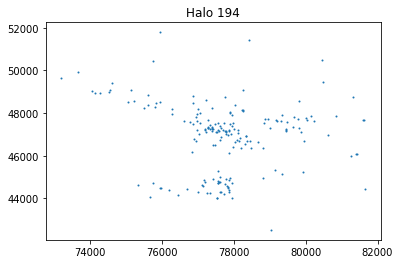

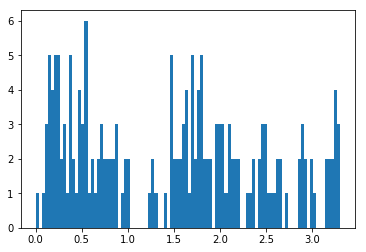

galaxies [0, 1, 3, 2, 3, 6, 8, 5, 3, 6, 14, 5, 10, 9, 1, 11, 30, 23, 20, 23]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 0, 3, 2, 4, 2, 3, 7, 1, 10, 17, 16, 18, 22]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 5, 0, 2, 1]
red galaxies counted [0, 1, 3, 1, 3, 5, 5, 5, 0, 4, 8, 2, 7, 2, 0, 1, 8, 7, 0, 0]
sum of galaxies: 183

Halo: 195
Halo Mass: 6984.233
N Subhalos from Illustris Algorithm: 554 273.54539608955383
R500c, R200c, R200m: 0.31986581858553526 0.5364848687922387 0.6667599762439389
before dev loop: 273.5758550167084
True
566208 566208 time 273.6215169429779
N Subhalos within 5*R200m: 237 273.7807950973511


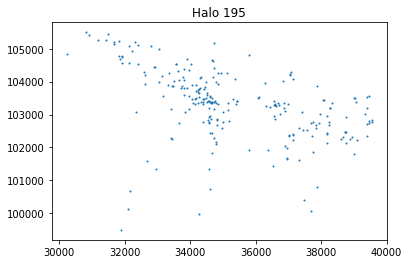

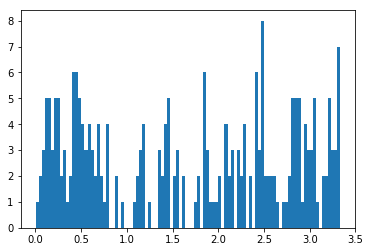

galaxies [2, 1, 3, 6, 2, 7, 5, 5, 3, 15, 10, 10, 10, 3, 10, 16, 10, 27, 33, 57]
blue galaxies counted [0, 0, 0, 0, 0, 4, 1, 0, 0, 4, 3, 4, 5, 3, 9, 7, 9, 23, 30, 48]
red galaxies counted [1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 1, 2, 3]
red galaxies counted [1, 1, 3, 6, 1, 3, 3, 5, 3, 8, 7, 5, 5, 0, 1, 7, 1, 3, 1, 6]
sum of galaxies: 235

Halo: 196
Halo Mass: 6886.1846
N Subhalos from Illustris Algorithm: 545 274.444650888443
R500c, R200c, R200m: 0.34478286079472337 0.5249554272013718 0.6443699486418077
before dev loop: 274.4742691516876
True
566208 566208 time 274.5237741470337
N Subhalos within 5*R200m: 204 274.63310408592224


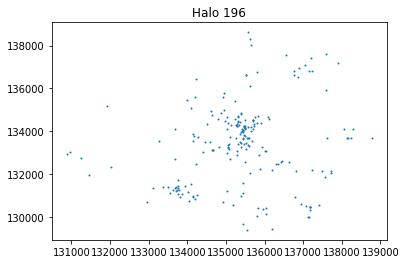

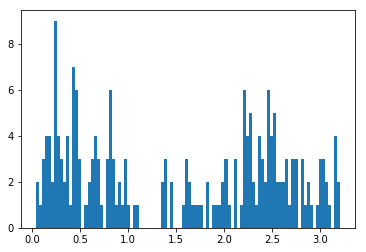

galaxies [1, 1, 1, 3, 3, 4, 4, 13, 6, 9, 10, 9, 11, 12, 3, 7, 10, 14, 49, 33]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 4, 1, 3, 5, 3, 3, 7, 2, 7, 10, 13, 35, 28]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 4, 2]
red galaxies counted [1, 1, 1, 3, 2, 4, 1, 9, 5, 5, 5, 6, 7, 4, 1, 0, 0, 1, 10, 3]
sum of galaxies: 203

Halo: 197
Halo Mass: 6973.242
N Subhalos from Illustris Algorithm: 590 275.2776050567627
R500c, R200c, R200m: 0.277548582745504 0.4419752991566669 0.5548961525105097
before dev loop: 275.2989909648895
True
566208 566208 time 275.35705304145813
N Subhalos within 5*R200m: 187 275.4373269081116


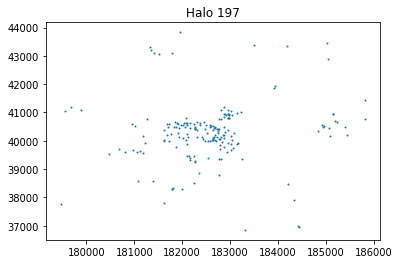

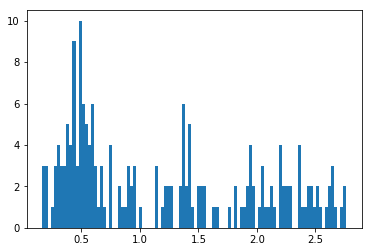

galaxies [0, 0, 0, 0, 0, 2, 4, 1, 7, 9, 19, 24, 14, 7, 10, 10, 20, 8, 27, 25]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 11, 12, 5, 4, 8, 7, 13, 7, 20, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 4, 8, 7, 12, 8, 2, 2, 2, 7, 0, 5, 1]
sum of galaxies: 187

Halo: 198
Halo Mass: 6816.1245
N Subhalos from Illustris Algorithm: 649 276.1165180206299
R500c, R200c, R200m: 0.30509052379543117 0.47337952387132076 0.5920286266353681
before dev loop: 276.1442000865936
True
566208 566208 time 276.2073152065277
N Subhalos within 5*R200m: 152 276.2988021373749


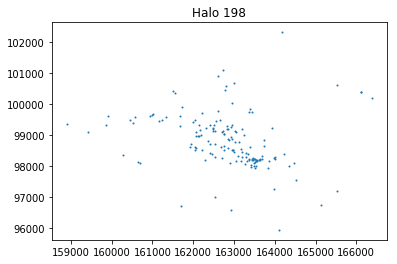

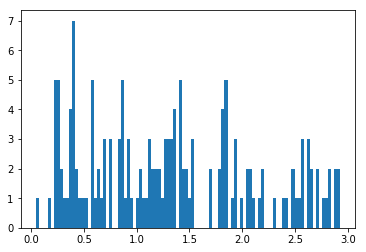

galaxies [0, 0, 0, 0, 0, 1, 1, 9, 3, 12, 4, 7, 8, 12, 7, 20, 16, 18, 11, 22]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 1, 1, 3, 7, 3, 11, 9, 11, 9, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 4, 2, 7, 2, 5, 4, 3, 4, 7, 7, 5, 1, 5]
sum of galaxies: 151

Halo: 199
Halo Mass: 6767.573
N Subhalos from Illustris Algorithm: 484 276.97564792633057
R500c, R200c, R200m: 0.34064257789944896 0.5200134944511885 0.646977112220575
before dev loop: 277.00113701820374
True
566208 566208 time 277.0506799221039
N Subhalos within 5*R200m: 158 277.108206987381


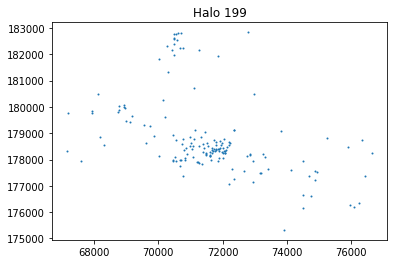

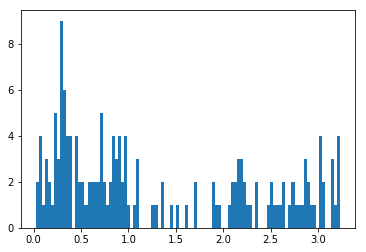

galaxies [2, 2, 1, 0, 4, 2, 6, 10, 10, 8, 6, 6, 12, 18, 4, 5, 4, 13, 16, 27]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 3, 8, 3, 4, 4, 12, 14, 23]
red galaxies counted [2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 3, 0, 1, 0, 1, 0, 1]
red galaxies counted [0, 2, 1, 0, 4, 2, 5, 6, 10, 6, 6, 2, 9, 7, 1, 0, 0, 0, 2, 3]
sum of galaxies: 156

Halo: 200
Halo Mass: 6673.2583
N Subhalos from Illustris Algorithm: 570 277.84590101242065
R500c, R200c, R200m: 0.3264750461161054 0.5364035187869862 0.6664983511040152
before dev loop: 277.8738360404968
True
566208 566208 time 277.9317331314087
N Subhalos within 5*R200m: 333 278.0166480541229


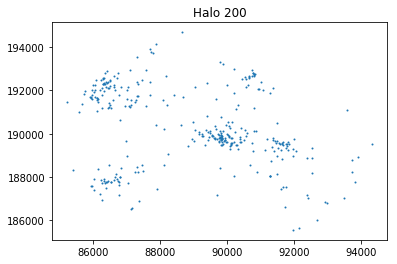

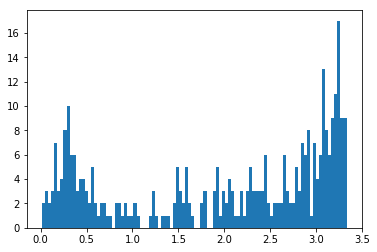

galaxies [1, 0, 2, 3, 7, 3, 4, 18, 12, 11, 10, 6, 5, 8, 6, 13, 16, 28, 45, 131]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 5, 6, 3, 5, 2, 4, 4, 6, 10, 10, 18, 23, 52]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 4, 1, 12]
red galaxies counted [1, 0, 1, 2, 7, 3, 1, 11, 6, 7, 5, 4, 1, 3, 0, 2, 5, 6, 21, 67]
sum of galaxies: 329

Halo: 201
Halo Mass: 7024.1543
N Subhalos from Illustris Algorithm: 670 278.7270529270172
R500c, R200c, R200m: 0.28051935922914595 0.4361574926786721 0.5500778461462612
before dev loop: 278.74957513809204
True
566208 566208 time 278.8096389770508
N Subhalos within 5*R200m: 184 278.889790058136


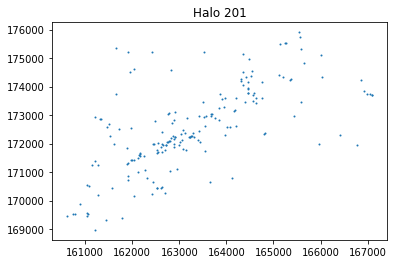

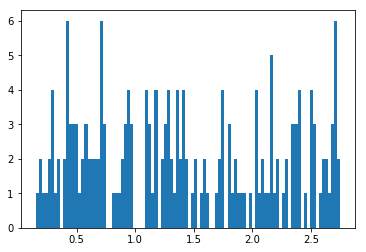

galaxies [0, 0, 0, 0, 0, 2, 1, 2, 6, 3, 12, 9, 10, 11, 13, 16, 23, 16, 23, 37]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 1, 6, 4, 7, 5, 8, 10, 17, 15, 18, 26]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 4]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 4, 5, 3, 5, 3, 4, 6, 1, 4, 7]
sum of galaxies: 184

Halo: 202
Halo Mass: 6825.4873
N Subhalos from Illustris Algorithm: 517 279.53440713882446
R500c, R200c, R200m: 0.35244809706719626 0.5348637537515462 0.6593945179435774
before dev loop: 279.5480239391327
True
566208 566208 time 279.6076431274414
N Subhalos within 5*R200m: 238 279.71303606033325


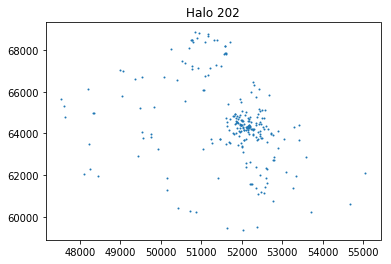

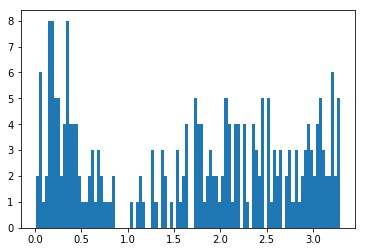

galaxies [1, 1, 2, 0, 10, 7, 7, 5, 13, 10, 4, 9, 6, 1, 5, 10, 23, 31, 34, 52]
blue galaxies counted [0, 1, 0, 0, 6, 3, 2, 2, 2, 5, 2, 4, 1, 1, 5, 8, 21, 25, 30, 39]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 3]
red galaxies counted [1, 0, 2, 0, 4, 3, 5, 3, 10, 5, 2, 3, 5, 0, 0, 2, 2, 3, 1, 10]
sum of galaxies: 231

Halo: 203
Halo Mass: 6652.271
N Subhalos from Illustris Algorithm: 496 280.37040185928345
R500c, R200c, R200m: 0.33719312949759794 0.5373048143914392 0.660456511835965
before dev loop: 280.3857219219208
True
566208 566208 time 280.44107604026794
N Subhalos within 5*R200m: 188 280.5044219493866


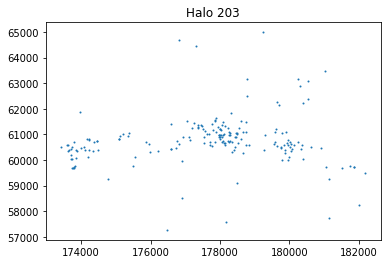

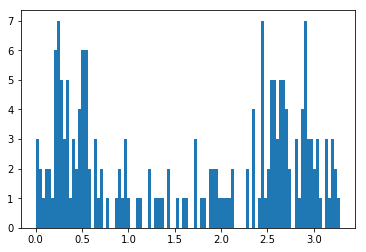

galaxies [1, 0, 1, 1, 2, 4, 9, 8, 6, 7, 15, 6, 3, 8, 3, 6, 7, 13, 41, 42]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 1, 3, 6, 2, 5, 7, 11, 24, 34]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1]
red galaxies counted [1, 0, 1, 1, 2, 4, 7, 6, 3, 4, 10, 5, 0, 1, 1, 1, 0, 2, 14, 7]
sum of galaxies: 183

Halo: 204
Halo Mass: 6706.4194
N Subhalos from Illustris Algorithm: 525 281.17369413375854
R500c, R200c, R200m: 0.321439853111377 0.4772940124606779 0.5869305595247102
before dev loop: 281.1868782043457
True
566208 566208 time 281.2476761341095
N Subhalos within 5*R200m: 124 281.3001592159271


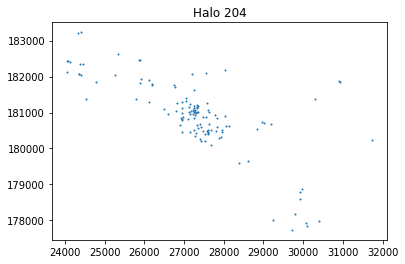

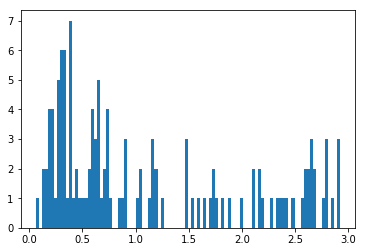

galaxies [1, 0, 0, 0, 2, 3, 7, 5, 11, 10, 5, 7, 15, 5, 4, 7, 5, 8, 9, 20]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 4, 6, 2, 2, 6, 3, 7, 9, 20]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 2, 2, 6, 5, 9, 7, 2, 3, 8, 3, 2, 1, 1, 1, 0, 0]
sum of galaxies: 124

Halo: 205
Halo Mass: 6746.761
N Subhalos from Illustris Algorithm: 603 282.04054594039917
R500c, R200c, R200m: 0.31912099763439394 0.4939144350643043 0.618203110928697
before dev loop: 282.06655716896057
True
566208 566208 time 282.12090516090393
N Subhalos within 5*R200m: 155 282.17455101013184


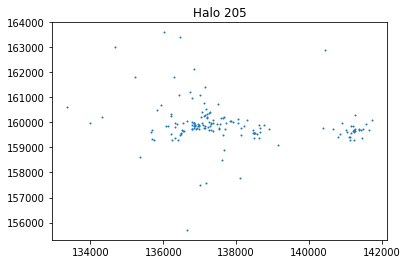

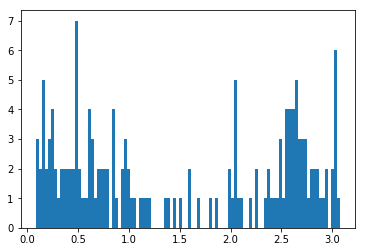

galaxies [0, 1, 2, 0, 5, 4, 5, 4, 5, 4, 11, 7, 10, 8, 9, 4, 5, 11, 14, 46]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 3, 5, 2, 7, 4, 5, 10, 10, 20]
red galaxies counted [0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 8]
red galaxies counted [0, 1, 1, 0, 2, 4, 5, 4, 2, 1, 6, 4, 5, 5, 2, 0, 0, 1, 3, 18]
sum of galaxies: 155

Halo: 206
Halo Mass: 6893.154
N Subhalos from Illustris Algorithm: 687 282.8260021209717
R500c, R200c, R200m: 0.24736909196819407 0.40411591949767034 0.5065515098221591
before dev loop: 282.8471291065216
True
566208 566208 time 282.9104800224304
N Subhalos within 5*R200m: 244 282.96458101272583


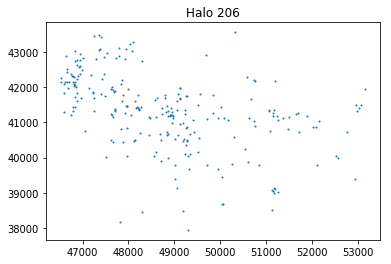

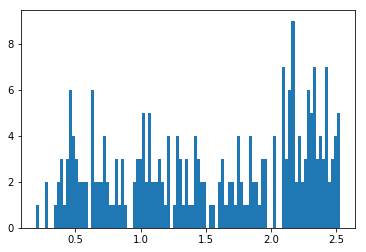

galaxies [0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 6, 18, 10, 14, 8, 27, 21, 22, 29, 85]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 6, 4, 7, 4, 16, 14, 18, 15, 39]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 2, 0, 3, 0, 1, 0, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 8, 6, 5, 4, 8, 7, 3, 14, 37]
sum of galaxies: 244

Halo: 207
Halo Mass: 6543.4116
N Subhalos from Illustris Algorithm: 488 283.59776616096497
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
before dev loop: 283.62317514419556
True
566208 566208 time 283.675833940506
N Subhalos within 5*R200m: 186 283.7623109817505


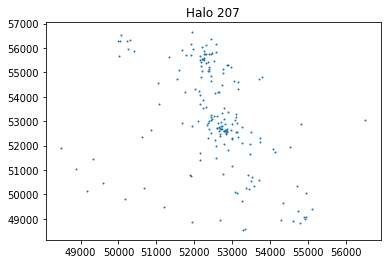

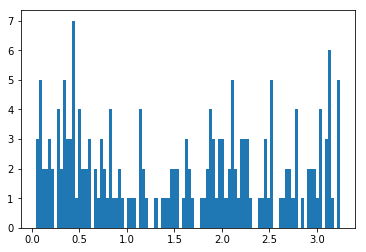

galaxies [2, 3, 1, 3, 1, 4, 1, 4, 9, 11, 7, 7, 10, 6, 10, 7, 11, 29, 22, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 2, 4, 5, 7, 7, 9, 21, 13, 25]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 2]
red galaxies counted [1, 3, 1, 1, 1, 4, 1, 2, 6, 7, 5, 4, 5, 1, 2, 0, 1, 7, 6, 9]
sum of galaxies: 184

Halo: 208
Halo Mass: 6570.345
N Subhalos from Illustris Algorithm: 476 284.4624538421631
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
before dev loop: 284.479896068573
True
566208 566208 time 284.54756116867065
N Subhalos within 5*R200m: 147 284.6063358783722


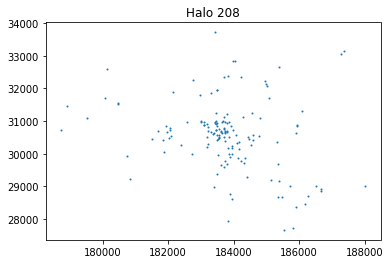

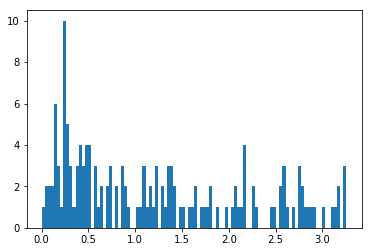

galaxies [1, 1, 1, 3, 5, 2, 9, 9, 4, 9, 8, 5, 7, 6, 12, 13, 9, 11, 12, 17]
blue galaxies counted [0, 0, 0, 2, 1, 0, 4, 3, 2, 4, 4, 3, 4, 5, 7, 13, 9, 11, 11, 16]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1]
red galaxies counted [0, 1, 0, 1, 3, 2, 5, 6, 2, 5, 4, 2, 2, 1, 3, 0, 0, 0, 0, 0]
sum of galaxies: 144

Halo: 209
Halo Mass: 6508.1846
N Subhalos from Illustris Algorithm: 523 285.27820205688477
R500c, R200c, R200m: 0.3555031660882688 0.5365006824005432 0.6607603332876681
before dev loop: 285.30643796920776
True
566208 566208 time 285.35596895217896
N Subhalos within 5*R200m: 141 285.4162290096283


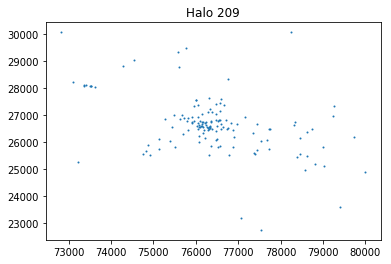

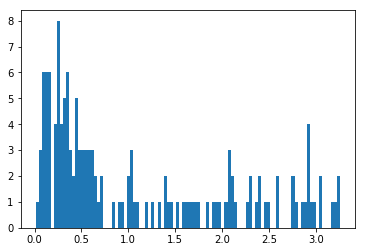

galaxies [2, 3, 3, 6, 6, 1, 8, 10, 9, 9, 10, 8, 3, 4, 6, 6, 7, 11, 10, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 3, 1, 5, 4, 6, 1, 4, 5, 5, 7, 11, 10, 17]
red galaxies counted [1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 2, 5, 4, 1, 4, 6, 8, 3, 6, 2, 2, 0, 1, 1, 0, 0, 0, 0]
sum of galaxies: 139

Halo: 210
Halo Mass: 6658.897
N Subhalos from Illustris Algorithm: 599 286.0942680835724
R500c, R200c, R200m: 0.28703044230209973 0.45941891015005754 0.5882327601255203
before dev loop: 286.1161439418793
True
566208 566208 time 286.1717212200165
N Subhalos within 5*R200m: 212 286.24378418922424


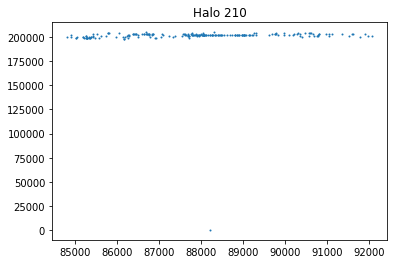

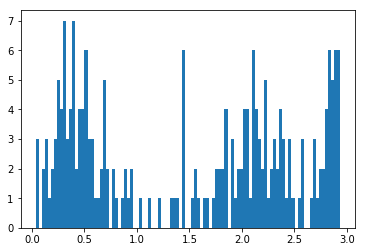

galaxies [1, 0, 0, 3, 2, 2, 2, 7, 12, 13, 10, 13, 10, 6, 4, 3, 12, 20, 45, 45]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 4, 5, 6, 7, 5, 2, 3, 2, 12, 17, 36, 28]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 3]
red galaxies counted [1, 0, 0, 2, 2, 1, 2, 4, 5, 7, 4, 5, 4, 4, 1, 0, 0, 2, 7, 14]
sum of galaxies: 210

Halo: 211
Halo Mass: 6654.555
N Subhalos from Illustris Algorithm: 593 287.03972697257996
R500c, R200c, R200m: 0.2847714783644167 0.45053278324757545 0.5769439656220414
before dev loop: 287.06582403182983
True
566208 566208 time 287.11748218536377
N Subhalos within 5*R200m: 201 287.1807289123535


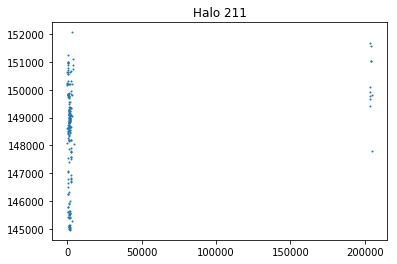

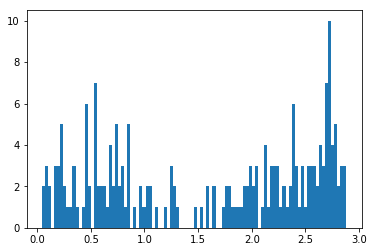

galaxies [1, 0, 3, 2, 0, 3, 6, 4, 4, 2, 9, 10, 12, 14, 8, 8, 4, 14, 30, 66]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 4, 6, 6, 7, 4, 5, 4, 13, 18, 47]
red galaxies counted [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 4, 6]
red galaxies counted [0, 0, 3, 0, 0, 2, 5, 3, 4, 1, 4, 3, 4, 5, 3, 3, 0, 0, 8, 13]
sum of galaxies: 200

Halo: 212
Halo Mass: 6530.6816
N Subhalos from Illustris Algorithm: 510 287.8394389152527
R500c, R200c, R200m: 0.3259620646730433 0.5007373865136935 0.6280111511781049
before dev loop: 287.8813679218292
True
566208 566208 time 287.9265718460083
N Subhalos within 5*R200m: 186 287.9944019317627


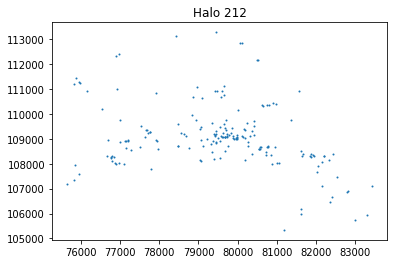

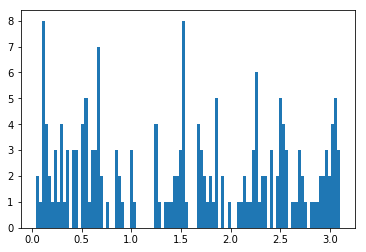

galaxies [1, 1, 4, 5, 4, 2, 2, 4, 6, 3, 10, 11, 8, 6, 4, 9, 24, 15, 34, 32]
blue galaxies counted [0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 5, 3, 6, 3, 2, 5, 17, 14, 31, 26]
red galaxies counted [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1]
red galaxies counted [0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 5, 7, 1, 3, 2, 4, 4, 1, 3, 5]
sum of galaxies: 185

Halo: 213
Halo Mass: 6392.085
N Subhalos from Illustris Algorithm: 509 288.7880620956421
R500c, R200c, R200m: 0.3236201493520517 0.5226696201640225 0.6489194636993314
before dev loop: 288.81971502304077
True
566208 566208 time 288.86802101135254
N Subhalos within 5*R200m: 190 288.9296610355377


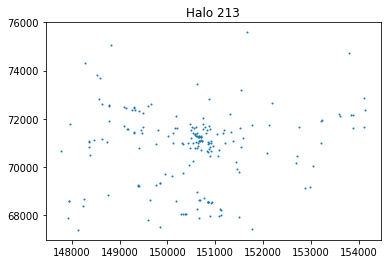

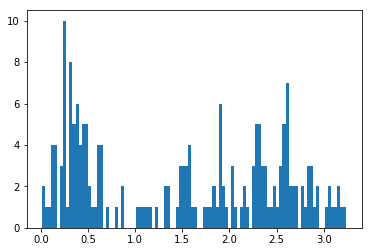

galaxies [1, 1, 0, 4, 4, 0, 12, 2, 16, 11, 9, 9, 2, 2, 5, 8, 16, 20, 41, 25]
blue galaxies counted [0, 0, 0, 1, 2, 0, 5, 0, 5, 5, 7, 3, 0, 1, 4, 7, 13, 10, 32, 22]
red galaxies counted [1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0]
red galaxies counted [0, 1, 0, 3, 2, 0, 5, 1, 9, 6, 2, 6, 2, 0, 1, 1, 3, 9, 6, 3]
sum of galaxies: 188

Halo: 214
Halo Mass: 6460.0522
N Subhalos from Illustris Algorithm: 532 289.5688102245331
R500c, R200c, R200m: 0.3344818162935038 0.5233007632904029 0.6472141562073367
before dev loop: 289.59073400497437
True
566208 566208 time 289.6458489894867
N Subhalos within 5*R200m: 179 289.6981439590454


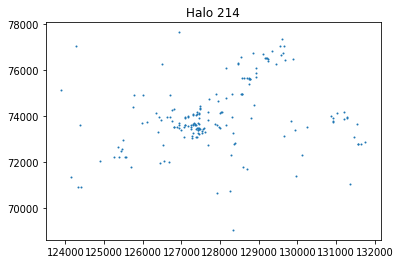

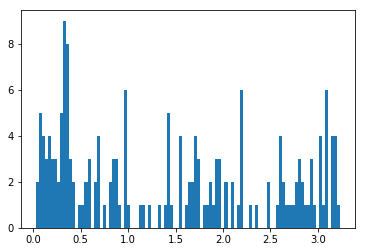

galaxies [1, 3, 4, 3, 1, 4, 5, 7, 17, 5, 3, 7, 5, 15, 3, 8, 16, 18, 15, 36]
blue galaxies counted [0, 1, 1, 1, 1, 0, 1, 1, 9, 3, 1, 4, 3, 10, 2, 8, 12, 14, 14, 27]
red galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 3]
red galaxies counted [1, 2, 2, 2, 0, 2, 4, 5, 6, 2, 2, 3, 1, 5, 0, 0, 2, 3, 0, 6]
sum of galaxies: 176

Halo: 215
Halo Mass: 6548.455
N Subhalos from Illustris Algorithm: 502 290.3457000255585
R500c, R200c, R200m: 0.3102551281643222 0.4878854468551546 0.6428702981266742
before dev loop: 290.36279582977295
True
566208 566208 time 290.418909072876
N Subhalos within 5*R200m: 162 290.47060799598694


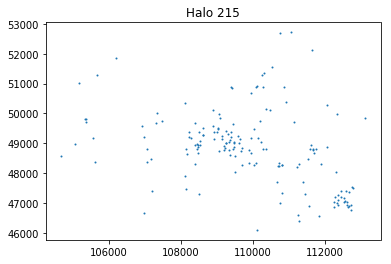

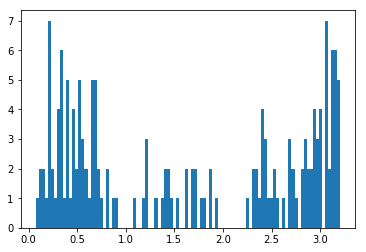

galaxies [1, 0, 1, 1, 2, 3, 7, 1, 10, 8, 11, 10, 10, 2, 3, 9, 8, 4, 19, 52]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 4, 3, 2, 7, 0, 3, 8, 8, 3, 19, 36]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2]
red galaxies counted [0, 0, 1, 1, 1, 2, 6, 1, 8, 3, 7, 7, 3, 2, 0, 1, 0, 0, 0, 14]
sum of galaxies: 162

Halo: 216
Halo Mass: 6460.399
N Subhalos from Illustris Algorithm: 578 291.21713614463806
R500c, R200c, R200m: 0.3440694869051597 0.5176669151166083 0.6262987976226632
before dev loop: 291.24709391593933
True
566208 566208 time 291.2959887981415
N Subhalos within 5*R200m: 277 291.3463490009308


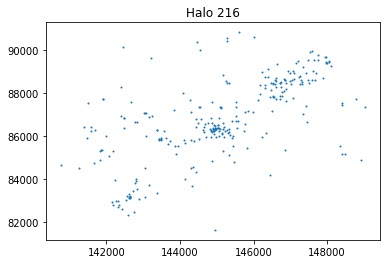

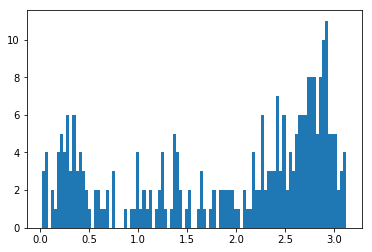

galaxies [2, 2, 0, 1, 2, 4, 6, 8, 10, 10, 3, 5, 6, 2, 11, 19, 10, 16, 50, 107]
blue galaxies counted [0, 0, 0, 0, 0, 1, 4, 2, 5, 7, 2, 3, 2, 2, 9, 18, 5, 14, 36, 44]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 10]
red galaxies counted [1, 2, 0, 1, 2, 3, 2, 5, 4, 3, 1, 2, 3, 0, 1, 1, 5, 2, 12, 53]
sum of galaxies: 274

Halo: 217
Halo Mass: 6301.3247
N Subhalos from Illustris Algorithm: 430 291.98492312431335
R500c, R200c, R200m: 0.34407853469117694 0.5281512973880313 0.6543059790323534
before dev loop: 292.0192070007324
True
566208 566208 time 292.06682419776917
N Subhalos within 5*R200m: 102 292.1210150718689


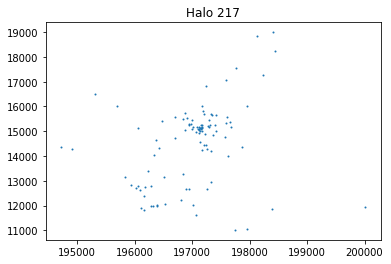

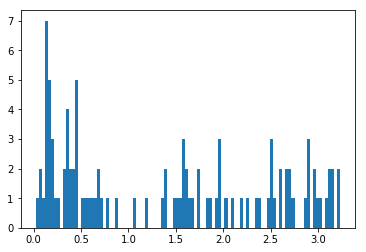

galaxies [1, 0, 1, 3, 7, 4, 2, 1, 6, 7, 3, 5, 3, 1, 2, 4, 11, 9, 12, 18]
blue galaxies counted [0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 4, 10, 9, 12, 15]
red galaxies counted [0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1]
red galaxies counted [1, 0, 1, 1, 4, 1, 2, 0, 4, 4, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2]
sum of galaxies: 100

Halo: 218
Halo Mass: 6492.1763
N Subhalos from Illustris Algorithm: 561 292.7904009819031
R500c, R200c, R200m: 0.30844132730902335 0.47219562507440865 0.5923494627289179
before dev loop: 292.8166251182556
True
566208 566208 time 292.8649320602417
N Subhalos within 5*R200m: 132 292.91383600234985


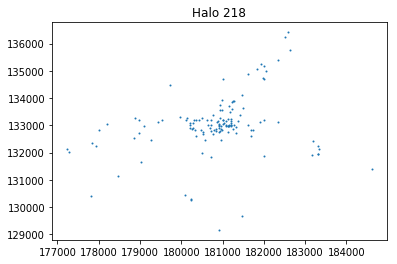

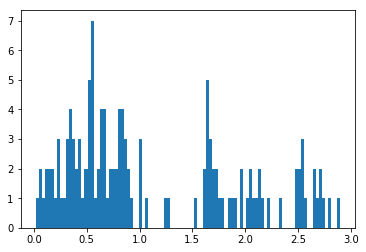

galaxies [1, 0, 1, 1, 3, 2, 4, 2, 5, 7, 6, 15, 12, 16, 5, 2, 8, 14, 10, 16]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 3, 3, 4, 8, 5, 2, 6, 14, 8, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0]
red galaxies counted [1, 0, 1, 1, 3, 1, 2, 2, 4, 4, 3, 12, 7, 7, 0, 0, 0, 0, 1, 1]
sum of galaxies: 130

Halo: 219
Halo Mass: 6306.617
N Subhalos from Illustris Algorithm: 425 293.5773470401764
R500c, R200c, R200m: 0.3360498656688607 0.5113882720685048 0.6433318553169082
before dev loop: 293.59656405448914
True
566208 566208 time 293.66051506996155
N Subhalos within 5*R200m: 171 293.71787214279175


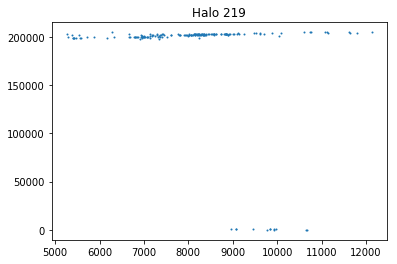

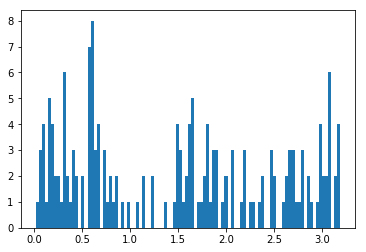

galaxies [1, 1, 3, 0, 6, 4, 3, 5, 6, 5, 2, 19, 10, 4, 3, 4, 22, 19, 15, 36]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 7, 6, 2, 2, 3, 19, 12, 14, 34]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0]
red galaxies counted [1, 1, 3, 0, 5, 2, 3, 5, 6, 2, 2, 11, 4, 2, 1, 1, 1, 6, 1, 2]
sum of galaxies: 168

Halo: 220
Halo Mass: 6206.4336
N Subhalos from Illustris Algorithm: 474 294.3996169567108
R500c, R200c, R200m: 0.34663489455111285 0.5180237021475187 0.6384376836672495
before dev loop: 294.42264699935913
True
566208 566208 time 294.4695680141449
N Subhalos within 5*R200m: 220 294.53292894363403


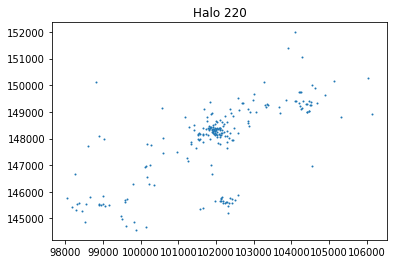

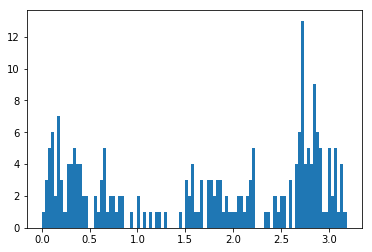

galaxies [2, 4, 1, 6, 4, 6, 3, 5, 11, 7, 2, 11, 7, 4, 5, 3, 20, 19, 22, 76]
blue galaxies counted [1, 1, 1, 0, 0, 1, 1, 2, 5, 2, 0, 4, 5, 2, 3, 2, 13, 10, 18, 55]
red galaxies counted [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 6]
red galaxies counted [1, 2, 0, 6, 3, 4, 2, 3, 6, 5, 2, 6, 2, 2, 2, 0, 5, 7, 4, 15]
sum of galaxies: 218

Halo: 221
Halo Mass: 6458.689
N Subhalos from Illustris Algorithm: 562 295.2323479652405
R500c, R200c, R200m: 0.27799194427757495 0.44422675663471173 0.5687975552781467
before dev loop: 295.25774908065796
True
566208 566208 time 295.3104920387268
N Subhalos within 5*R200m: 361 295.3667502403259


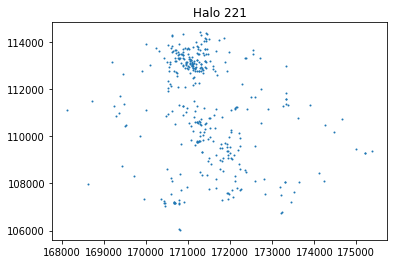

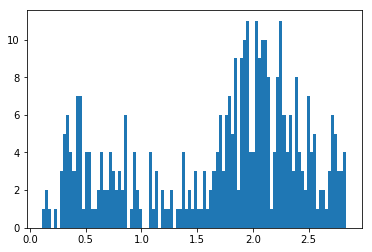

galaxies [0, 0, 0, 1, 1, 2, 0, 1, 8, 13, 15, 10, 14, 16, 8, 14, 18, 62, 107, 71]
blue galaxies counted [0, 0, 0, 1, 1, 0, 0, 1, 3, 6, 8, 6, 6, 10, 8, 12, 13, 27, 44, 44]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 2, 0, 2, 1, 4, 9, 6]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 6, 4, 8, 4, 0, 0, 4, 31, 54, 21]
sum of galaxies: 361

Halo: 222
Halo Mass: 6248.058
N Subhalos from Illustris Algorithm: 438 296.1254858970642
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
before dev loop: 296.1692500114441
True
566208 566208 time 296.22232484817505
N Subhalos within 5*R200m: 162 296.2815570831299


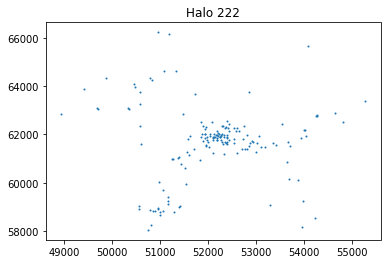

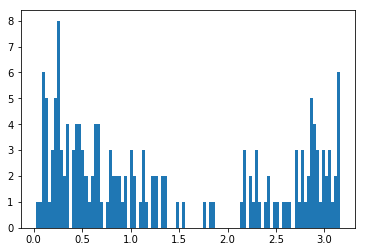

galaxies [0, 4, 3, 5, 1, 2, 8, 9, 6, 5, 10, 9, 8, 9, 10, 8, 2, 3, 17, 42]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 3, 1, 7, 8, 4, 2, 3, 16, 33]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4]
red galaxies counted [0, 3, 3, 5, 0, 2, 6, 7, 4, 2, 7, 6, 7, 2, 2, 2, 0, 0, 1, 5]
sum of galaxies: 161

Halo: 223
Halo Mass: 6099.7847
N Subhalos from Illustris Algorithm: 524 296.94691705703735
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
before dev loop: 296.96583318710327
True
566208 566208 time 297.02097392082214
N Subhalos within 5*R200m: 221 297.07414388656616


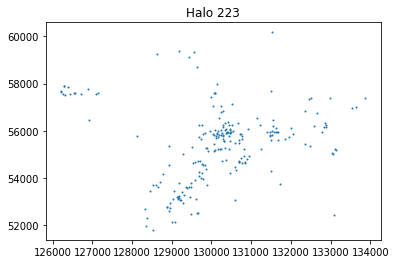

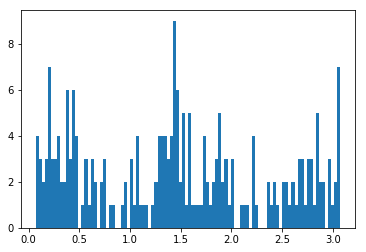

galaxies [1, 2, 1, 3, 2, 6, 4, 8, 5, 12, 9, 7, 7, 4, 12, 21, 33, 27, 15, 42]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 4, 3, 5, 6, 5, 4, 9, 11, 20, 18, 12, 35]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 1, 5]
red galaxies counted [1, 1, 0, 2, 2, 6, 4, 4, 1, 8, 4, 1, 1, 0, 3, 9, 10, 8, 2, 2]
sum of galaxies: 221

Halo: 224
Halo Mass: 6104.093
N Subhalos from Illustris Algorithm: 499 297.735151052475
R500c, R200c, R200m: 0.31905039687934345 0.4913570343086319 0.624103228238778
before dev loop: 297.7663679122925
True
566208 566208 time 297.8114240169525
N Subhalos within 5*R200m: 217 297.87123012542725


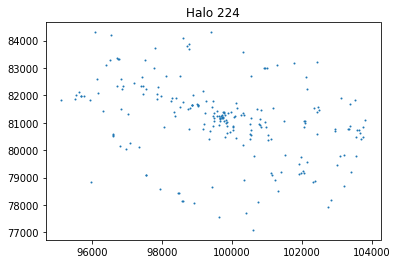

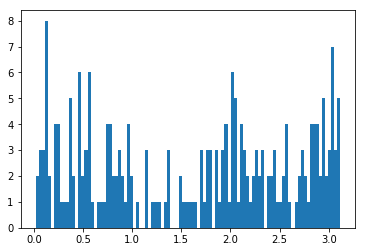

galaxies [1, 2, 3, 6, 3, 1, 6, 3, 2, 7, 11, 8, 10, 11, 9, 7, 10, 34, 29, 52]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 7, 3, 4, 6, 7, 5, 8, 26, 29, 48]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 6, 0, 1]
red galaxies counted [1, 1, 3, 5, 2, 1, 5, 2, 0, 4, 3, 5, 6, 5, 2, 2, 1, 2, 0, 3]
sum of galaxies: 215

Halo: 225
Halo Mass: 6161.1543
N Subhalos from Illustris Algorithm: 546 298.5589511394501
R500c, R200c, R200m: 0.3010629178636327 0.47783940179215134 0.6086834788672018
before dev loop: 298.5877778530121
True
566208 566208 time 298.64160919189453
N Subhalos within 5*R200m: 169 298.6959550380707


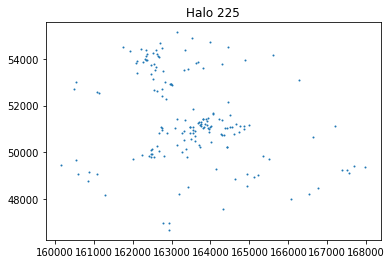

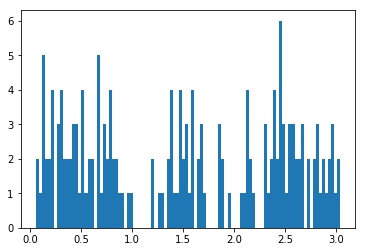

galaxies [1, 1, 0, 4, 1, 2, 6, 3, 6, 6, 7, 7, 11, 10, 2, 10, 20, 8, 30, 33]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 1, 4, 5, 4, 2, 9, 15, 8, 22, 30]
red galaxies counted [1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 4, 0]
red galaxies counted [0, 0, 0, 2, 1, 2, 5, 1, 1, 5, 5, 3, 4, 5, 0, 0, 5, 0, 4, 3]
sum of galaxies: 168

Halo: 226
Halo Mass: 6017.781
N Subhalos from Illustris Algorithm: 532 299.4178059101105
R500c, R200c, R200m: 0.33531717515649473 0.507898589042993 0.6217982847336577
before dev loop: 299.4388279914856
True
566208 566208 time 299.50034403800964
N Subhalos within 5*R200m: 214 299.575767993927


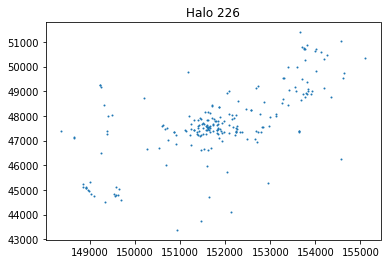

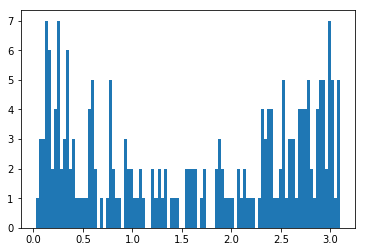

galaxies [1, 1, 2, 4, 7, 5, 5, 8, 9, 5, 4, 11, 7, 8, 8, 10, 11, 13, 32, 61]
blue galaxies counted [1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 3, 5, 2, 5, 6, 10, 10, 12, 19, 55]
red galaxies counted [0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 4]
red galaxies counted [0, 0, 2, 1, 5, 4, 4, 5, 7, 4, 1, 6, 4, 3, 2, 0, 1, 0, 11, 2]
sum of galaxies: 212

Halo: 227
Halo Mass: 5872.5327
N Subhalos from Illustris Algorithm: 347 300.4576280117035
R500c, R200c, R200m: 0.3539511905451505 0.5181666651734815 0.6351285960520201
before dev loop: 300.5023829936981
True
566208 566208 time 300.55877113342285
N Subhalos within 5*R200m: 198 300.76196908950806


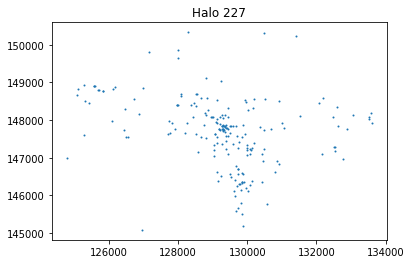

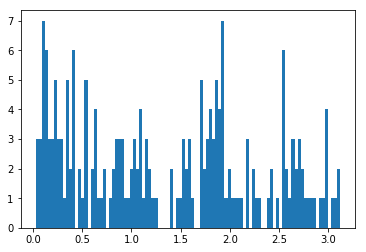

galaxies [2, 1, 5, 5, 4, 3, 7, 5, 6, 8, 7, 7, 5, 13, 17, 4, 18, 33, 20, 24]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 5, 3, 8, 10, 4, 11, 23, 19, 20]
red galaxies counted [0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 2]
red galaxies counted [2, 1, 3, 4, 2, 3, 7, 3, 5, 6, 5, 1, 2, 4, 7, 0, 4, 9, 0, 2]
sum of galaxies: 194

Halo: 228
Halo Mass: 5981.5605
N Subhalos from Illustris Algorithm: 430 301.446182012558
R500c, R200c, R200m: 0.3201286647762267 0.5126069207692353 0.6407156839865751
before dev loop: 301.48001408576965
True
566208 566208 time 301.5391640663147
N Subhalos within 5*R200m: 227 301.7703289985657


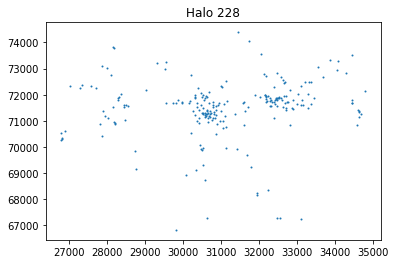

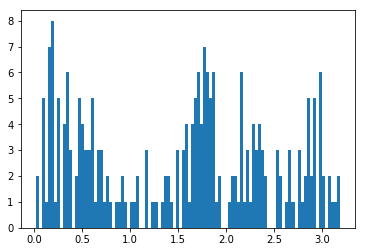

galaxies [0, 4, 1, 1, 5, 10, 4, 4, 8, 5, 12, 12, 7, 5, 7, 8, 33, 35, 27, 37]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 6, 6, 5, 3, 4, 4, 12, 17, 20, 18]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 2, 2]
red galaxies counted [0, 2, 1, 0, 4, 7, 3, 4, 6, 3, 5, 6, 2, 2, 3, 3, 19, 15, 5, 17]
sum of galaxies: 225

Halo: 229
Halo Mass: 5935.54
N Subhalos from Illustris Algorithm: 408 302.527526140213
R500c, R200c, R200m: 0.34547861952566933 0.5155939312229215 0.6285914505512025
before dev loop: 302.56432604789734
True
566208 566208 time 302.6132860183716
N Subhalos within 5*R200m: 129 302.7066788673401


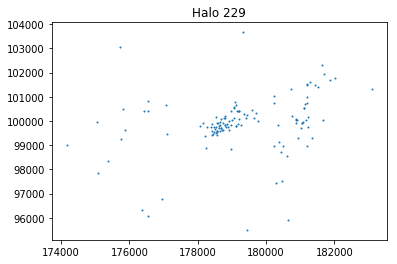

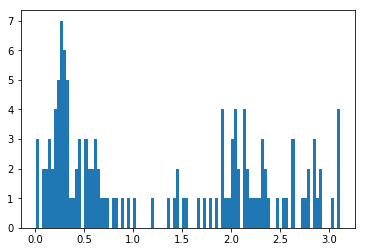

galaxies [2, 0, 0, 3, 2, 4, 6, 11, 8, 4, 6, 9, 3, 4, 1, 3, 6, 19, 17, 18]
blue galaxies counted [1, 0, 0, 0, 0, 1, 2, 4, 5, 2, 2, 5, 2, 1, 1, 2, 4, 14, 17, 18]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
red galaxies counted [1, 0, 0, 3, 1, 2, 4, 7, 2, 1, 4, 4, 1, 3, 0, 1, 1, 4, 0, 0]
sum of galaxies: 126

Halo: 230
Halo Mass: 5808.349
N Subhalos from Illustris Algorithm: 398 303.46553111076355
R500c, R200c, R200m: 0.338700066282887 0.5111280080999289 0.6324279920636765
before dev loop: 303.49772000312805
True
566208 566208 time 303.5590720176697
N Subhalos within 5*R200m: 129 303.7075729370117


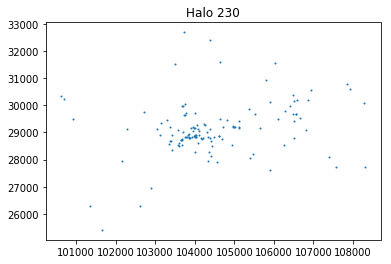

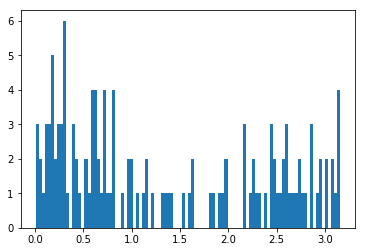

galaxies [0, 1, 1, 3, 2, 5, 5, 4, 6, 5, 3, 11, 7, 6, 7, 5, 4, 6, 21, 22]
blue galaxies counted [0, 0, 0, 0, 0, 2, 3, 1, 1, 1, 1, 5, 2, 2, 7, 5, 4, 6, 15, 22]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
red galaxies counted [0, 1, 1, 3, 2, 3, 2, 3, 4, 4, 2, 6, 5, 4, 0, 0, 0, 0, 3, 0]
sum of galaxies: 124

Halo: 231
Halo Mass: 5988.988
N Subhalos from Illustris Algorithm: 474 304.41662883758545
R500c, R200c, R200m: 0.32520951707278106 0.49848961220517773 0.626345677965257
before dev loop: 304.4375231266022
True
566208 566208 time 304.49789810180664
N Subhalos within 5*R200m: 184 304.74748611450195


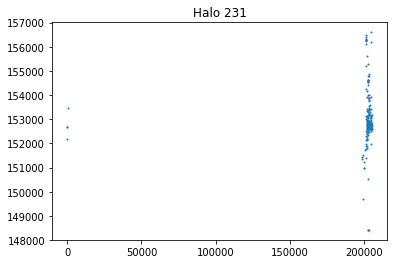

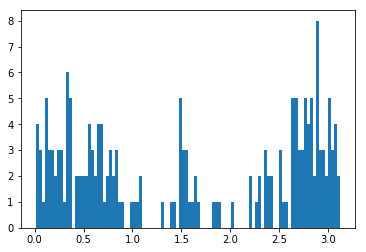

galaxies [2, 0, 1, 4, 3, 3, 5, 3, 8, 4, 7, 13, 11, 7, 5, 2, 17, 4, 17, 62]
blue galaxies counted [0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 3, 5, 5, 3, 2, 1, 15, 3, 12, 46]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3]
red galaxies counted [2, 0, 1, 3, 2, 2, 3, 3, 5, 3, 3, 7, 6, 4, 3, 0, 1, 1, 5, 13]
sum of galaxies: 178

Halo: 232
Halo Mass: 6047.211
N Subhalos from Illustris Algorithm: 410 305.407732963562
R500c, R200c, R200m: 0.32095057206354594 0.48856094815369033 0.6087796416194736
before dev loop: 305.42923521995544
True
566208 566208 time 305.481241941452
N Subhalos within 5*R200m: 188 305.5782299041748


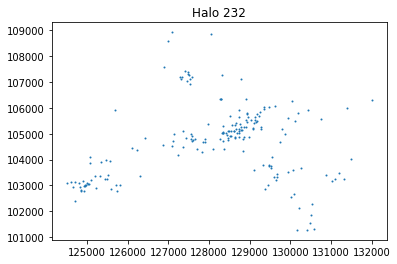

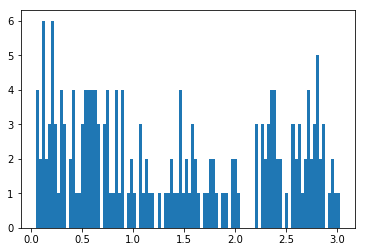

galaxies [1, 2, 1, 5, 2, 3, 7, 6, 4, 6, 5, 14, 13, 10, 10, 7, 17, 13, 24, 35]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 7, 3, 5, 4, 3, 11, 10, 21, 22]
red galaxies counted [0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 3]
red galaxies counted [1, 0, 1, 2, 2, 3, 6, 4, 3, 5, 3, 6, 8, 4, 6, 3, 4, 3, 3, 10]
sum of galaxies: 185

Halo: 233
Halo Mass: 6026.4443
N Subhalos from Illustris Algorithm: 597 306.38129901885986
R500c, R200c, R200m: 0.27941981302134156 0.43607834456824685 0.5426424876937487
before dev loop: 306.4088840484619
True
566208 566208 time 306.4662230014801
N Subhalos within 5*R200m: 180 306.56345105171204


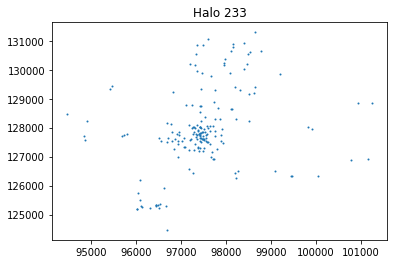

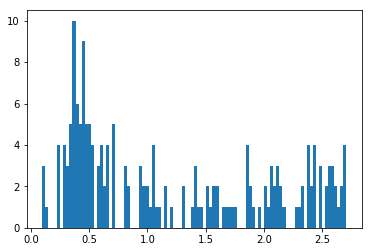

galaxies [0, 0, 1, 2, 1, 0, 0, 4, 5, 17, 22, 12, 13, 10, 7, 10, 8, 12, 22, 34]
blue galaxies counted [0, 0, 1, 2, 1, 0, 0, 2, 2, 11, 12, 9, 10, 7, 7, 9, 6, 12, 19, 24]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 9, 3, 1, 3, 0, 1, 1, 0, 2, 8]
sum of galaxies: 180

Halo: 234
Halo Mass: 5898.1113
N Subhalos from Illustris Algorithm: 540 307.247437953949
R500c, R200c, R200m: 0.27305015164797153 0.47641449559778865 0.6114901741517654
before dev loop: 307.2665750980377
True
566208 566208 time 307.32704186439514
N Subhalos within 5*R200m: 214 307.4744219779968


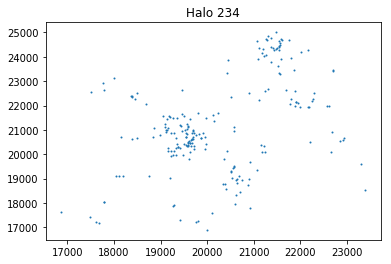

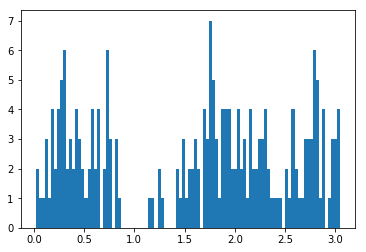

galaxies [0, 1, 1, 1, 3, 3, 4, 8, 8, 8, 7, 10, 13, 4, 0, 5, 19, 42, 29, 46]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 5, 3, 8, 8, 4, 0, 5, 14, 31, 24, 22]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3]
red galaxies counted [0, 1, 1, 1, 2, 2, 3, 7, 6, 2, 4, 2, 5, 0, 0, 0, 4, 9, 4, 21]
sum of galaxies: 212

Halo: 235
Halo Mass: 5762.2583
N Subhalos from Illustris Algorithm: 363 308.21507596969604
R500c, R200c, R200m: 0.3406499042040559 0.507056384288812 0.6250168144198118
before dev loop: 308.2471089363098
True
566208 566208 time 308.30627393722534
N Subhalos within 5*R200m: 100 308.38890194892883


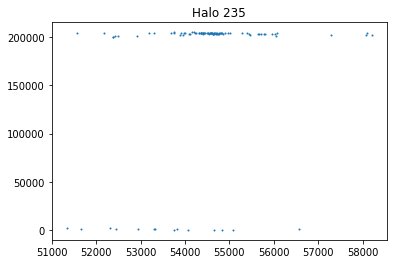

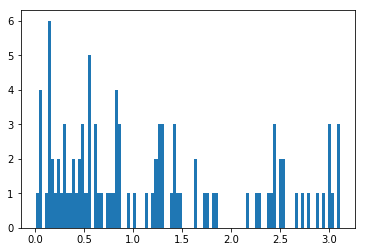

galaxies [1, 0, 0, 3, 4, 2, 2, 5, 2, 3, 7, 8, 3, 9, 2, 12, 6, 3, 12, 12]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 4, 1, 12, 5, 3, 12, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 2, 4, 2, 0, 3, 2, 3, 6, 5, 1, 5, 1, 0, 1, 0, 0, 1]
sum of galaxies: 96

Halo: 236
Halo Mass: 5933.0864
N Subhalos from Illustris Algorithm: 460 309.04837799072266
R500c, R200c, R200m: 0.34137416746440136 0.5055807944789721 0.6240099079325558
before dev loop: 309.07971596717834
True
566208 566208 time 309.13661885261536
N Subhalos within 5*R200m: 114 309.2039279937744


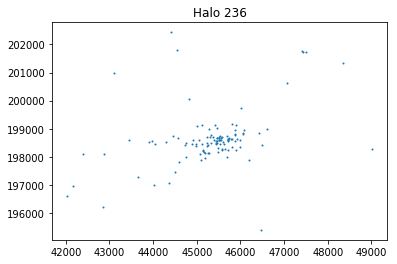

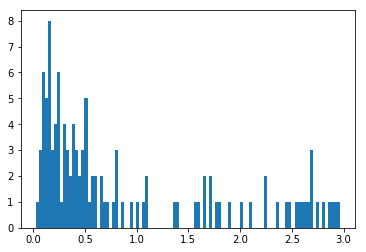

galaxies [1, 3, 4, 4, 7, 6, 7, 4, 7, 9, 10, 6, 5, 4, 4, 2, 6, 4, 8, 12]
blue galaxies counted [0, 1, 3, 1, 2, 1, 2, 1, 1, 5, 5, 2, 5, 2, 3, 2, 6, 4, 8, 9]
red galaxies counted [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
red galaxies counted [1, 2, 1, 3, 4, 3, 5, 3, 6, 4, 5, 4, 0, 2, 1, 0, 0, 0, 0, 1]
sum of galaxies: 113

Halo: 237
Halo Mass: 5817.067
N Subhalos from Illustris Algorithm: 352 309.86427092552185
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
before dev loop: 309.87804102897644
True
566208 566208 time 309.9433410167694
N Subhalos within 5*R200m: 161 310.0327191352844


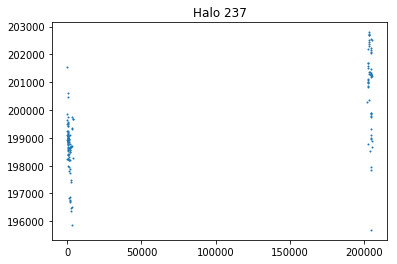

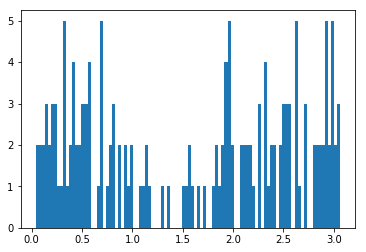

galaxies [0, 2, 1, 1, 3, 2, 4, 3, 6, 6, 8, 7, 8, 8, 7, 3, 6, 18, 26, 40]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 3, 3, 5, 3, 6, 17, 22, 33]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2]
red galaxies counted [0, 2, 1, 1, 2, 2, 3, 1, 5, 4, 4, 6, 3, 5, 0, 0, 0, 1, 3, 5]
sum of galaxies: 159

Halo: 238
Halo Mass: 6075.759
N Subhalos from Illustris Algorithm: 483 310.7572078704834
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
before dev loop: 310.78259801864624
True
566208 566208 time 310.83599495887756
N Subhalos within 5*R200m: 120 310.88760685920715


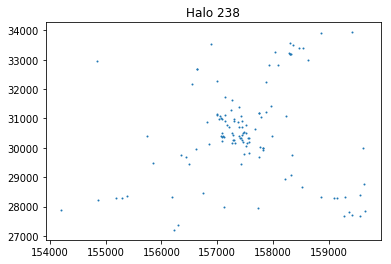

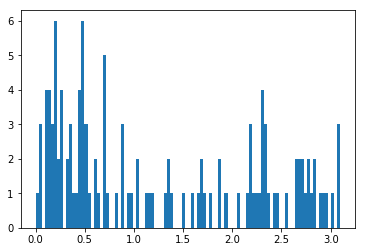

galaxies [0, 0, 2, 2, 5, 7, 3, 4, 4, 5, 11, 4, 6, 6, 4, 5, 6, 5, 18, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 3, 5, 1, 5, 5, 4, 4, 6, 4, 14, 16]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1]
red galaxies counted [0, 0, 2, 2, 4, 5, 2, 1, 3, 2, 4, 3, 1, 1, 0, 0, 0, 0, 2, 2]
sum of galaxies: 116

Halo: 239
Halo Mass: 5867.49
N Subhalos from Illustris Algorithm: 460 311.5688600540161
R500c, R200c, R200m: 0.3094656087481886 0.5116804434948494 0.6330491666116572
before dev loop: 311.58595299720764
True
566208 566208 time 311.64812898635864
N Subhalos within 5*R200m: 167 311.7337520122528


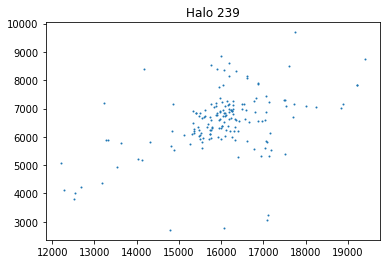

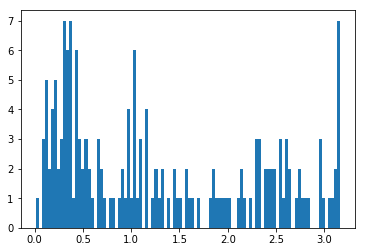

galaxies [0, 3, 1, 4, 2, 4, 5, 5, 13, 14, 7, 7, 4, 9, 15, 9, 7, 10, 22, 25]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 3, 1, 4, 1, 6, 7, 10, 18, 21]
red galaxies counted [0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1]
red galaxies counted [0, 2, 1, 3, 2, 4, 4, 5, 8, 10, 7, 4, 3, 4, 11, 3, 0, 0, 4, 3]
sum of galaxies: 166

Halo: 240
Halo Mass: 5920.739
N Subhalos from Illustris Algorithm: 443 312.40372014045715
R500c, R200c, R200m: 0.32248487239636947 0.4936577741963548 0.6292485360020924
before dev loop: 312.42069005966187
True
566208 566208 time 312.47950291633606
N Subhalos within 5*R200m: 167 312.5686070919037


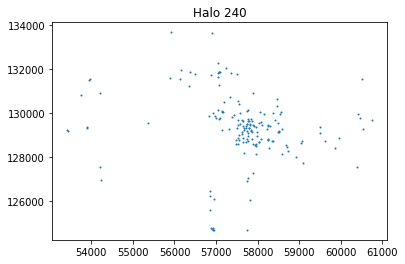

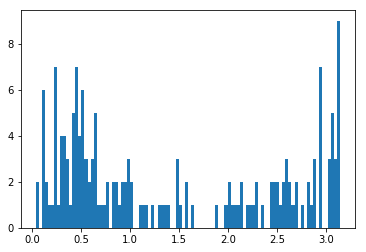

galaxies [0, 0, 2, 4, 2, 1, 7, 4, 7, 8, 17, 13, 5, 9, 8, 5, 7, 7, 17, 42]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 7, 5, 1, 3, 5, 4, 6, 7, 16, 32]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 2, 3, 1, 1, 6, 1, 5, 6, 9, 8, 4, 6, 1, 1, 0, 0, 1, 10]
sum of galaxies: 165

Halo: 241
Halo Mass: 5835.177
N Subhalos from Illustris Algorithm: 466 313.32001304626465
R500c, R200c, R200m: 0.34901314113675336 0.519944635194774 0.634574519244592
before dev loop: 313.35013914108276
True
566208 566208 time 313.4034390449524
N Subhalos within 5*R200m: 149 313.469279050827


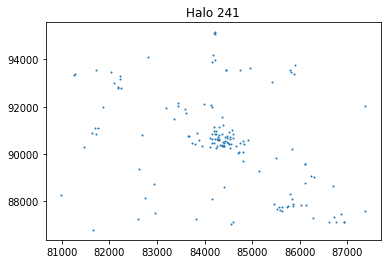

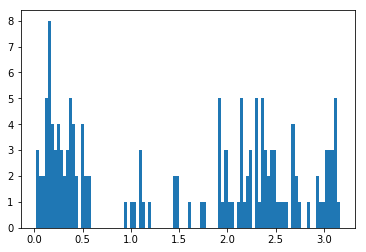

galaxies [0, 0, 2, 5, 5, 7, 7, 3, 8, 8, 6, 2, 0, 1, 6, 3, 4, 14, 35, 28]
blue galaxies counted [0, 0, 0, 3, 3, 4, 1, 2, 3, 4, 2, 2, 0, 1, 6, 2, 4, 13, 31, 26]
red galaxies counted [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0]
red galaxies counted [0, 0, 1, 1, 2, 3, 6, 1, 4, 4, 3, 0, 0, 0, 0, 1, 0, 1, 2, 2]
sum of galaxies: 144

Halo: 242
Halo Mass: 5958.2607
N Subhalos from Illustris Algorithm: 521 314.1410160064697
R500c, R200c, R200m: 0.32684578515332996 0.5150684390137957 0.6334359794811204
before dev loop: 314.1654200553894
True
566208 566208 time 314.2230272293091
N Subhalos within 5*R200m: 123 314.29577684402466


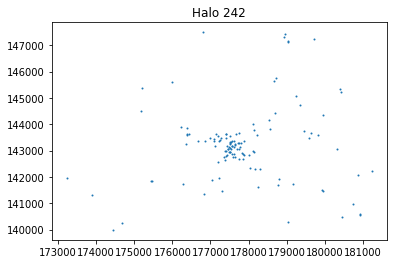

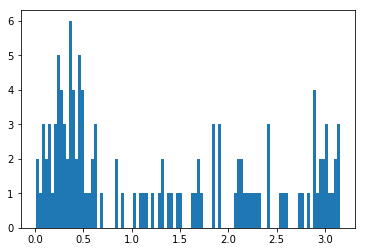

galaxies [0, 0, 3, 4, 1, 1, 7, 7, 6, 9, 10, 6, 1, 3, 4, 6, 7, 10, 12, 23]
blue galaxies counted [0, 0, 1, 1, 1, 0, 1, 4, 2, 3, 5, 1, 1, 3, 4, 5, 7, 8, 11, 22]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0]
red galaxies counted [0, 0, 2, 3, 0, 1, 5, 2, 3, 6, 5, 5, 0, 0, 0, 1, 0, 0, 0, 1]
sum of galaxies: 120

Halo: 243
Halo Mass: 6006.727
N Subhalos from Illustris Algorithm: 547 314.9906370639801
R500c, R200c, R200m: 0.2796311148558506 0.43533446442671353 0.5498146596627328
before dev loop: 315.02019906044006
True
566208 566208 time 315.0738000869751
N Subhalos within 5*R200m: 284 315.1739869117737


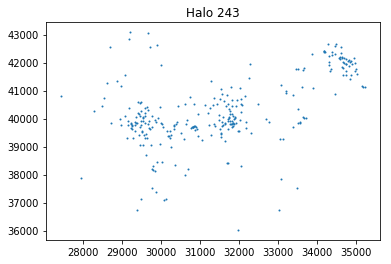

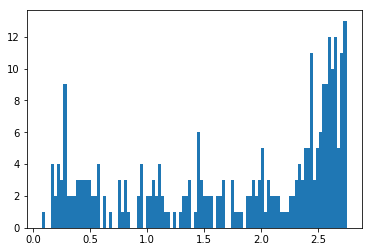

galaxies [0, 1, 0, 0, 0, 3, 4, 6, 11, 5, 11, 7, 7, 8, 9, 15, 20, 17, 32, 128]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 6, 3, 4, 4, 1, 8, 18, 14, 21, 45]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 2, 16]
red galaxies counted [0, 1, 0, 0, 0, 3, 2, 4, 6, 4, 4, 3, 2, 3, 5, 7, 1, 2, 9, 67]
sum of galaxies: 284

Halo: 244
Halo Mass: 5836.6006
N Subhalos from Illustris Algorithm: 555 315.94656920433044
R500c, R200c, R200m: 0.2649184739821934 0.44493728807822575 0.5668882322217985
before dev loop: 315.98311591148376
True
566208 566208 time 316.03873085975647
N Subhalos within 5*R200m: 181 316.0999629497528


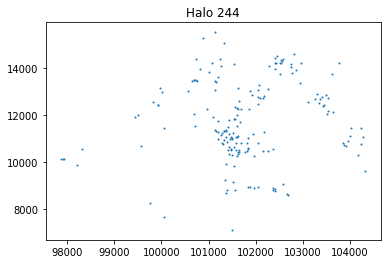

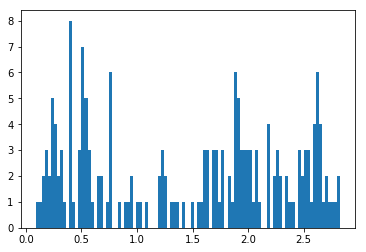

galaxies [0, 0, 1, 0, 3, 1, 4, 7, 7, 7, 5, 17, 4, 8, 6, 8, 7, 30, 28, 38]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 2, 4, 2, 8, 0, 6, 5, 7, 6, 28, 25, 30]
red galaxies counted [0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 6, 5, 2, 3, 8, 4, 1, 1, 0, 1, 1, 2, 5]
sum of galaxies: 181

Halo: 245
Halo Mass: 5983.657
N Subhalos from Illustris Algorithm: 609 316.75915002822876
R500c, R200c, R200m: 0.2623690400823504 0.408838463454161 0.5164104338593012
before dev loop: 316.78037214279175
True
566208 566208 time 316.8424220085144
N Subhalos within 5*R200m: 147 316.91118717193604


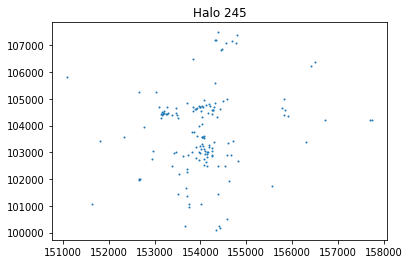

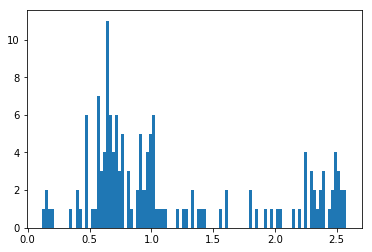

galaxies [0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 3, 7, 26, 24, 16, 16, 8, 3, 7, 31]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 4, 12, 7, 11, 6, 3, 7, 30]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 0, 1, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 3, 19, 11, 8, 5, 1, 0, 0, 0]
sum of galaxies: 147

Halo: 246
Halo Mass: 5942.5854
N Subhalos from Illustris Algorithm: 517 317.5647830963135
R500c, R200c, R200m: 0.23638431908867535 0.38892076339846926 0.5125963917085161
before dev loop: 317.5878701210022
True
566208 566208 time 317.6478979587555
N Subhalos within 5*R200m: 112 317.7031021118164


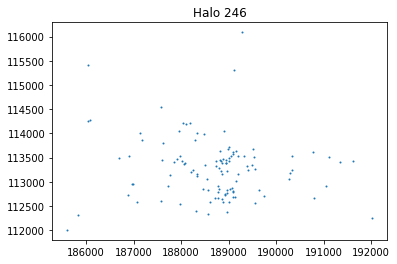

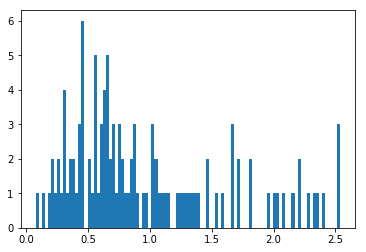

galaxies [0, 0, 1, 0, 1, 0, 1, 3, 3, 6, 7, 8, 16, 14, 9, 10, 8, 9, 6, 10]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 6, 6, 8, 4, 7, 6, 9, 5, 10]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 5, 4, 1, 9, 4, 4, 3, 1, 0, 1, 0]
sum of galaxies: 112

Halo: 247
Halo Mass: 5637.5234
N Subhalos from Illustris Algorithm: 445 318.43153715133667
R500c, R200c, R200m: 0.3296730381286894 0.5019103959398237 0.6218595774787569
before dev loop: 318.4470829963684
True
566208 566208 time 318.50495982170105
N Subhalos within 5*R200m: 192 318.5750939846039


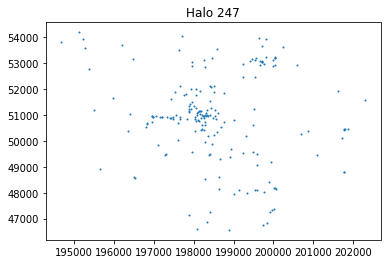

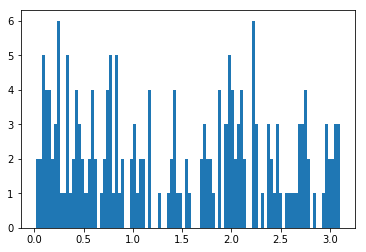

galaxies [1, 3, 2, 4, 3, 3, 6, 4, 7, 5, 7, 8, 12, 9, 12, 7, 10, 30, 26, 30]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 2, 6, 4, 7, 11, 4, 9, 18, 21, 27]
red galaxies counted [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1]
red galaxies counted [0, 2, 2, 4, 3, 0, 5, 3, 4, 2, 4, 1, 8, 2, 1, 3, 1, 9, 5, 2]
sum of galaxies: 189

Halo: 248
Halo Mass: 5912.9204
N Subhalos from Illustris Algorithm: 502 319.2370400428772
R500c, R200c, R200m: 0.3020246254552539 0.4751767904981899 0.5955262364822579
before dev loop: 319.2629060745239
True
566208 566208 time 319.3194668292999
N Subhalos within 5*R200m: 146 319.387647151947


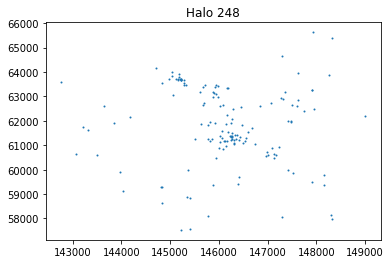

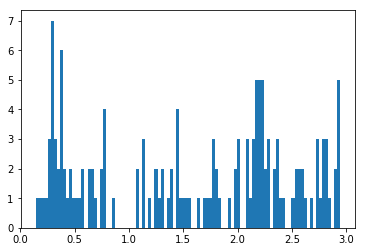

galaxies [0, 0, 0, 0, 1, 1, 1, 4, 10, 10, 4, 5, 6, 5, 2, 9, 12, 15, 34, 27]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 4, 3, 2, 1, 5, 11, 13, 23, 25]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 8, 7, 3, 1, 3, 3, 0, 2, 1, 1, 10, 1]
sum of galaxies: 146

Halo: 249
Halo Mass: 5765.9287
N Subhalos from Illustris Algorithm: 430 320.14818120002747
R500c, R200c, R200m: 0.322365990092926 0.49229788395107177 0.6124717788657342
before dev loop: 320.177099943161
True
566208 566208 time 320.2375280857086
N Subhalos within 5*R200m: 199 320.292592048645


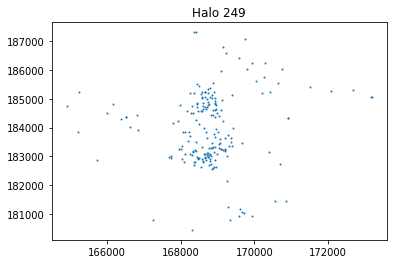

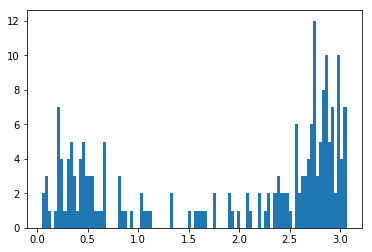

galaxies [1, 1, 2, 0, 1, 1, 8, 4, 9, 6, 12, 6, 6, 6, 5, 2, 5, 6, 20, 97]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 5, 2, 4, 3, 3, 2, 5, 6, 15, 38]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 9]
red galaxies counted [1, 1, 2, 0, 1, 1, 7, 3, 6, 4, 7, 4, 2, 2, 2, 0, 0, 0, 3, 50]
sum of galaxies: 198

Halo: 250
Halo Mass: 5850.727
N Subhalos from Illustris Algorithm: 512 320.9467759132385
R500c, R200c, R200m: 0.28499963470296674 0.47289826973099613 0.6134501808235908
before dev loop: 320.9635338783264
True
566208 566208 time 321.02488803863525
N Subhalos within 5*R200m: 218 321.07796597480774


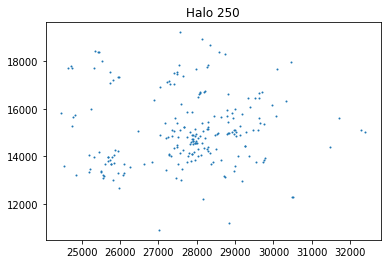

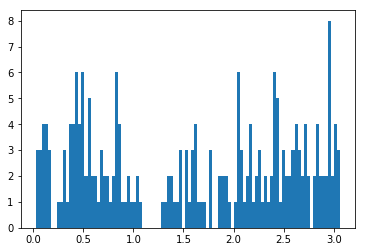

galaxies [1, 2, 3, 3, 4, 1, 0, 2, 4, 10, 15, 10, 9, 15, 6, 6, 18, 20, 35, 51]
blue galaxies counted [0, 1, 0, 1, 0, 0, 0, 0, 1, 4, 7, 1, 5, 10, 6, 6, 17, 19, 28, 43]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [1, 1, 3, 2, 3, 1, 0, 2, 3, 6, 7, 7, 4, 5, 0, 0, 1, 1, 6, 7]
sum of galaxies: 215

Halo: 251
Halo Mass: 5730.689
N Subhalos from Illustris Algorithm: 498 321.74351501464844
R500c, R200c, R200m: 0.3173211888198607 0.46930289575377837 0.5729271890093477
before dev loop: 321.7661831378937
True
566208 566208 time 321.8187711238861
N Subhalos within 5*R200m: 166 321.8867838382721


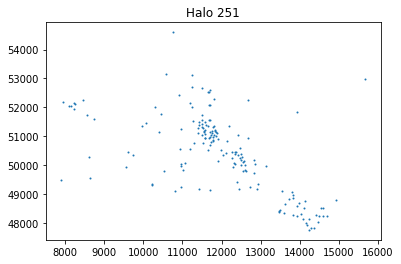

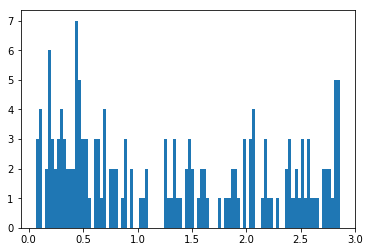

galaxies [2, 1, 2, 2, 1, 1, 9, 4, 7, 6, 13, 7, 11, 9, 5, 7, 15, 11, 17, 36]
blue galaxies counted [1, 1, 1, 1, 1, 0, 6, 1, 5, 1, 4, 5, 3, 0, 4, 6, 14, 10, 15, 26]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 3]
red galaxies counted [1, 0, 1, 1, 0, 1, 3, 2, 2, 5, 6, 2, 7, 9, 1, 1, 0, 1, 2, 7]
sum of galaxies: 166

Halo: 252
Halo Mass: 5580.8857
N Subhalos from Illustris Algorithm: 395 322.56101393699646
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
before dev loop: 322.5864040851593
True
566208 566208 time 322.6338880062103
N Subhalos within 5*R200m: 92 322.70942211151123


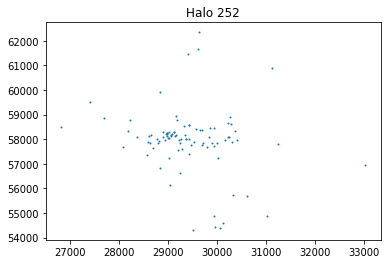

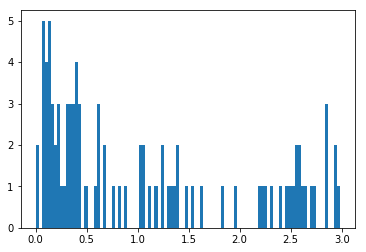

galaxies [2, 3, 4, 3, 3, 4, 4, 1, 7, 8, 2, 4, 3, 2, 5, 8, 3, 2, 10, 12]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 0, 3, 2, 0, 1, 1, 1, 5, 5, 2, 2, 10, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [2, 2, 4, 3, 2, 4, 3, 1, 3, 5, 2, 3, 2, 1, 0, 2, 1, 0, 0, 1]
sum of galaxies: 90

Halo: 253
Halo Mass: 5553.335
N Subhalos from Illustris Algorithm: 329 323.4042999744415
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
before dev loop: 323.43788719177246
True
566208 566208 time 323.4892990589142
N Subhalos within 5*R200m: 213 323.55013704299927


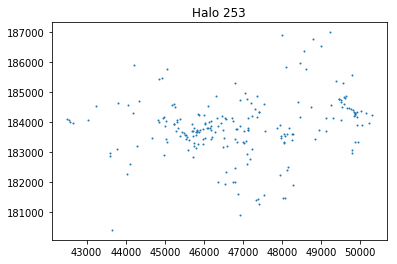

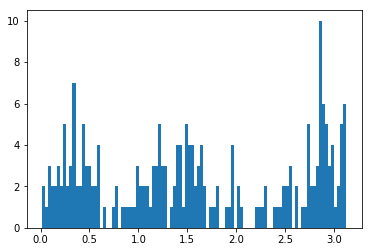

galaxies [1, 3, 1, 1, 2, 3, 3, 7, 9, 9, 8, 7, 3, 5, 14, 22, 27, 13, 15, 58]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 0, 0, 0, 3, 6, 14, 22, 11, 12, 31]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 9]
red galaxies counted [1, 2, 1, 0, 1, 3, 3, 4, 5, 8, 7, 6, 3, 2, 7, 6, 3, 2, 3, 18]
sum of galaxies: 211

Halo: 254
Halo Mass: 5788.7324
N Subhalos from Illustris Algorithm: 548 324.62997913360596
R500c, R200c, R200m: 0.2366688839692533 0.3846282695189578 0.48656106716826675
before dev loop: 324.6965501308441
True
566208 566208 time 324.7946150302887
N Subhalos within 5*R200m: 164 325.03753900527954


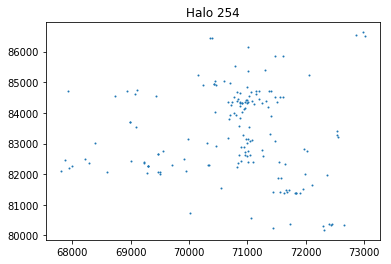

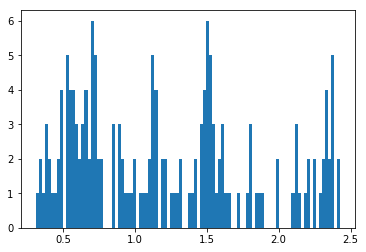

galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 8, 18, 22, 8, 12, 18, 32, 10, 27]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 10, 13, 5, 10, 16, 29, 10, 24]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 5, 6, 7, 3, 2, 2, 1, 0, 1]
sum of galaxies: 164

Halo: 255
Halo Mass: 5561.3896
N Subhalos from Illustris Algorithm: 436 326.2256019115448
R500c, R200c, R200m: 0.3457409652857182 0.5098926650329629 0.6191966459091842
before dev loop: 326.28627014160156
True
566208 566208 time 326.35020089149475
N Subhalos within 5*R200m: 233 326.46870017051697


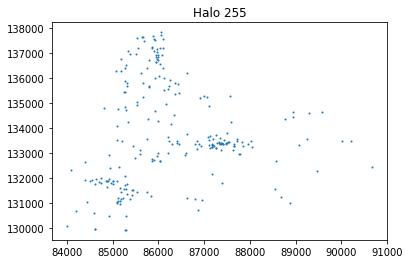

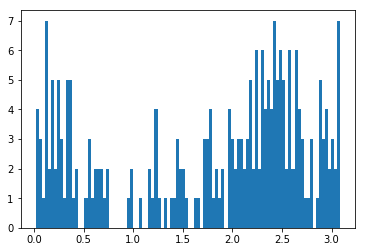

galaxies [2, 1, 1, 7, 2, 4, 4, 7, 7, 6, 2, 6, 7, 0, 5, 10, 13, 27, 63, 55]
blue galaxies counted [0, 0, 0, 2, 0, 1, 2, 5, 4, 2, 1, 4, 7, 0, 5, 10, 13, 24, 42, 39]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2]
red galaxies counted [2, 1, 1, 3, 2, 3, 2, 2, 3, 4, 1, 2, 0, 0, 0, 0, 0, 3, 14, 14]
sum of galaxies: 229

Halo: 256
Halo Mass: 5481.364
N Subhalos from Illustris Algorithm: 356 327.3517439365387
R500c, R200c, R200m: 0.32691584544328656 0.5017217135703578 0.6232241917893055
before dev loop: 327.390743970871
True
566208 566208 time 327.46368408203125
N Subhalos within 5*R200m: 126 327.53729701042175


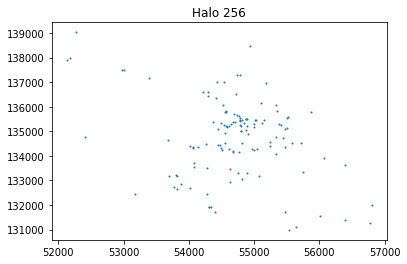

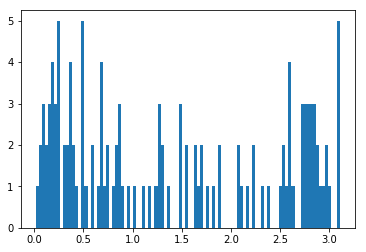

galaxies [0, 1, 3, 2, 2, 6, 5, 2, 5, 6, 5, 4, 7, 8, 3, 7, 10, 6, 10, 32]
blue galaxies counted [0, 1, 0, 0, 1, 1, 0, 1, 1, 4, 3, 2, 3, 4, 2, 7, 9, 6, 8, 25]
red galaxies counted [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
red galaxies counted [0, 0, 2, 1, 0, 4, 5, 0, 4, 2, 2, 1, 4, 4, 1, 0, 0, 0, 1, 7]
sum of galaxies: 124

Halo: 257
Halo Mass: 5675.715
N Subhalos from Illustris Algorithm: 517 328.4482378959656
R500c, R200c, R200m: 0.2682229776527371 0.4305267271576356 0.5354700755180561
before dev loop: 328.4928390979767
True
566208 566208 time 328.55323100090027
N Subhalos within 5*R200m: 215 328.64684104919434


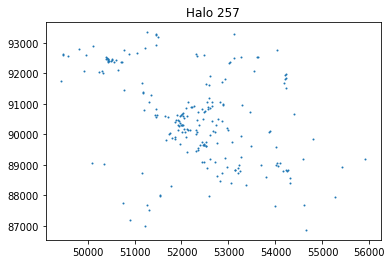

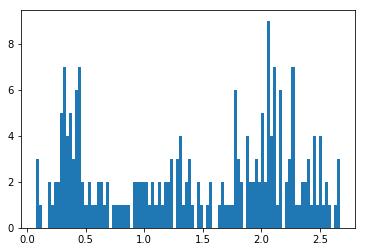

galaxies [0, 1, 1, 1, 1, 0, 2, 3, 8, 13, 18, 6, 8, 4, 10, 13, 20, 17, 50, 39]
blue galaxies counted [0, 1, 1, 0, 1, 0, 2, 2, 2, 8, 9, 4, 5, 2, 9, 12, 14, 13, 38, 28]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 3, 2, 2, 3]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 5, 3, 7, 1, 3, 2, 1, 1, 3, 2, 10, 8]
sum of galaxies: 215

Halo: 258
Halo Mass: 5698.162
N Subhalos from Illustris Algorithm: 417 329.44052600860596
R500c, R200c, R200m: 0.26058976894138725 0.4071157409758057 0.5266666197577229
before dev loop: 329.4948019981384
True
566208 566208 time 329.5516200065613
N Subhalos within 5*R200m: 112 329.6285779476166


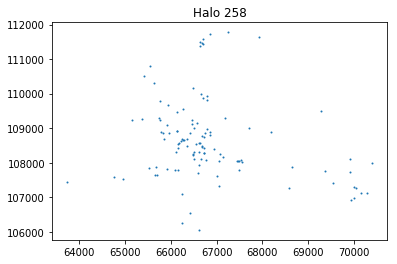

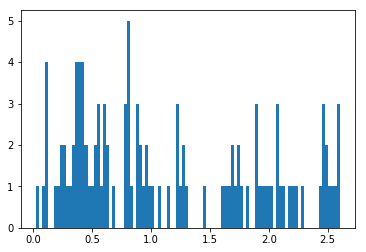

galaxies [0, 0, 1, 2, 2, 0, 1, 3, 3, 4, 12, 8, 6, 8, 10, 4, 8, 9, 14, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 5, 3, 3, 4, 6, 2, 4, 8, 14, 12]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1]
red galaxies counted [0, 0, 1, 2, 1, 0, 0, 0, 3, 2, 7, 3, 2, 3, 2, 2, 2, 1, 0, 3]
sum of galaxies: 111

Halo: 259
Halo Mass: 5570.5083
N Subhalos from Illustris Algorithm: 352 331.6417031288147
R500c, R200c, R200m: 0.32082688562593403 0.499689885092714 0.6198705858641151
before dev loop: 331.69182085990906
True
566208 566208 time 331.87158393859863
N Subhalos within 5*R200m: 85 332.08892607688904


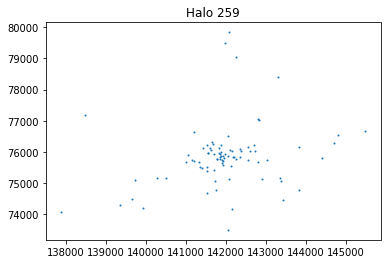

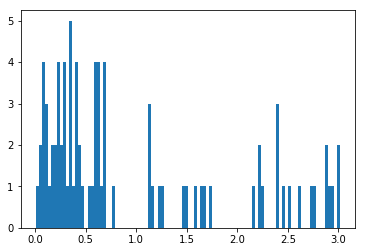

galaxies [0, 4, 3, 1, 0, 2, 5, 3, 9, 7, 2, 10, 6, 0, 4, 2, 5, 1, 9, 9]
blue galaxies counted [0, 0, 1, 0, 0, 0, 3, 0, 1, 2, 0, 2, 3, 0, 4, 2, 5, 1, 9, 9]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 3, 2, 1, 0, 2, 2, 3, 7, 5, 2, 7, 3, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 260
Halo Mass: 5686.5054
N Subhalos from Illustris Algorithm: 460 333.7259931564331
R500c, R200c, R200m: 0.26082509144673854 0.4081524330949062 0.5256688010909355
before dev loop: 333.75676107406616
True
566208 566208 time 333.85366010665894
N Subhalos within 5*R200m: 85 333.9531219005585


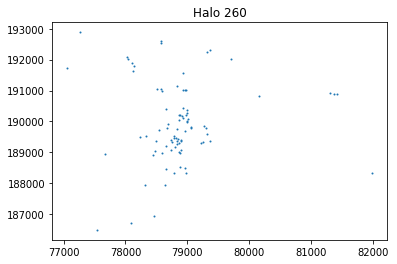

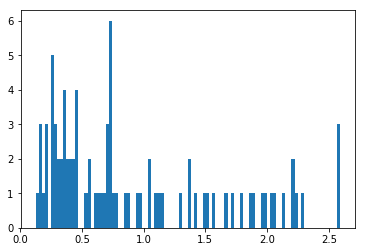

galaxies [0, 0, 0, 0, 1, 3, 3, 2, 7, 8, 7, 4, 5, 12, 3, 6, 4, 5, 8, 7]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 3, 3, 3, 3, 4, 8, 6]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 6, 8, 6, 3, 4, 8, 0, 3, 1, 1, 0, 1]
sum of galaxies: 85

Halo: 261
Halo Mass: 5498.938
N Subhalos from Illustris Algorithm: 455 335.55006313323975
R500c, R200c, R200m: 0.30720946723932957 0.498134866931289 0.6184671381357048
before dev loop: 335.5915141105652
True
566208 566208 time 335.65455198287964
N Subhalos within 5*R200m: 195 335.76267313957214


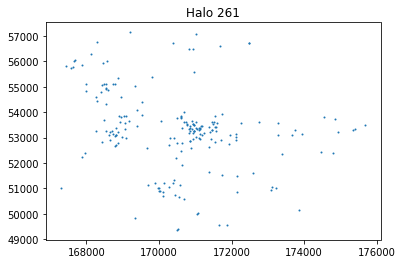

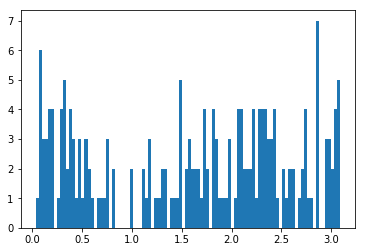

galaxies [4, 2, 1, 3, 4, 3, 3, 2, 9, 9, 4, 6, 6, 2, 5, 10, 22, 23, 38, 38]
blue galaxies counted [0, 0, 0, 0, 2, 1, 0, 0, 6, 5, 2, 4, 6, 2, 5, 7, 17, 15, 34, 32]
red galaxies counted [1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2]
red galaxies counted [3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 5, 6, 3, 4]
sum of galaxies: 194

Halo: 262
Halo Mass: 5504.6484
N Subhalos from Illustris Algorithm: 541 336.7046229839325
R500c, R200c, R200m: 0.2849685679686774 0.48359487462931056 0.5980243862498527
before dev loop: 336.7564480304718
True
566208 566208 time 336.83521699905396
N Subhalos within 5*R200m: 149 336.96547508239746


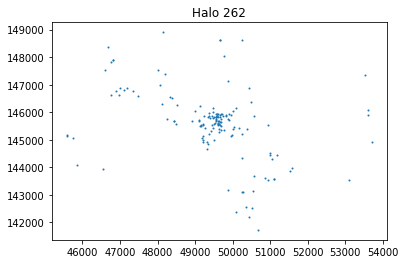

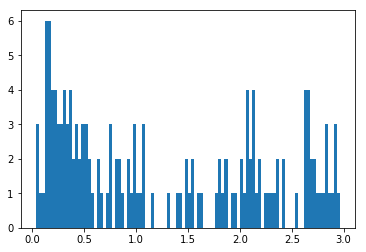

galaxies [0, 1, 0, 2, 9, 3, 7, 5, 8, 6, 10, 4, 6, 7, 10, 2, 9, 10, 22, 25]
blue galaxies counted [0, 0, 0, 0, 4, 0, 1, 1, 2, 3, 7, 1, 6, 6, 10, 2, 9, 5, 17, 25]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
red galaxies counted [0, 1, 0, 2, 4, 3, 5, 3, 5, 3, 3, 3, 0, 1, 0, 0, 0, 4, 4, 0]
sum of galaxies: 146

Halo: 263
Halo Mass: 5607.6855
N Subhalos from Illustris Algorithm: 481 337.8228759765625
R500c, R200c, R200m: 0.3161559060428514 0.4853225613796399 0.6059943247319596
before dev loop: 337.84265208244324
True
566208 566208 time 337.9113099575043
N Subhalos within 5*R200m: 235 338.413134098053


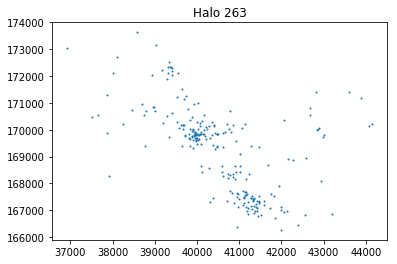

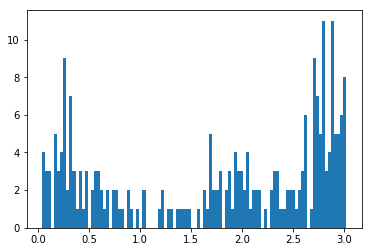

galaxies [3, 1, 3, 1, 0, 5, 5, 11, 10, 6, 4, 10, 7, 5, 3, 6, 8, 31, 25, 89]
blue galaxies counted [2, 0, 0, 0, 0, 0, 2, 4, 4, 2, 2, 4, 4, 4, 2, 5, 8, 23, 20, 47]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 7]
red galaxies counted [1, 1, 2, 1, 0, 4, 3, 6, 6, 4, 2, 5, 3, 1, 0, 1, 0, 6, 5, 35]
sum of galaxies: 233

Halo: 264
Halo Mass: 5323.262
N Subhalos from Illustris Algorithm: 300 339.2234342098236
R500c, R200c, R200m: 0.3351313352330785 0.5024352475977271 0.620847626650624
before dev loop: 339.26379799842834
True
566208 566208 time 339.3189239501953
N Subhalos within 5*R200m: 269 339.64919686317444


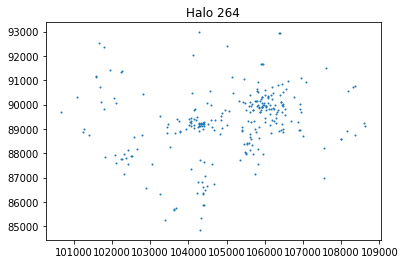

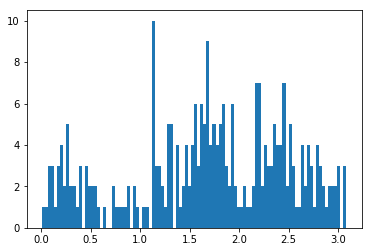

galaxies [2, 1, 2, 1, 2, 3, 4, 7, 3, 4, 7, 4, 4, 6, 15, 22, 45, 38, 58, 39]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 3, 5, 8, 22, 13, 40, 34]
red galaxies counted [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 2, 8, 2, 6, 2]
red galaxies counted [1, 1, 1, 1, 2, 2, 3, 6, 2, 4, 5, 2, 3, 3, 7, 12, 15, 23, 12, 3]
sum of galaxies: 267

Halo: 265
Halo Mass: 5447.433
N Subhalos from Illustris Algorithm: 480 340.3736951351166
R500c, R200c, R200m: 0.30706184019977817 0.4902807881515446 0.6108656367098667
before dev loop: 340.4001820087433
True
566208 566208 time 340.4577708244324
N Subhalos within 5*R200m: 187 340.6765401363373


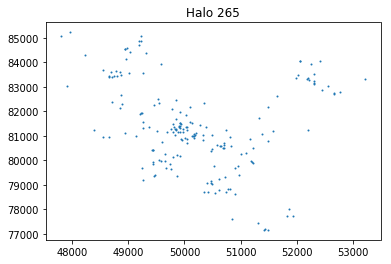

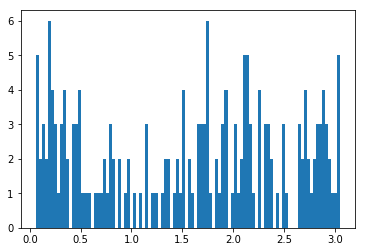

galaxies [0, 3, 2, 0, 4, 5, 6, 4, 6, 5, 9, 2, 6, 8, 5, 9, 16, 26, 32, 37]
blue galaxies counted [0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 3, 5, 5, 9, 13, 21, 23, 33]
red galaxies counted [0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1]
red galaxies counted [0, 3, 0, 0, 4, 4, 2, 3, 6, 2, 7, 2, 3, 2, 0, 0, 2, 4, 7, 3]
sum of galaxies: 185

Halo: 266
Halo Mass: 5678.0728
N Subhalos from Illustris Algorithm: 463 341.5967800617218
R500c, R200c, R200m: 0.2737970543905859 0.4370054623938552 0.6025881535720761
before dev loop: 341.6164541244507
True
566208 566208 time 341.6718399524689
N Subhalos within 5*R200m: 198 341.83976793289185


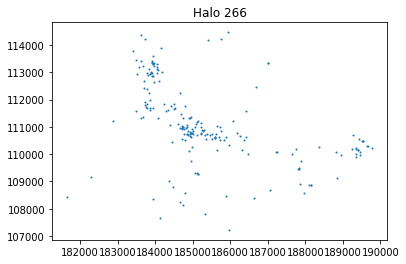

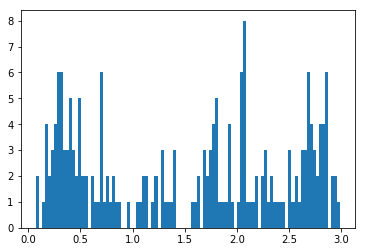

galaxies [1, 1, 0, 0, 1, 5, 3, 7, 12, 9, 10, 6, 11, 5, 6, 10, 7, 28, 29, 47]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 2, 4, 5, 3, 4, 4, 3, 4, 8, 6, 13, 21, 37]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 3]
red galaxies counted [0, 1, 0, 0, 0, 4, 1, 4, 6, 4, 7, 2, 5, 2, 2, 1, 1, 13, 8, 7]
sum of galaxies: 198

Halo: 267
Halo Mass: 5439.4043
N Subhalos from Illustris Algorithm: 462 342.60455203056335
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
before dev loop: 342.6288809776306
True
566208 566208 time 342.70669412612915
N Subhalos within 5*R200m: 311 342.94545817375183


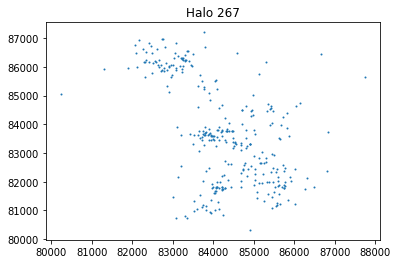

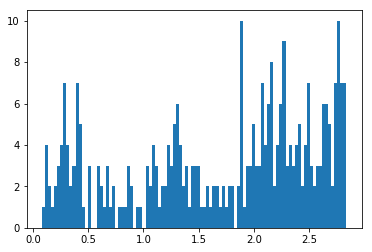

galaxies [0, 1, 0, 1, 5, 1, 3, 6, 11, 11, 7, 6, 8, 7, 9, 26, 27, 26, 69, 87]
blue galaxies counted [0, 0, 0, 1, 1, 0, 2, 1, 3, 7, 0, 2, 3, 5, 8, 18, 20, 22, 40, 43]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 1, 8, 5]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 4, 7, 3, 6, 3, 5, 2, 1, 5, 6, 3, 21, 39]
sum of galaxies: 311

Halo: 268
Halo Mass: 5499.5674
N Subhalos from Illustris Algorithm: 479 343.6858389377594
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
before dev loop: 343.70295119285583
True
566208 566208 time 343.7707359790802
N Subhalos within 5*R200m: 240 343.9653730392456


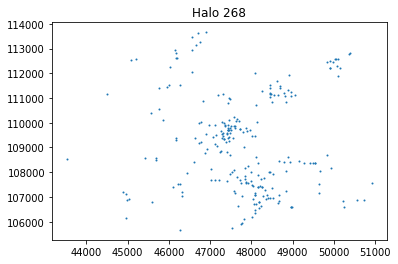

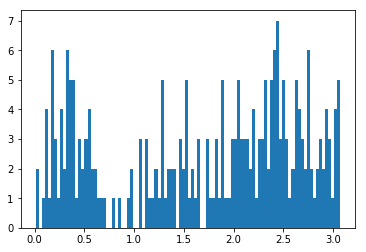

galaxies [0, 0, 2, 3, 1, 6, 4, 4, 9, 10, 8, 9, 2, 3, 8, 16, 18, 30, 52, 53]
blue galaxies counted [0, 0, 2, 0, 0, 0, 0, 1, 3, 2, 1, 4, 2, 1, 7, 11, 15, 20, 39, 43]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 4]
red galaxies counted [0, 0, 0, 2, 1, 6, 3, 2, 4, 6, 5, 5, 0, 1, 1, 4, 3, 8, 11, 6]
sum of galaxies: 238

Halo: 269
Halo Mass: 5519.6943
N Subhalos from Illustris Algorithm: 448 344.6997740268707
R500c, R200c, R200m: 0.2781625911266835 0.4976824375959751 0.6182774949394052
before dev loop: 344.72213220596313
True
566208 566208 time 344.78139901161194
N Subhalos within 5*R200m: 173 344.94682788848877


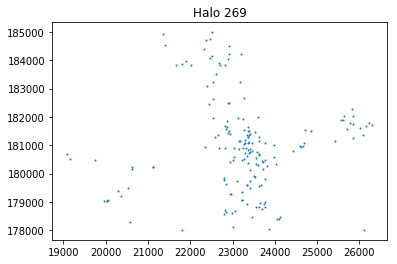

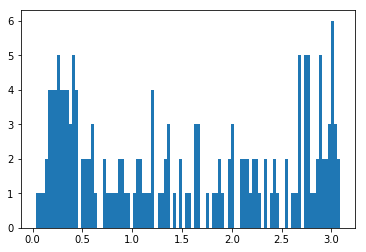

galaxies [0, 1, 0, 2, 2, 6, 5, 8, 8, 10, 5, 8, 3, 8, 8, 12, 11, 12, 17, 46]
blue galaxies counted [0, 0, 0, 1, 0, 3, 1, 3, 3, 7, 4, 5, 3, 5, 8, 12, 8, 11, 15, 40]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2]
red galaxies counted [0, 1, 0, 1, 2, 2, 2, 4, 4, 3, 1, 2, 0, 1, 0, 0, 2, 1, 2, 4]
sum of galaxies: 172

Halo: 270
Halo Mass: 5383.034
N Subhalos from Illustris Algorithm: 455 345.7404451370239
R500c, R200c, R200m: 0.31657816941903255 0.4779418499532936 0.6076007070945356
before dev loop: 345.753870010376
True
566208 566208 time 345.83097314834595
N Subhalos within 5*R200m: 145 346.0780100822449


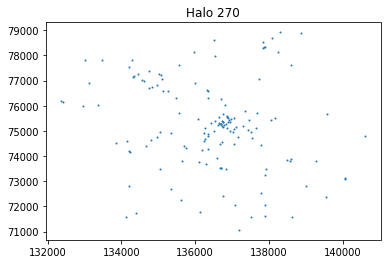

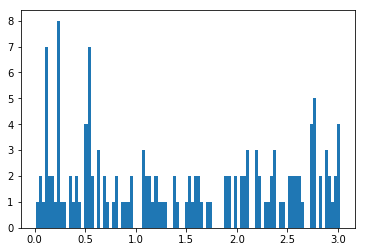

galaxies [1, 0, 2, 7, 1, 2, 4, 6, 1, 5, 5, 11, 4, 6, 8, 8, 11, 9, 20, 32]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 6, 3, 2, 5, 7, 11, 9, 18, 28]
red galaxies counted [0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
red galaxies counted [1, 0, 1, 4, 0, 1, 2, 2, 1, 2, 2, 5, 1, 4, 2, 1, 0, 0, 1, 3]
sum of galaxies: 143

Halo: 271
Halo Mass: 5389.583
N Subhalos from Illustris Algorithm: 358 347.0451748371124
R500c, R200c, R200m: 0.3341747320340112 0.4989794337181028 0.6199474920452618
before dev loop: 347.07998514175415
True
566208 566208 time 347.1347301006317
N Subhalos within 5*R200m: 163 347.3758690357208


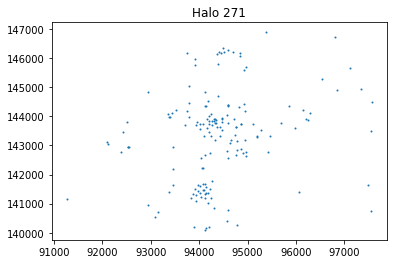

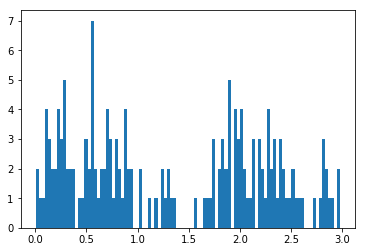

galaxies [1, 0, 3, 2, 3, 2, 5, 6, 5, 4, 4, 14, 11, 13, 3, 8, 4, 29, 30, 13]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 3, 6, 5, 3, 2, 5, 1, 13, 20, 13]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]
red galaxies counted [1, 0, 3, 2, 1, 2, 5, 5, 4, 2, 1, 8, 6, 10, 1, 3, 2, 14, 10, 0]
sum of galaxies: 160

Halo: 272
Halo Mass: 5259.524
N Subhalos from Illustris Algorithm: 311 348.2445430755615
R500c, R200c, R200m: 0.33258084042027325 0.5004950579793465 0.6157250984901582
before dev loop: 348.28033900260925
True
566208 566208 time 348.3389301300049
N Subhalos within 5*R200m: 229 348.537770986557


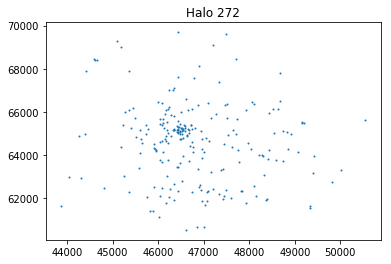

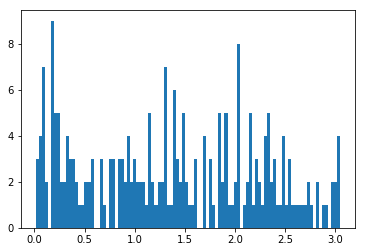

galaxies [3, 5, 3, 1, 0, 9, 7, 6, 5, 8, 4, 5, 9, 12, 17, 22, 22, 28, 36, 23]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 13, 16, 11, 20, 29, 18]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0]
red galaxies counted [3, 5, 3, 0, 0, 7, 6, 6, 5, 8, 4, 5, 5, 7, 4, 4, 11, 6, 6, 5]
sum of galaxies: 225

Halo: 273
Halo Mass: 5389.974
N Subhalos from Illustris Algorithm: 438 349.28013706207275
R500c, R200c, R200m: 0.29426496792914525 0.47707726594077793 0.6095587520782423
before dev loop: 349.31227803230286
True
566208 566208 time 349.3653190135956
N Subhalos within 5*R200m: 182 349.48516488075256


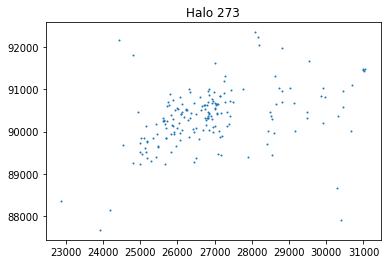

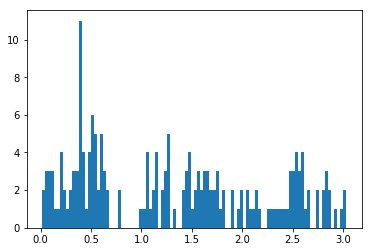

galaxies [2, 1, 3, 1, 2, 1, 5, 2, 5, 17, 11, 15, 3, 2, 10, 14, 24, 15, 17, 29]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 4, 8, 2, 2, 7, 10, 12, 13, 16, 24]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1]
red galaxies counted [2, 1, 2, 1, 2, 1, 3, 2, 5, 12, 6, 7, 1, 0, 3, 2, 10, 1, 0, 4]
sum of galaxies: 179

Halo: 274
Halo Mass: 5345.135
N Subhalos from Illustris Algorithm: 356 350.2091019153595
R500c, R200c, R200m: 0.33844096331340184 0.5040789821034627 0.6168772900015586
before dev loop: 350.2278492450714
True
566208 566208 time 350.2829658985138
N Subhalos within 5*R200m: 108 350.3602159023285


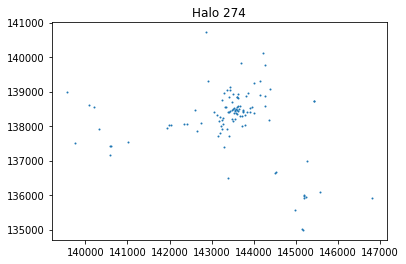

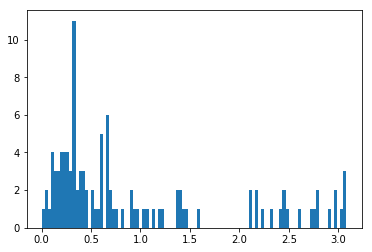

galaxies [0, 1, 2, 2, 3, 6, 2, 8, 15, 6, 4, 7, 10, 4, 4, 6, 3, 0, 10, 12]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 2, 7, 1, 2, 1, 2, 2, 4, 4, 1, 0, 8, 12]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
red galaxies counted [0, 0, 2, 2, 3, 3, 2, 6, 7, 5, 2, 6, 8, 2, 0, 1, 1, 0, 1, 0]
sum of galaxies: 105

Halo: 275
Halo Mass: 5376.894
N Subhalos from Illustris Algorithm: 465 351.0441861152649
R500c, R200c, R200m: 0.2992797033292063 0.45184551290910485 0.5596323081804776
before dev loop: 351.0583930015564
True
566208 566208 time 351.12389492988586
N Subhalos within 5*R200m: 146 351.24154806137085


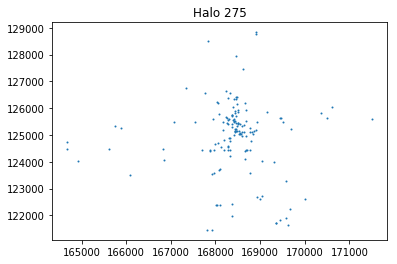

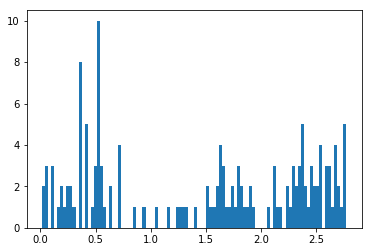

galaxies [2, 1, 0, 3, 0, 1, 3, 3, 2, 8, 6, 17, 5, 2, 2, 3, 6, 22, 15, 43]
blue galaxies counted [1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 3, 12, 2, 2, 2, 2, 6, 18, 15, 38]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2]
red galaxies counted [1, 1, 0, 3, 0, 0, 1, 1, 1, 6, 3, 5, 3, 0, 0, 1, 0, 2, 0, 3]
sum of galaxies: 144

Halo: 276
Halo Mass: 5381.3813
N Subhalos from Illustris Algorithm: 398 352.01123809814453
R500c, R200c, R200m: 0.33402358196273635 0.5072069938949929 0.625016334006395
before dev loop: 352.0435359477997
True
566208 566208 time 352.09107303619385
N Subhalos within 5*R200m: 159 352.2022008895874


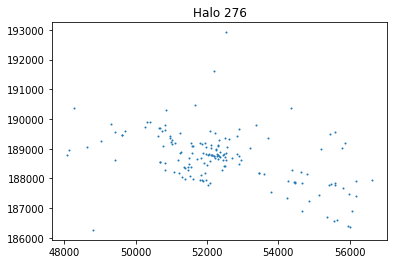

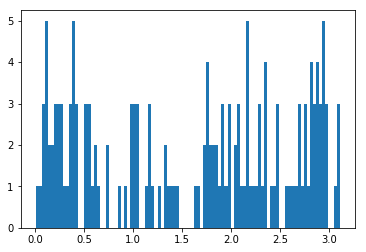

galaxies [0, 2, 4, 2, 2, 3, 4, 4, 5, 7, 4, 7, 2, 2, 12, 8, 5, 24, 22, 38]
blue galaxies counted [0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 7, 7, 5, 21, 20, 31]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3]
red galaxies counted [0, 1, 3, 2, 2, 3, 1, 1, 4, 4, 4, 5, 1, 0, 3, 0, 0, 3, 0, 4]
sum of galaxies: 157

Halo: 277
Halo Mass: 5600.926
N Subhalos from Illustris Algorithm: 518 352.97699189186096
R500c, R200c, R200m: 0.2993254226727094 0.4693956155432295 0.5845258101322403
before dev loop: 353.01683592796326
True
566208 566208 time 353.0690379142761
N Subhalos within 5*R200m: 290 353.2116770744324


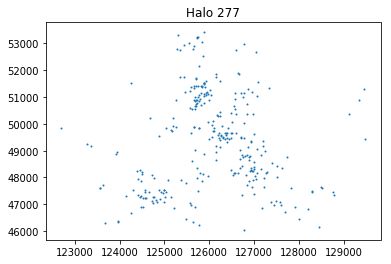

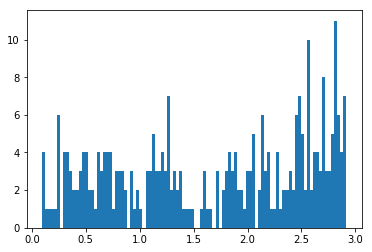

galaxies [0, 0, 2, 2, 2, 0, 2, 6, 7, 7, 10, 9, 17, 12, 12, 31, 13, 26, 39, 93]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 6, 6, 11, 4, 6, 20, 10, 22, 26, 58]
red galaxies counted [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 7]
red galaxies counted [0, 0, 1, 2, 0, 0, 2, 5, 5, 6, 4, 3, 6, 7, 5, 8, 3, 4, 11, 28]
sum of galaxies: 290

Halo: 278
Halo Mass: 5279.9526
N Subhalos from Illustris Algorithm: 422 353.92545914649963
R500c, R200c, R200m: 0.32317306461600015 0.4898204720293041 0.6010592378729663
before dev loop: 353.9452600479126
True
566208 566208 time 354.00796723365784
N Subhalos within 5*R200m: 130 354.0696611404419


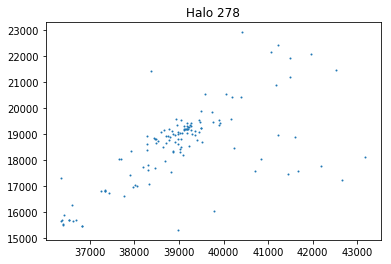

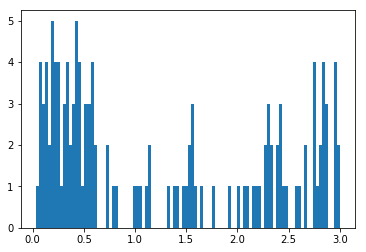

galaxies [4, 0, 2, 1, 4, 5, 5, 6, 6, 8, 8, 12, 2, 2, 4, 4, 10, 3, 18, 25]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 4, 5, 4, 6, 0, 0, 4, 4, 8, 3, 18, 21]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3]
red galaxies counted [4, 0, 2, 1, 3, 3, 3, 3, 1, 3, 4, 6, 2, 2, 0, 0, 1, 0, 0, 1]
sum of galaxies: 129

Halo: 279
Halo Mass: 5378.4937
N Subhalos from Illustris Algorithm: 429 354.84412717819214
R500c, R200c, R200m: 0.3139084920443983 0.4986738507505379 0.618305438986485
before dev loop: 354.8660011291504
True
566208 566208 time 354.96280217170715
N Subhalos within 5*R200m: 144 355.0491349697113


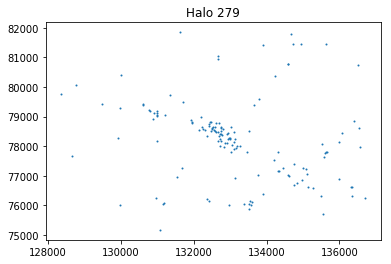

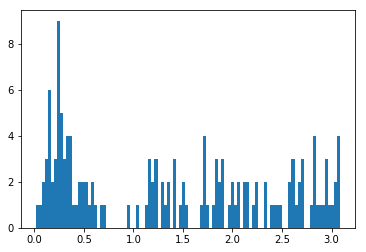

galaxies [0, 0, 2, 3, 5, 3, 9, 9, 8, 4, 6, 4, 2, 1, 3, 15, 6, 19, 13, 30]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 3, 10, 6, 17, 11, 28]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0]
red galaxies counted [0, 0, 2, 2, 4, 2, 8, 6, 5, 3, 5, 1, 0, 0, 0, 3, 0, 0, 1, 2]
sum of galaxies: 142

Halo: 280
Halo Mass: 5505.645
N Subhalos from Illustris Algorithm: 588 355.89409708976746
R500c, R200c, R200m: 0.19791375347732323 0.32895834310222943 0.4712515326414051
before dev loop: 355.93144488334656
True
566208 566208 time 355.981703042984
N Subhalos within 5*R200m: 157 356.0745940208435


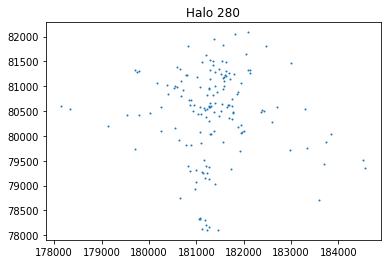

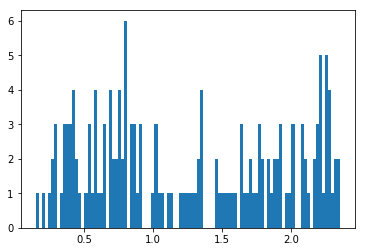

galaxies [0, 0, 0, 0, 0, 1, 0, 1, 2, 4, 8, 9, 9, 11, 21, 9, 8, 14, 24, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 5, 4, 9, 15, 4, 5, 12, 21, 28]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 1, 3, 2, 6, 4, 2, 2, 2, 7]
sum of galaxies: 157

Halo: 281
Halo Mass: 5205.5664
N Subhalos from Illustris Algorithm: 444 356.74170207977295
R500c, R200c, R200m: 0.2867492803498911 0.4828415463572459 0.6001194691607145
before dev loop: 356.7628619670868
True
566208 566208 time 356.8234510421753
N Subhalos within 5*R200m: 171 356.9278829097748


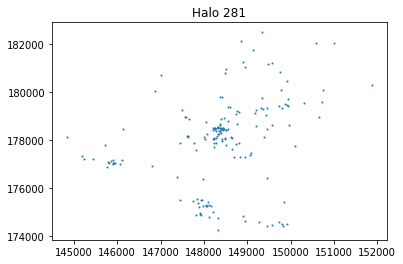

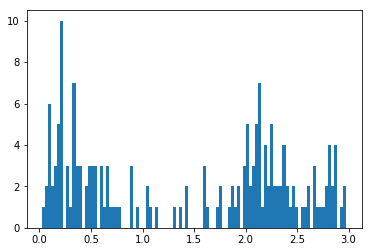

galaxies [2, 0, 4, 3, 3, 3, 13, 2, 8, 7, 7, 8, 6, 4, 4, 3, 6, 17, 42, 28]
blue galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 4, 4, 3, 3, 4, 2, 6, 14, 29, 21]
red galaxies counted [2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 4, 2]
red galaxies counted [0, 0, 4, 3, 1, 2, 9, 2, 5, 5, 3, 3, 3, 0, 0, 1, 0, 1, 9, 5]
sum of galaxies: 170

Halo: 282
Halo Mass: 5251.289
N Subhalos from Illustris Algorithm: 438 357.7119641304016
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
before dev loop: 357.7489709854126
True
566208 566208 time 357.8006670475006
N Subhalos within 5*R200m: 231 357.90637397766113


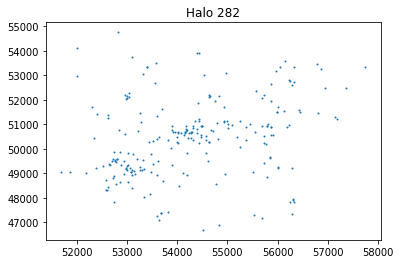

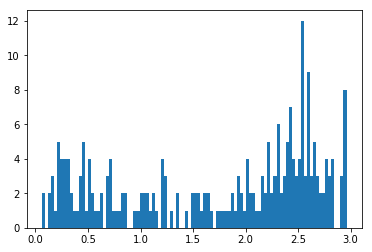

galaxies [1, 1, 0, 0, 2, 4, 5, 6, 6, 6, 8, 7, 9, 7, 10, 11, 12, 17, 47, 72]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 2, 3, 2, 6, 11, 11, 14, 35, 48]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 3]
red galaxies counted [0, 1, 0, 0, 2, 3, 3, 4, 5, 5, 5, 5, 4, 5, 3, 0, 1, 2, 10, 21]
sum of galaxies: 231

Halo: 283
Halo Mass: 5127.922
N Subhalos from Illustris Algorithm: 363 358.64758491516113
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
before dev loop: 358.6676609516144
True
566208 566208 time 358.72735714912415
N Subhalos within 5*R200m: 100 358.7844588756561


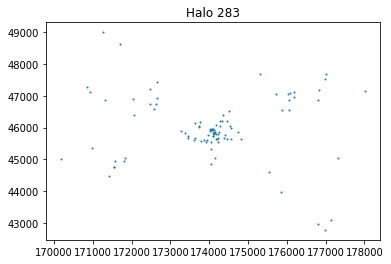

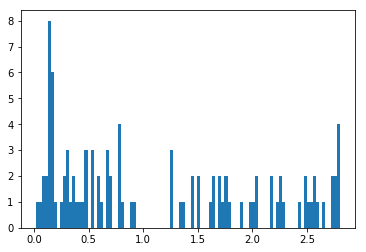

galaxies [1, 2, 0, 2, 8, 6, 1, 3, 4, 3, 5, 6, 5, 6, 1, 4, 7, 9, 10, 16]
blue galaxies counted [0, 0, 0, 0, 5, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 4, 7, 6, 10, 14]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1]
red galaxies counted [1, 1, 0, 2, 3, 3, 0, 3, 3, 2, 4, 4, 4, 4, 1, 0, 0, 0, 0, 1]
sum of galaxies: 99

Halo: 284
Halo Mass: 5596.1426
N Subhalos from Illustris Algorithm: 556 359.4822299480438
R500c, R200c, R200m: 0.22499283621734584 0.3673609702495494 0.46257502612647317
before dev loop: 359.50495505332947
True
566208 566208 time 359.567223072052
N Subhalos within 5*R200m: 125 359.6447331905365


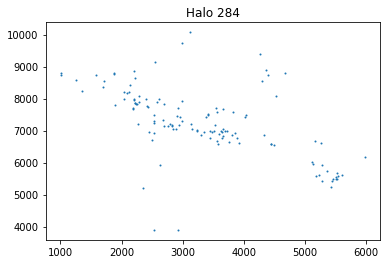

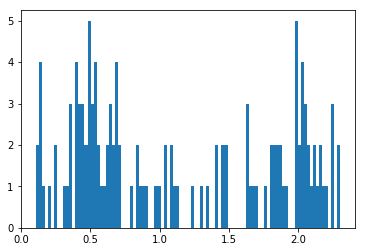

galaxies [0, 0, 0, 0, 1, 5, 1, 1, 2, 1, 5, 13, 13, 14, 4, 6, 5, 8, 15, 31]
blue galaxies counted [0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 7, 2, 6, 2, 6, 5, 6, 15, 26]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 5, 11, 7, 2, 0, 0, 1, 0, 2]
sum of galaxies: 125

Halo: 285
Halo Mass: 5178.5127
N Subhalos from Illustris Algorithm: 436 360.42096614837646
R500c, R200c, R200m: 0.30751144710626815 0.48629928189053756 0.6035193148772762
before dev loop: 360.4383189678192
True
566208 566208 time 360.5027689933777
N Subhalos within 5*R200m: 256 360.56843304634094


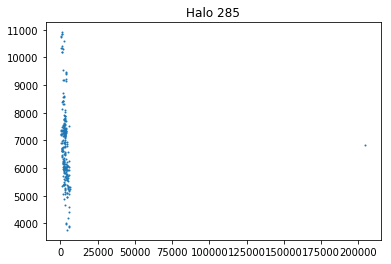

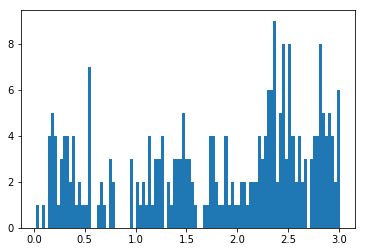

galaxies [0, 0, 1, 0, 4, 4, 5, 4, 8, 7, 3, 8, 7, 2, 11, 16, 24, 22, 59, 70]
blue galaxies counted [0, 0, 0, 0, 1, 2, 1, 2, 3, 1, 2, 4, 5, 2, 8, 11, 16, 19, 29, 46]
red galaxies counted [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 7, 5]
red galaxies counted [0, 0, 0, 0, 2, 2, 4, 2, 5, 6, 1, 4, 2, 0, 3, 4, 4, 1, 23, 19]
sum of galaxies: 255

Halo: 286
Halo Mass: 5479.643
N Subhalos from Illustris Algorithm: 466 361.39759516716003
R500c, R200c, R200m: 0.34696918222033424 0.512538381788432 0.6223428333416517
before dev loop: 361.4103789329529
True
566208 566208 time 361.46811985969543
N Subhalos within 5*R200m: 233 361.57191014289856


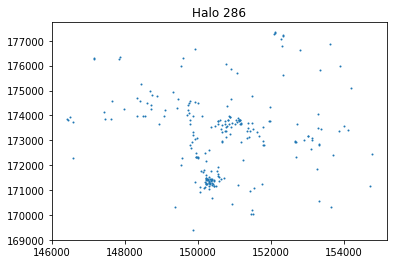

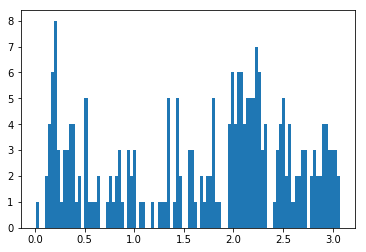

galaxies [0, 0, 1, 2, 3, 8, 8, 4, 6, 7, 8, 4, 3, 10, 7, 10, 17, 39, 52, 43]
blue galaxies counted [0, 0, 0, 0, 0, 3, 5, 2, 2, 3, 4, 4, 2, 8, 6, 8, 14, 24, 40, 37]
red galaxies counted [0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 3]
red galaxies counted [0, 0, 1, 1, 2, 3, 2, 2, 4, 4, 4, 0, 1, 2, 1, 1, 3, 13, 11, 3]
sum of galaxies: 232

Halo: 287
Halo Mass: 5378.2646
N Subhalos from Illustris Algorithm: 462 362.3300051689148
R500c, R200c, R200m: 0.3080054722365906 0.47901721535245007 0.5991632462889356
before dev loop: 362.3514289855957
True
566208 566208 time 362.40705704689026
N Subhalos within 5*R200m: 158 362.4710099697113


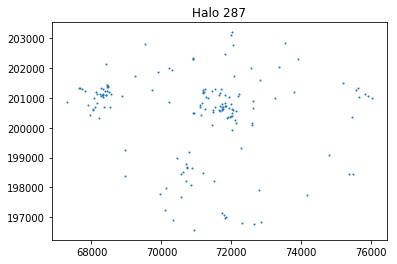

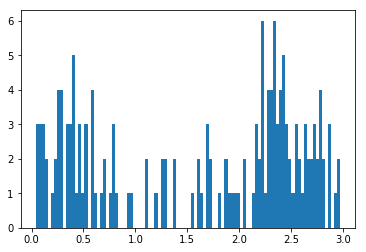

galaxies [0, 2, 2, 2, 2, 0, 2, 7, 4, 9, 5, 8, 3, 5, 4, 5, 6, 12, 43, 34]
blue galaxies counted [0, 1, 0, 1, 0, 0, 1, 5, 1, 1, 3, 5, 0, 3, 4, 3, 2, 9, 26, 33]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 3, 0]
red galaxies counted [0, 0, 2, 1, 1, 0, 1, 2, 3, 8, 2, 3, 3, 0, 0, 1, 3, 2, 14, 1]
sum of galaxies: 155

Halo: 288
Halo Mass: 5408.1255
N Subhalos from Illustris Algorithm: 479 363.2095820903778
R500c, R200c, R200m: 0.2760909884215701 0.4315185406567124 0.5462356197416879
before dev loop: 363.2348220348358
True
566208 566208 time 363.3016109466553
N Subhalos within 5*R200m: 139 363.3873481750488


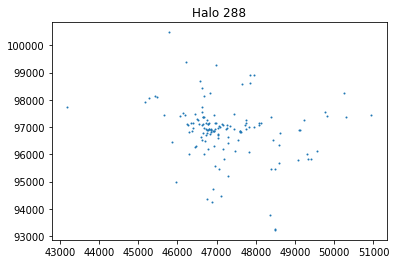

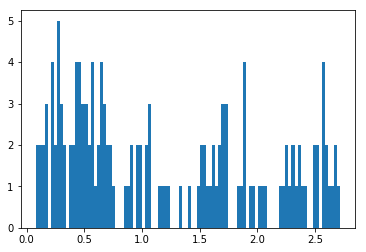

galaxies [0, 1, 1, 0, 3, 3, 3, 4, 8, 2, 12, 11, 12, 4, 8, 9, 5, 16, 13, 24]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 4, 6, 7, 1, 7, 6, 4, 16, 12, 23]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [0, 1, 1, 0, 1, 2, 3, 4, 5, 1, 6, 5, 4, 3, 1, 3, 1, 0, 0, 0]
sum of galaxies: 139

Halo: 289
Halo Mass: 5268.219
N Subhalos from Illustris Algorithm: 453 364.0440649986267
R500c, R200c, R200m: 0.2947966054265615 0.4896038456127583 0.6121466590858843
before dev loop: 364.07260298728943
True
566208 566208 time 364.12152314186096
N Subhalos within 5*R200m: 153 364.19810795783997


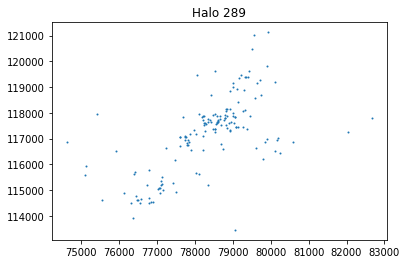

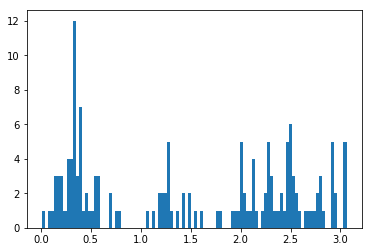

galaxies [0, 1, 0, 1, 3, 3, 4, 6, 14, 11, 4, 6, 3, 1, 2, 13, 6, 12, 34, 28]
blue galaxies counted [0, 1, 0, 0, 0, 1, 1, 2, 8, 5, 3, 3, 1, 1, 2, 13, 5, 9, 24, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 5, 0]
red galaxies counted [0, 0, 0, 1, 3, 2, 2, 4, 5, 5, 0, 3, 2, 0, 0, 0, 1, 2, 5, 3]
sum of galaxies: 152

Halo: 290
Halo Mass: 5283.744
N Subhalos from Illustris Algorithm: 381 364.8950660228729
R500c, R200c, R200m: 0.3402003973836944 0.5073458333724612 0.615679259043301
before dev loop: 364.91238594055176
True
566208 566208 time 364.97144412994385
N Subhalos within 5*R200m: 182 365.0440490245819


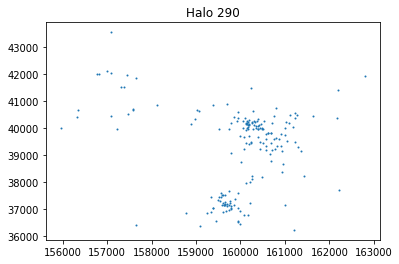

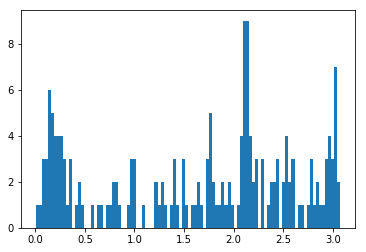

galaxies [1, 2, 1, 3, 6, 6, 6, 6, 4, 2, 3, 2, 3, 6, 7, 10, 10, 20, 44, 38]
blue galaxies counted [0, 1, 0, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 6, 7, 10, 9, 16, 22, 27]
red galaxies counted [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2]
red galaxies counted [0, 0, 1, 0, 3, 4, 4, 4, 1, 0, 2, 0, 2, 0, 0, 0, 1, 3, 17, 9]
sum of galaxies: 180

Halo: 291
Halo Mass: 5222.8936
N Subhalos from Illustris Algorithm: 367 365.6955769062042
R500c, R200c, R200m: 0.3321537528926979 0.49330671209199517 0.6024639266693702
before dev loop: 365.72806000709534
True
566208 566208 time 365.81057715415955
N Subhalos within 5*R200m: 149 365.8639259338379


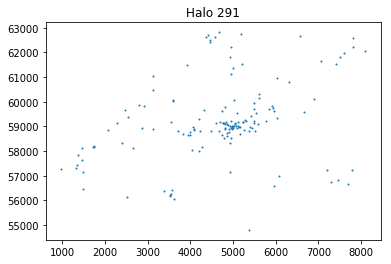

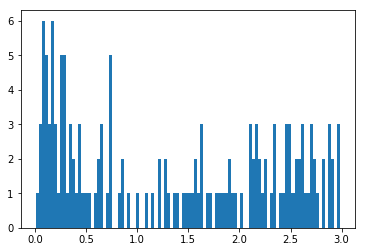

galaxies [1, 3, 6, 2, 2, 7, 3, 7, 5, 5, 5, 4, 9, 4, 2, 7, 11, 11, 22, 29]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 3, 1, 5, 11, 11, 20, 27]
red galaxies counted [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [1, 2, 6, 0, 2, 4, 2, 5, 5, 5, 3, 2, 7, 1, 1, 2, 0, 0, 1, 1]
sum of galaxies: 145

Halo: 292
Halo Mass: 5284.3813
N Subhalos from Illustris Algorithm: 461 366.53157591819763
R500c, R200c, R200m: 0.2685630703174121 0.42750556731690204 0.5359166598234651
before dev loop: 366.5534071922302
True
566208 566208 time 366.61461114883423
N Subhalos within 5*R200m: 188 366.6869411468506


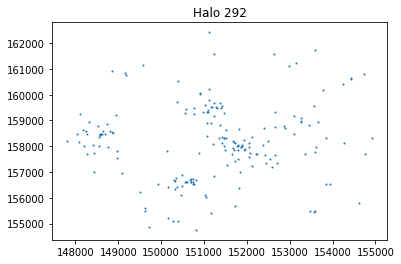

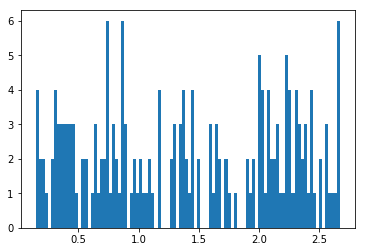

galaxies [0, 0, 0, 0, 0, 4, 3, 2, 4, 8, 11, 5, 7, 15, 14, 11, 19, 15, 28, 42]
blue galaxies counted [0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 3, 3, 12, 6, 11, 14, 11, 16, 36]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 3, 2]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 4, 7, 2, 4, 1, 7, 0, 3, 3, 9, 4]
sum of galaxies: 188

Halo: 293
Halo Mass: 5212.3135
N Subhalos from Illustris Algorithm: 381 367.4486470222473
R500c, R200c, R200m: 0.3334798540609961 0.5058882991002044 0.6142056309215799
before dev loop: 367.4700620174408
True
566208 566208 time 367.54190397262573
N Subhalos within 5*R200m: 116 367.5991871356964


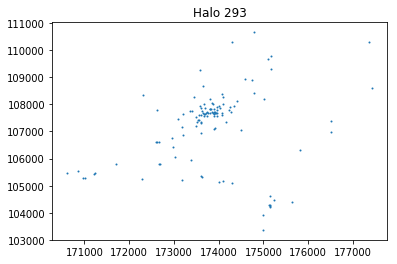

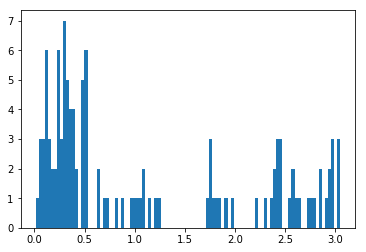

galaxies [2, 1, 3, 5, 3, 2, 5, 9, 10, 9, 11, 2, 2, 2, 6, 3, 0, 9, 11, 19]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 3, 2, 4, 6, 2, 2, 1, 5, 3, 0, 7, 6, 16]
red galaxies counted [1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
red galaxies counted [1, 0, 3, 4, 2, 0, 3, 4, 8, 5, 5, 0, 0, 1, 1, 0, 0, 1, 4, 2]
sum of galaxies: 114

Halo: 294
Halo Mass: 5394.892
N Subhalos from Illustris Algorithm: 482 368.3636109828949
R500c, R200c, R200m: 0.25684166353206417 0.3954064646292331 0.4942719026808885
before dev loop: 368.3805501461029
True
566208 566208 time 368.43689584732056
N Subhalos within 5*R200m: 157 368.52359795570374


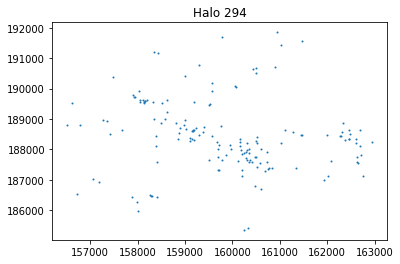

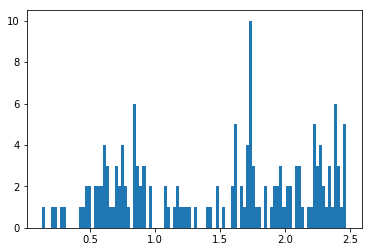

galaxies [0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 5, 10, 14, 17, 5, 8, 13, 36, 43]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 9, 8, 2, 6, 11, 29, 32]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 3, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 7, 4, 8, 3, 2, 2, 4, 7]
sum of galaxies: 157

Halo: 295
Halo Mass: 5240.626
N Subhalos from Illustris Algorithm: 432 369.21181201934814
R500c, R200c, R200m: 0.3013897391076673 0.47613821784865124 0.5945560415869391
before dev loop: 369.23804998397827
True
566208 566208 time 369.3004047870636
N Subhalos within 5*R200m: 104 369.352196931839


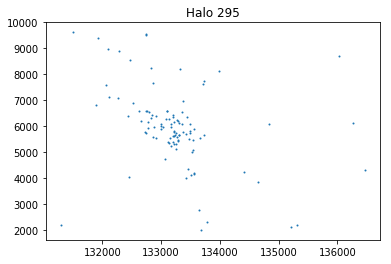

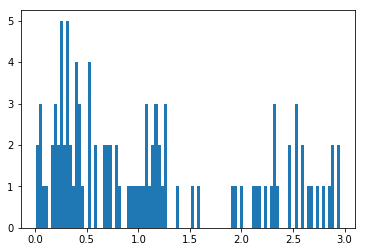

galaxies [0, 0, 2, 0, 1, 2, 3, 7, 7, 8, 2, 6, 6, 4, 9, 11, 3, 3, 9, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 5, 0, 2, 1, 2, 6, 10, 3, 3, 9, 16]
red galaxies counted [0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 2, 2, 5, 6, 3, 2, 3, 5, 2, 2, 1, 0, 0, 0, 0]
sum of galaxies: 99

Halo: 296
Halo Mass: 5273.228
N Subhalos from Illustris Algorithm: 498 370.2846429347992
R500c, R200c, R200m: 0.26815423849967684 0.4309768745292195 0.5593085495719754
before dev loop: 370.33152198791504
True
566208 566208 time 370.4281630516052
N Subhalos within 5*R200m: 156 370.546010017395


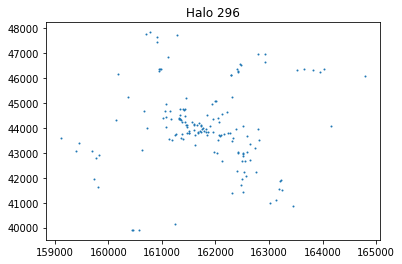

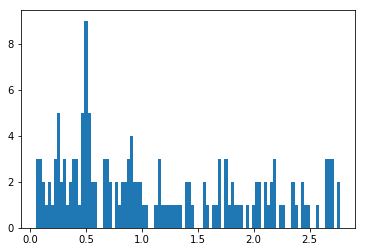

galaxies [1, 2, 1, 2, 1, 1, 3, 8, 5, 5, 8, 18, 9, 7, 15, 9, 8, 17, 16, 19]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 11, 5, 5, 10, 7, 8, 14, 15, 19]
red galaxies counted [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0]
red galaxies counted [0, 2, 1, 1, 0, 1, 2, 5, 4, 5, 4, 7, 4, 1, 4, 2, 0, 1, 1, 0]
sum of galaxies: 155

Halo: 297
Halo Mass: 5298.513
N Subhalos from Illustris Algorithm: 557 371.54287099838257
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
before dev loop: 371.58211183547974
True
566208 566208 time 371.69808411598206
N Subhalos within 5*R200m: 149 371.83774304389954


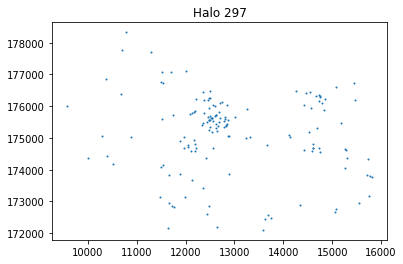

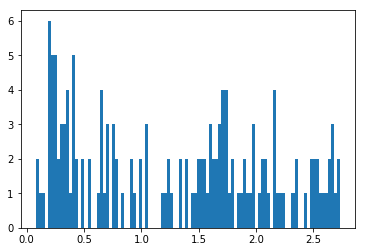

galaxies [0, 1, 1, 0, 2, 0, 8, 8, 5, 8, 7, 4, 6, 9, 5, 7, 9, 27, 21, 21]
blue galaxies counted [0, 0, 0, 0, 1, 0, 3, 1, 3, 5, 3, 1, 5, 3, 4, 6, 9, 16, 19, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 3, 1, 4]
red galaxies counted [0, 1, 1, 0, 1, 0, 4, 5, 1, 3, 3, 3, 0, 4, 1, 0, 0, 8, 1, 1]
sum of galaxies: 149

Halo: 298
Halo Mass: 5065.933
N Subhalos from Illustris Algorithm: 387 372.83021807670593
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
before dev loop: 372.9004030227661
True
566208 566208 time 372.96875
N Subhalos within 5*R200m: 176 373.1087279319763


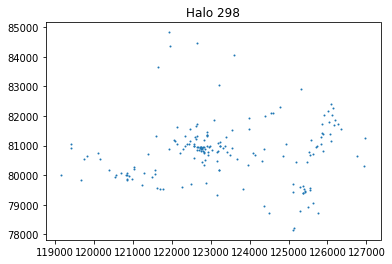

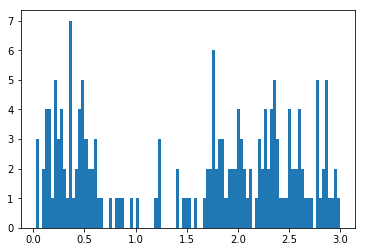

galaxies [0, 1, 1, 2, 4, 3, 5, 7, 3, 9, 13, 7, 3, 3, 2, 4, 6, 33, 31, 36]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 7, 1, 1, 3, 1, 4, 5, 25, 26, 32]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 1, 1, 0, 4, 3, 4, 6, 2, 5, 4, 5, 2, 0, 1, 0, 1, 7, 3, 4]
sum of galaxies: 173

Halo: 299
Halo Mass: 5121.6265
N Subhalos from Illustris Algorithm: 392 374.29690313339233
R500c, R200c, R200m: 0.3265473683525663 0.49782311865820794 0.6106951700157894
before dev loop: 374.3329780101776
True
566208 566208 time 374.38133692741394
N Subhalos within 5*R200m: 123 374.4822361469269


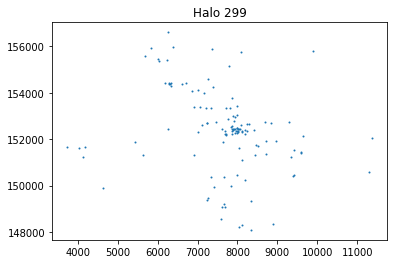

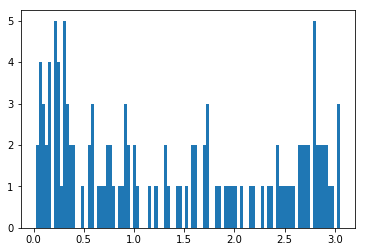

galaxies [2, 2, 2, 0, 4, 2, 6, 4, 8, 4, 1, 5, 7, 6, 6, 4, 7, 12, 9, 29]
blue galaxies counted [0, 0, 0, 0, 1, 0, 4, 1, 4, 4, 1, 1, 3, 3, 4, 3, 6, 12, 8, 24]
red galaxies counted [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
red galaxies counted [1, 1, 2, 0, 3, 2, 2, 2, 3, 0, 0, 4, 3, 3, 2, 1, 1, 0, 0, 5]
sum of galaxies: 120

Halo: 300
Halo Mass: 5181.306
N Subhalos from Illustris Algorithm: 481 375.58982491493225
R500c, R200c, R200m: 0.31654187818883506 0.4970549376046725 0.6108734834623418
before dev loop: 375.6322269439697
True
566208 566208 time 375.7193241119385
N Subhalos within 5*R200m: 134 375.84879207611084


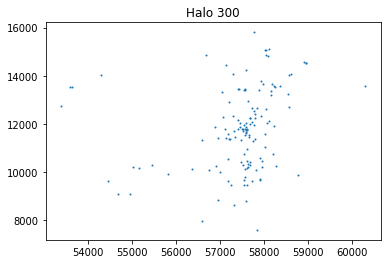

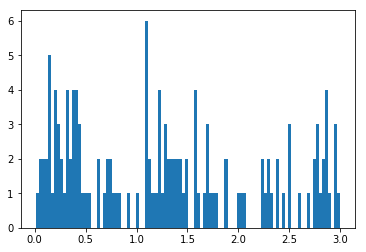

galaxies [0, 2, 1, 1, 5, 1, 5, 5, 6, 8, 5, 3, 5, 4, 9, 17, 14, 9, 10, 21]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 2, 3, 3, 2, 2, 4, 4, 7, 12, 12, 8, 8, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 1, 4, 1, 2, 3, 3, 4, 3, 1, 1, 0, 2, 4, 2, 1, 2, 2]
sum of galaxies: 131

Halo: 301
Halo Mass: 5123.1665
N Subhalos from Illustris Algorithm: 416 376.71286487579346
R500c, R200c, R200m: 0.3234787276524679 0.4974740182419671 0.603429157292715
before dev loop: 376.73550820350647
True
566208 566208 time 376.7977702617645
N Subhalos within 5*R200m: 133 376.8850431442261


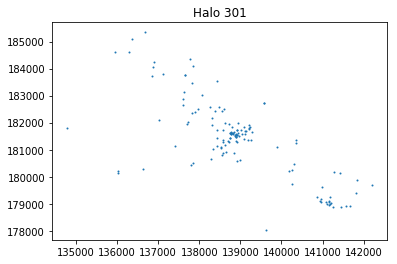

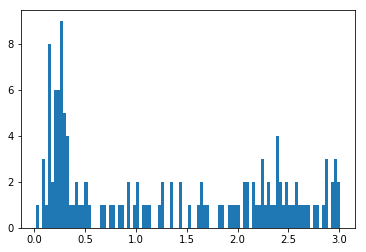

galaxies [0, 1, 3, 0, 8, 3, 7, 14, 9, 2, 4, 2, 3, 5, 6, 5, 7, 7, 24, 22]
blue galaxies counted [0, 0, 1, 0, 3, 2, 3, 8, 6, 1, 2, 1, 3, 5, 6, 5, 7, 7, 15, 18]
red galaxies counted [0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [0, 1, 2, 0, 2, 0, 4, 5, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 8, 3]
sum of galaxies: 132

Halo: 302
Halo Mass: 5081.5635
N Subhalos from Illustris Algorithm: 305 377.592618227005
R500c, R200c, R200m: 0.31142261283615874 0.48302834710749587 0.6019721835027778
before dev loop: 377.6093940734863
True
566208 566208 time 377.673024892807
N Subhalos within 5*R200m: 102 377.7743179798126


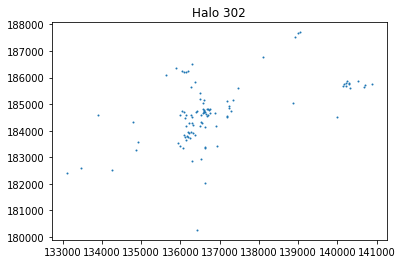

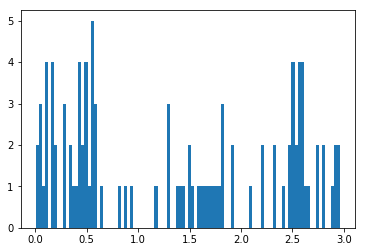

galaxies [1, 1, 2, 2, 0, 6, 0, 1, 3, 3, 11, 8, 1, 2, 1, 5, 9, 9, 8, 25]
blue galaxies counted [1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 3, 4, 1, 2, 1, 3, 8, 9, 6, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
red galaxies counted [0, 1, 2, 1, 0, 5, 0, 0, 1, 2, 7, 3, 0, 0, 0, 1, 1, 0, 2, 4]
sum of galaxies: 98

Halo: 304
Halo Mass: 5006.5566
N Subhalos from Illustris Algorithm: 427 378.5734748840332
R500c, R200c, R200m: 0.30545521763049377 0.46346975608089586 0.5816454514570938
before dev loop: 378.61537289619446
True
566208 566208 time 378.6698760986328
N Subhalos within 5*R200m: 162 378.9315550327301


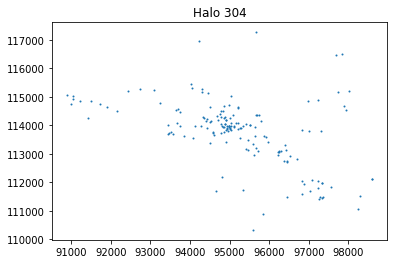

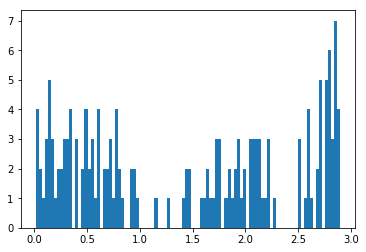

galaxies [1, 1, 0, 3, 5, 3, 2, 5, 5, 5, 6, 9, 9, 8, 5, 2, 7, 19, 21, 41]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 5, 7, 4, 2, 7, 17, 17, 39]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2]
red galaxies counted [1, 0, 0, 3, 5, 2, 1, 4, 4, 4, 3, 6, 4, 1, 1, 0, 0, 2, 3, 0]
sum of galaxies: 157

Halo: 305
Halo Mass: 5160.0137
N Subhalos from Illustris Algorithm: 485 379.8282878398895
R500c, R200c, R200m: 0.3141987418170756 0.47801114958867347 0.5914917646420437
before dev loop: 379.8827919960022
True
566208 566208 time 379.9459800720215
N Subhalos within 5*R200m: 142 380.1459300518036


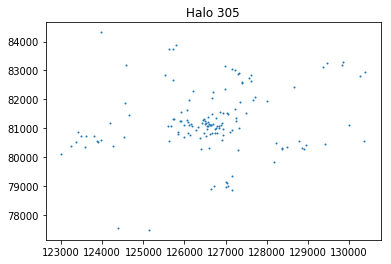

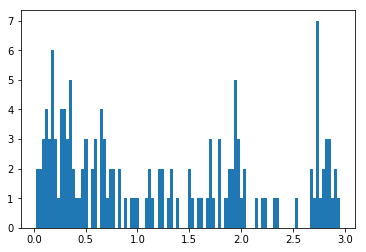

galaxies [1, 4, 0, 3, 4, 6, 3, 4, 8, 8, 6, 5, 10, 5, 4, 10, 6, 21, 8, 24]
blue galaxies counted [0, 1, 0, 0, 2, 1, 2, 0, 4, 4, 2, 3, 6, 2, 3, 8, 5, 13, 8, 17]
red galaxies counted [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 3, 0, 1]
red galaxies counted [1, 2, 0, 3, 2, 4, 0, 3, 3, 3, 4, 0, 4, 3, 1, 2, 0, 5, 0, 6]
sum of galaxies: 140

Halo: 307
Halo Mass: 5225.4937
N Subhalos from Illustris Algorithm: 486 380.86242294311523
R500c, R200c, R200m: 0.269387419706267 0.40838515336091624 0.5023708721998698
before dev loop: 380.8994469642639
True
566208 566208 time 380.95618200302124
N Subhalos within 5*R200m: 110 381.36492705345154


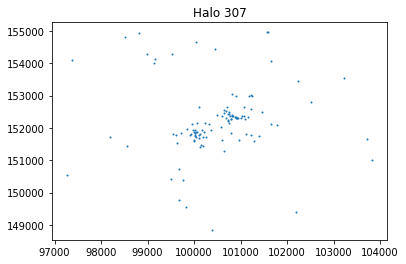

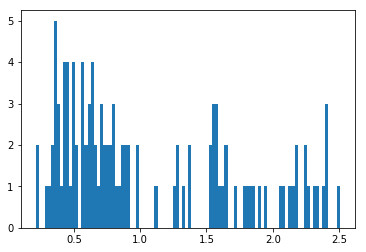

galaxies [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 10, 11, 12, 14, 11, 3, 6, 12, 8, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 7, 8, 2, 5, 12, 7, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 8, 6, 5, 6, 3, 1, 1, 0, 0, 0]
sum of galaxies: 110

Halo: 308
Halo Mass: 5136.8716
N Subhalos from Illustris Algorithm: 435 382.0709779262543
R500c, R200c, R200m: 0.2952849256475589 0.46705720323673566 0.5810940169234583
before dev loop: 382.0943400859833
True
566208 566208 time 382.15443897247314
N Subhalos within 5*R200m: 153 382.3208911418915


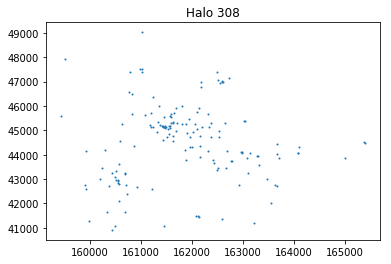

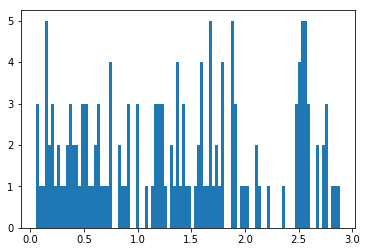

galaxies [2, 0, 1, 0, 4, 2, 5, 3, 2, 5, 8, 7, 9, 5, 7, 13, 18, 23, 8, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 3, 6, 2, 5, 11, 9, 14, 8, 28]
red galaxies counted [2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3, 0, 1]
red galaxies counted [0, 0, 1, 0, 2, 1, 4, 2, 2, 4, 5, 3, 2, 2, 2, 1, 7, 6, 0, 1]
sum of galaxies: 152

Halo: 309
Halo Mass: 5126.7944
N Subhalos from Illustris Algorithm: 337 383.0452799797058
R500c, R200c, R200m: 0.32850757519664875 0.506117696506748 0.6120615458422
before dev loop: 383.0613520145416
True
566208 566208 time 383.12146401405334
N Subhalos within 5*R200m: 177 383.31458806991577


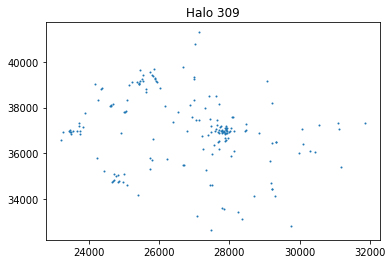

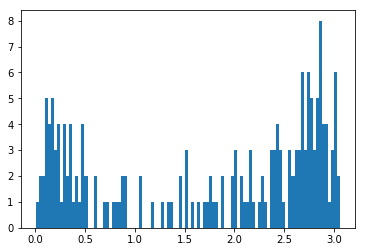

galaxies [1, 0, 3, 6, 2, 5, 6, 4, 4, 7, 7, 2, 2, 7, 2, 4, 7, 14, 25, 67]
blue galaxies counted [0, 0, 2, 0, 1, 2, 2, 0, 1, 3, 4, 2, 2, 6, 2, 4, 7, 14, 20, 43]
red galaxies counted [0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7]
red galaxies counted [1, 0, 1, 4, 1, 3, 3, 4, 3, 4, 3, 0, 0, 1, 0, 0, 0, 0, 4, 17]
sum of galaxies: 175

Halo: 310
Halo Mass: 5014.9004
N Subhalos from Illustris Algorithm: 357 384.0852599143982
R500c, R200c, R200m: 0.31482696242850344 0.4744959646176175 0.5871187214463078
before dev loop: 384.0994279384613
True
566208 566208 time 384.16559410095215
N Subhalos within 5*R200m: 111 384.44250202178955


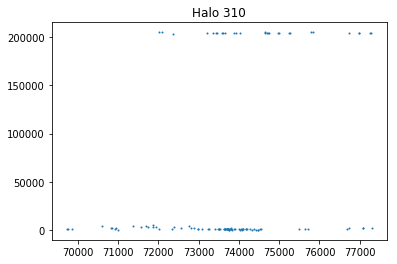

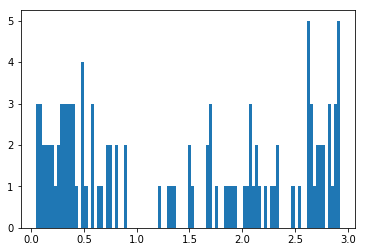

galaxies [1, 2, 1, 2, 2, 2, 2, 3, 8, 6, 6, 4, 5, 5, 0, 3, 4, 10, 14, 29]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 2, 1, 3, 0, 3, 2, 10, 14, 23]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2]
red galaxies counted [1, 1, 1, 2, 2, 2, 1, 2, 7, 5, 0, 2, 3, 2, 0, 0, 0, 0, 0, 4]
sum of galaxies: 109

Halo: 312
Halo Mass: 5100.026
N Subhalos from Illustris Algorithm: 445 385.1435091495514
R500c, R200c, R200m: 0.3023280665796687 0.4729642865413609 0.5866553627057607
before dev loop: 385.1585509777069
True
566208 566208 time 385.2262370586395
N Subhalos within 5*R200m: 128 385.5020020008087


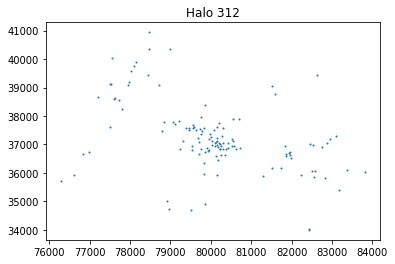

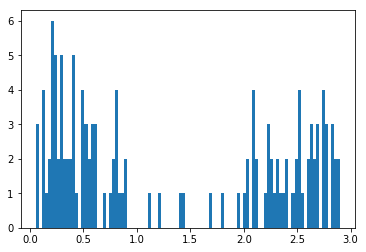

galaxies [1, 0, 0, 2, 2, 1, 10, 5, 7, 6, 8, 10, 2, 11, 0, 2, 2, 3, 22, 32]
blue galaxies counted [0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 5, 3, 1, 7, 0, 1, 1, 3, 22, 27]
red galaxies counted [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 7, 4, 4, 6, 3, 7, 1, 3, 0, 0, 1, 0, 0, 5]
sum of galaxies: 126

Halo: 313
Halo Mass: 5041.0957
N Subhalos from Illustris Algorithm: 372 386.33172392845154
R500c, R200c, R200m: 0.3145623947564017 0.4915561656699143 0.6083072751273606
before dev loop: 386.36068391799927
True
566208 566208 time 386.42243814468384
N Subhalos within 5*R200m: 119 386.7589228153229


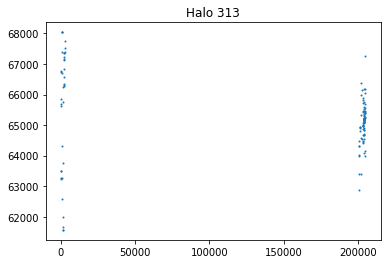

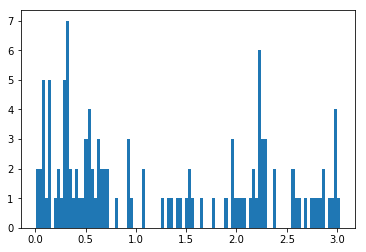

galaxies [1, 4, 2, 0, 5, 1, 1, 4, 12, 3, 5, 10, 6, 4, 3, 3, 7, 8, 19, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 2, 3, 4, 3, 3, 7, 8, 18, 18]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 4, 2, 0, 5, 0, 1, 3, 7, 3, 2, 8, 3, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 116

Halo: 316
Halo Mass: 5059.3677
N Subhalos from Illustris Algorithm: 497 387.401554107666
R500c, R200c, R200m: 0.25635150172630217 0.3992787168723593 0.5044309650002046
before dev loop: 387.4212009906769
True
566208 566208 time 387.48486590385437
N Subhalos within 5*R200m: 107 387.6440830230713


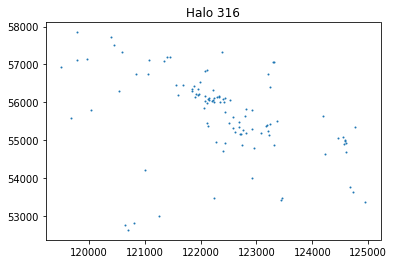

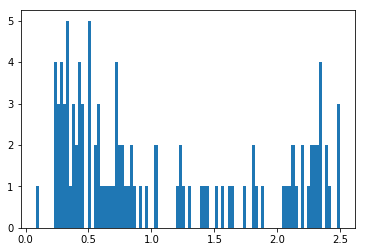

galaxies [0, 0, 1, 0, 0, 0, 0, 3, 7, 10, 6, 11, 7, 11, 6, 3, 6, 6, 6, 24]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 3, 3, 4, 4, 4, 3, 8, 4, 3, 6, 6, 6, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 2, 6, 4, 2, 2, 0, 0, 0, 0, 3]
sum of galaxies: 107

Halo: 317
Halo Mass: 5015.243
N Subhalos from Illustris Algorithm: 483 388.3273949623108
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
before dev loop: 388.35102105140686
True
566208 566208 time 388.41465306282043
N Subhalos within 5*R200m: 161 388.56802701950073


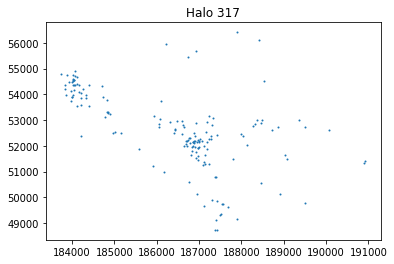

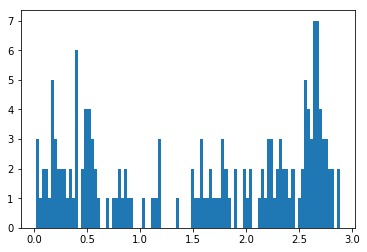

galaxies [0, 2, 1, 1, 1, 6, 4, 3, 3, 9, 5, 11, 1, 7, 3, 5, 9, 14, 25, 48]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 1, 4, 1, 5, 0, 7, 3, 3, 8, 10, 17, 37]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 4]
red galaxies counted [0, 2, 0, 1, 1, 5, 2, 1, 2, 4, 4, 5, 1, 0, 0, 1, 0, 2, 6, 7]
sum of galaxies: 158

Halo: 320
Halo Mass: 5094.6997
N Subhalos from Illustris Algorithm: 479 389.22658610343933
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
before dev loop: 389.23829913139343
True
566208 566208 time 389.3083691596985
N Subhalos within 5*R200m: 187 389.38596391677856


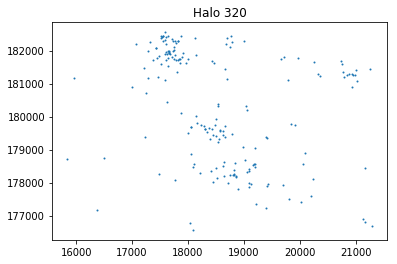

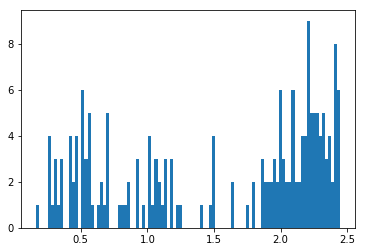

galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 5, 7, 8, 13, 9, 7, 15, 6, 8, 25, 79]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 5, 0, 7, 3, 13, 4, 8, 13, 33]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 3, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 6, 2, 10, 1, 3, 1, 2, 0, 9, 36]
sum of galaxies: 187

Halo: 329
Halo Mass: 5060.2817
N Subhalos from Illustris Algorithm: 529 389.9950530529022
R500c, R200c, R200m: 0.28514013561016827 0.4560905659637029 0.5758434585874034
before dev loop: 390.0275180339813
True
566208 566208 time 390.0754861831665
N Subhalos within 5*R200m: 305 390.18223309516907


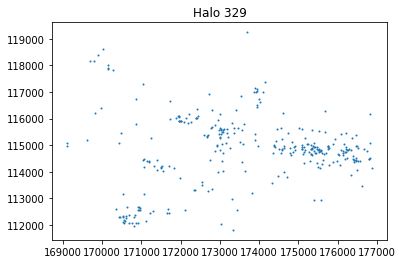

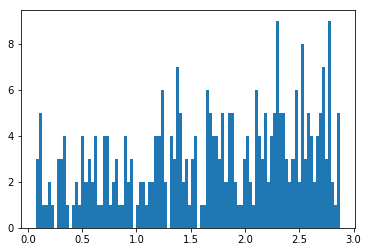

galaxies [0, 2, 1, 5, 1, 1, 2, 1, 7, 4, 4, 10, 12, 12, 13, 22, 31, 44, 59, 74]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 5, 7, 9, 8, 10, 13, 7, 35, 48]
red galaxies counted [0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 4, 2, 7, 4, 5]
red galaxies counted [0, 1, 1, 3, 1, 1, 2, 1, 4, 3, 2, 5, 5, 3, 4, 8, 16, 30, 20, 21]
sum of galaxies: 305

Halo: 331
Halo Mass: 5080.8345
N Subhalos from Illustris Algorithm: 549 390.95018196105957
R500c, R200c, R200m: 0.23717990372419664 0.39582738685129226 0.49783637006162257
before dev loop: 390.9756169319153
True
566208 566208 time 391.0344400405884
N Subhalos within 5*R200m: 100 391.1341531276703


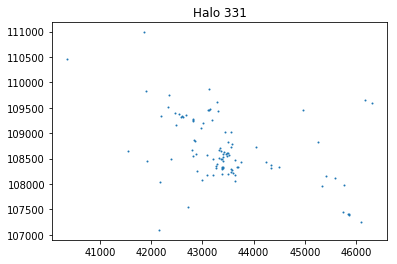

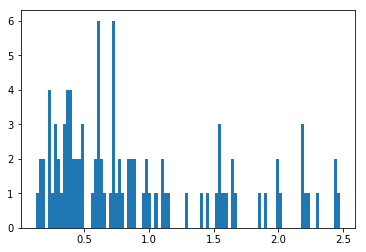

galaxies [0, 0, 0, 0, 1, 1, 3, 4, 4, 6, 10, 7, 11, 10, 8, 8, 2, 11, 5, 9]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 1, 3, 9, 4, 6, 8, 7, 7, 2, 10, 5, 9]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 100
R_avg: 0.6982244391252947


NameError: name 'Yi_avg' is not defined

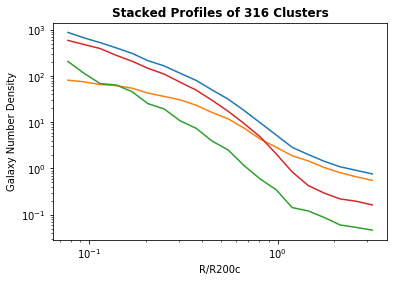

In [33]:
bins = 20#30#15
Rmin = .1
Rmax = 5#5.5 # for R200c#7
Halo_Rmax = 5

t0 = time.time()
print('starting halo loop')
for h_i in halo_array_masked[:]:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    
    
    CM_halo = halo_grp['GroupCM'][h_i]
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    dev_old = dev
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    print((dev_old==dev).all())
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    Rmax_list.append(max(r_subhalo_hi/RScale))
    
    plt.figure()
    plt.scatter(subhalo_table_hi['SubhaloCM'][:,0],subhalo_table_hi['SubhaloCM'][:,1],s=1)
    plt.title('Halo %s' %(h_i))
    plt.figure()
    plt.hist(r_subhalo_hi,bins=100)
    plt.show()
  
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo_hi >=bin_min[i])&(r_subhalo_hi < bin_max[i])
        r_masked = r_subhalo_hi[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo_hi[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo_hi[mask_sep & red_mask_subs])
        number_green = len(r_subhalo_hi[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    #plt.plot(r_stack, NDensity, '-') #/M200m
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.xlabel('R/R200c')
    #plt.ylabel('Galaxy Number Density') #/M200m
    #plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack1 = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack1, NDensity_stack, '-')
plt.plot(bin_stack1, NDensity_stack_b, '-')
plt.plot(bin_stack1, NDensity_stack_r, '-')
plt.plot(bin_stack1, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Time: 652.5433509349823


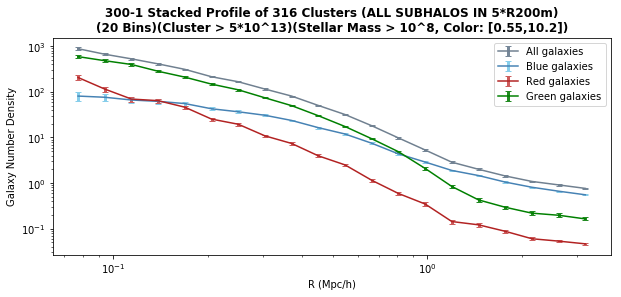

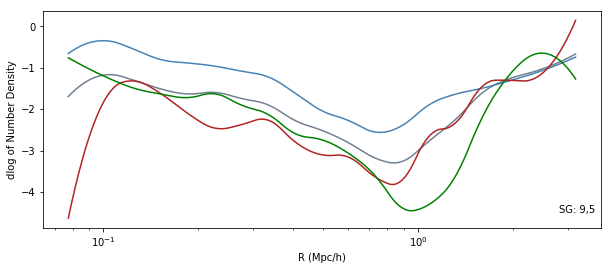

In [36]:
# REPLOTTING AND ADJUSTING (NEW ALL SUBS/TABLE)

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
w = 9#9
p = 5#5
def get_slope_sg(xx, yy, num_output):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)
# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN %s*R200m)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^8, Color: %s)' %(Number_of_halos, Halo_Rmax, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))
plt.show()


## Color Splitting Profiles

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after total masking: 121
len of all, blue, red: 121 21 30 70
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [4, 3, 5, 3, 6, 7, 8, 15, 13, 11, 13, 21, 6, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 2, 6, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [3, 1, 4, 2, 4, 4, 4, 8, 6, 9, 9, 10, 4, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 115

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking: 137
len of all, blue, red: 137 54 30 53
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [0, 1, 0, 0, 2, 1, 2, 8, 14, 24, 31, 24, 16, 6, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 4, 5, 10, 11, 8, 3, 4, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0

N Subhalos after first masking: 1496
N Subhalos after total masking: 88
len of all, blue, red: 88 17 18 53
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [1, 1, 4, 3, 8, 7, 3, 9, 10, 15, 11, 11, 3, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 6, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 3, 2, 3, 5, 3, 7, 6, 11, 6, 5, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 87

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking: 88
len of all, blue, red: 88 18 21 49
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [0, 1, 2, 3, 4, 0, 6, 8, 10, 16, 16, 10, 4, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]


N Subhalos after first masking: 1201
N Subhalos after total masking: 85
len of all, blue, red: 85 25 21 39
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 0, 1, 2, 3, 10, 9, 6, 6, 13, 9, 6, 9, 7, 1, 3, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 3, 3, 0, 0, 4, 2, 2, 5, 3, 0, 2, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 6, 5, 3, 5, 4, 6, 0, 4, 1, 1, 1, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking: 86
len of all, blue, red: 86 22 15 49
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [0, 3, 2, 5, 2, 8, 17, 10, 5, 9, 10, 8, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red g

N Subhalos after first masking: 858
N Subhalos after total masking: 74
len of all, blue, red: 74 17 15 42
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [2, 0, 3, 3, 6, 7, 2, 7, 8, 3, 7, 6, 8, 3, 3, 1, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 3, 3, 4, 5, 1, 5, 5, 2, 0, 4, 5, 2, 0, 1, 0, 0, 0, 0]
sum of galaxies: 71

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking: 88
len of all, blue, red: 88 22 12 54
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 0, 0, 0, 0, 1, 5, 10, 19, 14, 8, 16, 9, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 7, 4, 1, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 728
N Subhalos after total masking: 46
len of all, blue, red: 46 8 8 30
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 2, 1, 3, 5, 2, 2, 7, 7, 5, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 3, 3, 2, 1, 5, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 41

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking: 55
len of all, blue, red: 55 19 14 22
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 9, 9, 6, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 5, 2, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 847
N Subhalos after total masking: 62
len of all, blue, red: 62 14 14 34
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [1, 1, 2, 1, 1, 5, 3, 6, 3, 9, 10, 6, 7, 6, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 3, 3, 6, 3, 5, 4, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking: 54
len of all, blue, red: 54 15 16 23
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 0, 2, 0, 2, 3, 1, 1, 6, 6, 13, 3, 5, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 767
N Subhalos after total masking: 47
len of all, blue, red: 47 24 8 15
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 0, 0, 2, 4, 8, 3, 5, 6, 5, 4, 3, 4, 2, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 0, 2, 1, 2, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 47

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking: 55
len of all, blue, red: 55 18 16 21
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [1, 1, 2, 3, 2, 4, 3, 4, 3, 3, 2, 7, 9, 6, 4, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 687
N Subhalos after total masking: 56
len of all, blue, red: 56 26 9 21
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [3, 3, 3, 2, 1, 2, 5, 10, 3, 4, 7, 5, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 1, 0, 0, 1, 0, 4, 2, 3, 4, 5, 3, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking: 64
len of all, blue, red: 64 30 10 24
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 0, 0, 5, 4, 3, 4, 3, 3, 10, 3, 16, 9, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 5, 2, 10, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 659
N Subhalos after total masking: 41
len of all, blue, red: 41 9 6 26
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [1, 2, 1, 5, 0, 1, 3, 3, 7, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 5, 0, 1, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 38

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking: 41
len of all, blue, red: 41 6 7 28
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 2, 2, 2, 2, 1, 2, 4, 6, 7, 3, 1, 4, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 729
N Subhalos after total masking: 45
len of all, blue, red: 45 23 11 11
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 0, 0, 1, 4, 1, 3, 7, 9, 5, 5, 9, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 5, 3, 5, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking: 39
len of all, blue, red: 39 12 11 16
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 1, 0, 0, 0, 2, 6, 9, 4, 1, 5, 6, 2, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 651
N Subhalos after total masking: 43
len of all, blue, red: 43 13 11 19
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 2, 2, 3, 4, 7, 6, 7, 3, 4, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 3, 4, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 2, 3, 2, 5, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking: 43
len of all, blue, red: 43 17 8 18
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [1, 0, 0, 1, 8, 5, 6, 3, 5, 3, 6, 2, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 815
N Subhalos after total masking: 40
len of all, blue, red: 40 18 10 12
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 1, 2, 2, 0, 4, 4, 4, 3, 2, 3, 9, 2, 1, 2, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 5, 2, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking: 39
len of all, blue, red: 39 15 5 19
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [1, 0, 2, 0, 4, 3, 2, 5, 6, 6, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 501
N Subhalos after total masking: 32
len of all, blue, red: 32 4 8 20
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [0, 1, 2, 0, 1, 1, 2, 3, 10, 4, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 0, 1, 2, 2, 6, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking: 39
len of all, blue, red: 39 15 6 18
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 7, 2, 4, 2, 5, 7, 5, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 6, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
red galaxies


Halo: 207
Halo Mass: 6543.4116
N Subhalos: 488
N Subhalos after first masking: 478
N Subhalos after total masking: 30
len of all, blue, red: 30 7 9 14
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [2, 3, 0, 3, 1, 2, 0, 2, 4, 5, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 3, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking: 29
len of all, blue, red: 29 12 5 12
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 0, 1, 2, 4, 0, 2, 3, 0, 7, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0

N Subhalos after first masking: 427
N Subhalos after total masking: 37
len of all, blue, red: 37 9 8 20
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 2, 2, 4, 1, 0, 5, 3, 4, 3, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 2, 4, 0, 0, 3, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 36

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking: 28
len of all, blue, red: 28 15 5 8
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 1, 1, 1, 0, 1, 1, 4, 3, 7, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies c

len of all, blue, red: 31 7 7 17
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 1, 1, 1, 2, 1, 3, 2, 2, 4, 4, 3, 5, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking: 28
len of all, blue, red: 28 10 5 13
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 0, 1, 1, 2, 4, 2, 2, 2, 4, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 390
N Subhalos after total masking: 23
len of all, blue, red: 23 3 4 16
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 2, 2, 2, 0, 2, 2, 0, 5, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 21

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking: 33
len of all, blue, red: 33 6 7 20
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [0, 2, 1, 1, 2, 1, 2, 4, 8, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

len of all, blue, red: 27 15 7 5
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 1, 1, 0, 3, 2, 4, 5, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 33
len of all, blue, red: 33 9 11 13
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 1, 3, 1, 2, 1, 2, 5, 6, 3, 5, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
su

len of all, blue, red: 24 3 7 14
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [1, 1, 0, 0, 2, 3, 2, 4, 4, 1, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 2, 2, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking: 16
len of all, blue, red: 16 4 3 9
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum

len of all, blue, red: 30 16 8 6
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 0, 0, 0, 2, 0, 5, 3, 3, 3, 2, 1, 4, 6, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 30

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking: 27
len of all, blue, red: 27 7 7 13
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 6, 4, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 474
N Subhalos after total masking: 26
len of all, blue, red: 26 10 6 10
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 1, 1, 1, 0, 4, 1, 0, 0, 5, 2, 6, 0, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 28
len of all, blue, red: 28 10 8 10
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 3, 7, 5, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0]
red galaxie

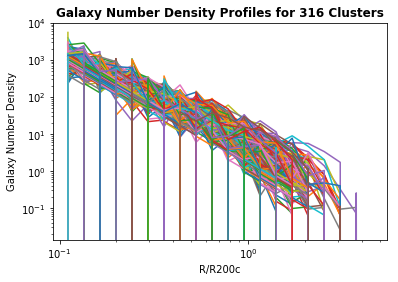

R_avg: 0.6982244391252947
Rmax_list: [1.3280076, 1.711756, 1.5610569, 1.6879034, 2.1744728, 1.6084954, 1.6712394, 1.8458252, 1.2041478, 1.5363575, 1.6136098, 1.4473686, 1.2585247, 2.0040758, 1.4508549, 1.1486049, 2.2576675, 2.903064, 1.85229, 1.8103445, 1.0514941, 3.1170206, 2.1657348, 1.780066, 2.2047398, 1.2322907, 1.3333524, 1.7034097, 1.3237178, 2.2414794, 1.2003801, 2.1937907, 1.0524186, 2.7535207, 3.5576003, 2.312443, 2.1586478, 1.6497698, 1.4909953, 2.0866988, 1.3502595, 1.699537, 2.0972915, 1.0684441, 1.4308753, 1.4059935, 1.5951569, 1.7059721, 1.0667516, 1.9059974, 1.4038466, 2.0995173, 1.389817, 1.9110792, 1.3321853, 1.3032626, 1.3270646, 2.4328506, 1.9011108, 2.6588788, 1.9845538, 1.256914, 1.4655832, 2.8205116, 2.1419508, 1.4667588, 1.5191082, 2.281196, 2.9330354, 1.3570163, 1.7665392, 1.3859499, 1.1245502, 1.4906052, 1.7301228, 1.3214043, 0.8069425, 1.618137, 2.3211062, 1.487538, 1.0555279, 2.1285527, 1.7142245, 1.4286313, 2.511805, 2.528558, 0.9392687, 1.4744961, 1.614008

/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'dlog of Number Density')

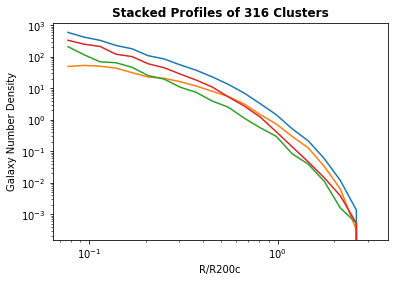

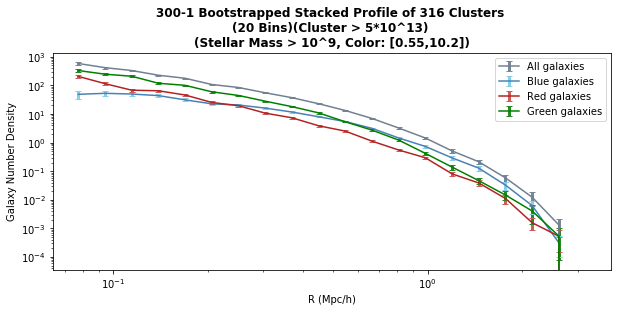

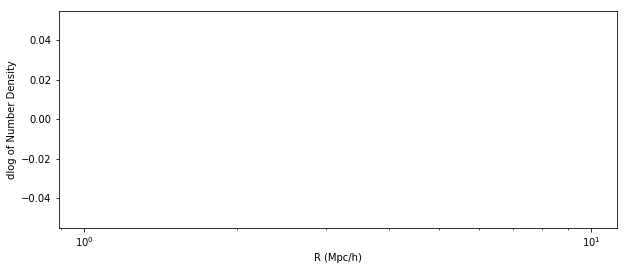

In [32]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 20#30#15
Rmin = .1
Rmax = 5#3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))
    print("N Subhalos after total masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2
print("Rmax_list:", Rmax_list)
# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.plot(bin_stack, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))
plt.show()


In [33]:
# CONTINUED PLOTTING OF COLOR SPLIT PROFILES

#Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
#Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
#Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
z = -3
bin_stack = bin_stack
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack[:z], (Yi_avg)[:z], 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack[:z], (Yi_avg_blue)[:z], 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack[:z], (Yi_avg_red[:z]), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack[:z], (Yi_avg_green[:z]), 1000)  

#print(Yi_avg_red)
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(12,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack[:z], Yi_avg_red[:z], yerr = boot_err_red[:z], c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(.05,1.4)
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
#dlog_data_SG_x, dlog_data_SG_y = get_slope_sg(bin_stack, (Yi_avg), 1000)  
#dlog_data_SG_x_b, dlog_data_SG_y_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
#dlog_data_SG_x_r, dlog_data_SG_y_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
plt.figure(figsize = (12,4))#(6,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.ylim(-6.5,4)
#plt.xlim(.6,1.2)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


#print(len(r_subhalo),len(r_subhalo[blue_mask_subs]), len(r_subhalo[red_mask_subs]))


NameError: name 'Yi_avg_blue' is not defined

## Mass Split profiles

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after first masking: 1909
N Subhalos after total masking (> 10^8): 248
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [6, 5, 9, 5, 25, 25, 30, 30, 32, 44, 27, 4, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 15, 17, 12, 16, 20, 22, 15, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 4, 1, 7, 5, 10, 9, 9, 13, 9, 2, 0, 0, 0]
mass3 galaxies counted [2, 2, 1, 2, 3, 2, 8, 5, 3, 9, 3, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 242

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking (> 10^8): 303
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [3, 0, 0, 2, 5, 6, 22, 46, 57, 63, 48, 28, 15, 2, 0]
mass1 galaxies counted [2, 0, 0, 2, 2, 4, 11, 26, 30, 31, 23, 22, 8, 1, 0]
mass2 galaxies counted [1, 0, 0, 0, 2, 2, 9, 10, 14, 17, 13, 5, 3, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 1, 10, 12, 14, 

N Subhalos after first masking: 1496
N Subhalos after total masking (> 10^8): 189
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [3, 2, 6, 12, 17, 19, 20, 21, 40, 27, 11, 7, 3, 0, 0]
mass1 galaxies counted [1, 1, 1, 6, 8, 15, 11, 7, 21, 16, 6, 6, 2, 0, 0]
mass2 galaxies counted [1, 1, 3, 2, 6, 4, 7, 10, 17, 7, 4, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 2, 4, 3, 0, 2, 3, 1, 4, 1, 1, 1, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 188

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking (> 10^8): 162
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [1, 4, 4, 14, 5, 13, 14, 23, 23, 34, 14, 4, 0, 0, 0]
mass1 galaxies counted [0, 3, 3, 8, 4, 7, 5, 10, 6, 17, 7, 1, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 1, 2, 8, 7, 8, 12, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 4, 0, 3, 1, 6, 7, 5, 3, 0, 0,

N Subhalos after first masking: 1201
N Subhalos after total masking (> 10^8): 176
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 1, 2, 7, 13, 19, 13, 21, 28, 25, 16, 21, 5, 4, 1]
mass1 galaxies counted [0, 0, 2, 2, 5, 9, 5, 13, 15, 15, 9, 10, 3, 2, 1]
mass2 galaxies counted [0, 1, 0, 2, 5, 7, 5, 6, 6, 4, 5, 6, 2, 2, 0]
mass3 galaxies counted [0, 0, 0, 2, 3, 3, 3, 2, 6, 6, 2, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 176

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking (> 10^8): 163
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [1, 5, 8, 6, 12, 28, 18, 28, 17, 26, 7, 1, 0, 0, 0]
mass1 galaxies counted [1, 2, 2, 3, 6, 10, 7, 20, 8, 14, 3, 1, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 2, 5, 8, 9, 5, 6, 6, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 4, 1, 1, 7, 2, 3, 3, 6, 2, 0, 0, 0, 

N Subhalos after first masking: 858
N Subhalos after total masking (> 10^8): 144
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [6, 3, 5, 7, 15, 12, 13, 19, 9, 17, 15, 11, 6, 2, 1]
mass1 galaxies counted [4, 1, 2, 4, 6, 8, 5, 10, 6, 7, 7, 7, 3, 0, 0]
mass2 galaxies counted [1, 2, 1, 3, 5, 2, 5, 8, 1, 3, 4, 4, 2, 2, 0]
mass3 galaxies counted [1, 0, 2, 0, 3, 2, 3, 1, 2, 7, 3, 0, 0, 0, 1]
mass4 galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
sum of galaxies: 141

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking (> 10^8): 170
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 1, 0, 2, 1, 10, 28, 26, 26, 36, 27, 13, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 2, 0, 5, 10, 9, 13, 20, 15, 7, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 3, 11, 14, 11, 9, 11, 5, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 7, 3, 1, 7, 0, 1, 0, 0]

N Subhalos after first masking: 728
N Subhalos after total masking (> 10^8): 109
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 3, 9, 8, 6, 7, 14, 17, 14, 16, 7, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 5, 3, 4, 5, 6, 10, 9, 12, 6, 0, 0, 0, 0]
mass2 galaxies counted [1, 1, 4, 2, 2, 2, 5, 4, 3, 4, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 102

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking (> 10^8): 118
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [4, 4, 4, 4, 5, 7, 9, 9, 19, 28, 10, 11, 1, 0, 0]
mass1 galaxies counted [2, 2, 1, 2, 1, 5, 5, 5, 13, 14, 5, 6, 1, 0, 0]
mass2 galaxies counted [0, 1, 2, 2, 3, 1, 2, 2, 3, 9, 3, 3, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 0, 1, 1, 2, 2, 3, 5, 2, 1, 0, 0, 0]
mass4 g

N Subhalos after first masking: 847
N Subhalos after total masking (> 10^8): 122
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [3, 2, 2, 5, 9, 9, 16, 7, 20, 19, 17, 12, 0, 0, 0]
mass1 galaxies counted [2, 0, 1, 3, 5, 5, 9, 4, 6, 10, 10, 5, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 1, 2, 1, 3, 2, 10, 5, 5, 6, 0, 0, 0]
mass3 galaxies counted [0, 2, 1, 1, 2, 1, 4, 1, 4, 4, 2, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 121

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking (> 10^8): 119
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 2, 3, 1, 5, 5, 4, 20, 24, 20, 14, 9, 1, 0, 0]
mass1 galaxies counted [0, 1, 2, 0, 1, 4, 3, 13, 15, 8, 10, 5, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 1, 1, 0, 5, 5, 6, 2, 1, 1, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 3, 0, 1, 2, 4, 6, 2, 3, 0, 0, 0]
mass4

N Subhalos after first masking: 767
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 1, 0, 10, 15, 12, 14, 8, 12, 13, 8, 9, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 8, 8, 4, 5, 6, 10, 5, 5, 0, 0]
mass2 galaxies counted [1, 0, 0, 0, 5, 1, 0, 7, 1, 4, 1, 2, 4, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [2, 1, 4, 5, 7, 7, 6, 11, 11, 15, 15, 11, 7, 1, 0]
mass1 galaxies counted [1, 0, 1, 2, 3, 3, 2, 8, 8, 8, 5, 4, 3, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 3, 2, 3, 0, 3, 5, 6, 5, 3, 1, 0]
mass3 galaxies counted [1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 4, 2, 1, 0, 0]
mass4 galax

N Subhalos after first masking: 687
N Subhalos after total masking (> 10^8): 107
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [5, 4, 7, 4, 5, 6, 19, 19, 14, 13, 6, 1, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 3, 3, 7, 14, 9, 4, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 2, 3, 1, 0, 3, 8, 3, 3, 6, 3, 1, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 1, 2, 0, 4, 2, 2, 2, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking (> 10^8): 115
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 2, 4, 7, 11, 6, 8, 7, 17, 26, 20, 4, 2, 0]
mass1 galaxies counted [0, 0, 2, 2, 3, 5, 2, 4, 4, 5, 13, 8, 1, 2, 0]
mass2 galaxies counted [0, 1, 0, 0, 4, 4, 2, 4, 0, 10, 10, 9, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0]
mass4 gal

N Subhalos after first masking: 659
N Subhalos after total masking (> 10^8): 86
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [3, 2, 1, 5, 5, 4, 8, 11, 15, 19, 8, 1, 0, 0, 0]
mass1 galaxies counted [2, 0, 0, 0, 4, 1, 4, 4, 13, 12, 3, 1, 0, 0, 0]
mass2 galaxies counted [1, 2, 1, 4, 1, 3, 4, 4, 1, 4, 3, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking (> 10^8): 70
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 5, 2, 5, 2, 6, 7, 9, 10, 9, 2, 11, 0, 0, 0]
mass1 galaxies counted [0, 3, 0, 1, 2, 3, 3, 1, 4, 6, 1, 5, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 1, 0, 3, 2, 4, 5, 3, 1, 4, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 0, 2, 0, 0, 0]
mass4 galaxies c

N Subhalos after first masking: 729
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 2, 1, 6, 4, 7, 13, 18, 15, 23, 5, 0, 0]
mass1 galaxies counted [0, 0, 0, 2, 0, 2, 3, 4, 2, 11, 8, 14, 3, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 0, 2, 5, 7, 6, 6, 1, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 1, 2, 1, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 94

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking (> 10^8): 79
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 2, 1, 3, 2, 9, 21, 10, 9, 12, 1, 4, 1, 2, 2]
mass1 galaxies counted [0, 1, 1, 3, 0, 3, 9, 8, 9, 1, 0, 2, 1, 0, 2]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 6, 2, 0, 8, 1, 1, 0, 1, 0]
mass3 galaxies counted [0, 1, 0, 0, 0, 3, 5, 0, 0, 3, 0, 1, 0, 1, 0]
mass4 galaxies

N Subhalos after first masking: 651
N Subhalos after total masking (> 10^8): 91
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 8, 6, 8, 16, 18, 14, 9, 4, 3, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 5, 2, 4, 8, 12, 6, 5, 1, 1, 3, 0, 0]
mass2 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 7, 3, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 3, 0, 4, 3, 1, 1, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 90

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking (> 10^8): 93
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [2, 0, 1, 10, 16, 8, 12, 12, 14, 11, 1, 1, 0, 0, 0]
mass1 galaxies counted [1, 0, 1, 6, 6, 2, 8, 6, 9, 7, 1, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 4, 4, 2, 4, 5, 4, 3, 0, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 6, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 815
N Subhalos after total masking (> 10^8): 90
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 4, 4, 2, 12, 14, 11, 8, 10, 17, 2]
mass1 galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 9, 8, 6, 6, 8, 0]
mass2 galaxies counted [0, 1, 0, 0, 0, 1, 2, 0, 4, 3, 3, 1, 2, 5, 2]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 4, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking (> 10^8): 89
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [2, 3, 3, 4, 3, 8, 20, 8, 17, 8, 5, 4, 1, 0, 0]
mass1 galaxies counted [1, 2, 2, 1, 0, 5, 12, 4, 12, 6, 2, 2, 1, 0, 0]
mass2 galaxies counted [1, 1, 0, 2, 0, 1, 6, 1, 4, 2, 3, 2, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 1, 3, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 501
N Subhalos after total masking (> 10^8): 64
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [2, 1, 3, 3, 2, 8, 3, 20, 11, 6, 2, 1, 0, 0, 0]
mass1 galaxies counted [1, 1, 1, 2, 1, 6, 0, 9, 5, 3, 1, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 0, 1, 2, 1, 6, 3, 2, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 1, 0, 0, 2, 4, 3, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 62

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 1, 0, 1, 3, 2, 8, 9, 5, 10, 20, 20, 14]
mass1 galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 3, 6, 15, 10, 11]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 5, 1, 3, 2, 8, 1]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1]
mass4 galaxi

N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 62
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [3, 2, 3, 1, 4, 2, 5, 10, 13, 8, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 1, 2, 2, 6, 8, 7, 3, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking (> 10^8): 63
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 1, 2, 5, 4, 8, 11, 5, 13, 4, 6, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 1, 2, 7, 7, 4, 6, 2, 3, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 2, 1, 1, 3, 1, 7, 1, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
mass4 galaxies count

N Subhalos after first masking: 427
N Subhalos after total masking (> 10^8): 75
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 6, 4, 2, 2, 8, 10, 6, 10, 8, 11, 6, 1, 0, 0]
mass1 galaxies counted [0, 2, 1, 1, 1, 4, 6, 2, 5, 6, 6, 3, 1, 0, 0]
mass2 galaxies counted [0, 4, 3, 1, 0, 2, 2, 3, 1, 2, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 74

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking (> 10^8): 67
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 2, 3, 3, 3, 7, 9, 5, 16, 7, 6, 3, 2, 0, 0]
mass1 galaxies counted [0, 1, 1, 3, 2, 6, 5, 1, 7, 6, 4, 1, 2, 0, 0]
mass2 galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 6, 0, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 2, 0, 0, 0]
mass4 galaxies co

N Subhalos after total masking (> 10^8): 52
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 2, 2, 3, 2, 4, 3, 7, 8, 10, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 1, 1, 4, 4, 4, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 1, 2, 1, 1, 2, 1, 2, 3, 5, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 57
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 1, 3, 4, 5, 6, 4, 5, 10, 7, 6, 2, 0, 0, 0]
mass1 galaxies counted [0, 0, 2, 3, 2, 2, 2, 2, 4, 5, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 0, 2, 1, 0, 2, 5, 1, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 3, 5, 4, 3, 6, 4, 6, 7, 2, 5, 1, 0, 0, 0]
mass1 galaxies counted [0, 1, 2, 3, 3, 2, 2, 3, 6, 0, 4, 1, 0, 0, 0]
mass2 galaxies counted [2, 0, 1, 1, 0, 4, 1, 3, 0, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [2, 2, 1, 1, 5, 3, 7, 10, 12, 9, 0, 0, 0, 0, 0]
mass1 galaxies counted [1, 1, 0, 0, 2, 1, 3, 2, 5, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 2, 2, 3, 6, 6, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 52

Halo: 254
H

R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 5, 2, 2, 7, 12, 16, 4, 6, 2, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 3, 2, 0, 4, 7, 11, 1, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 0, 1, 2, 4, 1, 1, 0, 1, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 58
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 3, 3, 5, 5, 5, 12, 9, 11, 2, 1, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 3, 3, 5, 3, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 1, 1, 1, 5, 1, 5, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 2, 5, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 56

Halo: 

R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [2, 0, 0, 2, 4, 5, 7, 8, 8, 8, 3, 3, 0, 0, 0]
mass1 galaxies counted [0, 0, 0, 0, 1, 3, 3, 4, 7, 6, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking (> 10^8): 51
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 2, 1, 5, 9, 2, 3, 6, 2, 6, 6, 6, 1, 0, 0]
mass1 galaxies counted [0, 1, 1, 2, 5, 2, 3, 4, 2, 5, 5, 4, 1, 0, 0]
mass2 galaxies counted [0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0]
mass3 galaxies counted [1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 284


N Subhalos after first masking: 544
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 1, 1, 1, 1, 6, 11, 7, 10, 2, 7, 10, 2, 1, 0]
mass1 galaxies counted [0, 1, 1, 0, 0, 3, 6, 3, 7, 1, 3, 3, 2, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 3, 3, 0, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 1, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 1, 1, 5, 3, 6, 7, 8, 7, 13, 4, 2, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 4, 2, 2, 4, 6, 4, 6, 1, 2, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 2, 1, 1, 3, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 2, 4, 1, 0, 0, 0, 0]
mass4 galaxies cou

N Subhalos after first masking: 474
N Subhalos after total masking (> 10^8): 56
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 2, 1, 2, 4, 5, 4, 5, 7, 13, 4, 6, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 4, 8, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 1, 0, 6, 6, 10, 15, 9, 6, 1, 0]
mass1 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 4, 3, 1, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 4, 2, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 3, 1, 0, 0]
mass4 galaxies co

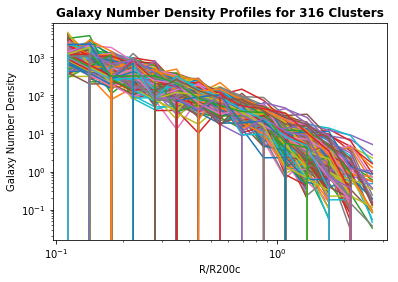

R_avg: 0.6982244391252947


Text(0, 0.5, 'dlog of Number Density')

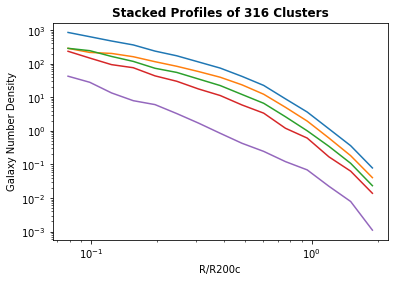

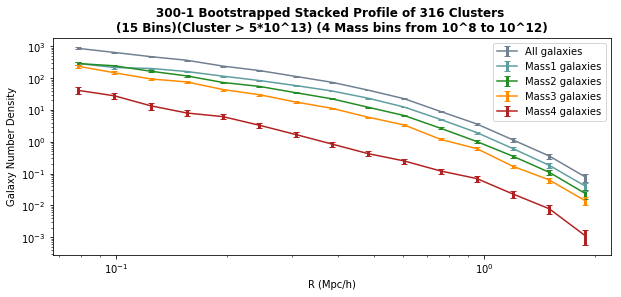

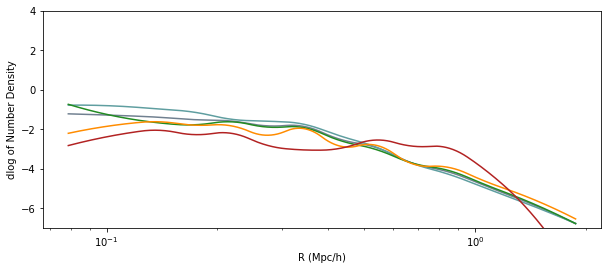

In [41]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=5)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 15#30#15
Rmin = .1#.1
Rmax = 3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_1 = []
NDensity_list_2 = []
NDensity_list_3 = []
NDensity_list_4 = []

ND_boot = []
ND_boot_1 = []
ND_boot_2 = []
ND_boot_3 = []
ND_boot_4 = []

RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)#&(subhalomass > (10**9))
    mask_total2 = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass >= (10**8))
    print("N Subhalos after total masking (> 10^8):", len(subhalo_grp['SubhaloGrNr'][mask_total2]))

    '''
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    '''
    #MASS BIN CUTS:
    #subhalomass_masked = subhalomass[mask_total]
    massmask1 = (subhalomass[mask_total2]>=(10**8))&(subhalomass[mask_total2]<(10**9))
    massmask2 = (subhalomass[mask_total2]>=(10**9))&(subhalomass[mask_total2]<(10**10))
    massmask3 = (subhalomass[mask_total2]>=(10**10))&(subhalomass[mask_total2]<(10**11))
    massmask4 = (subhalomass[mask_total2]>=(10**11))&(subhalomass[mask_total2]<(10**12))

    #print(len(subhalomass[mask_total][massmask1]))
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total2]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    #print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_1 = []
    NDensity_2 = []
    NDensity_3 = []
    NDensity_4 = []

    galaxies = []
    galaxies_1 = []
    galaxies_2 = []
    galaxies_3 = []
    galaxies_4 = []
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_1 = len(r_subhalo[mask_sep & massmask1])
        number_2 = len(r_subhalo[mask_sep & massmask2])
        number_3 = len(r_subhalo[mask_sep & massmask3])
        number_4 = len(r_subhalo[mask_sep & massmask4])


        NDensity_1.append(number_1/volume)
        NDensity_2.append(number_2/volume)
        NDensity_3.append(number_3/volume)        
        NDensity_4.append(number_4/volume)        

        galaxies_1.append(number_1)
        galaxies_2.append(number_2)
        galaxies_3.append(number_3)
        galaxies_4.append(number_4)

    print("galaxies", galaxies)
    print("mass1 galaxies counted", galaxies_1)
    print("mass2 galaxies counted", galaxies_2)
    print("mass3 galaxies counted", galaxies_3)
    print("mass4 galaxies counted", galaxies_4)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_1.append(NDensity_1)
    NDensity_list_2.append(NDensity_2)
    NDensity_list_3.append(NDensity_3)
    NDensity_list_4.append(NDensity_4)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_1 = np.mean(NDensity_list_1, axis=0)
NDensity_stack_2 = np.mean(NDensity_list_2, axis=0)
NDensity_stack_3 = np.mean(NDensity_list_3, axis=0)
NDensity_stack_4 = np.mean(NDensity_list_4, axis=0)

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_1, '-')
plt.plot(bin_stack, NDensity_stack_2, '-')
plt.plot(bin_stack, NDensity_stack_3, '-')
plt.plot(bin_stack, NDensity_stack_4, '-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_1, cov_1, boot_err_1 = Bootstrap_Covariance(NDensity_list_1, 300, bins)
Yi_avg_2, cov_2, boot_err_2 = Bootstrap_Covariance(NDensity_list_2, 300, bins)
Yi_avg_3, cov_3, boot_err_3 = Bootstrap_Covariance(NDensity_list_3, 300, bins)
Yi_avg_4, cov_4, boot_err_4 = Bootstrap_Covariance(NDensity_list_4, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Text(1.7, 3, 'SG: 5,3')

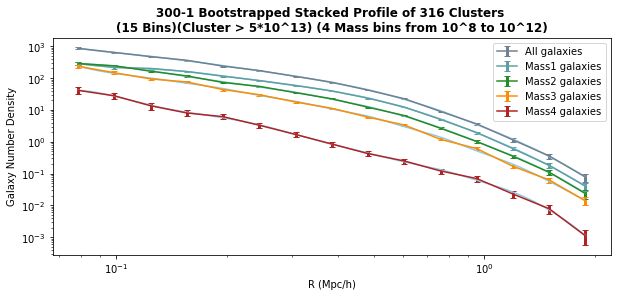

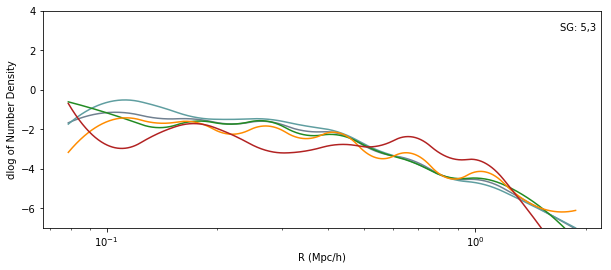

In [53]:
#Continued plotting of mass split profiles
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')
plt.plot(xx_fine, yy_fine, c = 'skyblue')
plt.plot(xx_fine_1, yy_fine_1, c = 'skyblue')
plt.plot(xx_fine_2, yy_fine_2, c = 'skyblue')
plt.plot(xx_fine_3, yy_fine_3, c = 'skyblue')
plt.plot(xx_fine_4, yy_fine_4, c = 'skyblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


## Histograms of halos

18767465
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]
2686
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]


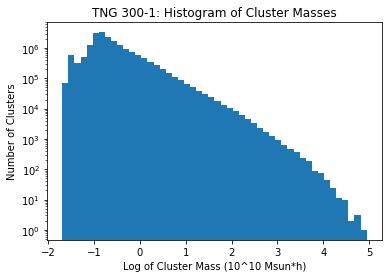

Count of subhalos: 15904796
Number of Total groups in Snapshot: 18767465
Number of Total subgroups in Snapshot: 15904796


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Halos with subhalos: 12952011
Halos with more than 5 subhalos: 88076


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

Subhalos not flagged and with DM mass > 10^11: 15594
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

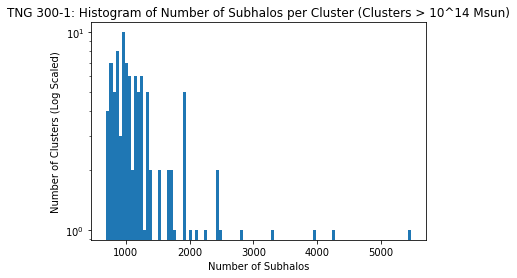

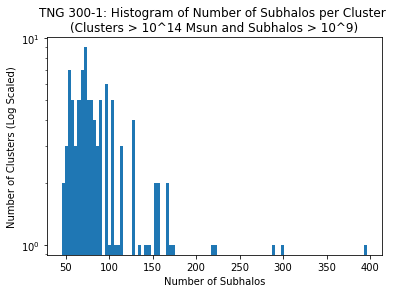

In [6]:
#HISTOGRAMS
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
plt.title('TNG 300-1: Histogram of Cluster Masses')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')
plt.show()

print("Count of subhalos:",subhalo_grp['count'])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]
mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster \n(Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')
